In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, ReactionToImage, MolToImage, MolsToGridImage
import rdkit.Chem.AllChem as AllChem
from IPython.display import SVG, display, clear_output
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = (800, 400)
import pandas as pd

In [ ]:
moltoimage = lambda smi: display(MolsToGridImage([Chem.MolFromSmiles(x) for x in smi.split('.')], molsPerRow=2, subImgSize=(375, 200)))

### Load results from the core finding model

In [ ]:
xl = pd.ExcelFile('./direct_core_prediction_test_data_detailed.xlsx')
df_corepred = xl.parse('Sheet1')

In [ ]:
df_corepred

In [ ]:
def report_row(row):
    reactants = row._1
    pred1, sco1 = row.Column2, row.Column3
    pred2, sco2 = row.Column4, row.Column5
    pred3, sco3 = row.Column6, row.Column7
    pred4, sco4 = row.Column8, row.Column9
    pred5, sco5 = row.Column10, row.Column11
    rank = row._95
    
    print('\n\n\n############ TEST SET INDEX {}'.format(row.Index))
    moltoimage(reactants)
    print(reactants)
    print('Rank of true outcome in predictions (10 if not found): {}'.format(rank))
    print('True product: {}'.format(row.product_smiles))
    moltoimage(row.product_smiles)
    print('Predicted:    {}'.format(row.pred1))
    print('Predicted:    {}'.format(row.pred2))
    print('Predicted:    {}'.format(row.pred3))
    print('Predicted:    {}'.format(row.pred4))
    print('Predicted:    {}'.format(row.pred5))
    print('Prediction 1:    {:15} with score {:6}'.format(pred1, sco1))
    print('Prediction 2:    {:15} with score {:6}'.format(pred2, sco2))
    print('Prediction 3:    {:15} with score {:6}'.format(pred3, sco3))
    print('Prediction 4:    {:15} with score {:6}'.format(pred4, sco4))
    print('Prediction 5:    {:15} with score {:6}'.format(pred5, sco5))

### Load output from the ranking model's evaluation

In [ ]:
cols = ['reactants', 'products', 'product_smiles', 'product_smiles_sani', 'rank (10 if not found)'] + ['pred{}'.format(i) for i in range(10)] + ['rank (10 if not found) sani'] + ['pred{} sani'.format(i+1) for i in range(10)]
df_rankpred = pd.read_csv("../rexgen_direct/rank_diff_wln/model-core16-500-3-max150-direct-useScores/test.cbond_detailed_2400000.eval_by_smiles", sep="\t",header=None, names=cols) 

In [ ]:
df_rankpred

### Read information about how the template-based approach did

In [24]:
cols = ['index', 'reaction_smiles', 'found_count', 'num_candidates']
df_templates = pd.read_csv("../template_comparison/candidates_new.pickle_summary.csv", sep="\t", header=None, names=cols)
df_templates

index                                    reaction_smiles  found_count  \
0          0  [CH2:23]1[O:24][CH2:25][CH2:26][CH2:27]1.[F:1]...          607   
1          1  [CH2:21]([P:22]([CH2:23][CH2:24][CH2:25][CH3:2...          946   
2          2  [CH3:37][CH2:38][O:39][CH2:40][CH3:41].[CH:42]...           -1   
3          3  [C:39]([C:40](=[CH2:41])[CH3:42])(=[O:43])[Cl:...         1020   
4          4  [Cl:11][c:12]1[c:13]([CH2:20][O:21][CH:22]2[O:...         1310   
5          5  [F:1][c:2]1[cH:3][c:4]([NH:10][c:11]2[n:12][cH...          171   
6          6  [CH3:10][c:11]1[cH:12][cH:13][cH:14][c:15]([CH...           -1   
7          7  [ClH:50].[F:20][c:21]1[c:22]([OH:39])[cH:23][c...          946   
8          8  [CH3:1][c:2]1[cH:3][cH:4][c:5]([CH2:7][NH:8][c...          386   
9          9  [CH2:1]([CH3:2])[O:3][CH2:4][CH2:5][CH2:6][OH:...         2103   
10        10  [CH3:5][CH:6]([CH3:7])[CH2:8][CH2:9][CH2:10][C...           -1   
11        11  [CH3:27][CH2:28][N:29]([CH2:30][CH3:31])[CH2:3...         4012   
12        12  [CH2:4]([CH:5]=[CH:6][CH3:7])[CH:8]1[C:9](=[O:...           27   
13        13  [BH4-:28].[Na+:29].[c:1]1([S:7](=[O:8])(=[O:9]...         3111   
14        14  [CH3:26][C:27](=[O:28])[O:29][C:30](=[O:31])[C...          479   
15        15  [C:2]([O:3][C:4](=[O:5])[N:9]1[CH2:10][CH:11](...           44   
16        16  [BH4-:25].[CH3:1][O:2][c:3]1[c:4]([C:12]([CH:1...         1572   
17        17  [CH3:17][CH2:18][OH:19].[NH2:1][c:2]1[cH:3][c:...         9854   
18        18  [Br:34][CH2:35][C:36](=[O:37])[NH2:38].[C:28](...         3364   
19        19  [C:22](=[O:23])([O-:24])[O-:25].[Cl:28][CH2:29...         1744   
20        20  [CH2:28]([CH3:29])[c:30]1[c:31]([NH2:36])[n:32...           75   
21        21  [CH2:1]([CH:2]=[CH2:3])[O:4][C:5](=[O:6])[N:7]...          772   
22        22  [CH3:1][N:2]1[CH2:3][c:4]2[c:5]([nH:6][c:7]3[c...          128   
23        23  [CH3:22][OH:23].[OH2:24].[s:1]1[c:2]([C:6](=[O...         5377   
24        24  [Br:1][c:2]1[c:3]([CH3:10])[cH:4][c:5]([C:6]#[...           64   
25        25  [Br:29][CH2:30][CH2:31][CH2:32][OH:33].[CH:1](...         3802   
26        26  [CH3:11][O:12][C:13]([CH:14]([NH2:15])[CH2:16]...            9   
27        27  [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6]([NH...          155   
28        28  [Cl-:28].[H-:2].[NH4+:29].[Na+:1].[O:13]([S:14...          144   
29        29  [CH3:21][CH2:22][OH:23].[CH3:24][CH2:25][O:26]...           76   
...      ...                                                ...          ...   
39970  39970  [BH4-:25].[CH3:1][c:2]1[c:3]([CH2:14][c:15]2[c...         1310   
39971  39971  [Br:22][c:23]1[cH:24][cH:25][c:26]([S:29](=[O:...           -1   
39972  39972  [CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)...         2744   
39973  39973  [CH3:26][N:27]=[C:28]=[S:29].[CH3:30][N:31]([C...         1580   
39974  39974  [C:1]1([CH3:10])=[CH:2][CH2:3][CH:4]([CH:7]([C...           -1   
39975  39975  [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...           43   
39976  39976  [CH2:19]([N:20]([CH:21]([CH3:22])[CH3:23])[CH:...         2630   
39977  39977  [CH3:1][c:2]1[c:3]([CH2:13][O:14][c:15]2[cH:16...         8974   
39978  39978  [Al+3:23].[CH2:28]1[O:29][CH2:30][CH2:31][CH2:...         2368   
39979  39979  [C:19](=[O:20])([O-:21])[O-:22].[CH3:1][C:2]([...         2487   
39980  39980  [CH2:57]([Cl:58])[CH2:59][Cl:60].[CH3:40][N:41...         5888   
39981  39981  [BH4-:1].[CH3:23][CH2:24][OH:25].[CH3:3][O:4][...          170   
39982  39982  [CH3:1][O:2][C:3]([CH:4]=[CH:5][c:6]1[cH:7][c:...         8974   
39983  39983  [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6]([NH...           72   
39984  39984  [CH3:40][C:41](=[O:42])[CH3:43].[Cl+3:35]([OH:...          198   
39985  39985  [Br:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:22]1)[...         1413   
39986  39986  [C:52]([O:53][BH-:54]([O:55][C:56](=[O:57])[CH...         1026   
39987  39987  [C:3]([CH3:4])([CH3:5])([CH3:6])[O:7][C:8](=[O...          772   
39988  

### What were our predictions for reactions where the template-based method failed?

In [ ]:
df_rankpred.loc[df_templates.found_count == -1]

# Load the models so we can visualize attention weights

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)
import math, sys, random
from collections import Counter
from optparse import OptionParser
from functools import partial
import threading
from multiprocessing import Queue
import os
from collections import defaultdict
from rdkit import Geometry

In [2]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, ReactionToImage, MolToImage, MolsToGridImage
import rdkit.Chem.AllChem as AllChem
from PIL import Image, ImageOps
import rdkit.Chem.Draw as Draw

from IPython.display import SVG, display, clear_output
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import sys
sys.path += ['../rexgen_direct/core_wln_global']
sys.path += ['../']

In [4]:
from directcorefinder import DirectCoreFinder
directcorefinder = DirectCoreFinder()
directcorefinder.load_model()

INFO:tensorflow:Restoring parameters from ../rexgen_direct/core_wln_global/model-300-3-direct/model.ckpt-140000


## Helper functions for drawing / processing table rows

In [ ]:
def arrow():
    subImgSize = (115, 115)
    img, canvas = Draw._createCanvas(subImgSize)
    p0 = (10, subImgSize[1]//2)
    p1 = (subImgSize[0]-10, subImgSize[1]//2)
    p3 = (subImgSize[0]-20, subImgSize[1]//2-10)
    p4 = (subImgSize[0]-20, subImgSize[1]//2+10)
    
    
    def drawthick(pa, pb, d=1):
        canvas.addCanvasLine(pa, pb, color=(0, 0, 0))
        pa = (pa[0], pa[1]+d)
        pb = (pb[0], pb[1]+d)
        canvas.addCanvasLine(pa, pb, color=(0, 0, 0))
        
    drawthick(p0, p1)
    drawthick(p3, p1, d=-1)
    drawthick(p4, p1)
    
    if hasattr(canvas, 'flush'):
        canvas.flush()
    else:
        canvas.save()
    return img

def TrimImgByWhite(img, padding=0):
    '''This function takes a PIL image, img, and crops it to the minimum rectangle 
    based on its whiteness/transparency. 5 pixel padding used automatically.'''

    # Convert to array
    as_array = np.array(img)  # N x N x (r,g,b,a)

    # Content defined as non-white and non-transparent pixel
    has_content = np.sum(as_array, axis=2, dtype=np.uint32) != 255 * 3
    xs, ys = np.nonzero(has_content)

    # Crop down
    margin = 10
    x_range = max([min(xs) - margin, 0]), min([max(xs) + margin, as_array.shape[0]])
    y_range = max([min(ys) - margin, 0]), min([max(ys) + margin, as_array.shape[1]])
    as_array_cropped = as_array[
        x_range[0]:x_range[1], y_range[0]:y_range[1], 0:3]

    img = Image.fromarray(as_array_cropped, mode='RGB')

    return ImageOps.expand(img, border=padding, fill=(255, 255, 255))

def StitchPILsHorizontally(imgs):
    '''This function takes a list of PIL images and concatenates
    them onto a new image horizontally, with each one
    vertically centered.'''

    # Create blank image (def: transparent white)
    heights = [img.size[1] for img in imgs]
    height = max(heights)
    widths = [img.size[0] for img in imgs]
    width = sum(widths)
    res = Image.new('RGBA', (width, height), (255, 255, 255, 255))

    # Add in sub-images
    for i, img in enumerate(imgs):
        offset_x = sum(widths[:i])  # left to right
        offset_y = (height - heights[i]) // 2
        res.paste(img, (offset_x, offset_y))

    return res


fontsize = 0.6
linewidth = 5

def analyze_reaction(react, product=None, guessed_prod=None, clearmap=False, atts=[], max_bond_preds=5, max_att_score_info=10, showmap=True, showhighlight=True):
    if clearmap:
        m = Chem.MolFromSmiles(react)
        [a.ClearProp('molAtomMapNumber') for a in m.GetAtoms()]
        [a.SetIntProp('molAtomMapNumber', i+1) for i, a in enumerate(m.GetAtoms())]
        react = Chem.MolToSmiles(m)
    (react, bond_preds, bond_scores, cur_att_score) = directcorefinder.predict(react)
    react_mol = Chem.MolFromSmiles(react)
    map_to_idx = {}; idx_to_map = {}
    for i, a in enumerate(react_mol.GetAtoms()):
        map_to_idx[a.GetIntProp('molAtomMapNumber')] = i
        idx_to_map[i] = a.GetIntProp('molAtomMapNumber')
        
    for i in range(min(len(bond_preds), max_bond_preds)):
         print('Prediction {}:    {:15} with score {:6}'.format(i+1, bond_preds[i], bond_scores[i]))
    
    highlight = []
    scores = {}
    for a in atts:
        att_atom_mapnum = a
        print('Atom ID {} attends to...'.format(a))
        a = a - 1
        attention_scores = cur_att_score[a,:, 0]
        for j in np.argsort(attention_scores)[::-1][:max_att_score_info]:
            print('    atom ID {:3} with score {:6}'.format(j+1, attention_scores[j]))
            
        for j, sco in enumerate(attention_scores):
            highlight.append(j+1)
            scores[j+1] = float(sco)
        
    colors = {}
    if atts:
        scale = 0.8
        for k in scores:
            colors[k] = (1-scale*scores[k], 1-scale*scores[k], 1)
        colors[att_atom_mapnum] = (0, 1, 0)

        
    # Iterate through each reactant
    imgs = []
    for smi_frag in react.split('.'):
        mol = Chem.MolFromSmiles(smi_frag)
        try:
            Chem.Kekulize(mol)
        except:
            pass
        map_to_idx = {}; idx_to_map = {}
        for i, a in enumerate(mol.GetAtoms()):
            map_to_idx[a.GetIntProp('molAtomMapNumber')] = i
            idx_to_map[i] = a.GetIntProp('molAtomMapNumber')
        
        this_highlight = [map_to_idx[mapnum] for mapnum in highlight if mapnum in map_to_idx]
        this_colors = {map_to_idx[mapnum]: colors[mapnum] for mapnum in colors if mapnum in map_to_idx}
        
        def get_scaled_drawer(mol):
            dpa = 26
            rdDepictor.Compute2DCoords(mol)
            conf = mol.GetConformer()
            xs = [conf.GetAtomPosition(i).x for i in range(mol.GetNumAtoms())]
            ys = [conf.GetAtomPosition(i).y for i in range(mol.GetNumAtoms())]
            
            point_min = Geometry.rdGeometry.Point2D()
            point_max = Geometry.rdGeometry.Point2D()
            point_min.x = min(xs) - 3
            point_min.y = min(ys) - 3
            point_max.x = max(xs) + 3
            point_max.y = max(ys) + 3
            
            drawer = rdMolDraw2D.MolDraw2DCairo(1000, 1000)
            w = int(dpa * (point_max.x - point_min.x))
            h = int(dpa * (point_max.y - point_min.y))
            
            drawer.SetScale(w, h, point_min, point_max)
            return drawer


        drawer = get_scaled_drawer(mol)
        drawer.SetFontSize(14)
        opts = drawer.drawOptions()
        opts.useBWAtomPalette()
        opts.additionalAtomLabelPadding = 0.15
        
    
        
        for i, a in enumerate(mol.GetAtoms()):
            symbol = a.GetSymbol()
            if a.GetFormalCharge():
                symbol += '-'*(-a.GetFormalCharge()) if a.GetFormalCharge() < 0 else '+'*a.GetFormalCharge()
            if symbol == 'C' and not showmap:
                symbol = ''
            if showmap:
                opts.atomLabels[i] = '{}{}'.format(symbol, a.GetProp('molAtomMapNumber'))
            a.ClearProp('molAtomMapNumber')
        
        
        DrawingOptions.bondLineWidth=linewidth
        drawer.SetFontSize(fontsize)
        drawer.DrawMolecule(mol,highlightAtoms=this_highlight,highlightBonds=[],
                            highlightAtomColors=this_colors,
                            highlightAtomRadii={i:0.65 for i in range(len(mol.GetAtoms()))})
        drawer.FinishDrawing()
        pngtext = drawer.GetDrawingText()
        with open('test.png', 'wb') as fid:
            fid.write(pngtext)
        img = Image.open('test.png')
        imgs.append(img)
        
    if product:
        # Add forward reaction arrow
        imgs.append(arrow())

        # Add product
        mol = Chem.MolFromSmiles(product)
        
        try:
            Chem.Kekulize(mol)
        except:
            pass
        if not clearmap:
            map_to_idx = {};
            for i, a in enumerate(mol.GetAtoms()):
                map_to_idx[a.GetIntProp('molAtomMapNumber')] = i
            if atts and att_atom_mapnum in map_to_idx:
                this_highlight = [map_to_idx[att_atom_mapnum]]
                this_colors = {this_highlight[0]: (0, 1, 0)}
            else:
                this_highlight = []
                this_colors = []
        else:
            this_highlight = []; this_colors = []
        
        drawer = get_scaled_drawer(mol)
        opts = drawer.drawOptions()

        for i, a in enumerate(mol.GetAtoms()):
            symbol = a.GetSymbol()
            if a.GetFormalCharge():
                symbol += '-'*(-a.GetFormalCharge()) if a.GetFormalCharge() < 0 else '+'*a.GetFormalCharge()
            if symbol == 'C' and not showmap:
                symbol = ''
            if showmap:
                opts.atomLabels[i] = '{}{}'.format(symbol, a.GetProp('molAtomMapNumber'))
            a.ClearProp('molAtomMapNumber')
            
        opts.useBWAtomPalette()
        DrawingOptions.bondLineWidth=linewidth
        drawer.SetFontSize(fontsize)
        highlight=[]; highlightBonds=[]; colors=[]
        
        
        drawer.DrawMolecule(mol,highlightAtoms=this_highlight,highlightBonds=[],
                            highlightAtomColors=this_colors,
                            highlightAtomRadii={i:0.65 for i in range(len(mol.GetAtoms()))})
        drawer.FinishDrawing()
        pngtext = drawer.GetDrawingText()
        with open('test.png', 'wb') as fid:
            fid.write(pngtext)
        img = Image.open('test.png')
        imgs.append(img)
    
        
    if guessed_prod:
        mol = Chem.MolFromSmiles(guessed_prod)
        try:
            Chem.Kekulize(mol)
        except:
            pass
        drawer = get_scaled_drawer(mol)
        opts = drawer.drawOptions()
        opts.useBWAtomPalette()
        DrawingOptions.bondLineWidth=linewidth
        drawer.SetFontSize(fontsize)
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        pngtext = drawer.GetDrawingText()
        with open('test.png', 'wb') as fid:
            fid.write(pngtext)
        img = Image.open('test.png')
        newimg = []
        for color in img.getdata():
            newimg.append((255, color[1], color[2]))
        newimg_img = Image.new(img.mode, img.size)
        newimg_img.putdata(newimg)
        imgs.append(newimg_img)
        
        
        
    overall_reaction = StitchPILsHorizontally([TrimImgByWhite(img) for img in imgs])
    display(overall_reaction)
    return overall_reaction

reactants = '[CH2:29]([Sn:30]([CH2:31][CH2:32][CH2:33][CH3:39])([c:34]1[o:35][cH:36][cH:37][n:38]1)[CH2:40][CH2:41][CH2:42][CH3:43])[CH2:44][CH2:45][CH3:46].[CH2:47]1[O:48][CH2:49][CH2:50][O:51][CH2:52]1.[Cu:130][I:131].[F:1][c:2]1[c:3]([O:21][S:22]([C:23]([F:24])([F:25])[F:26])(=[O:27])=[O:28])[cH:4][c:5](-[c:8]2[cH:9][n:10][c:11]3[n:12]2[n:13][cH:14][c:15]([C:17]([F:18])([F:19])[F:20])[n:16]3)[cH:6][cH:7]1'
product = 'CCC'
guessed_prod= 'CC'
reaction = analyze_reaction(reactants, product=product, guessed_prod=guessed_prod, clearmap=True, showmap=False, atts=[3,])

In [ ]:
def do_index(index, max_bond_preds=10, df_rankpred=df_rankpred, showdets=True, **kwargs):
    entry = df_rankpred.loc[df_rankpred.index == index]
    print('THIS IS TEST EXAMPLE {} (1-indexed)'.format(entry.index.item()+1))
    print(list(entry['rank (10 if not found)'])[0])
    if showdets:
        print(list(entry['pred0'])[0])
        print(list(entry['pred1'])[0])
        print(list(entry['pred2'])[0])
        print(list(entry['pred3'])[0])
        print(list(entry['pred4'])[0])
        print('{}>>{}'.format(list(entry['reactants'])[0], list(entry['products'])[0]))
    save = kwargs.pop('save', None)
    
    if list(entry['rank (10 if not found)'])[0] != 1:
        guessed_prods = list(entry['pred0'])[0].split('.')
        rct_mol = Chem.MolFromSmiles(list(entry['reactants'])[0])
        [a.ClearProp('molAtomMapNumber') for a in rct_mol.GetAtoms()]
        reactants = Chem.MolToSmiles(rct_mol)
        prod_list = [prod for prod in guessed_prods if prod not in reactants]
        if prod_list:
            guessed_prod = max(prod_list, key=len)
        else:
            guessed_prod = '[No]'
    else:
        guessed_prod = None
        
    img = analyze_reaction(list(entry['reactants'])[0], product=list(entry['products'])[0], guessed_prod=guessed_prod, max_bond_preds=max_bond_preds, **kwargs)
    
    if save:
        img.save(save + '.png', format='png', quality=100)
        
    return img

# Examples from Luke's slides

In [ ]:
do_index(4441, showmap=False, atts=[], save='examples/impurtiies_4441', max_bond_preds=0, max_att_score_info=0, showdets=True)
do_index(6402, showmap=False, atts=[27], save='examples/alkylation_6402', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(3681, showmap=False, atts=[22], save='examples/alkylation_3681', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(3648, showmap=False, atts=[1], save='examples/alkylation_3648', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(5097, showmap=False, atts=[21], save='examples/halogenation_5098', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(5435, showmap=False, atts=[2], save='examples/halogenation_5435', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(26430, showmap=False, atts=[2], save='examples/halogenation_26430', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(7599, showmap=False, atts=[10], save='examples/ocsn_alkylation_7599', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(4741, showmap=False, atts=[25], save='examples/ocsn_alkylation_4741', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(4645, showmap=False, atts=[2], save='examples/nitration_4645', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1044, showmap=False, atts=[3], save='examples/nitration_1044', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(3522, showmap=False, atts=[21], save='examples/alkyl_mag_3522', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1471, showmap=False, atts=[18], save='examples/alkyl_mag_1471', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(220, showmap=False, atts=[15], save='examples/cc_220', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(363, showmap=False, atts=[22], save='examples/cc_363', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(157, showmap=False, atts=[4], save='examples/suzuki_157', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(552, showmap=False, atts=[2], save='examples/buchwald_552', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(24, showmap=False, atts=[11], save='examples/stille_24', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2913, showmap=False, atts=[20], save='examples/weinreb_2913', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(7835, showmap=False, atts=[1], save='examples/n=n_7835', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1942, showmap=False, atts=[14], save='examples/ringexp_1942', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(7892, showmap=False, atts=[8], save='examples/misc_mcmurray_7892', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(5036, showmap=False, atts=[1], save='examples/misc_addition_to_alkene_5036', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(7970, showmap=False, atts=[22], save='examples/misc_redamine_7970', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2239, showmap=False, atts=[10], save='examples/misc_ocf2_2239', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(3729, showmap=False, atts=[48], save='examples/misc_substitution_3729', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(6118, showmap=False, atts=[21], save='examples/misc_isocyanate_6118', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(609, showmap=False, atts=[13], save='examples/misc_imidazole_alkylation_609', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1303, showmap=False, atts=[11], save='examples/misc_quartenary_carbon_1303', max_bond_preds=0, max_att_score_info=0, showdets=False)


# Examples of correct predictions

In [ ]:
do_index(13, showmap=False, atts=[20], save='examples/good_13', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(17, showmap=False, atts=[11], save='examples/good_17', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(22, showmap=False, atts=[6], save='examples/good_22', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(24, showmap=False, atts=[2], save='examples/good_24', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(26, showmap=False, atts=[33], save='examples/good_26', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(31, showmap=False, atts=[5], save='examples/good_31', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(86, showmap=False, atts=[22], save='examples/good_86', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(169, showmap=False, atts=[9], save='examples/good_169', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(188, showmap=False, atts=[20], save='examples/good_188', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(220, showmap=False, atts=[15], save='examples/good_220', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(260, showmap=False, atts=[2], save='examples/good_260', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(279, showmap=False, atts=[7], save='examples/good_279', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(363, showmap=False, atts=[22], save='examples/good_363', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(475, showmap=False, atts=[2], save='examples/good_475', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(596, showmap=False, atts=[32], save='examples/good_596', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(609, showmap=False, atts=[13], save='examples/good_609', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1044, showmap=False, atts=[8], save='examples/good_1044', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1079, showmap=False, atts=[12], save='examples/good_1079', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1208, showmap=False, atts=[13], save='examples/good_1208', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1260, showmap=False, atts=[11], save='examples/good_1260', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1303, showmap=False, atts=[11], save='examples/good_1303', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1440, showmap=False, atts=[17], save='examples/good_1440', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1803, showmap=False, atts=[4], save='examples/good_1803', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(1942, showmap=False, atts=[14], save='examples/good_1942', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2030, showmap=False, atts=[3], save='examples/good_2030', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2120, showmap=False, atts=[35], save='examples/good_2120', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2143, showmap=False, atts=[20], save='examples/good_2143', max_bond_preds=0, max_att_score_info=0, showdets=False)
do_index(2710, showmap=False, atts=[10], save='examples/good_2710', max_bond_preds=0, max_att_score_info=0, showdets=False)


### Specific impurity prediction example

In [ ]:
do_index(4441, showmap=False, atts=[], save='', max_bond_preds=0, max_att_score_info=0, showdets=True)
print()

# Any good predictions corresponding to semi-uncommon transformations

In [ ]:
import time
df_rankpred_good = df_rankpred.loc[df_templates.found_count < 100]
df_rankpred_good = df_rankpred_good.loc[df_rankpred_good['rank (10 if not found)'] == 1]
df_rankpred_good = df_rankpred_good.loc[df_rankpred_good['products'].str.contains("\.")==False]
ctr = 0
for ind in df_rankpred_good.index:
    if ind <= 3473: # already done
        continue
    do_index(ind, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
    ctr += 1
    if ctr >= 100:
        break

# Weinreb

In [ ]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem 

reactants = df_rankpred['reactants']
products = df_rankpred['products']

query = Chem.MolFromSmarts('[CH3]O[N](C(=O))[CH3]')

def has_query(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(query)

for i in range(len(reactants)):
    
    #prds = Chem.MolFromSmiles(products[i])
    rcts = Chem.MolFromSmiles(reactants[i])
    if has_query(rcts):
        # Report
        do_index(i, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
            
    if (i+1) % 1000 == 0:
        print('Seen {}'.format(i+1))

# Buchwald

In [ ]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem 

reactants = df_rankpred['reactants']
products = df_rankpred['products']

query = Chem.MolFromSmarts('[a]:[cH0](-[Cl,Br,I]):[a].N-[a].[Pd]')

def has_query(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(query)

for i in range(len(reactants)):
    
    #prds = Chem.MolFromSmiles(products[i])
    rcts = Chem.MolFromSmiles(reactants[i])
    if has_query(rcts):
        # Report
        do_index(i, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
            
    if (i+1) % 1000 == 0:
        print('Seen {}'.format(i+1))

# Suzuki

In [ ]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem 

reactants = df_rankpred['reactants']
products = df_rankpred['products']

query = Chem.MolFromSmarts('B(O)O')

def has_isopropene(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(query)

for i in range(len(reactants)):
    
    #prds = Chem.MolFromSmiles(products[i])
    rcts = Chem.MolFromSmiles(reactants[i])
    if has_isopropene(rcts):
        # Report
        do_index(i, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
            
    if (i+1) % 1000 == 0:
        print('Seen {}'.format(i+1))

# Use of amyl nitrite

In [ ]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem 

reactants = df_rankpred['reactants']
products = df_rankpred['products']

query = Chem.MolFromSmarts('CC(C)CCON=O')

def has_isopropene(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(query)

for i in range(len(reactants)):
    
    #prds = Chem.MolFromSmiles(products[i])
    rcts = Chem.MolFromSmiles(reactants[i])
    if has_isopropene(rcts):
        # Report
        do_index(i, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
            
    if (i+1) % 1000 == 0:
        print('Seen {}'.format(i+1))

# Introduction of -OCHF2

In [ ]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem 

reactants = df_rankpred['reactants']
products = df_rankpred['products']

query = Chem.MolFromSmarts('[O;D2;H0]-[C;H1](F)F')

def has_ochf2(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(query)

for i in range(len(reactants)):
    
    prds = Chem.MolFromSmiles(products[i])
    if has_ochf2(prds):
        rcts = Chem.MolFromSmiles(reactants[i])
        if not has_ochf2(rcts):
            # Report
            do_index(i, showmap=False, max_bond_preds=0, max_att_score_info=0, showdets=False)
            
    if (i+1) % 1000 == 0:
        print('Seen {}'.format(i+1))

# Reactions we get right, rarest templates

In [26]:
df_rankpred_raretemplates = df_rankpred.loc[df_templates.found_count == -1]
df_rankpred_raretemplates = df_rankpred_raretemplates.loc[df_rankpred_raretemplates['rank (10 if not found)'] == 1]
df_rankpred_raretemplates = df_rankpred_raretemplates.loc[df_rankpred_raretemplates['products'].str.contains("\.")==False]
df_rankpred_raretemplates.iloc[range(50, 100)]

reactants  \
1968  [BH4-:12].[C:1](#[N:2])[CH2:3][C:4]([C:5](=[O:...   
1970  [CH2:18]([N+:19]([CH3:20])([CH3:21])[CH3:22])[...   
1980  [Br:1][c:2]1[cH:3][c:4]([NH:11][S:12](=[O:13])...   
2045  [CH3:25][c:26]1[n:27][cH:28][c:29]([CH:30]([NH...   
2238  [C:1]([CH3:2])([CH3:3])([CH3:4])[N:5]1[S:6](=[...   
2343  [C-:37]#[N:38].[CH3:1][O:2][c:3]1[cH:4][c:5]2[...   
2392  [Na+:30].[O:1]=[C:2]1[N:3]([CH3:5])[C:6](=[O:7...   
2504  [CH3:42][C:43]#[N:44].[Cl:6][c:7]1[c:8](-[c:30...   
2539  [CH2:20]([CH3:21])[B:22]([CH2:23][CH3:24])[CH2...   
2545  [C:20](=[O:21])([O-:22])[O-:23].[CH3:41][C:42]...   
2557  [C:1]([CH3:2])(=[O:3])[c:4]1[cH:5][c:6]([F:11]...   
2561  [C:15](=[O:16])([OH:17])[O-:18].[C:20]([O:21][...   
2577  [B-:25]([F:26])([F:27])([F:28])[F:29].[B-:30](...   
2611  [CH2:38]1[O:39][C:40]2([CH2:41][CH2:42][N:43](...   
2612  [C-:24]#[N:25].[CH3:1][c:2]1[cH:3][cH:4][c:5](...   
2673  [CH2:2]([CH3:3])[O:4][C:5]([C:6](=[CH:7][OH:8]...   
2707  [Cl:2][CH2:3][CH2:4][NH:5][CH2:6][CH2:7][Cl:8]...   
2752  [CH3:1][C:2]([CH:3]([C:4](=[O:5])[O:6][CH2:7][...   
2753  [CH3:22][CH2:23][O:24][CH2:25][CH3:26].[Cl:13]...   
2773  [CH3:18][CH2:19][N:20]([CH2:21][CH3:22])[CH2:2...   
2882  [CH2:13]1[CH2:14][CH2:15][C:16]2=[N:21][CH2:20...   
2915  [BH4-:29].[CH3:26][CH2:27][OH:28].[CH3:31][c:3...   
2942  [C:5]([Li:6])([CH3:7])([CH3:8])[CH3:9].[CH2:31...   
2958  [CH:23](=[O:24])[NH:25][NH:26][CH:27]=[O:28].[...   
2981  [CH3:18][Si:19]([n:20]1[cH:21][n:22][cH:23][cH...   
3007  [BH3:30].[CH3:21][S-:22].[Cl:38][CH2:39][Cl:40...   
3070  [C:20](=[O:21])([O-:22])[O-:23].[CH3:27][N:28]...   
3085  [CH:25]([Cl:26])([Cl:27])[Cl:28].[Cl:19][C:20]...   
3090  [CH:2]([CH3:3])([CH3:4])[I:5].[Cl-:22].[Mg:1]....   
3097  [CH2:30]([CH:31]=[CH2:32])[NH2:33].[CH3:18][CH...   
3121  [N:1](=[N+:2]=[N-:3])[CH:4]1[CH:5]2[CH2:6][CH2...   
3187  [CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)...   
3214  [CH:33]([N:34]([CH2:35][CH3:36])[CH:37]([CH3:3...   
3222  [CH2:14]1[CH2:15][O:16][CH2:17][CH2:18][NH:19]...   
3271  [Br-:1].[CH2:2]([CH2:3][CH2:4][CH2:5][CH2:6][C...   
3297  [CH2:12]([c:13]1[cH:14][cH:15][cH:16][cH:17][c...   
3438  [CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...   
3458  [CH:1]([CH3:2])([CH3:3])[n:4]1[c:5](=[O:30])[n...   
3522  [Br:2][CH2:3][CH2:4][Br:5].[CH2:47]1[O:48][CH2...   
3579  [CH3:22][CH2:23][Zn:24][CH2:25][CH3:26].[CH3:3...   
3601  [CH3:23][S:24][CH3:25].[CH3:27][CH2:28][N:29](...   
3602  [Ag+:39].[Br:1][C:2]([c:3]1[n:4][s:5][c:6]2[n:...   
3681  [CH3:17][S:18]([O:19][CH:22]1[CH:23]([CH:46]([...   
3714  [CH3:30][c:31]1[c:32]([B:39]([OH:40])[OH:41])[...   
3739  [CH2:22]([CH2:23][CH2:24][CH2:25][CH2:26][CH3:...   
3756  [CH3:24][C:25]#[N:26].[CH3:27][N:28]([CH3:29])...   
3811  [NH2:1][C:2]1=[N:3][S:4](=[O:13])(=[O:14])[c:5...   
3876  [CH3:24][CH2:25][O:26][C:27](=[O:28])[CH3:29]....   
3889  [CH2:26]([Cl:27])[Cl:28].[CH3:14][Si:15]([O:16...   
3890  [CH3:19][CH2:20][OH:21].[OH2:22].[cH:1]1[c:2](...   

                                               products  \
1968  [CH2:1]1[NH:2][C:5](=[O:6])[C:4]([CH2:9][CH3:1...   
1970  [CH2:1]([CH2:2][CH2:3][CH2:4][CH2:5][CH3:6])[C...   
1980  [Br:1][c:2]1[cH:3][c:4]([NH:11][S:12](=[O:13])...   
2045  [c:5]1([CH3:25])[cH:6][cH:7][c:8]([CH:11]([CH3...   
2238  [N:5]1([CH2:41][CH2:40][c:39]2[cH:38][c:37]([F...   
2343  [CH3:1][O:2][c:3]1[cH:4][c:5]2[c:14]([cH:15][c...   
2392  [CH:4]([c:11]1[c:12]([OH:27])[cH:13][c:14]([NH...   
2504  [OH:2][C:24]([C:23]([CH2:22][O:21][c:16]1[c:15...   
2539  [Cl:1][c:2]1[n:3][c:4]([CH2:20][CH3:21])[c:5](...   
2545  [Cl:1][c:2]1[cH:3][c:4](-[n:8]2[n:9][c:10]([CH...   
2557  [C:1]([CH2:2][Br:21])(=[O:3])[c:4]1[cH:5][c:6]...   
2561  [NH:1]1[CH:2]([C:7](=[O:8])[O:9][C:24]([CH3:25...   
2577  [OH:1][CH:2]1[CH2:3][N:4]([C:15](=[O:16])[O:17...   
2611  [CH3:1][CH:2]1[CH:3]([C:4]([CH2:5][N:65]2[CH2:...   
2612  [CH2:12]([CH:13]([CH:14]1[CH2:15][CH2:16]1)[c:...   
2673  [CH2:2]([CH3:3])[O:4][C:5]([C:6](=[CH:7][Cl:12...   
2707  [Cl:2][CH2:3][CH2:4][N:5]([

THIS IS TEST EXAMPLE 3877 (1-indexed)
1
CCOC(C)=O.CS(=O)(=O)O.[Li+].COC(=O)C1CC(Cl)CN1Cc1cccnc1
CCOC(C)=O.COC(=O)C1CC(Cl)(OS(C)(=O)=O)CN1Cc1cccnc1.[Li+]
CCOC(C)=O.CS(=O)(=O)OC(=O)C1CC(Cl)CN1Cc1cccnc1.CO.[Li+]
CCOC(C)=O.[Li+].CO.C[SH](=O)=O.O=C(O)C1CC(Cl)CN1Cc1cccnc1
CCOC(C)=O.CS(=O)(=O)O.[Li+].COC(=O)C12CC1(Cl)CN2Cc1cccnc1
[CH3:24][CH2:25][O:26][C:27](=[O:28])[CH3:29].[Cl-:23].[Li+:22].[n:1]1[cH:2][c:3]([CH2:7][N:8]2[CH:9]([C:18](=[O:19])[O:20][CH3:21])[CH2:10][CH:11]([O:13][S:14]([CH3:15])(=[O:16])=[O:17])[CH2:12]2)[cH:4][cH:5][cH:6]1>>[n:1]1[cH:2][c:3]([CH2:7][N:8]2[CH:9]([C:18](=[O:19])[O:20][CH3:21])[CH2:10][CH:11]([Cl:23])[CH2:12]2)[cH:4][cH:5][cH:6]1
Prediction 1:    11.0-13.0-0.0   with score 0.6845510601997375
Prediction 2:    20.0-21.0-0.0   with score -1.808375597000122
Prediction 3:    11.0-22.0-1.0   with score -1.8245913982391357
Prediction 4:    11.0-23.0-1.0   with score -1.8245913982391357
Prediction 5:    18.0-20.0-0.0   with score -2.1416573524475098
Prediction 6:    

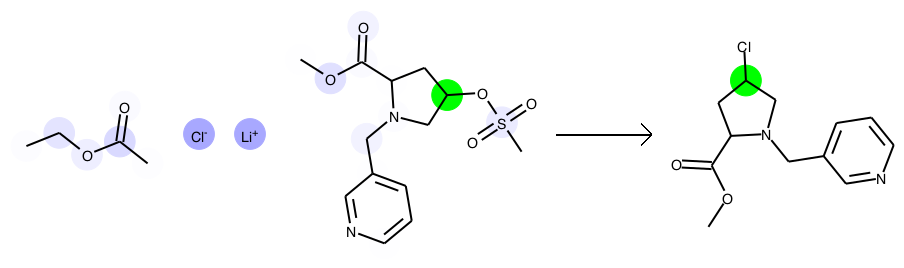

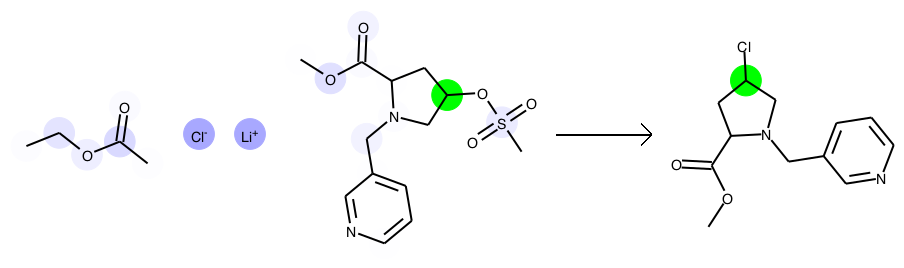

In [27]:
do_index(3876, atts=[11], showmap=False, save='examples/good_3877_chlorination_of_ether')

THIS IS TEST EXAMPLE 3223 (1-indexed)
1
O=[N+]([O-])c1ccc2oc(N3CCOCC3)nc2c1.S.O.C1CCOC1
S.O.C1CCOC1.O=[N+]([O-])c1ccc2oc(C3CNCCO3)nc2c1
S.O.C1CCOC1.O=[N+]([O-])c1ccc2oc(C3CNCCO3)nc2c1
O.C1CCOC1
CCOCCNc1nc2cc([N+](=O)[O-])ccc2o1.S.O.C1CCOC1
[CH2:14]1[CH2:15][O:16][CH2:17][CH2:18][NH:19]1.[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]2[c:8]([nH:9][c:10](=[S:12])[o:11]2)[cH:13]1.[O:21]1[CH2:22][CH2:23][CH2:24][CH2:25]1.[OH2:20]>>[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]2[c:8]([n:9][c:10]([N:19]3[CH2:14][CH2:15][O:16][CH2:17][CH2:18]3)[o:11]2)[cH:13]1
Prediction 1:    10.0-19.0-1.0   with score 4.218759059906006
Prediction 2:    10.0-12.0-0.0   with score -0.014352083206176758
Prediction 3:    1.0-3.0-0.0     with score -0.75909423828125
Prediction 4:    1.0-2.0-0.0     with score -0.7712416648864746
Prediction 5:    21.0-22.0-0.0   with score -4.319929599761963
Prediction 6:    21.0-25.0-0.0   with score -4.319929599761963
Prediction 7:    21.0-22.0-2.0   with score -4.565008163452148


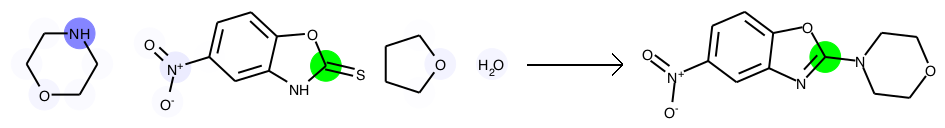

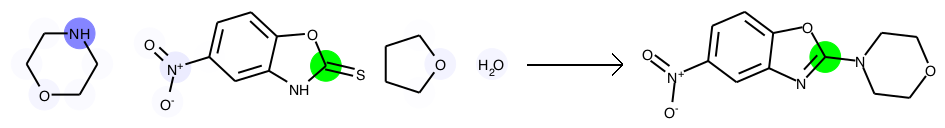

In [28]:
do_index(3222, atts=[10], showmap=False, save='examples/good_3223_amination_of_thiol')

THIS IS TEST EXAMPLE 3188 (1-indexed)
1
CCN(CC)CC.CCOC(=O)C(C)NC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)OCc1ccccc1.ClCCl.O=S(=O)(O)C(F)(F)F
CCN(CC)CC.C.CCOC(=O)CNC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)OCc1ccccc1.ClCCl.O=S(=O)(O)C(F)(F)F
CCN(CC)CC.ClCCl.CCOC(=O)C(C)(NC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)OCc1ccccc1)OS(=O)(=O)C(F)(F)F
CCN(CC)CC.CCOC(=O)C(C)C(N)(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)OCc1ccccc1.ClCCl.O=S(=O)(O)C(F)(F)F
CCN(CC)CC.CCO.ClCCl.CC1C(=O)N1C(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)OCc1ccccc1.O=S(=O)(O)C(F)(F)F
[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)[O:8][C:9]([CH:10]([CH2:11][c:12]1[cH:13][cH:14][c:15](-[c:18]2[cH:19][c:20]([Cl:24])[cH:21][cH:22][cH:23]2)[cH:16][cH:17]1)[NH2:25])=[O:26].[CH3:27][CH2:28][N:29]([CH2:30][CH3:31])[CH2:32][CH3:33].[Cl:49][CH2:50][Cl:51].[F:34][C:35]([F:36])([F:37])[S:38]([O:39][CH:40]([C:41](=[O:42])[O:43][CH2:44][CH3:45])[CH3:46])(=[O:47])=[O:48]>>[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)[O:8][C:9]([CH:10]([CH2:11][c:12]1[cH:13][cH:14][c:15](-[c:18]2[cH:19][c:20

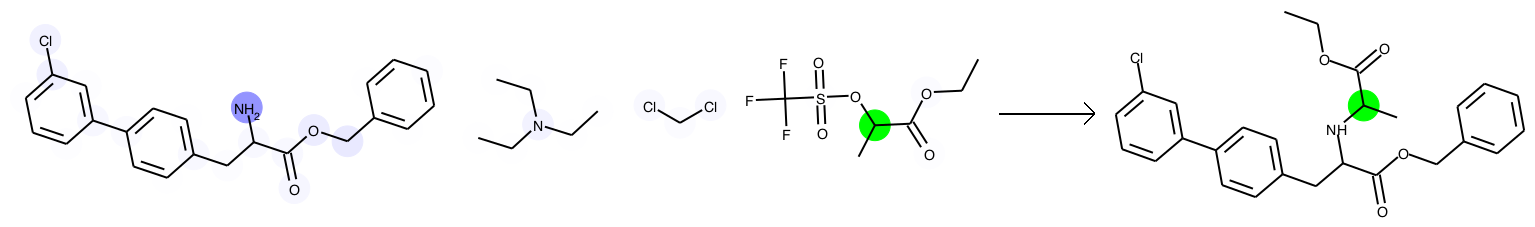

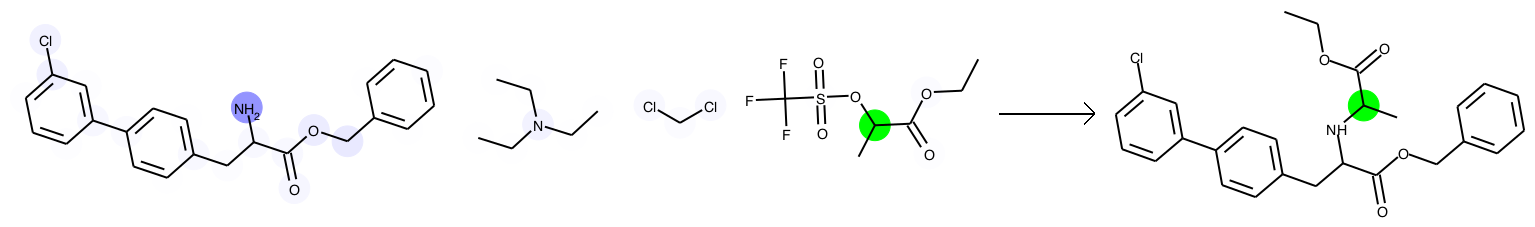

In [29]:
do_index(3187, atts=[40], showmap=False, save='examples/good_3188_CN')

THIS IS TEST EXAMPLE 3071 (1-indexed)
1
[I-].O.[K+].O=C([O-])O.CN(C)C=O.O=C1c2ccccc2OCOc2ccccc21
[I-].COc1ccccc1C(=O)c1ccccc1O.O.[K+].O=C([O-])O.CN(C)C=O
[I-].COc1ccccc1C(=O)c1ccccc1O.O.[K+].O=C([O-])O.CN(C)C=O
O=C(c1ccccc1O)c1ccccc1OCI.[I-].O.[K+].O=C([O-])O.CN(C)C=O
O=C(c1ccccc1O)c1ccccc1OCI.[I-].O.[K+].O=C([O-])O.CN(C)C=O
[C:20](=[O:21])([O-:22])[O-:23].[CH3:27][N:28]([CH3:29])[CH:30]=[O:31].[I:17][CH2:18][I:19].[K+:24].[K+:25].[OH2:26].[OH:1][c:2]1[c:3]([C:4](=[O:5])[c:6]2[c:7]([OH:12])[cH:8][cH:9][cH:10][cH:11]2)[cH:13][cH:14][cH:15][cH:16]1>>[O:1]1[c:2]2[c:3]([cH:13][cH:14][cH:15][cH:16]2)[C:4](=[O:5])[c:6]2[c:7]([cH:8][cH:9][cH:10][cH:11]2)[O:12][CH2:18]1
Prediction 1:    1.0-18.0-1.0    with score 3.002657890319824
Prediction 2:    12.0-18.0-1.0   with score 3.002657413482666
Prediction 3:    17.0-18.0-0.0   with score 2.790872097015381
Prediction 4:    18.0-19.0-0.0   with score 2.7908718585968018
Prediction 5:    20.0-21.0-0.0   with score -1.444704532623291
Prediction 6:    

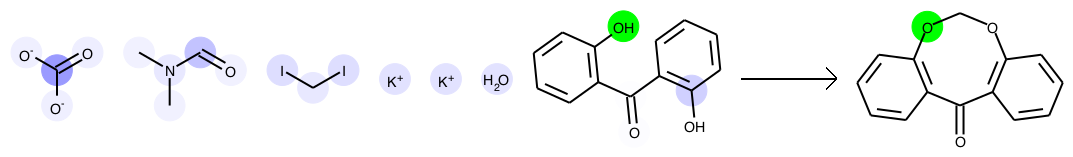

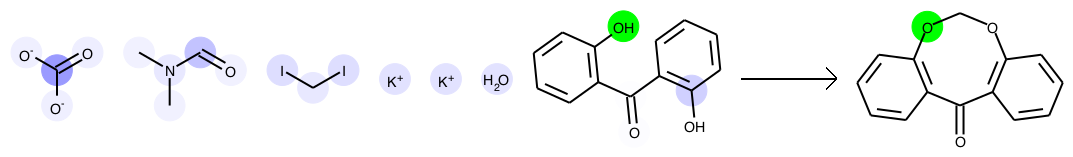

In [30]:
do_index(3070, atts=[12], showmap=False, save='examples/good_3071_diiodomethane_bridging')

THIS IS TEST EXAMPLE 1639 (1-indexed)
1
COC(=O)C1=C(Cl)C(=O)CC(c2ccc(Cl)c(OC)c2F)N1.ClCCl.O=[SH](=O)Cl
COC(=O)C1=C(Cl)C(=O)CC(c2ccc(Cl)c(OC)c2F)N1.ClCCl.O=[SH](=O)Cl
ClCCl.COC(=O)C1=CC(=O)C(Cl)C(c2ccc(Cl)c(OC)c2F)N1.O=[SH](=O)Cl
ClCCl.COC(=O)C1=CC(=O)C(Cl)C(c2ccc(Cl)c(OC)c2F)N1.O=[SH](=O)Cl
COC(=O)C1=CC(=O)CC(c2cc(Cl)c(Cl)c(OC)c2F)N1.ClCCl.O=[SH](=O)Cl
[CH3:1][O:2][C:3](=[O:4])[C:5]1=[CH:10][C:9](=[O:11])[CH2:8][CH:7]([c:12]2[c:13]([F:21])[c:14]([O:19][CH3:20])[c:15]([Cl:18])[cH:16][cH:17]2)[NH:6]1.[Cl:27][CH2:28][Cl:29].[S:22]([Cl:23])(=[O:24])([Cl:25])=[O:26]>>[CH3:1][O:2][C:3](=[O:4])[C:5]1=[C:10]([Cl:25])[C:9](=[O:11])[CH2:8][CH:7]([c:12]2[c:13]([F:21])[c:14]([O:19][CH3:20])[c:15]([Cl:18])[cH:16][cH:17]2)[NH:6]1
Prediction 1:    22.0-23.0-0.0   with score 0.5327412486076355
Prediction 2:    22.0-25.0-0.0   with score 0.5327412486076355
Prediction 3:    6.0-22.0-1.0    with score -0.014239490032196045
Prediction 4:    10.0-23.0-1.0   with score -0.32295292615890503
Prediction 5:    

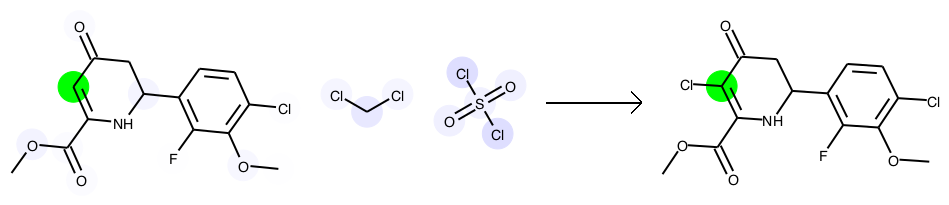

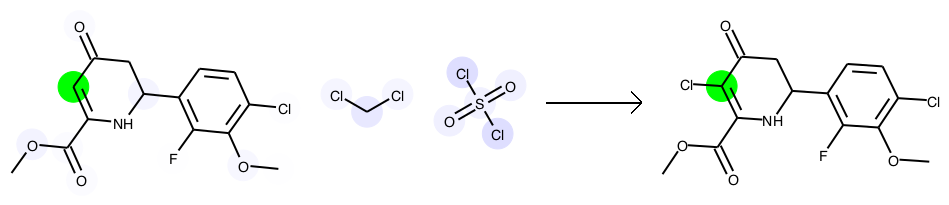

In [31]:
do_index(1638, atts=[10], showmap=False, save='examples/good_1639_alkene_chlorination')

THIS IS TEST EXAMPLE 1626 (1-indexed)
1
BrPBr.O.O=C(Br)c1ccc(C(F)(F)F)cc1
BrPBr.O.O=C(Br)c1ccc(C(F)(F)F)cc1
BrPBr.O.O=C(Br)c1ccc(C(F)(F)F)cc1
BrPBr.O.O=C(Br)c1ccc(C(F)(F)F)cc1
BrPBr.O.O=C(Br)c1ccc(C(F)(F)F)cc1
[OH:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][c:7]([C:10]([F:11])([F:12])[F:13])[cH:8][cH:9]1.[P:14]([Br:15])([Br:16])[Br:17]>>[O:1]=[C:2]([c:4]1[cH:5][cH:6][c:7]([C:10]([F:11])([F:12])[F:13])[cH:8][cH:9]1)[Br:15]
Prediction 1:    1.0-2.0-0.0     with score 0.024160802364349365
Prediction 2:    14.0-15.0-0.0   with score -0.986664891242981
Prediction 3:    14.0-16.0-0.0   with score -0.986664891242981
Prediction 4:    14.0-17.0-0.0   with score -0.986664891242981
Prediction 5:    1.0-2.0-2.0     with score -1.1767899990081787
Prediction 6:    2.0-17.0-1.0    with score -1.2385101318359375
Prediction 7:    2.0-15.0-1.0    with score -1.238510251045227
Prediction 8:    2.0-16.0-1.0    with score -1.238510251045227
Prediction 9:    2.0-3.0-0.0     with score -1.874103307723999
Prediction 10

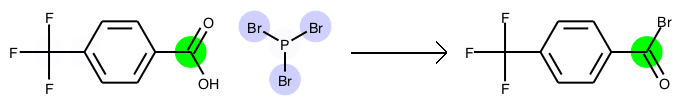

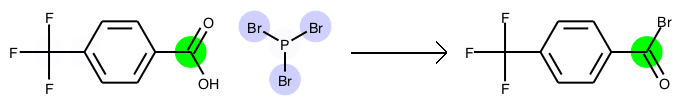

In [32]:
do_index(1625, atts=[2], showmap=False, save='examples/good_1626_pbr3')

THIS IS TEST EXAMPLE 1567 (1-indexed)
1
CCN(CC)CC.CC(=O)CC(=O)OCC[Si](C)(C)C
CCN(CC)CC.C=C(O)CC(=O)OCC[Si](C)(C)C
CCN(CC)CC.C[Si](C)(C)CCO.CC1CC(=O)O1
CCN(CC)CC.CCCC(=O)OCC[Si](C)(C)C.O
CCN(CC)CC.C[Si](C)(C)CC1CC(=O)CC(=O)O1
[CH2:15]=[C:16]1[CH2:17][C:18](=[O:20])[O:19]1.[CH3:1][Si:2]([CH2:3][CH2:4][OH:5])([CH3:6])[CH3:7].[CH3:8][CH2:9][N:10]([CH2:11][CH3:12])[CH2:13][CH3:14]>>[CH3:1][Si:2]([CH2:3][CH2:4][O:5][C:18]([CH2:17][C:16]([CH3:15])=[O:19])=[O:20])([CH3:6])[CH3:7]
Prediction 1:    15.0-16.0-1.0   with score 4.023101806640625
Prediction 2:    18.0-19.0-0.0   with score 0.9155766367912292
Prediction 3:    5.0-18.0-1.0    with score 0.2416919469833374
Prediction 4:    18.0-19.0-2.0   with score -0.8861275315284729
Prediction 5:    16.0-19.0-2.0   with score -1.0513861179351807
Prediction 6:    3.0-4.0-0.0     with score -3.0614187717437744
Prediction 7:    5.0-16.0-1.0    with score -3.617603302001953
Prediction 8:    9.0-10.0-0.0    with score -4.326784610748291
Prediction 9:    

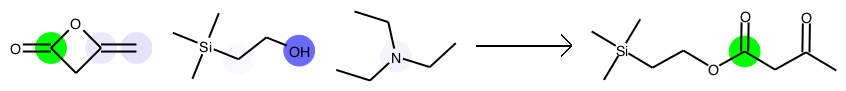

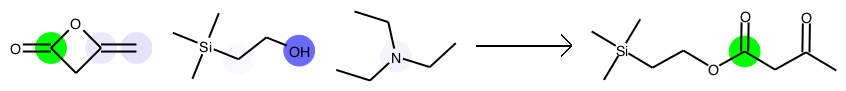

In [33]:
do_index(1566, atts=[18], showmap=False, save='examples/good_1567_ringopening_esterification')

THIS IS TEST EXAMPLE 1472 (1-indexed)
1
[Na+].O=S(=O)([O-])[O-].[Mg+].C=CC(NS(=O)C(C)(C)C)C1(c2ccc(F)cc2)CCC2(CC1)OCCO2.[Br-].C1CCOC1
[Na+].C=CC(N)C1(c2ccc(F)cc2)CCC2(CC1)OCCO2.[Mg+].CC(C)(C)[SH]=O.[Br-].O=S(=O)([O-])[O-].C1CCOC1
[Na+].O=S(=O)([O-])[O-].[Mg+].C=CCNS(=O)C(C)(C)C.Fc1ccc(C2CCC3(CC2)OCCO3)cc1.[Br-].C1CCOC1
[Na+].O=S(=O)([O-])[O-].[Mg+].CC(C)(C)S(=O)NC1(C2(c3ccc(F)cc3)CCC3(CC2)OCCO3)C=C1.[Br-].C1CCOC1
[Na+].O=S(=O)([O-])[O-].[Mg+].C=CCN.CC(C)(C)[SH]=O.Fc1ccc(C2CCC3(CC2)OCCO3)cc1.[Br-].C1CCOC1
[Br-:26].[CH:27](=[CH2:28])[Mg+:29].[F:1][c:2]1[cH:3][cH:4][c:5]([C:8]2([CH:18]=[N:19][S:20](=[O:21])[C:22]([CH3:23])([CH3:24])[CH3:25])[CH2:9][CH2:10][C:11]3([O:12][CH2:13][CH2:14][O:15]3)[CH2:16][CH2:17]2)[cH:6][cH:7]1.[Na+:30].[Na+:31].[O-:32][S:33](=[O:34])(=[O:35])[O-:36].[O:37]1[CH2:38][CH2:39][CH2:40][CH2:41]1>>[F:1][c:2]1[cH:3][cH:4][c:5]([C:8]2([CH:18]([NH:19][S:20](=[O:21])[C:22]([CH3:23])([CH3:24])[CH3:25])[CH:27]=[CH2:28])[CH2:9][CH2:10][C:11]3([O:12][CH2:13][CH2:14][O:15]3

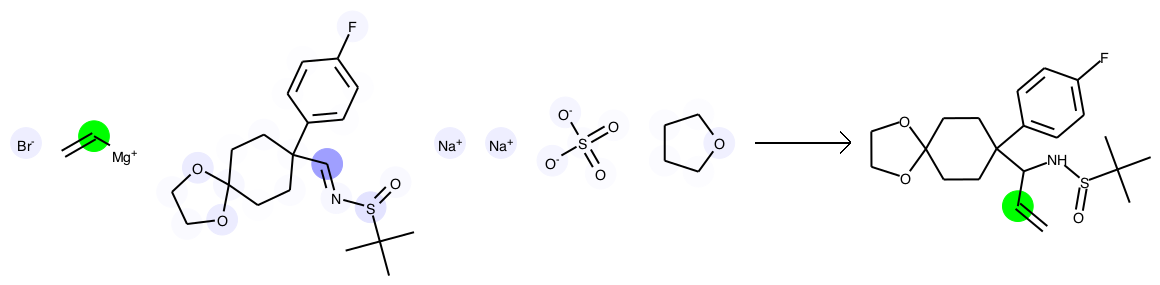

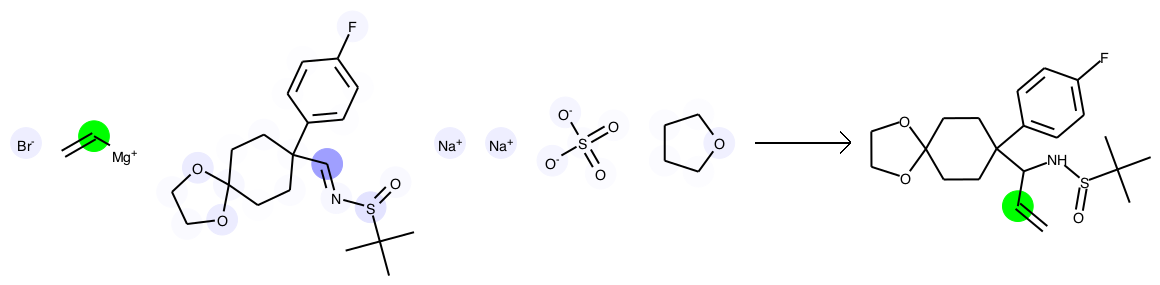

In [34]:
do_index(1471, atts=[27], showmap=False, save='examples/good_1472_imine_grignard')

THIS IS TEST EXAMPLE 1091 (1-indexed)
1
CC(Cl)OC(=O)Cl.ClCCCl.Cc1ccc(C)cc1.O=C1OC(c2ccccc2)(c2ccccc2)C2CNCCN12
CC(Cl)OC(=O)Cl.ClCCCl.CCN1C(=O)OC(c2ccccc2)(c2ccccc2)C1CN.Cc1ccc(C)cc1
CC(Cl)OC(=O)Cl.ClCCCl.C.O=C1OC(c2ccccc2)(c2ccccc2)C2CN(Cc3ccccc3)CCN12
CC(Cl)OC(=O)Cl.ClCCCl.CC1N(CCN)C(=O)OC1(c1ccccc1)c1ccccc1.Cc1ccc(C)cc1
CC(Cl)OC(=O)Cl.ClCCCl.Cc1ccccc1.CN1CCN2C(=O)OC(c3ccccc3)(c3ccccc3)C2C1
[CH3:1][c:2]1[cH:3][cH:4][c:5]([CH2:6][N:9]2[CH2:10][CH:11]3[N:12]([CH2:13][CH2:14]2)[C:15](=[O:30])[O:16][C:17]3([c:18]2[cH:19][cH:20][cH:21][cH:22][cH:23]2)[c:24]2[cH:25][cH:26][cH:27][cH:28][cH:29]2)[cH:7][cH:8]1.[Cl:31][C:32]([O:33][CH:34]([Cl:35])[CH3:36])=[O:37].[Cl:38][CH2:39][CH2:40][Cl:41]>>[NH:9]1[CH2:10][CH:11]2[N:12]([CH2:13][CH2:14]1)[C:15](=[O:30])[O:16][C:17]2([c:18]1[cH:19][cH:20][cH:21][cH:22][cH:23]1)[c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1
Prediction 1:    6.0-9.0-0.0     with score 5.23212194442749
Prediction 2:    31.0-32.0-0.0   with score -2.5203914642333984
Prediction 3: 

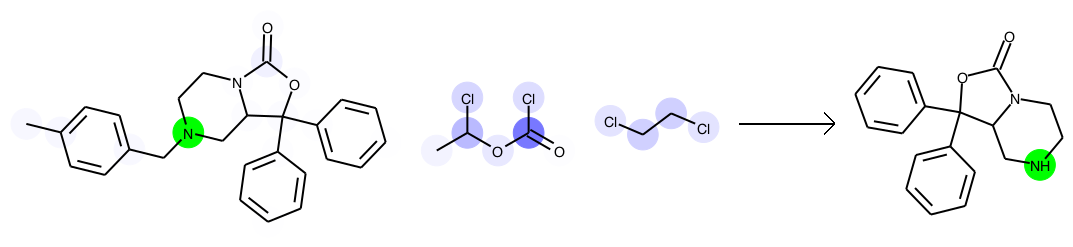

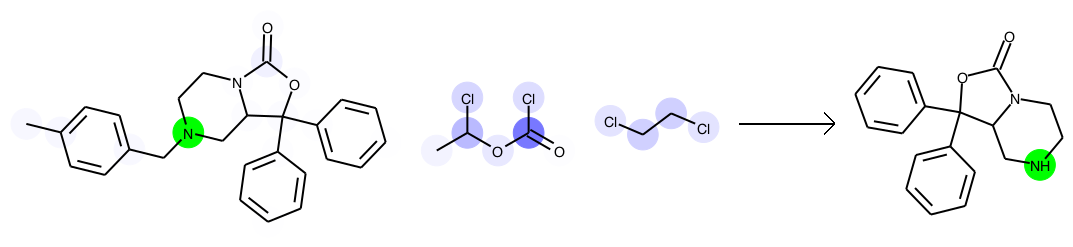

In [35]:
do_index(1090, atts=[9], showmap=False, save='examples/good_1091_deprotection')

THIS IS TEST EXAMPLE 915 (1-indexed)
1
CCN(CC)CC.OC(Cl)(Cl)Cl.ClCCl.CC(C)CC1NC(=O)OC1(c1ccccc1)c1ccccc1.Cl
CCN(CC)CC.CC(C)CC(NC(=O)O)C(c1ccccc1)c1ccccc1.OC(Cl)(Cl)Cl.ClCCl.Cl
CCN(CC)CC.CC(C)CC(NC(=O)Cl)C(O)(c1ccccc1)c1ccccc1.OC(Cl)(Cl)Cl.ClCCl
CCN(CC)CC.OC(Cl)(Cl)Cl.CC(C)CC(N)C(OC(=O)Cl)(c1ccccc1)c1ccccc1.ClCCl
CCN(CC)CC.OC(Cl)(Cl)Cl.CC(C)CC(N=C=O)C(O)(c1ccccc1)c1ccccc1.ClCCl.Cl
[CH3:29][CH2:30][N:31]([CH2:32][CH3:33])[CH2:34][CH3:35].[Cl:1][C:2](=[O:3])[O:4][C:5]([Cl:6])([Cl:7])[Cl:8].[Cl:36][CH2:37][Cl:38].[NH2:9][CH:10]([C:11]([OH:12])([c:13]1[cH:14][cH:15][cH:16][cH:17][cH:18]1)[c:19]1[cH:20][cH:21][cH:22][cH:23][cH:24]1)[CH2:25][CH:26]([CH3:27])[CH3:28]>>[C:2]1(=[O:3])[NH:9][CH:10]([CH2:25][CH:26]([CH3:27])[CH3:28])[C:11]([c:13]2[cH:14][cH:15][cH:16][cH:17][cH:18]2)([c:19]2[cH:20][cH:21][cH:22][cH:23][cH:24]2)[O:12]1
Prediction 1:    2.0-9.0-1.0     with score 3.553154945373535
Prediction 2:    2.0-12.0-1.0    with score 2.355111598968506
Prediction 3:    2.0-4.0-0.0     with scor

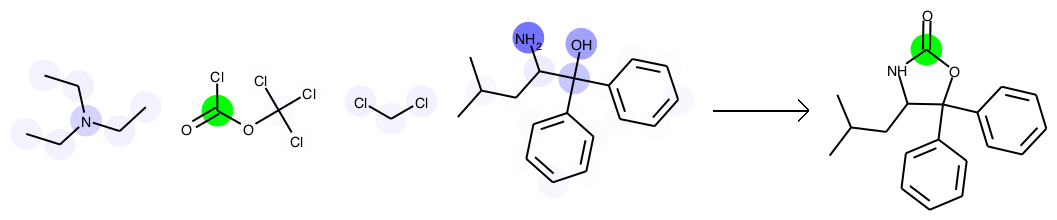

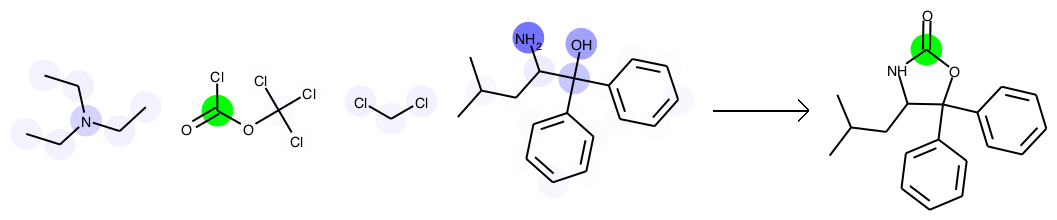

In [36]:
do_index(914, atts=[2], showmap=False, save='examples/good_915_ringclosing_amide')

THIS IS TEST EXAMPLE 819 (1-indexed)
1
O=C1C=C(S(=O)(=O)O)C(=O)O1
O=C1C=C(S(=O)(=O)O)C(=O)O1
O=C1C=C(S(=O)(=O)O)C(=O)O1
O=C1C=C(S(=O)(=O)O)C(=O)O1
O=C1C=C(S(=O)(=O)O)C(=O)O1
[O:1]=[S:2](=[O:3])=[O:4].[O:5]=[C:6]1[O:7][C:8](=[O:9])[CH:10]=[CH:11]1>>[O:1]=[S:2](=[O:3])([OH:4])[C:11]1=[CH:10][C:8](=[O:9])[O:7][C:6]1=[O:5]
Prediction 1:    6.0-7.0-0.0     with score -0.5289715528488159
Prediction 2:    7.0-8.0-0.0     with score -0.5289716124534607
Prediction 3:    1.0-2.0-1.0     with score -1.0188994407653809
Prediction 4:    2.0-3.0-1.0     with score -1.0188994407653809
Prediction 5:    2.0-4.0-1.0     with score -1.0188994407653809
Prediction 6:    2.0-6.0-1.0     with score -1.8233234882354736
Prediction 7:    2.0-8.0-1.0     with score -1.8233237266540527
Prediction 8:    2.0-10.0-1.0    with score -2.500417709350586
Prediction 9:    2.0-11.0-1.0    with score -2.500417709350586
Prediction 10:    5.0-6.0-0.0     with score -3.795524835586548
Atom ID 11 attends to...
    atom ID   2 

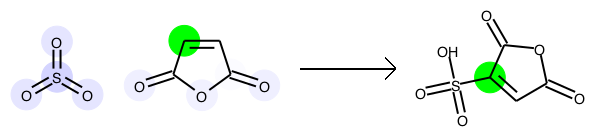

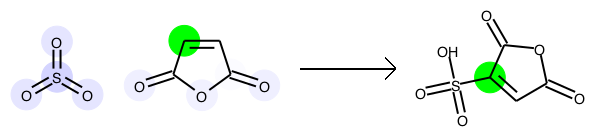

In [37]:
do_index(818, atts=[11], showmap=False, save='examples/good_819_sulfonylation')

THIS IS TEST EXAMPLE 784 (1-indexed)
1
[Cl-].O=[SH](=O)O.O.N#N.Oc1ccc2c(c1)C(C(Cl)(Cl)Cl)OC(C(Cl)(Cl)Cl)O2
[Cl-].O=[SH](=O)O.O.N#N.Oc1ccc2c(c1)C(C(Cl)(Cl)Cl)OC(C(Cl)(Cl)Cl)O2
[Cl-].O=S(=O)(O)Oc1ccc2c(c1)C(C(Cl)(Cl)Cl)OC(C(Cl)(Cl)Cl)O2.O.N#N
[Cl-].O=S(=O)(O)Oc1ccc2c(c1)C(C(Cl)(Cl)Cl)OC(C(Cl)(Cl)Cl)O2.O.N#N
[Cl-].O=S(=O)(O)O.O.N#N.ClC(Cl)(Cl)C1Oc2ccccc2C(C(Cl)(Cl)Cl)O1
[Cl-:1].[Cl:2][C:3]([CH:4]1[O:5][c:6]2[c:7]([cH:14][c:15]([N+:18]#[N:19])[cH:16][cH:17]2)[CH:8]([C:10]([Cl:11])([Cl:12])[Cl:13])[O:9]1)([Cl:20])[Cl:21].[OH2:27].[S:22]([OH:23])(=[O:24])(=[O:25])[OH:26]>>[Cl:2][C:3]([CH:4]1[O:5][c:6]2[c:7]([cH:14][c:15]([OH:23])[cH:16][cH:17]2)[CH:8]([C:10]([Cl:11])([Cl:12])[Cl:13])[O:9]1)([Cl:20])[Cl:21]
Prediction 1:    15.0-18.0-0.0   with score -0.6233502626419067
Prediction 2:    22.0-23.0-0.0   with score -2.7333524227142334
Prediction 3:    22.0-26.0-0.0   with score -2.7333526611328125
Prediction 4:    4.0-5.0-0.0     with score -3.3273494243621826
Prediction 5:    18.0-19.0-0.0   w

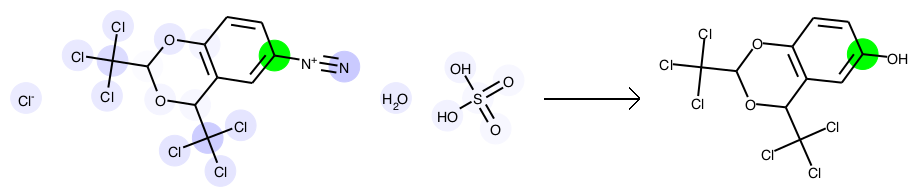

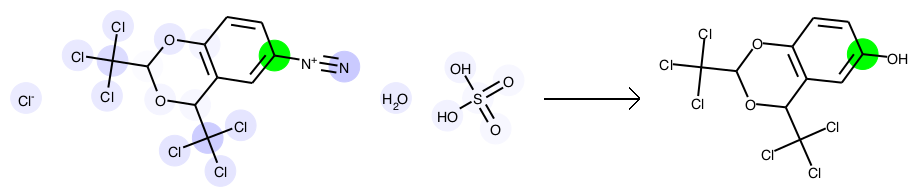

In [38]:
do_index(783, atts=[15], showmap=False, save='examples/good_784_diazo_to_phenol')

THIS IS TEST EXAMPLE 633 (1-indexed)
1
ClCCl.COC1C(Br)OC(COCc2ccccc2)C(OCc2ccccc2)C1OCc1ccccc1.CN(C)C=O.O=CC(=O)Br.O
ClCCl.COC1C(Br)OC(COCc2ccccc2)C(OCc2ccccc2)C1OCc1ccccc1.CN(C)C=O.O=CC(=O)Br.O
CN(C)C=O.ClCCl.[Br-].O.COC1C(C(=O)C(=O)Br)OC(COCc2ccccc2)C(OCc2ccccc2)C1OCc1ccccc1
CN(C)C=O.ClCCl.[Br-].O.COC1C(C(=O)C(=O)Br)OC(COCc2ccccc2)C(OCc2ccccc2)C1OCc1ccccc1
ClCCl.O.COC1COC(COCc2ccccc2)C(OCc2ccccc2)C1OCc1ccccc1.[Br-].O=c1oc1=O.CN(C)C=O
[C:40]([Br:41])(=[O:42])[C:44]([Br:43])=[O:45].[CH3:1][O:2][CH:3]1[CH:4]([OH:5])[O:6][CH:7]([CH2:26][O:27][CH2:28][c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[CH:8]([O:18][CH2:19][c:20]2[cH:21][cH:22][cH:23][cH:24][cH:25]2)[CH:9]1[O:10][CH2:11][c:12]1[cH:13][cH:14][cH:15][cH:16][cH:17]1.[Cl:47][CH2:48][Cl:49].[O:35]=[CH:36][N:37]([CH3:38])[CH3:39].[OH2:46]>>[CH3:1][O:2][CH:3]1[CH:4]([Br:43])[O:6][CH:7]([CH2:26][O:27][CH2:28][c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[CH:8]([O:18][CH2:19][c:20]2[cH:21][cH:22][cH:23][cH:24][cH:25]2)[CH:9]1[O:10][CH2:11][c

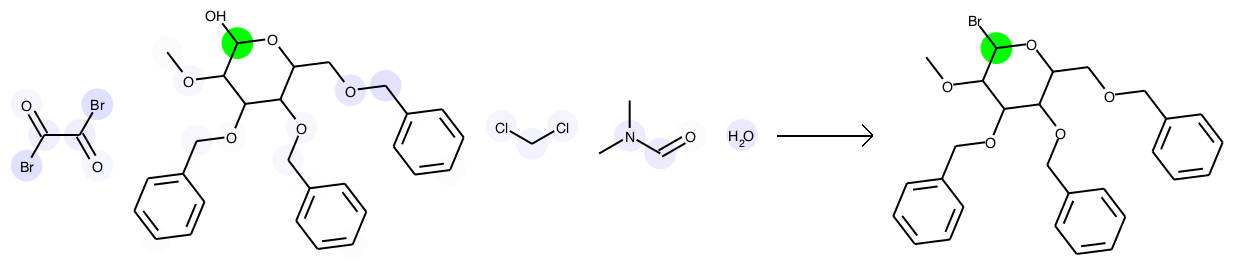

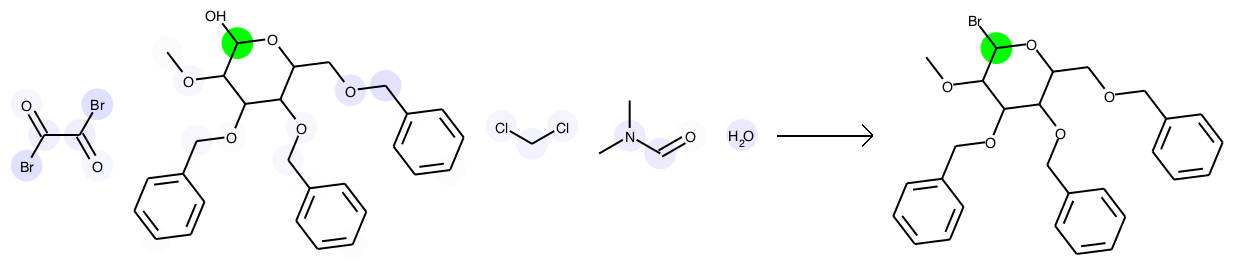

In [39]:
do_index(632, atts=[4], showmap=False, save='examples/good_633_bromination_of_alcohol')

THIS IS TEST EXAMPLE 1349 (1-indexed)
1
C.ClCCCl.C1CCSC1.c1ccc(C2CO2)cc1.CC[Zn+].ClCCl
C.ClCCCl.C1CCSC1.c1ccc(C2CO2)cc1.CC[Zn+].ClCCl
C.ClCCCl.C1CCSC1.CC[Zn+].CC(O)c1ccccc1.ClCCl
C.ClCCCl.C1CCSC1.CC[Zn+].CC(O)c1ccccc1.ClCCl
ClCCCl.C1CCSC1.ClCCl.CC[Zn]C.CC(O)c1ccccc1
[CH2:1]([Zn:2][CH2:3][CH3:4])[CH3:5].[CH2:6]1[CH2:7][S:8][CH2:9][CH2:10]1.[CH:11](=[O:12])[c:13]1[cH:14][cH:15][cH:16][cH:17][cH:18]1.[Cl:19][CH2:20][CH2:21][Cl:22].[Cl:23][CH2:24][Cl:25]>>[CH2:1]1[CH:11]([c:13]2[cH:14][cH:15][cH:16][cH:17][cH:18]2)[O:12]1
Prediction 1:    11.0-12.0-1.0   with score 2.974508762359619
Prediction 2:    1.0-5.0-0.0     with score 0.42352885007858276
Prediction 3:    3.0-4.0-0.0     with score 0.42352885007858276
Prediction 4:    1.0-11.0-1.0    with score 0.13613605499267578
Prediction 5:    3.0-11.0-1.0    with score 0.13613593578338623
Prediction 6:    1.0-2.0-0.0     with score -1.195012092590332
Prediction 7:    2.0-3.0-0.0     with score -1.195012092590332
Prediction 8:    3.0-12.0-1.0   

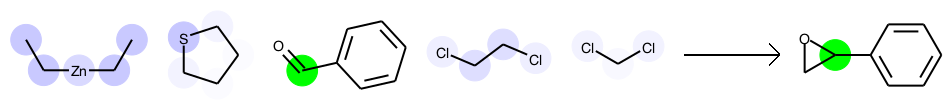

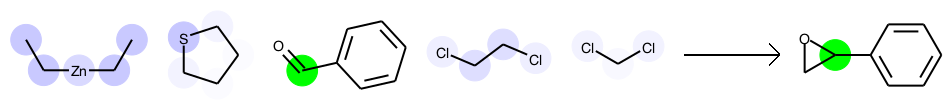

In [40]:
do_index(1348, atts=[11], showmap=False, save='examples/good_1349_epoxide')

THIS IS TEST EXAMPLE 228 (1-indexed)
1
[F-].C[SiH](C)C.Cl.CCN(C(C)C)C(C)C.COc1cc[nH]c1C=C1C(=O)Nc2ccc([N+](=O)[O-])c(N=[N+]=[N-])c21.CCO.C1CCOC1
C[SiH](C)C.Cl.CCN(C(C)C)C(C)C.CCO.COc1cc[nH]c1C(N=[N+]=[N-])C1C(=O)Nc2ccc([N+](=O)[O-])c(F)c21.C1CCOC1
C[SiH](C)C.Cl.CCN(C(C)C)C(C)C.CCO.COc1cc[nH]c1C(N=[N+]=[N-])=C1C(=O)Nc2ccc([N+](=O)[O-])c(F)c21.C1CCOC1
C[SiH](C)C.Cl.CCN(C(C)C)C(C)C.COc1ccn(N=[N+]=[N-])c1C=C1C(=O)Nc2ccc([N+](=O)[O-])c(F)c21.CCO.C1CCOC1
[F-].C[SiH](C)C.COc1cc[nH]c1C1=C2C(=O)Nc3ccc([N+](=O)[O-])c(c32)[N+]1=[N+]=[N-].Cl.CCN(C(C)C)C(C)C.CCO.C1CCOC1
[CH2:40]1[O:41][CH2:42][CH2:43][CH2:44]1.[CH3:32][Si:33]([CH3:34])([CH3:35])[N:36]=[N+:37]=[N-:38].[CH3:45][CH2:46][OH:47].[CH:23]([N:24]([CH:25]([CH3:26])[CH3:27])[CH2:28][CH3:29])([CH3:30])[CH3:31].[ClH:39].[F:1][c:2]1[c:3]2[c:7]([cH:8][cH:9][c:10]1[N+:11](=[O:12])[O-:13])[NH:6][C:5](=[O:14])[C:4]2=[CH:15][c:16]1[nH:17][cH:18][cH:19][c:20]1[O:21][CH3:22]>>[c:2]1([N:36]=[N+:37]=[N-:38])[c:3]2[c:7]([cH:8][cH:9][c:10]1[N+:11](=[O:12]

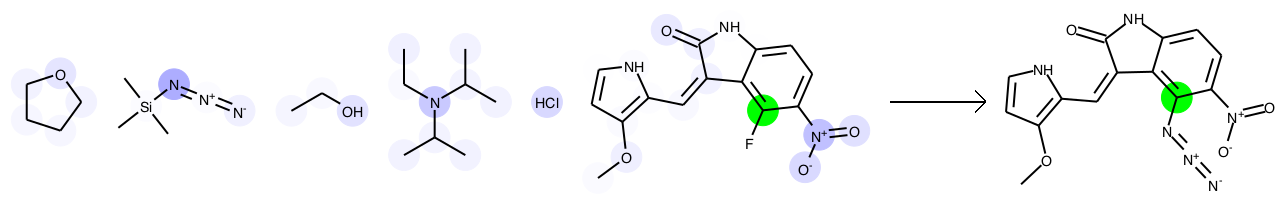

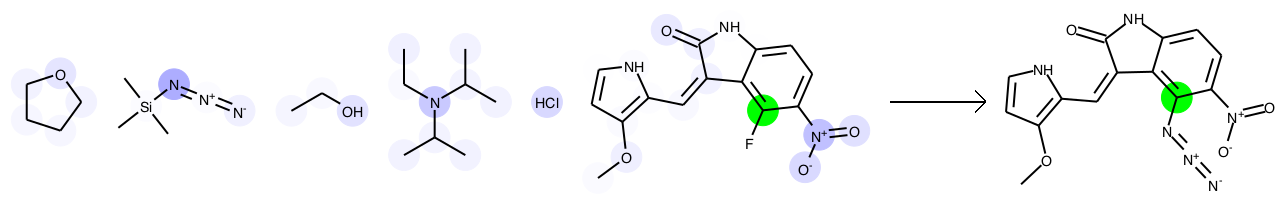

In [41]:
do_index(227, atts=[2], showmap=False, save='examples/good_228_azidation_of_fluoroarene')

THIS IS TEST EXAMPLE 91 (1-indexed)
1
Cc1sccc1Cc1ccc(F)cc1.[Br-].[Mg+].[I-]
C.[Br-].[I-].Fc1ccc(Cc2ccsc2[Mg+])cc1
[Br-].Fc1ccc(C2=Cc3sccc32)cc1.[Mg+].[I-]
[Br-].[I-]
C=C(c1ccc(F)cc1)c1ccsc1I.[Br-].[Mg+]
[Br-:15].[CH3:16][Mg+:17].[I:1][c:2]1[s:3][cH:4][cH:5][c:6]1[CH2:7][c:8]1[cH:9][cH:10][c:11]([F:14])[cH:12][cH:13]1>>[c:2]1([CH3:16])[s:3][cH:4][cH:5][c:6]1[CH2:7][c:8]1[cH:9][cH:10][c:11]([F:14])[cH:12][cH:13]1
Prediction 1:    1.0-2.0-0.0     with score 5.392226219177246
Prediction 2:    16.0-17.0-0.0   with score 3.3661084175109863
Prediction 3:    2.0-16.0-1.0    with score 1.596379280090332
Prediction 4:    2.0-15.0-1.0    with score -2.556800365447998
Prediction 5:    2.0-17.0-1.0    with score -3.3880820274353027
Prediction 6:    7.0-16.0-1.0    with score -5.2487053871154785
Prediction 7:    7.0-8.0-0.0     with score -5.742784023284912
Prediction 8:    15.0-16.0-1.0   with score -5.922946453094482
Prediction 9:    7.0-15.0-1.0    with score -6.035699367523193
Prediction 10:    

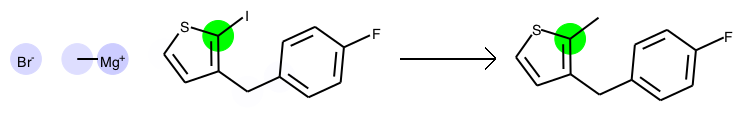

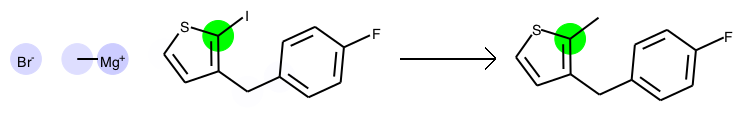

In [42]:
do_index(90, atts=[2], showmap=False, save='examples/good_91_aryliodide_methylation')

THIS IS TEST EXAMPLE 56 (1-indexed)
1
O=[N+]([O-])[O-].Cc1cc(CBr)cc2c1C(=O)N(Cc1ccc(OC(F)(F)F)cc1)C2.[Na+].O.N
O=[N+]([O-])[O-].Cc1cc(Br)cc2c1C(=O)N(Cc1ccc(OC(F)(F)F)cc1)C2.CN.O.[Na+]
[Na+].O=[N+]([O-])[O-].O.N.[Br-].Cc1cc(C)c2c(c1)CN(Cc1ccc(OC(F)(F)F)cc1)C2=O
Cc1cc(CN)cc2c1C(=O)NC2.Cc1ccc(OC(F)(F)F)cc1.O=[N+]([O-])[O-].O.[Br-].[Na+]
O=[N+]([O-])[O-].Cc1cc(CNBr)cc2c1C(=O)N(Cc1ccc(OC(F)(F)F)cc1)C2.O.[Na+]
[BrH:31].[NH2:1][CH2:2][c:3]1[cH:4][c:5]2[c:9]([c:10]([CH3:12])[cH:11]1)[C:8](=[O:13])[N:7]([CH2:14][c:15]1[cH:16][cH:17][c:18]([O:21][C:22]([F:23])([F:24])[F:25])[cH:19][cH:20]1)[CH2:6]2.[Na+:26].[O-:27][N+:28](=[O:29])[O-:30].[OH2:32]>>[CH2:2]([c:3]1[cH:4][c:5]2[c:9]([c:10]([CH3:12])[cH:11]1)[C:8](=[O:13])[N:7]([CH2:14][c:15]1[cH:16][cH:17][c:18]([O:21][C:22]([F:23])([F:24])[F:25])[cH:19][cH:20]1)[CH2:6]2)[Br:31]
Prediction 1:    28.0-29.0-0.0   with score -1.1329278945922852
Prediction 2:    27.0-28.0-0.0   with score -1.999114990234375
Prediction 3:    28.0-30.0-0.0   with score -1

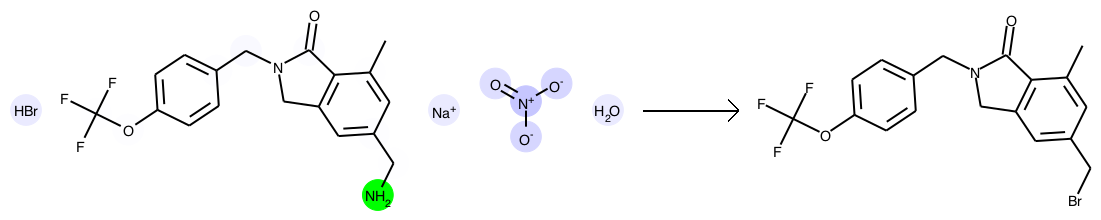

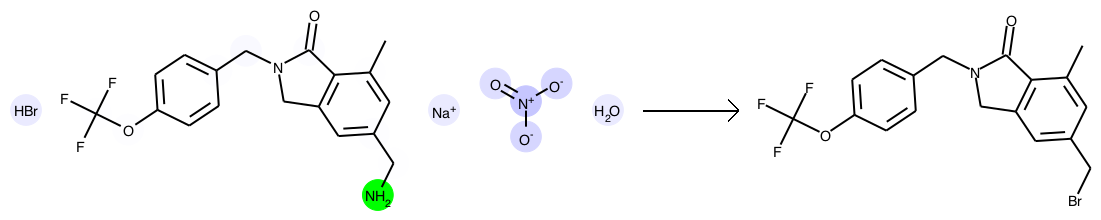

In [43]:
do_index(55, atts=[1], showmap=False, save='examples/good_56_amine_to_bromide')

# Second-rarest set of templates

In [44]:
df_rankpred_raretemplates = df_rankpred.loc[df_templates.found_count.between(0, 9)]
df_rankpred_raretemplates = df_rankpred_raretemplates.loc[df_rankpred_raretemplates['rank (10 if not found)'] == 1]
df_rankpred_raretemplates.iloc[range(0, 50)]

reactants  \
26    [CH3:11][O:12][C:13]([CH:14]([NH2:15])[CH2:16]...   
33    [B-:1]([F:2])([F:3])([F:4])[F:5].[C:10]([CH3:1...   
44    [Br:1][CH:2]1[CH2:3][O:4][CH2:5][CH2:6][n:7]2[...   
80    [Br:2][CH:3]([Br:4])[CH3:5].[CH2:6]([CH2:7][CH...   
101   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
167   [Br:35][CH2:36][CH2:37][CH2:38][C:39](=[O:40])...   
262   [P:6](=[O:7])([OH:8])([OH:9])[CH2:10][N:11]([C...   
303   [Br:1][c:2]1[cH:3][cH:4][c:5]([S:6]([O:7][CH2:...   
319   [CH2:35]1[CH2:37][CH2:36][CH2:38][O:39]1.[NH2:...   
337   [C:1]([O:2][C:3](=[O:4])[N:8]1[CH2:9][CH:10]([...   
347   [Br:1][c:2]1[cH:3][c:4]([N:8]2[CH:9]3[CH2:10][...   
397   [CH3:23][C:24](=[O:25])[OH:26].[CH3:27][C:28](...   
512   [Br:19][c:20]1[cH:21][cH:22][c:23]([S:24]([O:2...   
522   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
589   [C:1](#[N:2])[BH3-:3].[CH3:18][C:19](=[O:20])[...   
746   [CH2:1]([CH:2]=[CH:3][c:4]1[cH:5][cH:6][cH:7][...   
797   [Cl:1][c:2]1[cH:3][c:4]2[c:5]([n:6][cH:7]1)[CH...   
829   [CH3:8][CH2:9][CH2:10][CH2:11][Li:12].[CH:1]([...   
872   [N:12](=[O:13])[O:14][CH2:15][CH2:16][CH:17]([...   
1022  [Cl-:11].[F:12][c:13]1[cH:14][cH:15][c:16]([CH...   
1251  [C-:13]#[N:14].[CH3:21][CH2:22][O:23][C:24](=[...   
1300  [C:30](=[O:31])([O-:32])[O-:33].[CH2:41]([CH3:...   
1350  [C:1]([CH3:2])(=[O:3])[O:4][CH:5]([CH2:6][CH2:...   
1362  [CH3:1][S:2]([O:3][CH:6]1[CH:7]([O:4][S:5]([CH...   
1396  [Cl:51][CH2:52][Cl:53].[OH:44][C:45]([C:46]([F...   
1440  [C:36](=[O:37])([O-:38])[O-:39].[CH2:10]([O:11...   
1513  [Na+:24].[O:1]1[CH:2]([O:7][N:8]2[C:9](=[O:22]...   
1549  [C:2]1(=[O:17])[c:3]2[c:4]([cH:13][cH:14][cH:1...   
1621  [C:15](=[O:16])([OH:17])[O-:18].[CH3:20][CH2:2...   
1661  [CH3:15][c:16]1[cH:17][cH:18][cH:19][cH:20][cH...   
1680  [Br:25][C:26]([F:27])([F:28])[C:29]([F:30])([F...   
1751  [CH3:1][O:2][CH:3]([O:4][CH2:5][O:7][CH:8]([CH...   
1803  [Cl:3][C:4]([CH2:5][CH:6]1[CH:7]([C:11](=[O:12...   
1833  [CH3:1][O:2][CH2:3][CH2:4][O:5][c:6]1[c:7]([S:...   
1842  [C:47]([O-:48])(=[O:49])[CH3:50].[C:52]([O-:53...   
1967  [CH2:36]1[O:37][CH2:38][CH2:39][O:40][CH2:41]1...   
2212  [Br+2:1]([O-:2])([O-:3])[O-:4].[CH2:31]([O:32]...   
2425  [C:37](=[O:38])([O-:39])[O-:40].[CH3:21][CH:22...   
2446  [CH3:18][O:19][CH:20]([O:21][CH3:22])[CH2:23][...   
2583  [CH3:1][C:2]1([CH3:15])[O:3][CH2:4][CH:5]([CH2...   
2596  [CH3:74][C:75]#[N:76].[CH3:77][N:78]([c:79]1[c...   
2635  [Br-:57].[CH2:116]([OH:117])[CH3:118].[CH3:58]...   
2677  [Br:2][c:3]1[cH:4][c:5]([Cl:9])[cH:6][cH:7][cH...   
2723  [Br:15][CH:16]([C:17](=[O:18])[O:19][CH2:20][C...   
2726  [Br-:35].[CH3:28][c:29]1[cH:30][cH:31][cH:32][...   
2789  [CH3:20][OH:21].[Cl:1][c:2]1[cH:3][cH:4][c:5](...   
2813  [Br:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16...   
2878  [C:33]([CH2:34][C:35](=[O:36])[O:37][CH2:38][C...   
2968  [C:2](#[N:3])[c:4]1[c:5](=[O:17])[nH:6][c:7](=...   
3066  [CH3:1][O:2][C:3]([CH2:4][n:5]1[c:6]([CH3:26])...   

                                               products  \
26    [CH3:11][O:12][C:13]([CH:14]([NH:15][C:33]([C:...   
33    [CH3:6][O:24][C:21]1=[N:20][CH2:19][CH2:18][N:...   
44    [CH:2]1([NH2:20])[CH2:3][O:4][CH2:5][CH2:6][n:...   
80    [CH2:6]([CH2:7][CH2:8][CH2:9][CH2:10][CH2:11][...   
101   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
167   [N:1]1([c:2]2[cH:3][cH:4][c:5]3[c:6]4[c:7](-[c...   
262   [P:6](=[O:7])([OH:8])([OH:9])[CH2:10][NH:11][C...   
303   [CH2:12]([CH2:13][O:14][CH2:15][c:16]1[cH:17][...   
319   [NH:1]([CH:2]([C:3](=[O:4])[O:5][CH3:6])[CH2:7...   
337   [N:8]1([C:53]([NH:52][CH2:50][CH3:51])=[O:54])...   
347   [c:2]1([CH:22]=[CH2:23])[cH:3][c:4]([N:8]2[CH:...   
397   [Cl:1][c:2]1[c:3]([O:12][CH3:13])[c:4]([CH:11]...   
512   [C:1](#[N:2])[c:3]1[cH:4][c:5]2[cH:6][cH:7][c:...   
522   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
589   [CH2:1]([NH2:2])[c:12]1[cH:11][cH:10][c:9]([O:...   
746   [CH2:1]([CH:2]=[CH:3][c:4]1[cH:5][cH:6][cH:7][...   
797   [Cl:1][c:2]1[cH:3][c:4]([C:

THIS IS TEST EXAMPLE 1843 (1-indexed)
1
CC(C)N1CCN(C(=O)c2ccc3c(c2)cc(C(=O)N2CCC(F)(F)CC2)n3C2CC2)CC1.OBO.[Cu+2].ClC(Cl)Cl.c1ccncc1.CC(=O)O
OBO.[Cu+2].ClC(Cl)Cl.c1ccncc1.CC(=O)O.CC(C)N1CCN(C(=O)c2ccc3c(c2)cc(C(=O)N2CCC(F)(F)CC2)n3C2=CC2)CC1
OBO.[Cu+2].ClC(Cl)Cl.c1ccncc1.CC(=O)O.CC(C)N1CCN(C(=O)c2ccc3c(c2)cc(C(=O)N2CCC(F)(F)CC2)n3C2=CC2)CC1
OBO.[Cu+2].CC.ClC(Cl)Cl.c1ccncc1.CC(=O)O.CC(C)N1CCN(C(=O)c2ccc3c(c2)cc(C(=O)N2CCC(F)(F)CC2)n3C)CC1
OBO.[Cu+2].CCCn1c(C(=O)N2CCC(F)(F)CC2)cc2cc(C(=O)N3CCN(C(C)C)CC3)ccc21.ClC(Cl)Cl.c1ccncc1.CC(=O)O
[C:47]([O-:48])(=[O:49])[CH3:50].[C:52]([O-:53])(=[O:54])[CH3:55].[CH:31]1([B:34]([OH:35])[OH:36])[CH2:32][CH2:33]1.[CH:43]([Cl:44])([Cl:45])[Cl:46].[Cu+2:51].[F:1][C:2]1([F:30])[CH2:3][CH2:4][N:5]([C:8](=[O:9])[c:10]2[nH:11][c:12]3[cH:13][cH:14][c:15]([C:19](=[O:20])[N:21]4[CH2:22][CH2:23][N:24]([CH:27]([CH3:28])[CH3:29])[CH2:25][CH2:26]4)[cH:16][c:17]3[cH:18]2)[CH2:6][CH2:7]1.[cH:37]1[cH:38][cH:39][n:40][cH:41][cH:42]1>>[F:1][C:2]1([F:30])[CH2:3][CH2:4][N

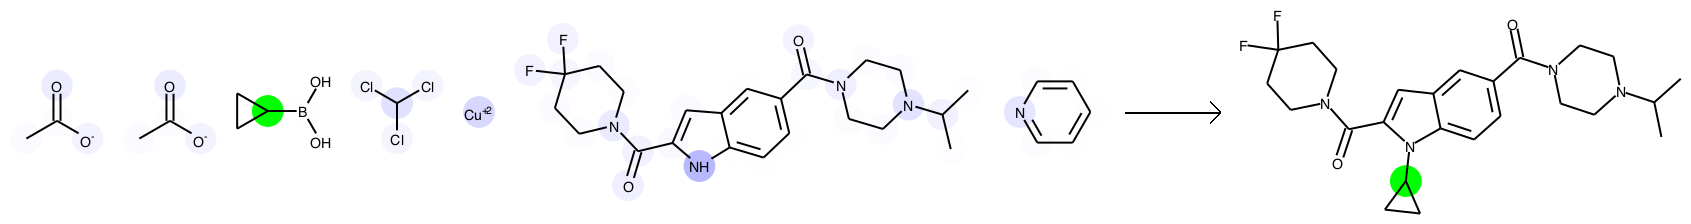

In [45]:
do_index(1842, atts=[31], showmap=False, save='examples/good2_1843_cyclopropanation');

THIS IS TEST EXAMPLE 1252 (1-indexed)
1
N#CC(O)c1cccc(OC(F)F)c1.[Na+].O=S([O-])O.CCOC(C)=O.O.[K+]
[Na+].O=S([O-])O.CCOC(C)=O.O.[K+].N#CCc1cccc(OC(F)F)c1
[Na+].O=S([O-])O.CCOC(C)=O.O.[K+].N#CC(=O)c1cccc(OC(F)F)c1
CC(O)c1cccc(OC(F)F)c1.[Na+].O=S([O-])O.CCOC(C)=O.O.N.[K+]
[Na+].O=S([O-])O.CCOC(C)=O.O.N.[K+].FC(F)Oc1cccc(C2CO2)c1
[C-:13]#[N:14].[CH3:21][CH2:22][O:23][C:24](=[O:25])[CH3:26].[F:1][CH:2]([O:3][c:4]1[cH:5][c:6]([CH:7]=[O:8])[cH:9][cH:10][cH:11]1)[F:12].[K+:15].[Na+:20].[OH2:27].[S:16](=[O:17])([OH:18])[O-:19]>>[F:1][CH:2]([O:3][c:4]1[cH:5][c:6]([CH:7]([OH:8])[C:13]#[N:14])[cH:9][cH:10][cH:11]1)[F:12]
Prediction 1:    7.0-13.0-1.0    with score 3.5726704597473145
Prediction 2:    7.0-8.0-1.0     with score 1.1493659019470215
Prediction 3:    7.0-15.0-1.0    with score -3.9528591632843018
Prediction 4:    7.0-20.0-1.0    with score -3.9528591632843018
Prediction 5:    7.0-27.0-1.0    with score -3.9528591632843018
Prediction 6:    7.0-8.0-0.0     with score -4.102067947387695
Pr

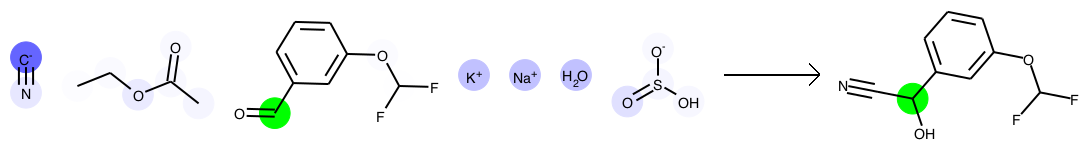

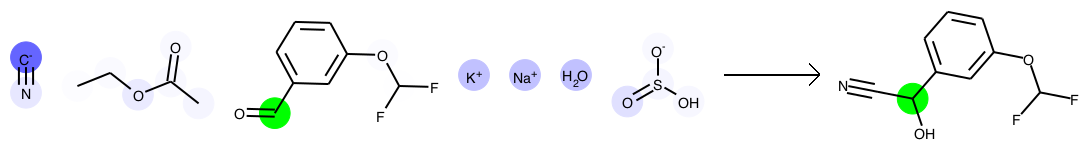

In [46]:
do_index(1251, atts=[7], showmap=False, save='examples/good2_1252_cyanation')

THIS IS TEST EXAMPLE 873 (1-indexed)
1
CC(C)CCO.CCOC(=O)C(=NO)c1cnsn1
CCOC(=O)C(=[N+]=O)c1cnsn1.CC(C)CCO
CCOC(=O)C(=NOCCC(C)C)c1cnsn1.O
CCOC(=O)C(c1cnsn1)=[N+]([O-])OCCC(C)C
CCOC(=O)C(=N)c1cnsn1.CC(C)CCO.O
[N:12](=[O:13])[O:14][CH2:15][CH2:16][CH:17]([CH3:18])[CH3:19].[s:1]1[n:2][c:3]([CH2:6][C:7](=[O:8])[O:9][CH2:10][CH3:11])[cH:4][n:5]1>>[s:1]1[n:2][c:3]([C:6]([C:7](=[O:8])[O:9][CH2:10][CH3:11])=[N:12][OH:13])[cH:4][n:5]1
Prediction 1:    6.0-12.0-2.0    with score 4.373411178588867
Prediction 2:    12.0-14.0-0.0   with score 2.170666456222534
Prediction 3:    12.0-13.0-1.0   with score -0.4067670702934265
Prediction 4:    12.0-14.0-2.0   with score -2.586886167526245
Prediction 5:    4.0-12.0-1.0    with score -2.9594309329986572
Prediction 6:    9.0-10.0-0.0    with score -3.2131495475769043
Prediction 7:    12.0-13.0-0.0   with score -3.379432201385498
Prediction 8:    6.0-12.0-1.0    with score -3.950580596923828
Prediction 9:    6.0-14.0-1.0    with score -4.017679214477539
Pred

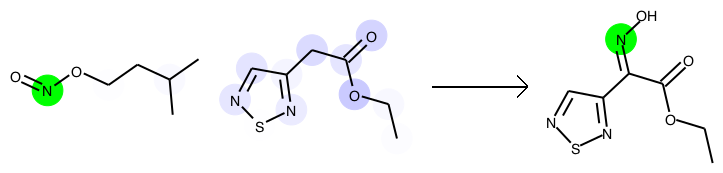

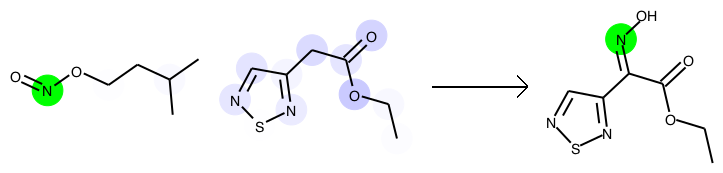

In [47]:
do_index(872, atts=[12], showmap=False, save='examples/good2_873_aldol_for_imine')

THIS IS TEST EXAMPLE 747 (1-indexed)
1
CCN(CC)CC.S=C1N(CC=Cc2ccccc2)CCN1c1cccnc1.C1CCOC1.Cl
CCN(CC)CC.S=CN(CCNCC=Cc1ccccc1)c1cccnc1.C1CCOC1.Cl
CCN(CC)CC.S=C1C(C=Cc2ccccc2)NCCN1c1cccnc1.C1CCOC1.Cl
CCN(CC)CC.S=CN(CC=Cc1ccccc1)CCNc1cccnc1.C1CCOC1.Cl
CCN(CC)CC.S=C1C(c2ccccc2)=CCNCCN1c1cccnc1.C1CCOC1.Cl
[CH2:1]([CH:2]=[CH:3][c:4]1[cH:5][cH:6][cH:7][cH:8][cH:9]1)[NH:10][CH2:11][CH2:12][NH:13][c:14]1[cH:15][n:16][cH:17][cH:18][cH:19]1.[CH3:20][CH2:21][N:22]([CH2:23][CH3:24])[CH2:25][CH3:26].[Cl:27][C:28]([Cl:29])=[S:30].[O:31]1[CH2:32][CH2:33][CH2:34][CH2:35]1>>[CH2:1]([CH:2]=[CH:3][c:4]1[cH:5][cH:6][cH:7][cH:8][cH:9]1)[N:10]1[CH2:11][CH2:12][N:13]([c:14]2[cH:15][n:16][cH:17][cH:18][cH:19]2)[C:28]1=[S:30]
Prediction 1:    27.0-28.0-0.0   with score 5.8319597244262695
Prediction 2:    28.0-29.0-0.0   with score 5.8319597244262695
Prediction 3:    13.0-28.0-1.0   with score 2.532474994659424
Prediction 4:    10.0-28.0-1.0   with score 1.0584619045257568
Prediction 5:    28.0-30.0-1.0   with sco

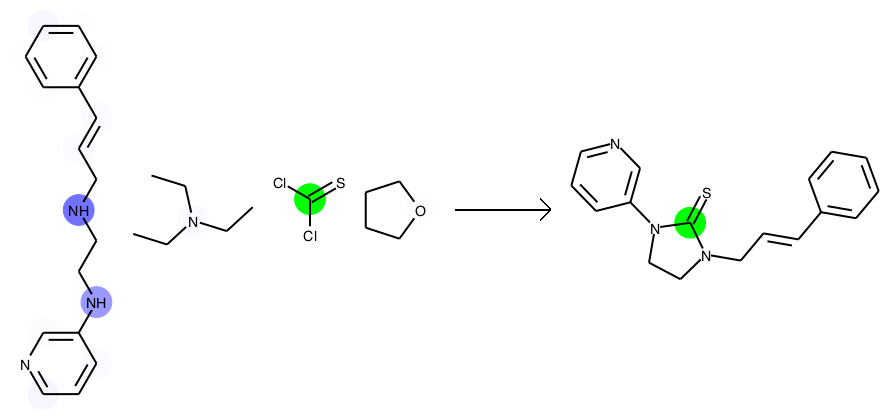

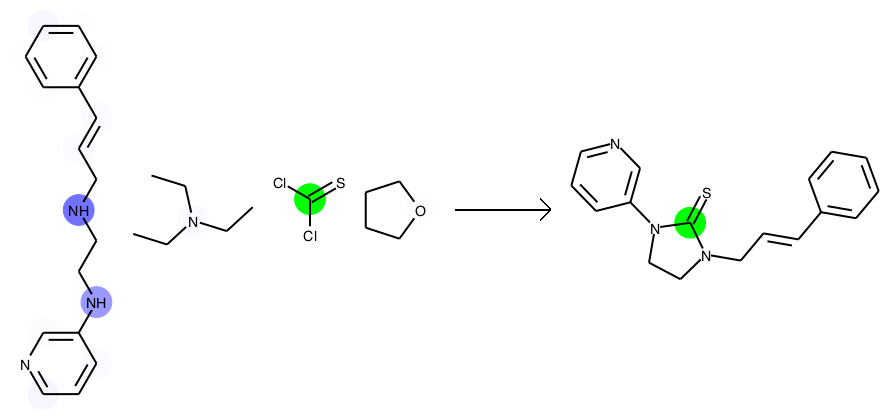

In [48]:
do_index(746, atts=[28], showmap=False, save='examples/good2_747_thioamide_formation')

THIS IS TEST EXAMPLE 3830 (1-indexed)
1
CCOC(=O)C=Cc1ccc(O)cc1.O.C1CCNCC1.CC(C)OC(C)C.O=C[O-].CCCCCC.c1ccncc1
O.c1ccncc1.CC(C)OC(C)C.CCOC(=O)C(=Cc1ccc(O)cc1)C(=O)O.CCCCCC.C1CCNCC1
CC(C)OC(C)C.C1CCNCC1.C=O.CCCCCC.CCOC(=O)CC(=O)c1ccc(O)cc1.c1ccncc1.[O-]
CCOC(=O)CCc1ccc(O)cc1.O.C1CCNCC1.CC(C)OC(C)C.O=C[O-].CCCCCC.c1ccncc1
CC(C)OC(C)C.CCOC(=O)CCc1ccc(O)cc1.O.C1CCNCC1.C=O.CCCCCC.c1ccncc1.[O-]
[C:10]([CH2:11][C:12]([O-:13])=[O:14])(=[O:15])[O:16][CH2:17][CH3:18].[CH2:19]1[CH2:20][CH2:21][NH:22][CH2:23][CH2:24]1.[CH3:25][CH2:26][CH2:27][CH2:28][CH2:29][CH3:30].[CH:31]([O:32][CH:33]([CH3:34])[CH3:35])([CH3:36])[CH3:37].[OH:1][c:2]1[cH:3][cH:4][c:5]([CH:6]=[O:7])[cH:8][cH:9]1.[cH:38]1[cH:39][cH:40][n:41][cH:42][cH:43]1>>[OH:1][c:2]1[cH:3][cH:4][c:5]([CH:6]=[CH:11][C:10](=[O:15])[O:16][CH2:17][CH3:18])[cH:8][cH:9]1
Prediction 1:    6.0-7.0-0.0     with score 1.869511365890503
Prediction 2:    6.0-11.0-2.0    with score -0.04084599018096924
Prediction 3:    5.0-12.0-1.0    with score -0.518548071

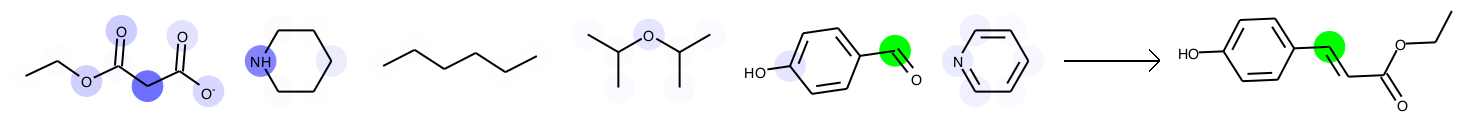

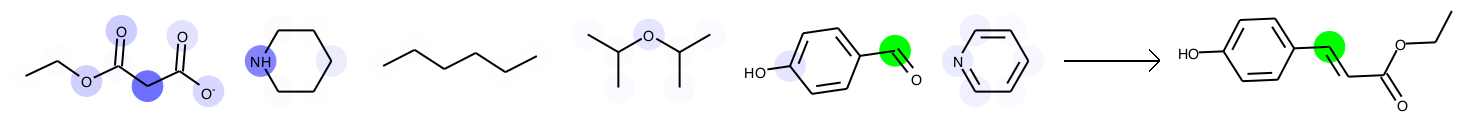

In [49]:
do_index(3829, atts=[6], showmap=False, save='examples/good_3830_aldol')

THIS IS TEST EXAMPLE 304 (1-indexed)
1
ICCOCc1ccccc1.CC(C)=O.O=S(=O)(O)c1ccc(Br)cc1.[Na+]
ICCOCc1ccccc1.CC(C)=O.O=S(=O)(O)c1ccc(Br)cc1.[Na+]
ICCOCc1ccccc1.CC(C)=O.O=S(=O)(O)c1ccc(Br)cc1.[Na+]
CCOCc1ccccc1.CC(C)=O.O=S(=O)(O)c1ccc(Br)cc1.[Na+].[I-]
ICCOCc1ccccc1.CC(C)=O.O=[SH](=O)c1ccc(Br)cc1.[Na+].O
[Br:1][c:2]1[cH:3][cH:4][c:5]([S:6]([O:7][CH2:12][CH2:13][O:14][CH2:15][c:16]2[cH:17][cH:18][cH:19][cH:20][cH:21]2)(=[O:8])=[O:9])[cH:10][cH:11]1.[CH3:24][C:25](=[O:26])[CH3:27].[I-:23].[Na+:22]>>[CH2:12]([CH2:13][O:14][CH2:15][c:16]1[cH:17][cH:18][cH:19][cH:20][cH:21]1)[I:23]
Prediction 1:    7.0-12.0-0.0    with score 4.344576835632324
Prediction 2:    12.0-22.0-1.0   with score 0.8194350600242615
Prediction 3:    12.0-23.0-1.0   with score 0.8194350600242615
Prediction 4:    14.0-15.0-0.0   with score -2.3134634494781494
Prediction 5:    6.0-7.0-0.0     with score -2.820112466812134
Prediction 6:    12.0-26.0-1.0   with score -3.0345072746276855
Prediction 7:    12.0-27.0-1.0   with score

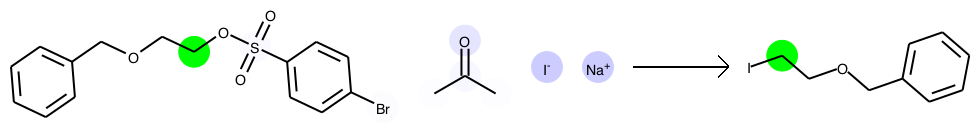

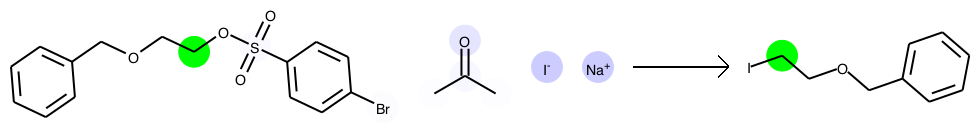

In [50]:
do_index(303, atts=[12], showmap=False, save='examples/good2_304_iodination_alcohol')

THIS IS TEST EXAMPLE 102 (1-indexed)
1
CCN(CC)CC.O=C(O)c1cccc(Cl)c1.CC(C)(C)OC(=O)N1CCC2(c3ccc(Cl)cc3)OC2C1.ClCCl
CCN(CC)CC.O=C(O)c1cccc(Cl)c1.CC(C)(C)OC(=O)N1CCC(c2ccc(Cl)cc2)C(O)C1.ClCCl
CC(C)(C)OC(=O)N1CCC(c2ccc(Cl)cc2)=C(O)C1.CCN(CC)CC.ClCCl.O=C(O)c1cccc(Cl)c1
CCN(CC)CC.O=C(O)c1cccc(Cl)c1.ClCCl.CC(C)(C)OC(=O)N1CC=C(c2ccc(Cl)cc2)C(O)C1
CCN(CC)CC.OOCc1cccc(Cl)c1.CC(C)(C)OC(=O)N1CCC(c2ccc(Cl)cc2)C(O)C1.ClCCl
[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:8]1[CH2:9][CH2:10][C:11]([c:14]2[cH:15][cH:16][c:17]([Cl:20])[cH:18][cH:19]2)=[CH:12][CH2:13]1.[CH3:32][CH2:33][N:34]([CH2:35][CH3:36])[CH2:37][CH3:38].[Cl:39][CH2:40][Cl:41].[OH:21][O:22][C:23]([c:24]1[cH:25][c:26]([Cl:27])[cH:28][cH:29][cH:30]1)=[O:31]>>[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:8]1[CH2:9][CH2:10][C:11]2([c:14]3[cH:15][cH:16][c:17]([Cl:20])[cH:18][cH:19]3)[CH:12]([CH2:13]1)[O:21]2
Prediction 1:    11.0-12.0-1.0   with score 1.1151044368743896
Prediction 2:    21.0-22.0-0.0   with score -0.36032170057

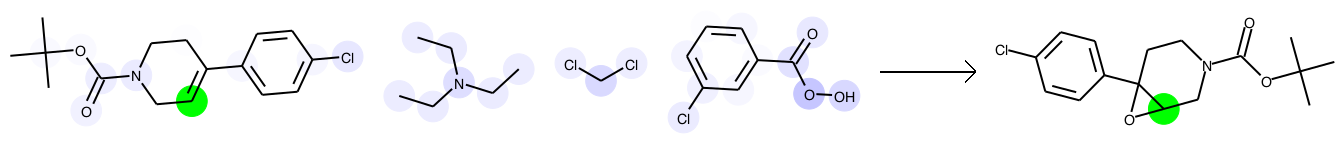

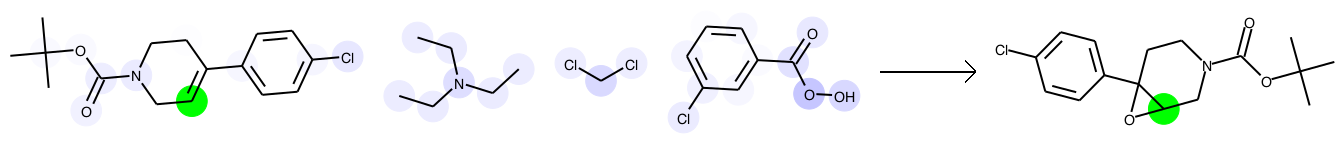

In [51]:
do_index(101, atts=[12], showmap=False, save='examples/good2_102_epoxidation')

THIS IS TEST EXAMPLE 34 (1-indexed)
1
COC1=NCCN(C(=O)OC(C)(C)C)CC1.COC.ClCCl.F[B-](F)(F)F
COC1=NCCN(C(=O)OC(C)(C)C)CC1.COC.ClCCl.F[B-](F)(F)F
COC1=NCCN(C(=O)OC(C)(C)C)CC1.COC.ClCCl.F[B-](F)(F)F
COC.ClCCl.C[N+]1=C(O)CCN(C(=O)OC(C)(C)C)CC1.F[B-](F)(F)F
COC.ClCCl.C[N+]1=C(O)CCN(C(=O)OC(C)(C)C)CC1.F[B-](F)(F)F
[B-:1]([F:2])([F:3])([F:4])[F:5].[C:10]([CH3:11])([CH3:12])([CH3:13])[O:14][C:15](=[O:16])[N:17]1[CH2:18][CH2:19][NH:20][C:21](=[O:24])[CH2:22][CH2:23]1.[CH2:25]([Cl:26])[Cl:27].[CH3:6][O+:7]([CH3:8])[CH3:9]>>[CH3:6][O:24][C:21]1=[N:20][CH2:19][CH2:18][N:17]([C:15]([O:14][C:10]([CH3:11])([CH3:12])[CH3:13])=[O:16])[CH2:23][CH2:22]1
Prediction 1:    20.0-21.0-2.0   with score 1.3907417058944702
Prediction 2:    21.0-24.0-1.0   with score 1.0856235027313232
Prediction 3:    6.0-7.0-0.0     with score -0.3129432797431946
Prediction 4:    7.0-8.0-0.0     with score -0.3129432797431946
Prediction 5:    7.0-9.0-0.0     with score -0.3129432797431946
Prediction 6:    6.0-24.0-1.0    with sco

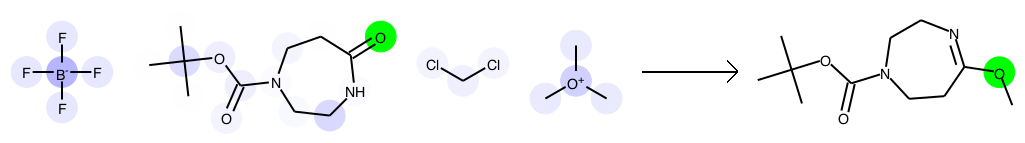

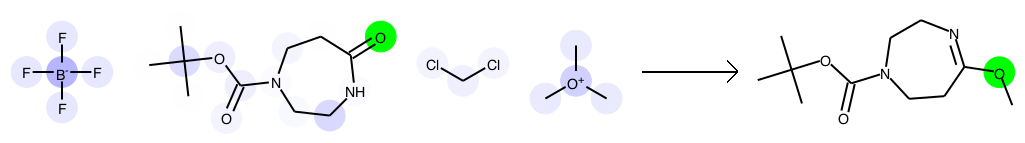

In [52]:
do_index(33, atts=[24], showmap=False, save='examples/good2_33_methylation_of_amide')

# Examples where the true product is not in the top 10

In [53]:
df_rankpred_badmiss = df_rankpred.loc[df_rankpred['rank (10 if not found)'] == 11]
df_rankpred_badmiss.iloc[range(150, 200)]

reactants  \
3077  [Br:1][c:2]1[cH:3][cH:4][c:5]([O:8][CH3:9])[cH...   
3093  [B-:14]([F:15])([F:16])([F:17])[F:18].[Br:1][c...   
3095  [BH4-:41].[CH3:36][N:37]([CH3:38])[CH:39]=[O:4...   
3100  [Al+3:36].[CH2:51]([CH2:52][O:53][CH3:54])[O:5...   
3116  [C:1](#[CH:2])[C:3]1([OH:19])[C:4]([CH3:18])=[...   
3178  [Br:1][c:2]1[cH:3][c:4]2[c:12]([cH:13][cH:14]1...   
3203  [C:24]([CH3:25])([O:26][CH2:27][CH3:28])([O:29...   
3219  [C:10]([CH3:11])([CH3:12])([CH3:13])[O:14][C:1...   
3226  [CH2:22]([O:23][c:24]1[cH:25][cH:26][c:27](-[c...   
3230  [CH2:89]1[O:90][CH2:91][CH2:92][CH2:93]1.[NH2:...   
3255  [C:8]([O-:9])(=[O:10])[O-:11].[CH3:14][C:15](=...   
3281  [BrH:14].[C:15]([OH:16])(=[O:17])[CH3:18].[cH:...   
3299  [CH2:24]([c:25]1[cH:26][cH:27][cH:28][cH:29][c...   
3321  [C:22]([O:23][BH-:24]([O:25][C:32](=[O:26])[CH...   
3337  [Br:27][c:28]1[cH:29][c:30]([C:41](=[O:42])[O:...   
3339  [C:14]1(=[O:15])[CH2:16][CH2:17][CH2:18][CH2:1...   
3343  [Br:32][CH2:33][CH:34]1[CH2:35][CH2:36]1.[CH3:...   
3350  [CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)...   
3383  [F:1][C:2]([CH:3]([C:4]([F:5])([F:6])[F:7])[OH...   
3395  [Br:1][c:2]1[cH:3][cH:4][c:5]([CH2:6][C:7]23[C...   
3396  [CH2:1]([CH3:2])[O:3][C:4]([CH2:5][C:6]1=[N:7]...   
3398  [CH2:15]([C:16]#[CH:17])[Br:18].[NH2:1][c:2]1[...   
3409  [Br:1][c:2]1[s:3][cH:4][n:5][n:6]1.[CH3:31][N:...   
3421  [CH3:31][C:32](=[O:33])[OH:34].[O:15]=[CH:16][...   
3425  [CH3:24][OH:25].[F:1][C:2]([F:3])([F:4])[S:5](...   
3451  [C:28](=[O:29])([O-:30])[O-:31].[CH2:34]([N:35...   
3459  [C:1]([O:2][C:6](=[O:3])[NH:7][CH2:8][CH:9]([O...   
3461  [Br:1][c:2]1[cH:3][c:4]([O:8][CH3:5])[cH:6][cH...   
3473  [CH3:1][CH2:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...   
3483  [C:1]([CH3:3])([CH3:4])([O:5][C:6](=[O:2])[CH:...   
3488  [N+:1](=[O:2])([O-:3])[c:4]1[cH:5][c:6]2[c:7](...   
3502  [F:15][c:16]1[c:17](-[n:23]2[c:24](=[O:28])[nH...   
3510  [Br:48][CH2:49][C:50](=[O:51])[O:52][CH2:53][C...   
3511  [F:27][C:28]([c:29]1[cH:30][c:31]([N:35]=[C:36...   
3526  [CH2:8]([CH3:9])[n:10]1[n:11][cH:12][c:13]([B:...   
3537  [BrH:39].[C:1]([CH3:2])([CH3:3])([CH3:4])[c:5]...   
3569  [CH2:1]([CH3:2])[S:3](=[O:4])(=[O:5])[c:6]1[cH...   
3611  [Br:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:18]1)[...   
3637  [C:47]([BH3-:48])#[N:49].[CH3:1][N:2]1[CH:3]([...   
3653  [CH2:35]1[O:36][CH2:37][CH2:38][CH2:39]1.[CH3:...   
3655  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([O:7][c:8]...   
3665  [CH3:26][OH:27].[CH3:9][Si:10]([O:11][C:12](=[...   
3701  [CH2:26]1[O:27][CH2:28][CH2:29][CH2:30]1.[CH3:...   
3715  [CH3:1][N:2]1[C:3](=[O:28])[C:4](=[O:27])[c:5]...   
3727  [C:18]([BH3-:19])#[N:20].[CH3:23][C:24](=[O:25...   
3734  [Cl:1][c:2]1[cH:3][c:4]2[c:8]([cH:9][cH:10]1)[...   
3762  [NH2:13][C:14]([CH2:15][C:16](=[O:17])[OH:18])...   
3770  [CH3:11][CH2:12][N:13]([CH2:14][CH3:15])[CH2:1...   
3788  [BrH:23].[CH2:1]([O:2][C:3](=[O:4])[NH:11][CH:...   
3796  [CH2:27]([c:28]1[cH:29][cH:30][c:31]([N:32]=[C...   

                                               products  \
3077  [c:2]1([N:23]([c:20]2[cH:19][cH:18][c:17]([SiH...   
3093  [c:2]1([NH2:36])[cH:3][n:4][c:5]2[cH:6][cH:7][...   
3095  [c:2]1([NH2:33])[c:3]([N+:29](=[O:30])[O-:31])...   
3100  [CH2:3]1[CH2:4][C:21]1([c:20]1[c:19]([O:18][CH...   
3116  [C:3]1(=[O:19])[C:4]([CH3:18])=[C:5]([CH:11]=[...   
3178  [Br:1][c:2]1[cH:3][c:4]2[c:12]([cH:13][cH:14]1...   
3203  [ClH:1].[NH:2]([CH2:3][C:4](=[O:5])[NH:6][c:7]...   
3219  [C:10]([CH3:11])([CH3:12])([CH3:13])[O:14][C:1...   
3226  [n:1]1[cH:2][cH:3][c:4]2[n:5][c:6]3[c:7]([c:8]...   
3230  [O:47]1[CH2:48][CH2:49][N:50]([S:53](=[O:54])(...   
3255  [CH3:1][C:2]([C:3](=[O:4])[NH:5][CH2:8][OH:9])...   
3281  [cH:1]1[cH:2][cH:3][c:4]2[c:5]([cH:6]1)[s:7][c...   
3299  [F:1][c:2]1[c:3]([F:23])[c:4]2[cH:5][cH:6][o:7...   
3321  [CH3:1][c:2]1[n:3](-[c:8]2[cH:9][cH:10][c:11](...   
3337  [Cl:1][c:2]1[cH:3][c:4](-[c:28]2[cH:29][c:30](...   
3339  [CH:1]([CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2...   
3343  [CH3:3][O:4][CH:5]1[CH:6]([

THIS IS TEST EXAMPLE 3096 (1-indexed)
11
[B-].Cl.CCOC(C)=O.C=C(c1ccc(N=[N+]=[N-])c([N+](=O)[O-])c1)c1ccccc1C(=O)Nc1cccc(C(F)(F)F)c1.CN(C)C=O.C1CCOC1.[Na+]
[B-].Cl.CCOC(C)=O.C=C(c1ccc(N=[N+]=[N-])c([N+](=O)[O-])c1)c1ccccc1C(=O)Nc1cccc(C(F)(F)F)c1.CN(C)C=O.C1CCOC1.[Na+]
[B-].[N-]=N.Cl.CCOC(C)=O.C=C(c1ccc([N-])c([N+](=O)[O-])c1)c1ccccc1C(=O)Nc1cccc(C(F)(F)F)c1.CN(C)C=O.C1CCOC1.[Na+]
[B-].[N-]=N.Cl.CCOC(C)=O.C=C(c1ccc([N-])c([N+](=O)[O-])c1)c1ccccc1C(=O)Nc1cccc(C(F)(F)F)c1.CN(C)C=O.C1CCOC1.[Na+]
[B-].CCOC(C)=O.C=C(N=[N+]=[N-])c1ccccc1C(=O)Nc1cccc(C(F)(F)F)c1.O=[N+]([O-])c1ccccc1Cl.CN(C)C=O.C1CCOC1.[Na+]
[BH4-:41].[CH3:36][N:37]([CH3:38])[CH:39]=[O:40].[CH3:43][CH2:44][O:45][C:46](=[O:47])[CH3:48].[Cl:1][c:2]1[c:3]([N+:29](=[O:30])[O-:31])[cH:4][c:5]([C:8](=[CH2:9])[c:10]2[c:11]([C:12](=[O:13])[NH:14][c:15]3[cH:16][c:17]([C:21]([F:22])([F:23])[F:24])[cH:18][cH:19][cH:20]3)[cH:25][cH:26][cH:27][cH:28]2)[cH:6][cH:7]1.[N-:33]=[N+:34]=[N-:35].[Na+:32].[Na+:42].[O:49]1[CH2:50][CH2:51][CH2:52][CH

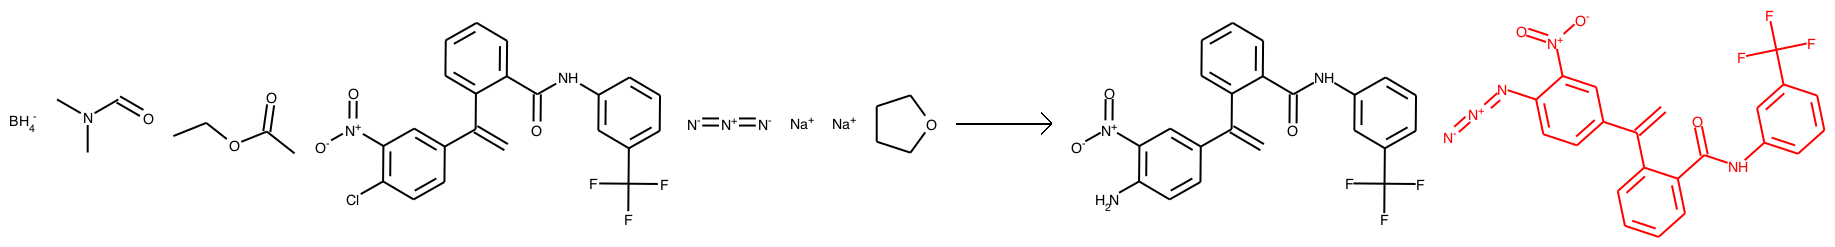

In [54]:
do_index(3095, atts=[], showmap=False, save='examples/missed_3096_twostep_azide_reduction');

THIS IS TEST EXAMPLE 2762 (1-indexed)
11
O=C(Cl)c1cccc([N+](=O)[O-])c1C(=O)O.O=[PH](Cl)c1ccccc1.[Na+].[O-]
O=C(Cl)c1cccc([N+](=O)[O-])c1C(=O)O.O=[PH](Cl)c1ccccc1.[Na+].[O-]
O=C(c1ccc(P(=O)(Cl)Cl)cc1)c1cccc([N+](=O)[O-])c1C(=O)O.[O-].[Na+]
[O-].O=[PH](Cl)c1ccccc1.[Na+].O=C(O)c1cccc([N+](=O)[O-])c1C(=O)Cl
[O-].O=[PH](Cl)c1ccccc1.[Na+].O=C(O)c1cccc([N+](=O)[O-])c1C(=O)Cl
[N+:1]([O-:2])(=[O:3])[c:4]1[c:5]2[c:6]([cH:12][cH:13][cH:14]1)[C:7](=[O:8])[O:9][C:10]2=[O:11].[Na+:16].[OH-:15].[c:17]1([P:18]([Cl:19])(=[O:20])[Cl:25])[cH:21][cH:22][cH:23][cH:24][cH:26]1>>[c:4]1([Cl:25])[c:5]2[c:6]([cH:12][cH:13][cH:14]1)[C:7](=[O:8])[O:9][C:10]2=[O:11]
Prediction 1:    7.0-23.0-1.0    with score 0.18809294700622559
Prediction 2:    10.0-23.0-1.0   with score -0.05692875385284424
Prediction 3:    7.0-9.0-0.0     with score -0.9121147394180298
Prediction 4:    7.0-8.0-0.0     with score -1.0986008644104004
Prediction 5:    9.0-10.0-0.0    with score -1.3134379386901855
Prediction 6:    18.0-19.0-0.0   

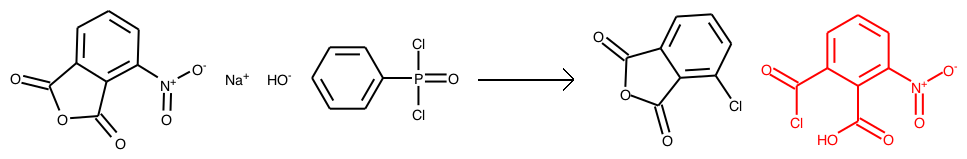

In [55]:
do_index(2761, atts=[], showmap=False, save='examples/missed_2762_mischlorination');

THIS IS TEST EXAMPLE 2699 (1-indexed)
11
ClCCl.CO.N
ClCCl.CO.[N-]=N.CC1(NCc2ccccc2)CC=CCC1O.N
CO.ClCCl.CC1(N)CC=CCC1O.[N-]=N.NCc1ccccc1
ClCCl.CO
ClCCl.CC1(N=[N+]=[N-])CC=C(NCc2ccccc2)CC1O.CO
[CH3:20][OH:21].[CH3:25][OH:26].[Cl:22][CH2:23][Cl:24].[N:1](=[N+:2]=[N-:3])[C:4]1([CH3:11])[CH2:5][CH:6]=[CH:7][CH2:8][CH:9]1[OH:10].[NH2:12][CH2:13][c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1>>[N:1](=[N+:2]=[N-:3])[C:4]1([CH3:11])[CH2:5][CH2:6][N:12]([CH2:13][c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)[CH2:7][CH2:8][CH:9]1[OH:10]
Prediction 1:    1.0-2.0-0.0     with score 0.13707488775253296
Prediction 2:    12.0-13.0-0.0   with score -1.4730446338653564
Prediction 3:    6.0-7.0-1.0     with score -2.438613176345825
Prediction 4:    7.0-12.0-1.0    with score -2.4919331073760986
Prediction 5:    6.0-12.0-1.0    with score -2.5707755088806152
Prediction 6:    12.0-23.0-1.0   with score -3.5876970291137695
Prediction 7:    1.0-13.0-1.0    with score -4.151970386505127
Prediction 8:    4.0-12.0-1.0

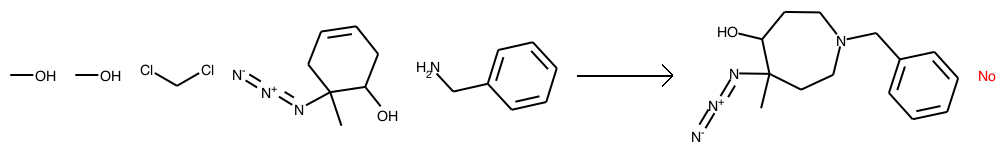

In [56]:
do_index(2698, atts=[], showmap=False, save='examples/missed_2699_weird_ringexpansion');

THIS IS TEST EXAMPLE 2650 (1-indexed)
11
[H-].CCO.CC(C)C[Al+]CC(C)C.CCN1CCC(C)(C)c2cc(C(C)C)cc(C(C)=C(F)CO)c21.C1CCOC1
[H-].CCO.CC(C)C[Al+]CC(C)C.CCN1CCC(C)(C)c2cc(C(C)C)cc(C(C)=C(F)C=O)c21.C1CCOC1
CCO.[H-].CCN1CCC(C)(C)c2cc(C(C)C)cc(C(C)=C(F)CO[Al+](CC(C)C)CC(C)C)c21.C1CCOC1
CC.[H-].CC(C)C[Al+]CC(C)C.CCN1CCC(C)(C)c2cc(C(C)C)cc(C(C)=C(F)C(=O)O)c21.C1CCOC1
CC.CCN1CCC(C)(C)c2cc(C(C)C)cc(C(C)=C(F)C(=O)O[Al+](CC(C)C)CC(C)C)c21.[H-].C1CCOC1
[CH2:1]([CH3:2])[O:3][C:4]([C:5](=[C:6]([CH3:7])[c:8]1[cH:9][c:10]([CH:22]([CH3:23])[CH3:24])[cH:11][c:12]2[c:17]1[N:16]([CH2:18][CH3:19])[CH2:15][CH2:14][C:13]2([CH3:20])[CH3:21])[F:25])=[O:26].[CH2:28]([Al+:29][CH2:30][CH:31]([CH3:32])[CH3:33])[CH:34]([CH3:35])[CH3:36].[CH2:37]1[O:38][CH2:39][CH2:40][CH2:41]1.[H-:27]>>[CH2:1]([CH3:2])[O:3][C:4]([C:5](=[C:6]([CH3:7])[c:8]1[cH:9][c:10]([CH:22]([CH3:23])[CH3:24])[cH:11][c:12]2[c:17]1[N:16]([CH2:18][CH2:19][CH3:28])[CH2:15][CH2:14][C:13]2([CH3:20])[CH3:21])[F:25])=[O:26]
Prediction 1:    3.0-4.0-0.0     wi

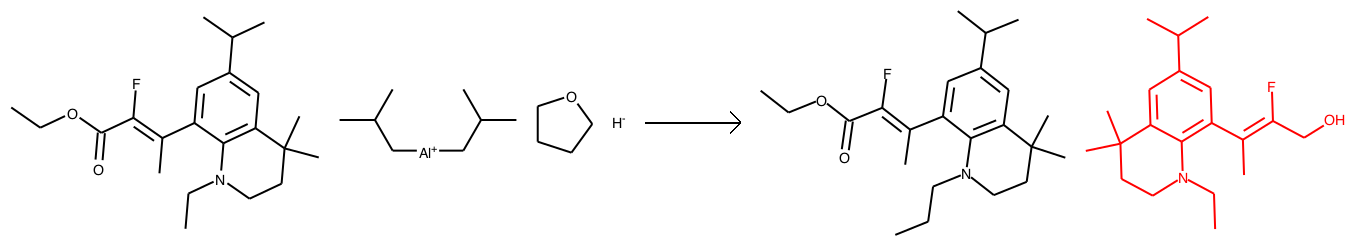

In [57]:
do_index(2649, atts=[], showmap=False, save='examples/missed_2650_propanation');

THIS IS TEST EXAMPLE 2542 (1-indexed)
11
CCN(CC)CC.O=C1NCCN1C(=O)OC1CCCCC1.C1CCOC1.Cl
CCN(CC)CC.C1CCCCC1.O=C(O)N1CCNC1=O.C1CCOC1.Cl
C1=CCCCC1.CCN(CC)CC.O=C(O)N1CCNC1=O.C1CCOC1.Cl
C1=CCCCC1.CCN(CC)CC.O=C(O)N1CCNC1=O.C1CCOC1.Cl
CCN(CC)CC.O=C(O)N1CCN(C2CCCCC2)C1=O.C1CCOC1.Cl
[CH3:1][CH2:2][N:3]([CH2:4][CH3:5])[CH2:6][CH3:7].[N:8]1([C:14](=[O:15])[Cl:16])[C:9](=[O:13])[NH:10][CH2:11][CH2:12]1.[O:24]1[CH2:25][CH2:28][CH2:27][CH2:26]1.[OH:17][CH:18]1[CH2:19][CH2:20][CH2:21][CH2:22][CH2:23]1>>[N:8]1([C:14](=[O:15])[Cl:16])[C:9](=[O:13])[N:10]([C:25]([O:17][CH:18]2[CH2:19][CH2:20][CH2:21][CH2:22][CH2:23]2)=[O:24])[CH2:11][CH2:12]1
Prediction 1:    14.0-16.0-0.0   with score 6.3567118644714355
Prediction 2:    14.0-17.0-1.0   with score 2.4211063385009766
Prediction 3:    17.0-18.0-0.0   with score -3.6351191997528076
Prediction 4:    2.0-3.0-0.0     with score -5.881736755371094
Prediction 5:    3.0-4.0-0.0     with score -5.881736755371094
Prediction 6:    3.0-6.0-0.0     with score -5.881736

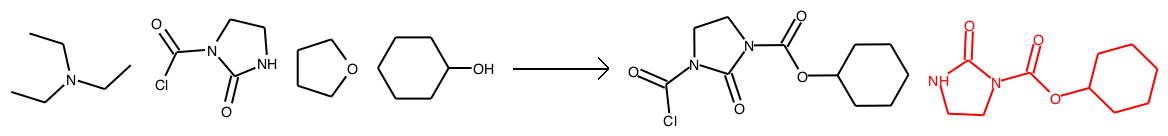

In [58]:
do_index(2541, atts=[], showmap=False, save='examples/missed_2542_esterification');

THIS IS TEST EXAMPLE 2396 (1-indexed)
11
O.O=C(NCc1ccccc1)c1ccc2nc[nH]c2c1
O.O=C(NCc1ccccc1)c1ccc2nc[nH]c2c1
O.NC(C(=O)c1ccc2nc[nH]c2c1)c1ccccc1
NC(=O)c1ccc2nc[nH]c2c1.O.Cc1ccccc1
O=C(Cc1ccccc1)c1ccc2nc[nH]c2c1.O.N
[NH2:13][CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1.[n:1]1[cH:2][nH:3][c:4]2[c:5]1[cH:6][cH:7][c:8]([C:10](=[O:11])[OH:12])[cH:9]2>>[nH:1]1[cH:2][n:3][c:4]2[c:5]1[cH:6][cH:7][c:8]([C:10](=[O:12])[NH:13][CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1)[cH:9]2
Prediction 1:    10.0-13.0-1.0   with score 3.8938870429992676
Prediction 2:    10.0-11.0-0.0   with score 1.3703925609588623
Prediction 3:    10.0-12.0-2.0   with score 1.2364815473556519
Prediction 4:    10.0-12.0-0.0   with score -1.5227398872375488
Prediction 5:    13.0-14.0-0.0   with score -5.841853141784668
Prediction 6:    10.0-14.0-1.0   with score -5.919551849365234
Prediction 7:    10.0-13.0-2.0   with score -6.59099006652832
Prediction 8:    8.0-10.0-0.0    with score -7.184283256530762
Prediction 

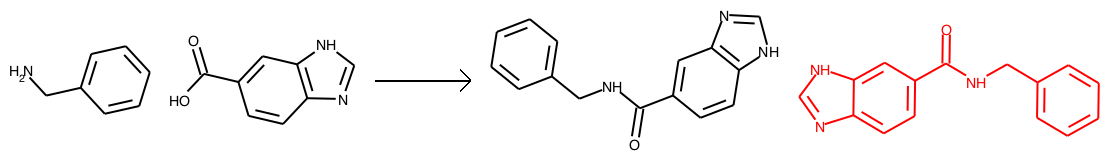

In [59]:
do_index(2395, atts=[], showmap=False, save='examples/missed_2396_tautomerization');

THIS IS TEST EXAMPLE 1946 (1-indexed)
11
O=S(=O)(O)O.O=[Hg].O.CCC(O)CC=CCCCO
CCC1CC#CCCCO1.O=S(=O)(O)O.O.O=[Hg]
CCC1CC#CCCCO1.O=S(=O)(O)O.O.O=[Hg]
O=S(=O)(O)O.CCC(O)CC#CCCC=O.O.O=[Hg]
O=S(=O)(O)O.O=[Hg].O.CCC(=O)CC#CCCCO
[CH2:1]([CH2:2][CH2:3][C:4]#[C:5][CH2:6][CH:7]([CH2:8][CH3:9])[OH:10])[OH:11].[Hg:18]=[O:19].[OH2:12].[S:13](=[O:14])(=[O:15])([OH:16])[OH:17]>>[CH2:1]1[CH2:2][CH2:3][C:4]2([CH2:5][CH2:6][CH:7]([CH2:8][CH3:9])[O:10]2)[O:11]1
Prediction 1:    4.0-5.0-2.0     with score -1.1136753559112549
Prediction 2:    1.0-11.0-0.0    with score -2.014207363128662
Prediction 3:    1.0-11.0-2.0    with score -2.2034847736358643
Prediction 4:    4.0-5.0-1.0     with score -2.3148245811462402
Prediction 5:    7.0-10.0-0.0    with score -2.3361613750457764
Prediction 6:    1.0-10.0-1.0    with score -2.461956262588501
Prediction 7:    7.0-10.0-2.0    with score -2.9395523071289062
Prediction 8:    1.0-12.0-1.0    with score -3.2588531970977783
Prediction 9:    4.0-16.0-2.0    with score 

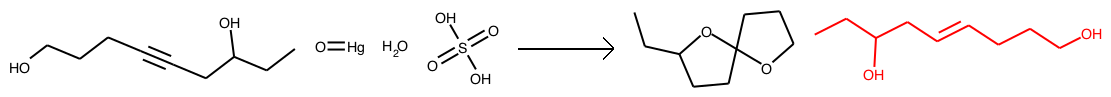

In [60]:
do_index(1945, atts=[], showmap=False, save='examples/missed_1946_oxidation');

THIS IS TEST EXAMPLE 1765 (1-indexed)
11
CO.[K+].[O-].O.CCCCCCO.CC(=O)O.CC(C)(C)[O-].Cn1cccc1C=CC(C)(CO)NC(=O)OC(C)(C)C.ClCCl.C1CCOC1.[Na+]
O.CO.[K+].[O-].CCCCCC(=O)OCC(C)(CCc1cccn1C)NC(=O)OC(C)(C)C.CC(=O)O.CC(C)(C)[O-].ClCCl.C1CCOC1.[Na+]
CO.[K+].[O-].O.CCCCCC=O.CC(=O)O.CC(C)(C)[O-].Cn1cccc1C=CC(C)(CO)NC(=O)OC(C)(C)C.ClCCl.C1CCOC1.[Na+]
CCCCCC(=O)c1ccc(C=CC(C)(CO)NC(=O)OC(C)(C)C)n1C.CO.[K+].[O-].O.CC(=O)O.CC(C)(C)[O-].ClCCl.C1CCOC1.[Na+]
CO.[K+].[O-].O.CCCCCC(=O)N(C(=O)OC(C)(C)C)C(C)(C=Cc1cccn1C)CO.CC(=O)O.CC(C)(C)[O-].ClCCl.C1CCOC1.[Na+]
[C:1]([O:2][C:3]([NH:8][C:9]([CH2:10][O:11][C:12]([CH2:4][CH2:5][CH2:6][CH2:7][CH3:13])=[O:18])([CH:19]=[CH:20][c:21]1[n:22]([CH3:26])[cH:23][cH:24][cH:25]1)[CH3:27])=[O:14])([CH3:15])([CH3:16])[CH3:17].[CH2:47]([Cl:48])[Cl:49].[CH3:30][C:31]([CH3:32])([O-:33])[CH3:34].[CH3:36][C:37](=[O:38])[OH:39].[CH3:45][OH:46].[K+:35].[Na+:29].[O:40]1[CH2:41][CH2:42][CH2:43][CH2:44]1.[OH-:28].[OH2:50]>>[NH:8]1[C:9]([CH:19]=[CH:20][c:21]2[n:22]([CH3:26])[cH:23][c

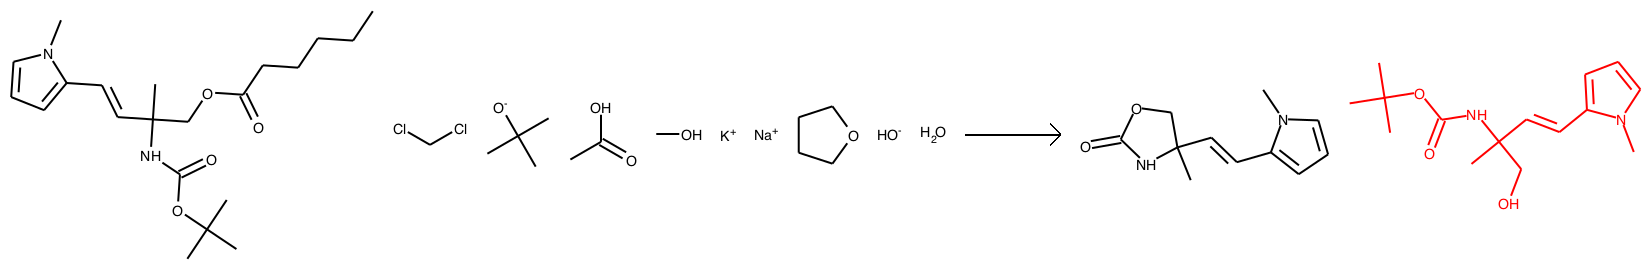

In [61]:
do_index(1764, atts=[], showmap=False, save='examples/missed_1765_twosteps');

THIS IS TEST EXAMPLE 1484 (1-indexed)
11
COc1ccccc1C(=O)Cl.O=[SH]Cl.O
COc1ccccc1C(=O)Cl.O=[SH]Cl.O
COc1ccccc1C(=O)Cl.O=[SH]Cl.O
COc1ccccc1C(=O)Cl.O=[SH]Cl.O
COc1ccccc1C(=O)O.O=[SH]Cl.Cl
[C:5]([c:6]1[c:7]([O:12][CH3:13])[cH:8][cH:9][cH:10][cH:11]1)(=[O:14])[OH:15].[S:1]([Cl:2])([Cl:3])=[O:4]>>[C:5]([c:6]1[c:7]([O:12][CH3:13])[cH:8][cH:9][cH:10][cH:11]1)(=[O:14])[OH:15].[Cl-:3]
Prediction 1:    5.0-15.0-0.0    with score 0.8344663977622986
Prediction 2:    2.0-5.0-1.0     with score 0.2878907322883606
Prediction 3:    3.0-5.0-1.0     with score 0.2878907322883606
Prediction 4:    1.0-2.0-0.0     with score -0.20406031608581543
Prediction 5:    1.0-3.0-0.0     with score -0.20406031608581543
Prediction 6:    5.0-15.0-2.0    with score -1.3429310321807861
Prediction 7:    5.0-14.0-0.0    with score -2.123662233352661
Prediction 8:    5.0-14.0-1.0    with score -5.440866947174072
Prediction 9:    5.0-8.0-1.0     with score -5.6978840827941895
Prediction 10:    7.0-12.0-0.0    with score -6.

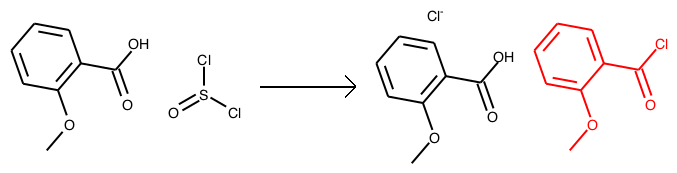

In [62]:
do_index(1483, atts=[], showmap=False, save='examples/missed_1484_noreaction_chlorination');

THIS IS TEST EXAMPLE 1220 (1-indexed)
11
O=C(c1ccc(Br)cc1)C1Cc2ccccc2C1=O.CC(C)NC(C)C.CO.[Li+].C1CCOC1
CC(C)NC(C)C.CO.O=C(C1=C(O)c2ccccc2C1)c1ccc(Br)cc1.C1CCOC1.[Li+]
COC(=O)c1ccc(Br)cc1.OC1CCc2ccccc21.CC(C)NC(C)C.[Li+].C1CCOC1
CC(C)NC(C)C.COC(=O)c1ccc(Br)cc1.[Li+].O.c1ccc2c(c1)CCC2.C1CCOC1
CC(C)NC(C)C.CO.O=C(C1=Cc2ccccc2C1)c1ccc(Br)cc1.[Li+].O.C1CCOC1
[C:9]1(=[O:18])[CH2:10][CH2:11][c:12]2[cH:13][cH:14][cH:15][cH:16][c:17]21.[CH2:30]1[O:31][CH2:32][CH2:33][CH2:34]1.[CH3:19][O:20][C:21]([c:22]1[cH:23][cH:24][c:25]([Br:28])[cH:26][cH:27]1)=[O:29].[CH3:2][CH:3]([N-:4][CH:5]([CH3:6])[CH3:7])[CH3:8].[Li+:1]>>[CH2:2]([CH:10]1[C:9](=[O:18])[c:17]2[c:12]([cH:13][cH:14][cH:15][cH:16]2)[CH2:11]1)[c:25]1[cH:24][cH:23][c:22]([C:21]([O:20][CH3:19])=[O:29])[cH:27][cH:26]1
Prediction 1:    9.0-18.0-1.0    with score -0.10887312889099121
Prediction 2:    10.0-21.0-1.0   with score -0.2679809331893921
Prediction 3:    9.0-10.0-2.0    with score -0.7583315968513489
Prediction 4:    9.0-18.0-0.0    with

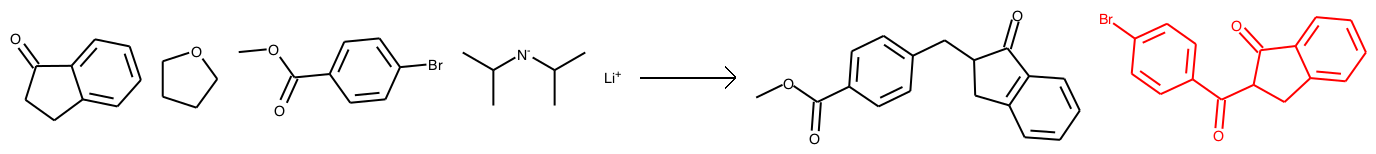

In [63]:
do_index(1219, atts=[], showmap=False, save='examples/missed_1220_organometallic_hydroxyelimination');

THIS IS TEST EXAMPLE 961 (1-indexed)
11
CC(C)(C)C#N.[Mg+].CCCc1nc(C#N)c[nH]1.CCOCC.[Cl-]
CC(C)(C)C#N.[Cl-].[Mg+].CCOCC.CCCc1ncc(C#N)[nH]1
CC.CC(C)(C)[Mg+].[Cl-].CCCc1nc(C#N)c(C=O)[nH]1.N
CC.CC(C)(C)[Mg+].[Cl-].CCCc1nc(C=O)c(C#N)[nH]1.N
[Cl-].CCCc1nc(C#N)c(CC(C)(C)C)[nH]1.[Mg+].CCOCC.N
[C:14]([CH3:15])([CH3:16])([CH3:17])[Mg+:18].[CH2:1]([CH2:2][CH3:3])[c:4]1[nH:5][c:6]([C:11]#[N:12])[c:7]([C:9]#[N:10])[n:8]1.[CH3:19][CH2:20][O:21][CH2:22][CH3:23].[Cl-:13]>>[CH2:1]([CH2:2][CH3:3])[c:4]1[n:5][c:6]([C:11]([C:14]([CH3:15])([CH3:16])[CH3:17])=[O:21])[c:7]([C:9]#[N:10])[nH:8]1
Prediction 1:    14.0-18.0-0.0   with score 4.404162406921387
Prediction 2:    9.0-14.0-1.0    with score 1.955404281616211
Prediction 3:    11.0-14.0-1.0   with score 1.955404281616211
Prediction 4:    20.0-21.0-0.0   with score -0.07417422533035278
Prediction 5:    21.0-22.0-0.0   with score -0.07417422533035278
Prediction 6:    9.0-10.0-0.0    with score -0.21349984407424927
Prediction 7:    11.0-12.0-0.0   with sco

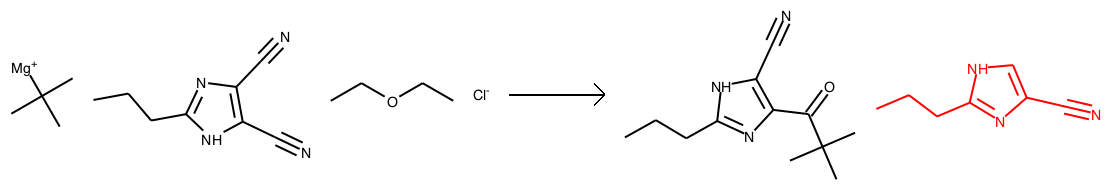

In [64]:
do_index(960, atts=[], showmap=False, save='examples/missed_961_nitrile_reduction_missing_workup');

THIS IS TEST EXAMPLE 876 (1-indexed)
11
CCOP(=O)(C=C1c2ccccc2N(C)CCN1C(=O)c1ccc(F)cc1F)OCC.O
CCOP(=O)(C=C1c2ccccc2N(C)CCN1C(=O)c1ccc(F)cc1F)OCC.O
O.CCOP(=O)(OCC)C(C(=O)c1ccc(F)cc1F)=C1NCCN(C)c2ccccc21
O.CCOP(=O)(OCC)C(C(=O)c1ccc(F)cc1F)=C1NCCN(C)c2ccccc21
CCOP(=O)(C=C1NC(C(=O)c2ccc(F)cc2F)CN(C)c2ccccc21)OCC.O
[CH2:1]([CH3:2])[O:3][P:4]([O:5][CH2:6][CH3:7])(=[O:8])[CH:9]=[C:10]1[c:11]2[c:12]([cH:18][cH:19][cH:20][cH:21]2)[N:13]([CH3:17])[CH2:14][CH2:15][NH:16]1.[F:22][c:23]1[cH:24][c:25]([F:26])[cH:27][cH:28][c:29]1[C:30]([OH:31])=[O:32]>>[CH2:1]([CH3:2])[O:3][P:4]([O:5][CH2:6][CH3:7])(=[O:8])[CH:9]=[C:10]1[c:11]2[c:12]([cH:18][c:19]([F:22])[cH:20][cH:21]2)[N:13]([CH3:17])[CH2:14][CH2:15][NH:16]1
Prediction 1:    16.0-30.0-1.0   with score -0.01097792387008667
Prediction 2:    30.0-31.0-0.0   with score -0.3301735818386078
Prediction 3:    30.0-31.0-2.0   with score -0.8476248383522034
Prediction 4:    30.0-32.0-0.0   with score -1.4647457599639893
Prediction 5:    3.0-4.0-2.0     with 

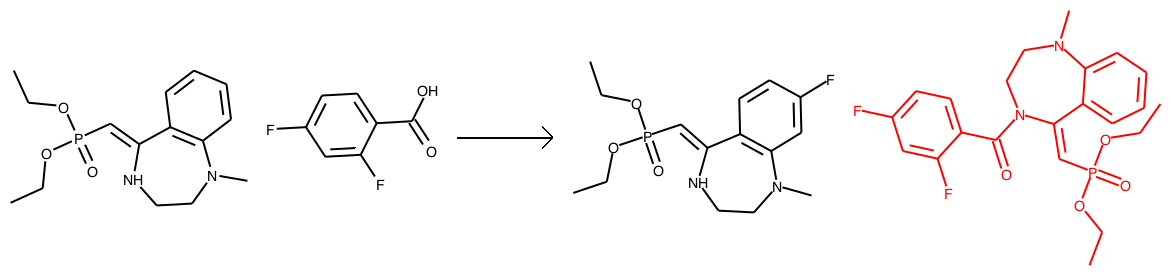

In [65]:
do_index(875, atts=[], showmap=False, save='examples/missed_876_misfluorination');

THIS IS TEST EXAMPLE 870 (1-indexed)
11
NCCNCCn1cccn1.[Br-].O.C1CCOC1
NCCNCCn1cccn1.[Br-].O.C1CCOC1
NCCNC=Cn1cccn1.[Br-].O.C1CCOC1
NCCNC=Cn1cccn1.[Br-].O.C1CCOC1
CCn1cccn1.NCCN.[Br-].O.C1CCOC1
[Br:1][CH2:2][CH2:3][n:4]1[n:5][cH:6][cH:7][cH:8]1.[NH2:9][CH2:10][CH2:11][NH2:12].[O:13]1[CH2:14][CH2:15][CH2:16][CH2:17]1.[OH2:18]>>[CH2:2]([CH2:3][n:4]1[n:5][cH:6][cH:7][cH:8]1)[N:9]=[CH:10][CH2:11][NH2:12]
Prediction 1:    1.0-2.0-0.0     with score 5.116255760192871
Prediction 2:    2.0-9.0-1.0     with score 1.3410956859588623
Prediction 3:    2.0-12.0-1.0    with score 1.3410956859588623
Prediction 4:    13.0-14.0-0.0   with score -3.7556185722351074
Prediction 5:    13.0-17.0-0.0   with score -3.7556185722351074
Prediction 6:    2.0-3.0-0.0     with score -4.273128986358643
Prediction 7:    9.0-14.0-1.0    with score -4.441712379455566
Prediction 8:    9.0-17.0-1.0    with score -4.441712379455566
Prediction 9:    12.0-14.0-1.0   with score -4.441712379455566
Prediction 10:    12.0-17.0-1

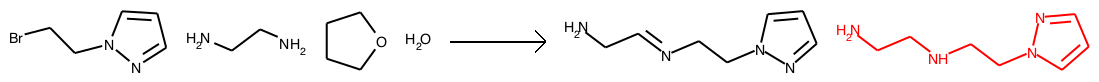

In [66]:
do_index(869, atts=[], showmap=False, save='examples/missed_870_alkylation_magic_imine');

THIS IS TEST EXAMPLE 545 (1-indexed)
11
CCn1ncc2c1nc(C)c1c(NCCO)nc3cc(C)nn3c12.CN(C)CCCO.CCCCN
CN(C)CCCO.CCCCN(CCO)c1nc2cc(C)nn2c2c1c(C)nc1c2cnn1CC.N
CCCCNc1nc2cc(C)nn2c2c1c(C)nc1c2cnn1CC.CCO.CN(C)CCCO.N
C.NCCO.CN(C)CCCO.CCCNc1nc2cc(C)nn2c2c1c(C)nc1c2cnn1CC
CC.CCNc1nc2cc(C)nn2c2c1c(C)nc1c2cnn1CC.NCCO.CN(C)CCCO
[CH2:1]([NH:2][c:6]1[n:7][c:8]2[n:9]([c:10]3[c:11]1[c:12]([CH3:21])[n:13][c:14]1[c:15]3[cH:16][n:17][n:18]1[CH2:19][CH3:20])[n:22][c:23]([CH3:25])[cH:24]2)[CH2:3][CH2:4][CH3:5].[CH3:30][N:31]([CH3:32])[CH2:33][CH2:34][CH2:35][OH:36].[NH2:26][CH2:27][CH2:28][OH:29]>>[c:6]1([O:29][CH2:28][CH2:27][NH2:26])[n:7][c:8]2[n:9]([c:10]3[c:11]1[c:12]([CH3:21])[n:13][c:14]1[c:15]3[cH:16][n:17][n:18]1[CH2:19][CH3:20])[n:22][c:23]([CH3:25])[cH:24]2
Prediction 1:    6.0-26.0-1.0    with score -0.6307207942008972
Prediction 2:    34.0-35.0-0.0   with score -2.0975866317749023
Prediction 3:    26.0-35.0-1.0   with score -3.1170835494995117
Prediction 4:    26.0-27.0-0.0   with score -3.2548360824

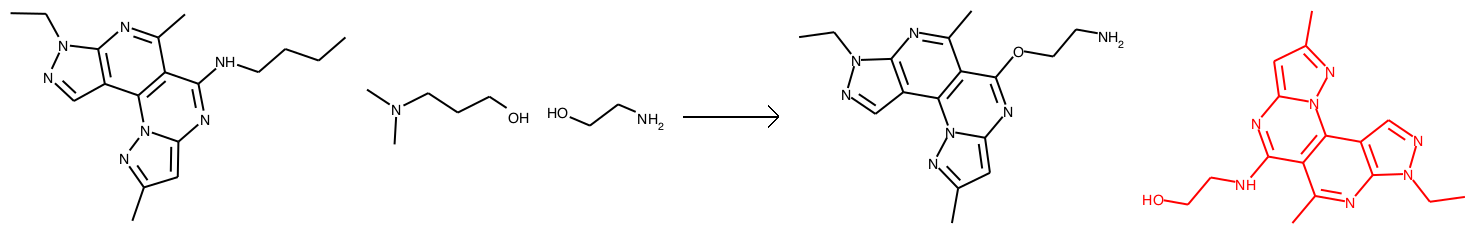

In [67]:
do_index(544, atts=[], showmap=False, save='examples/missed_544_amine_displacement');

THIS IS TEST EXAMPLE 248 (1-indexed)
11
CC(OC1COCC(CN2CCCC(C)(CO)C2)C1c1ccccc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1.CCO.B.C1CCOC1
CC.B.CC(OC1COCC(CN2CCCC(C)(C(=O)O)C2)C1c1ccccc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1.C1CCOC1
CC.B.CC(OC1COCC(CN2CCCC(C)(C(=O)O)C2)C1c1ccccc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1.C1CCOC1
CCOC(=O)C1(C)CCCN(CC2COCC(O)C2c2ccccc2)C1.B.CCc1cc(C(F)(F)F)cc(C(F)(F)F)c1.C1CCOC1
CCO.B.C1CCOC1.CC(OC1COCC(CN2CCCC(C)(C=O)C2)C1c1ccccc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1
[BH3:6].[CH2:7]([O:8][C:9]([C:10]1([CH3:11])[CH2:12][CH2:13][CH2:14][N:15]([CH2:18][CH:19]2[CH2:20][O:21][CH2:22][CH:23]([O:31][CH:32]([CH3:33])[c:34]3[cH:35][c:36]([C:44]([F:45])([F:46])[F:47])[cH:37][c:38]([C:40]([F:41])([F:42])[F:43])[cH:39]3)[CH:24]2[c:25]2[cH:26][cH:27][cH:28][cH:29][cH:30]2)[CH2:16]1)=[O:17])[CH3:48].[O:1]1[CH2:2][CH2:3][CH2:4][CH2:5]1.[O:49]1[CH2:50][CH2:51][CH2:52][CH2:53]1>>[OH:1][CH2:18][CH:19]1[CH2:20][O:21][CH2:22][CH:23]([O:31][CH:32]([CH3:33])[c:34]2[cH:35][c:36]([C:44]([F:45])([F:46])[F:47])[cH:37][c:38](

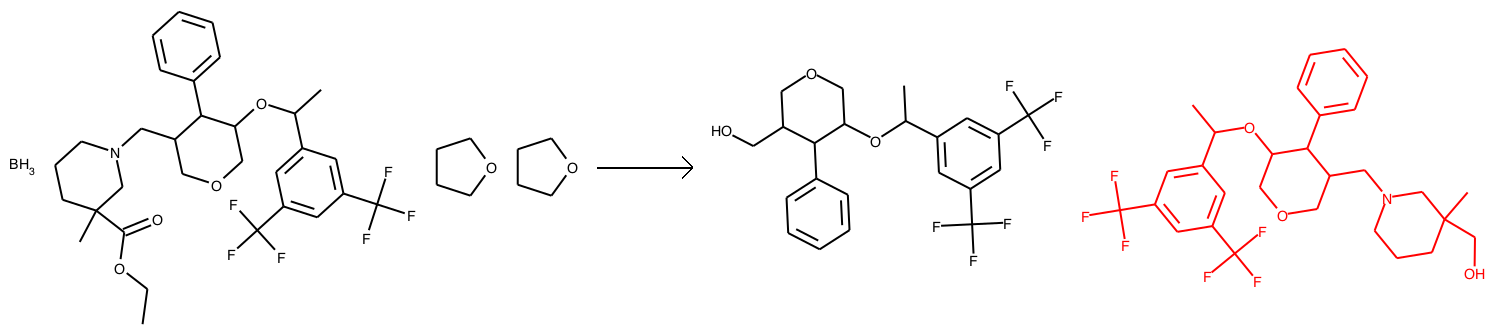

In [68]:
do_index(247, atts=[], showmap=False, save='examples/missed_248_amine_hydrolysis');

# Near-misses, true is rank 2

In [69]:
df_rankpred_nearmiss = df_rankpred.loc[df_rankpred['rank (10 if not found)'] == 2]
df_rankpred_nearmiss.iloc[range(0, 50)]

reactants  \
40   [CH3:1][c:2]1[c:3]([C:4](=[O:5])[Cl:6])[cH:7][...   
72   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
76   [CH2:1]([CH2:2][c:3]1[cH:4][cH:5][cH:6][cH:7][...   
77   [Br-:25].[Br:1][c:2]1[cH:3][c:4]2[c:5]([nH:6][...   
82   [C:26](=[O:27])([OH:28])[O-:29].[CH2:31]([Cl:3...   
97   [CH3:19][I:20].[CH3:23][N:24]([CH3:25])[CH:26]...   
124  [Br:1][c:2]1[c:3]([CH3:9])[c:4]([NH2:5])[cH:6]...   
144  [C:1]([CH:2]=[O:3])(=[O:4])[OH:5].[CH3:6][C:7]...   
146  [Br:40][CH2:41][CH2:42][Br:43].[C:1](=[O:2])([...   
151  [Br:1][c:2]1[c:3]([F:11])[cH:4][cH:5][c:6]2[cH...   
179  [C:17]([OH:18])(=[O:19])[CH3:20].[C:3]([c:4]1[...   
183  [CH:12]([OH:13])=[O:14].[O:1]([CH3:2])[c:3]1[c...   
185  [C:28](#[N:29])[NH:30][C:31]([O:32][c:33]1[cH:...   
193  [C-:21]#[N:22].[CH3:24][CH2:25][OH:26].[Cl:1][...   
206  [CH2:1]1[CH2:2][NH:3][c:4]2[cH:5][cH:6][cH:7][...   
215  [CH2:1]([C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][...   
225  [C:1](#[N:2])[c:3]1[cH:4][cH:5][c:6]([NH:9][CH...   
244  [C:1](#[N:2])[CH2:3][C:4](=[O:5])[NH2:6].[CH3:...   
264  [CH2:11]([CH3:12])[O:13][CH:14]([C:15](=[O:16]...   
328  [Br:1][N:2]1[C:3](=[O:4])[CH2:5][CH2:6][C:7]1=...   
331  [CH3:26][CH2:27][O:28][CH2:29][CH3:30].[Cl:12]...   
340  [C:13]1(=[O:26])[CH2:14][CH2:15][CH2:16][C:17]...   
351  [BH4-:22].[CH3:24][CH2:25][OH:26].[Cl:1][c:2]1...   
381  [C:10]1(=[O:20])[C:11]2=[C:12]([C:13](=[O:14])...   
398  [CH2:28]1[O:29][CH2:30][CH2:31][CH2:32]1.[CH3:...   
404  [Br:1][c:2]1[cH:3][c:4]([NH:8][c:9]2[c:10]([C:...   
485  [C:1](#[N:2])[c:3]1[c:4](-[c:15]2[cH:16][c:17]...   
574  [C:1](=[O:2])([CH3:3])[CH:4]1[c:5]2[c:6]([s:11...   
580  [C:1](#[N:2])[c:3]1[cH:4][cH:5][c:6]2[c:7]([cH...   
597  [Br:12][CH2:13][CH2:14][CH2:15][Br:16].[CH2:1]...   
621  [CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...   
626  [CH2:35]1[O:36][CH2:37][CH2:38][CH2:39]1.[CH3:...   
642  [CH3:36][C:37](=[O:38])[OH:39].[Cl:1][c:2]1[cH...   
650  [CH2:70]([SiH:71]([CH2:72][CH3:73])[CH2:74][CH...   
670  [CH3:7][C:8]1([CH3:16])[O:9][C:10](=[O:15])[CH...   
686  [CH3:1][c:2]1[c:3]([C:4](=[O:5])[O:6][CH3:7])[...   
695  [CH3:28][O-:29].[CH3:32][OH:33].[Cl:1][CH2:2][...   
704  [C:4]([Si:5]([CH3:6])([CH3:7])[O:9][c:10]1[c:1...   
716  [CH3:1][O:2][c:3]1[cH:4][c:5]([C:6](=[O:7])[O:...   
727  [C:36](=[O:37])([O-:38])[O-:39].[CH3:42][I:43]...   
745  [Br:1][c:2]1[c:3]([F:11])[c:4]([F:10])[c:5]([F...   
748  [CH:20]([Cl:21])([Cl:22])[Cl:23].[CH:6]([CH3:7...   
787  [Cl:1][c:2]1[c:3](-[c:9]2[cH:10][cH:11][c:12](...   
836  [Br:26][CH2:27][c:28]1[cH:29][cH:30][cH:31][cH...   
841  [Al+3:31].[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:...   
843  [CH3:25][OH:26].[ClH:24].[F:1][C:2]([F:3])([F:...   
855  [CH3:21][C:22]([OH:23])=[O:24].[CH3:29][OH:30]...   
877  [CH3:1][O:2][C:3]([CH2:4][O:5][c:6]1[c:7]2[c:8...   
879  [C:1]([O:2][C:3](=[O:4])[N:8]1[CH:9]([C:14]([N...   
912  [Br:21][CH2:22][c:23]1[cH:24][cH:25][cH:26][cH...   

                                              products  \
40   [CH3:1][c:2]1[c:3]([C:4](=[O:5])[C:21]2=[C:16]...   
72   [C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O...   
76   [CH2:1]([CH2:2][c:3]1[cH:4][cH:5][cH:6][cH:7][...   
77   [Br:1][c:2]1[cH:3][c:4]2[c:5]([n:6][c:7]([NH2:...   
82   [F:7][C:10]1([CH2:9][OH:8])[CH2:11][CH2:12][N:...   
97   [c:1]1(-[c:7]2[n:8][c:9]([C:12](=[O:13])[O:14]...   
124  [Br:1][c:2]1[c:3]([CH3:9])[c:4]([N:5]2[C:10](=...   
144  [C:1]([CH:2]=[C:8]([C:7]([CH3:6])=[O:12])[CH2:...   
146  [O:7]([N:8]=[C:9]([C:10](=[O:11])[O:12][CH2:13...   
151  [c:2]1([OH:13])[c:3]([F:11])[cH:4][cH:5][c:6]2...   
179  [CH3:1][NH:2][C:3]([c:4]1[cH:5][cH:6][cH:7][cH...   
183  [O:1]([CH3:2])[c:3]1[cH:4][c:5]2[c:9]([cH:10][...   
185  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([CH2:7][N:...   
193  [Cl:1][c:2]1[cH:3][c:4]2[c:8]([cH:9][c:10]1[O:...   
206  [CH2:1]1[CH2:2][NH:3][c:4]2[cH:5][c:6]([N+:17]...   
215  [CH2:1]([CH:2]([OH:3])[c:4]1[cH:5][cH:6][cH:7]...   
225  [C:1](#[N:2])[c:3]1[cH:4][cH:5][c:6]([NH:9][CH...   
244  [C:1](#[N:2])[CH:3]([C:4](=[O:5])[NH2

THIS IS TEST EXAMPLE 145 (1-indexed)
2


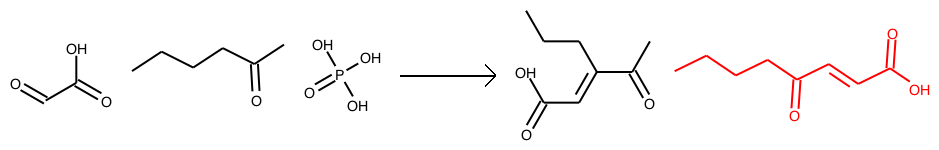

In [70]:
do_index(144, atts=[], showmap=False, save='examples/nearmiss_145_aldohol_terminal', showdets=False, max_bond_preds=0);

THIS IS TEST EXAMPLE 125 (1-indexed)
2


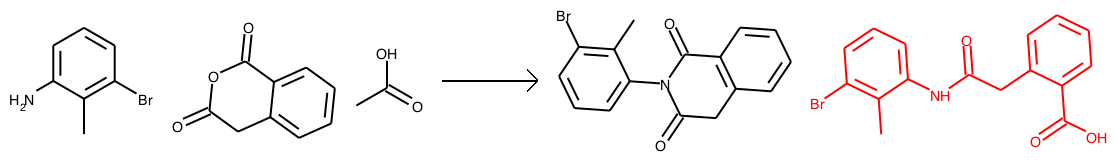

In [71]:
do_index(124, atts=[], showmap=False, save='examples/nearmiss_125_amidation_opening', showdets=False, max_bond_preds=0);

THIS IS TEST EXAMPLE 83 (1-indexed)
2


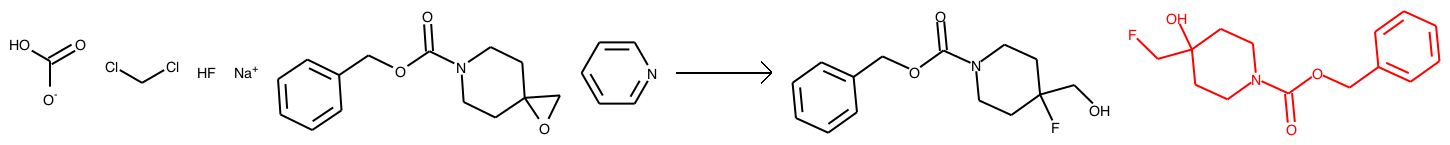

In [72]:
do_index(82, atts=[], showmap=False, save='examples/nearmiss_83_epoxide_opening', showdets=False, max_bond_preds=0);

THIS IS TEST EXAMPLE 41 (1-indexed)
2


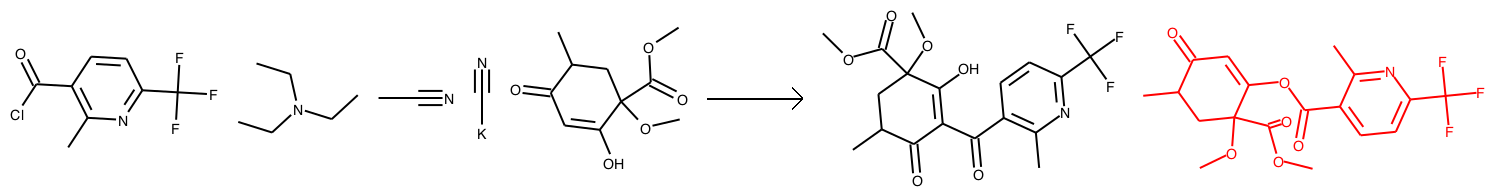

In [73]:
do_index(40, atts=[], showmap=False, save='examples/nearmiss_41_friedalcrafts_acylation', showdets=False, max_bond_preds=0);

THIS IS TEST EXAMPLE 77 (1-indexed)
2


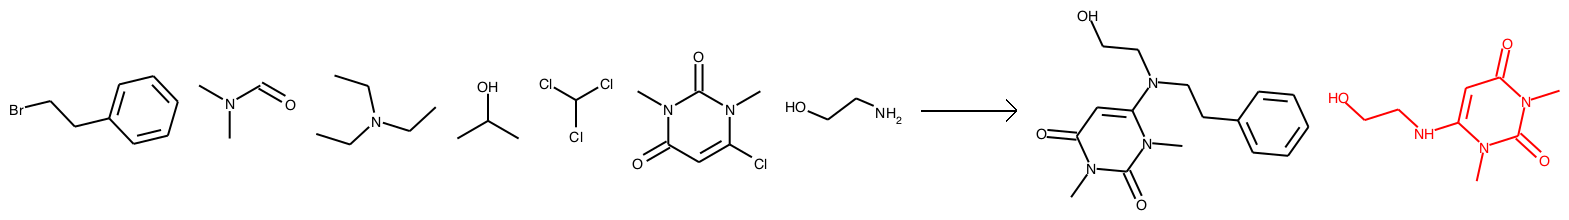

In [74]:
do_index(76, atts=[], showmap=False, save='examples/nearmiss_77_doublealkylation_singlealkylation', showdets=False, max_bond_preds=0);

THIS IS TEST EXAMPLE 78 (1-indexed)
2
[F-].CC(=O)N(C)C.O.[Cs+].O=C([O-])O.Nc1nc2cc(Br)ccc2n1-c1ccccn1.[Br-]
[F-].CC(=O)N(C)C.Nc1nc2ccc(Br)cc2n1-c1ccccn1.O.[Cs+].O=C([O-])O.[Br-]
[F-].CC(=O)N(C)C.O.Brc1ccc2[nH]c(Nc3ccccn3)nc2c1.O=C([O-])O.[Cs+].[Br-]
[F-].CC(=O)N(C)C.O.Nc1nc2cc(-c3ccccn3)ccc2[nH]1.O=C([O-])O.[Cs+].[Br-]
[F-].CC(=O)N(C)C.Nc1nc2cc(Br)ccc2[nH]1.O.c1ccncc1.[Cs+].O=C([O-])O.[Br-]
[Br-:25].[Br:1][c:2]1[cH:3][c:4]2[c:5]([nH:6][c:7]([NH2:9])[n:8]2)[cH:10][cH:11]1.[C:19](=[O:20])([O-:21])[O-:22].[CH3:27][N:28]([CH3:29])[C:30](=[O:31])[CH3:32].[Cs+:23].[Cs+:24].[F:12][c:13]1[n:14][cH:15][cH:16][cH:17][cH:18]1.[OH2:26]>>[Br:1][c:2]1[cH:3][c:4]2[c:5]([n:6][c:7]([NH2:9])[n:8]2-[c:13]2[n:14][cH:15][cH:16][cH:17][cH:18]2)[cH:10][cH:11]1


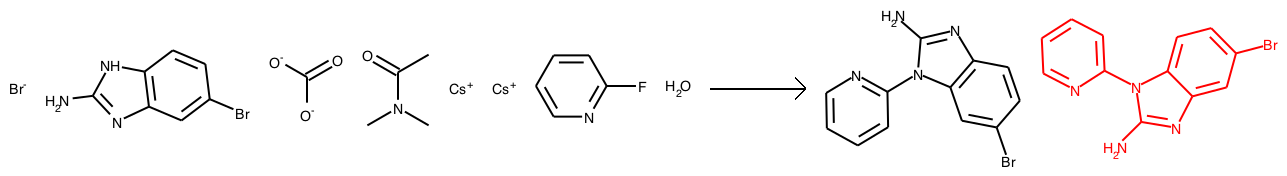

In [75]:
do_index(77, atts=[], showmap=False, save='examples/nearmiss_78_regioselectivity_alkylation', showdets=True, max_bond_preds=0);

THIS IS TEST EXAMPLE 3991 (1-indexed)
2
CC1(C)OBOC1(C)C.CCc1nc2c(F)ccc(OCC(=O)OC)c2c(OC(F)F)c1Cc1ccc(-c2cc[nH]n2)cc1.Cl
CC1(C)OBOC1(C)C.CCc1nc2c(F)ccc(OCC(=O)OC)c2c(OC(F)F)c1Cc1ccc(-n2ccc(Cl)n2)cc1
Cl.CC1(C)OB(c2cc[nH]n2)OC1(C)C.CCc1nc2c(F)ccc(OCC(=O)OC)c2c(OC(F)F)c1Cc1ccccc1
CC1(C)OBOC1(C)C.[F-].CCc1nc2c(Cl)ccc(OCC(=O)OC)c2c(OC(F)F)c1Cc1ccc(-c2cc[nH]n2)cc1
c1cn[nH]c1.CCc1nc2c(F)ccc(OCC(=O)OC)c2c(OC(F)F)c1Cc1ccc(B2OC(C)(C)C(C)(C)O2)cc1.Cl
[CH3:1][O:2][C:3]([CH2:4][O:5][c:6]1[c:7]2[c:8]([O:35][CH:36]([F:37])[F:38])[c:9]([CH2:19][c:20]3[cH:21][cH:22][c:23]([B:26]4[O:27][C:28]([CH3:29])([CH3:30])[C:31]([CH3:32])([CH3:33])[O:34]4)[cH:24][cH:25]3)[c:10]([CH2:17][CH3:18])[n:11][c:12]2[c:13]([F:16])[cH:14][cH:15]1)=[O:39].[Cl:40][c:41]1[n:42][nH:43][cH:44][cH:45]1>>[CH3:1][O:2][C:3]([CH2:4][O:5][c:6]1[c:7]2[c:8]([O:35][CH:36]([F:37])[F:38])[c:9]([CH2:19][c:20]3[cH:21][cH:22][c:23](-[n:43]4[n:42][c:41]([Cl:40])[cH:45][cH:44]4)[cH:24][cH:25]3)[c:10]([CH2:17][CH3:18])[n:11][c:12]2[c:13]([F:16])[

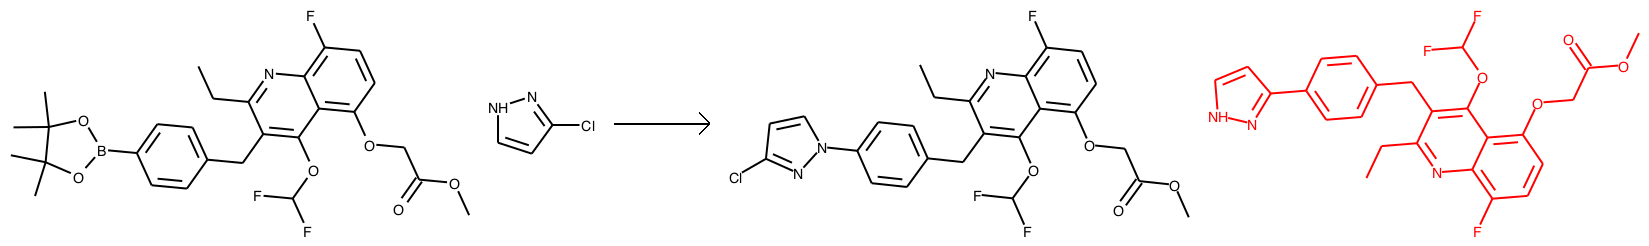

In [76]:
do_index(3990, atts=[], showmap=False, save='examples/nearmiss_3991_suzuki_substitution');

THIS IS TEST EXAMPLE 3710 (1-indexed)
2
Cl.CCOC(=O)N(Cc1ccc(C)nc1)c1cc([N+](CC)(CC)CC)nc(N)c1[N+](=O)[O-].CC(C)O
Cl.C=Cc1cc(N(Cc2ccc(C)nc2)C(=O)OCC)c([N+](=O)[O-])c(N)n1.CCNCC.CC(C)O
Cl.CCOC(=O)N(Cc1ccc(C)nc1)c1cc(CCN(CC)CC)nc(N)c1[N+](=O)[O-].CC(C)O
Cl.CCOC(=O)N(Cc1ccc(C)nc1)c1cc(CCN(CC)CC)nc(N)c1[N+](=O)[O-].CC(C)O
Cl.CCOC(=O)N(Cc1ccc(C)nc1)c1cc(CCN(CC)CC)nc(N)c1[N+](=O)[O-].CC(C)O
[CH2:1]([CH3:2])[O:3][C:4]([N:5]([CH2:6][c:7]1[cH:8][n:9][c:10]([CH3:13])[cH:11][cH:12]1)[c:14]1[c:15]([N+:22](=[O:23])[O-:24])[c:16]([NH2:21])[n:17][c:18]([Cl:20])[cH:19]1)=[O:25].[CH3:26][CH2:27][N:28]([CH2:29][CH3:30])[CH2:31][CH3:32].[CH:33]([OH:34])([CH3:35])[CH3:36]>>[CH2:1]([CH3:2])[O:3][C:4]([N:5]([CH2:6][c:7]1[cH:8][n:9][c:10]([CH3:13])[cH:11][cH:12]1)[c:14]1[c:15]([N+:22](=[O:23])[O-:24])[c:16]([NH2:21])[n:17][c:18]([CH:26]=[CH2:27])[cH:19]1)=[O:25]
Prediction 1:    18.0-20.0-0.0   with score 2.9676918983459473
Prediction 2:    18.0-34.0-1.0   with score -0.907904326915741
Prediction 3:    4.0-5.

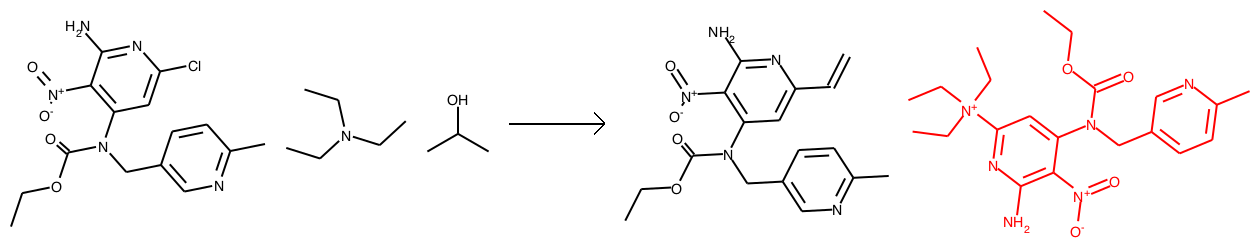

In [77]:
do_index(3709, atts=[], showmap=False, save='examples/nearmiss_3710_reduction_alkenation');

THIS IS TEST EXAMPLE 3574 (1-indexed)
2
[H-].COc1ccc(-c2nn(C(C)C)c3c(C)cccc23)cc1.[Na+].[I-]
[H-].COc1ccc(-c2c3cccc(C)c3nn2C(C)C)cc1.[Na+].[I-]
C.[H-].[Na+].[I-].CCn1nc(-c2ccc(OC)cc2)c2cccc(C)c21
C.[H-].[Na+].[I-].CCn1nc(-c2ccc(OC)cc2)c2cccc(C)c21
COc1ccc(-c2n[nH]c3c(CC(C)C)cccc23)cc1.[H-].[Na+].[I-]
[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[n:10][nH:11][c:12]3[c:13]([CH3:18])[cH:14][cH:15][cH:16][c:17]23)[cH:7][cH:8]1.[H-:19].[I:21][CH:22]([CH3:23])[CH3:24].[Na+:20]>>[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[n:10]([CH:22]([CH3:23])[CH3:24])[n:11][c:12]3[c:13]([CH3:18])[cH:14][cH:15][cH:16][c:17]23)[cH:7][cH:8]1
Prediction 1:    21.0-22.0-0.0   with score 3.7792770862579346
Prediction 2:    11.0-22.0-1.0   with score 0.6710519194602966
Prediction 3:    10.0-22.0-1.0   with score -2.0557632446289062
Prediction 4:    1.0-2.0-0.0     with score -4.646158218383789
Prediction 5:    18.0-22.0-1.0   with score -5.761561393737793
Prediction 6:    22.0-23.0-0.0   with score -6.2958917617797

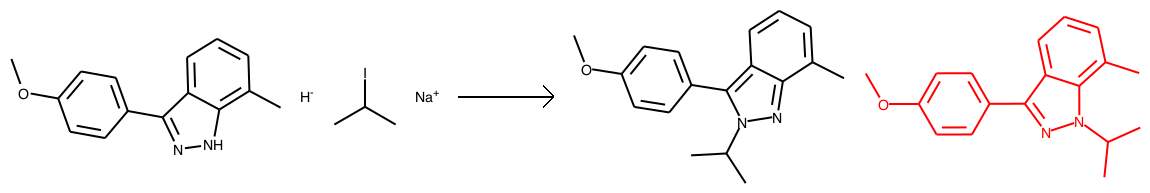

In [78]:
do_index(3573, atts=[], showmap=False, save='examples/nearmiss_3574_indole_selectivity');

THIS IS TEST EXAMPLE 3552 (1-indexed)
2
c1ccccc1.COc1ccc(C(N)=NS(=O)(=O)C=Cc2ccc(Cl)c(Cl)c2)cc1OC.Cl
COc1ccc(C(=N)NS(=O)(=O)C=Cc2ccc(Cl)c(Cl)c2)cc1OC.c1ccccc1.Cl
COc1ccc(C(N)NS(=O)(=O)C=Cc2ccc(Cl)c(Cl)c2)cc1OC.c1ccccc1.Cl
COc1ccc(CN)cc1OC.c1ccccc1.NS(=O)(=O)C=Cc1ccc(Cl)c(Cl)c1.Cl
c1ccccc1.NS(=O)(=O)C=Cc1ccc(Cl)c(Cl)c1.COc1ccc(C=N)cc1OC.Cl
[Cl:2][c:3]1[cH:4][c:5]([CH:6]=[CH:7][S:8](=[O:9])(=[O:10])[N:11]=[C:12]([c:13]2[cH:14][c:15]([O:21][CH3:22])[c:16]([O:19][CH3:20])[cH:17][cH:18]2)[Cl:23])[cH:24][cH:25][c:26]1[Cl:27].[NH4+:1].[cH:28]1[cH:29][cH:30][cH:31][cH:32][cH:33]1>>[NH:1]=[C:12]([NH:11][S:8]([CH:7]=[CH:6][c:5]1[cH:4][c:3]([Cl:2])[c:26]([Cl:27])[cH:25][cH:24]1)(=[O:9])=[O:10])[c:13]1[cH:14][c:15]([O:21][CH3:22])[c:16]([O:19][CH3:20])[cH:17][cH:18]1
Prediction 1:    12.0-23.0-0.0   with score 9.28256607055664
Prediction 2:    11.0-12.0-1.0   with score -0.7577017545700073
Prediction 3:    1.0-12.0-1.0    with score -1.3449254035949707
Prediction 4:    1.0-12.0-2.0    with score -

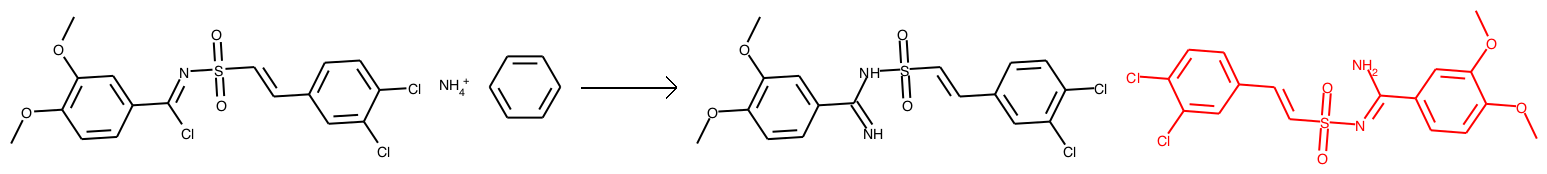

In [79]:
do_index(3551, atts=[], showmap=False, save='examples/nearmiss_3552_tautomer');

THIS IS TEST EXAMPLE 78 (1-indexed)
2
[F-].CC(=O)N(C)C.O.[Cs+].O=C([O-])O.Nc1nc2cc(Br)ccc2n1-c1ccccn1.[Br-]
[F-].CC(=O)N(C)C.Nc1nc2ccc(Br)cc2n1-c1ccccn1.O.[Cs+].O=C([O-])O.[Br-]
[F-].CC(=O)N(C)C.O.Brc1ccc2[nH]c(Nc3ccccn3)nc2c1.O=C([O-])O.[Cs+].[Br-]
[F-].CC(=O)N(C)C.O.Nc1nc2cc(-c3ccccn3)ccc2[nH]1.O=C([O-])O.[Cs+].[Br-]
[F-].CC(=O)N(C)C.Nc1nc2cc(Br)ccc2[nH]1.O.c1ccncc1.[Cs+].O=C([O-])O.[Br-]
[Br-:25].[Br:1][c:2]1[cH:3][c:4]2[c:5]([nH:6][c:7]([NH2:9])[n:8]2)[cH:10][cH:11]1.[C:19](=[O:20])([O-:21])[O-:22].[CH3:27][N:28]([CH3:29])[C:30](=[O:31])[CH3:32].[Cs+:23].[Cs+:24].[F:12][c:13]1[n:14][cH:15][cH:16][cH:17][cH:18]1.[OH2:26]>>[Br:1][c:2]1[cH:3][c:4]2[c:5]([n:6][c:7]([NH2:9])[n:8]2-[c:13]2[n:14][cH:15][cH:16][cH:17][cH:18]2)[cH:10][cH:11]1
Prediction 1:    12.0-13.0-0.0   with score 3.4505248069763184
Prediction 2:    9.0-13.0-1.0    with score -2.042470932006836
Prediction 3:    2.0-18.0-1.0    with score -3.1083712577819824
Prediction 4:    6.0-13.0-1.0    with score -3.627767086029052

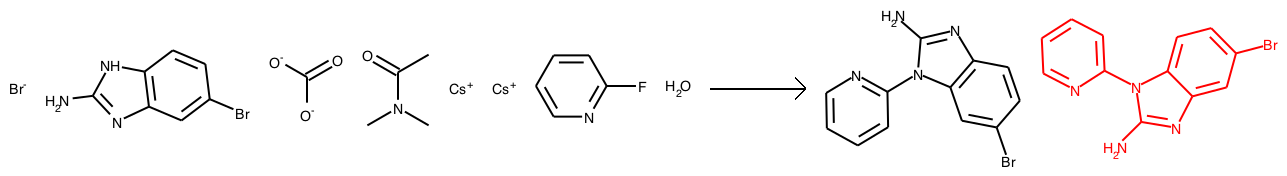

In [80]:
do_index(77, atts=[], showmap=False, save='examples/nearmiss_78_arylation_of_amine');

THIS IS TEST EXAMPLE 2882 (1-indexed)
2
CCN(CC)CC.COC(=O)c1ccc2ncn(C(c3ccccc3)(c3ccccc3)c3ccccc3)c2c1.ClCCl.Cl
CCN(CC)CC.ClCCl.COC(=O)c1ccc2c(c1)ncn2C(c1ccccc1)(c1ccccc1)c1ccccc1.Cl
CCN(CC)CC.COC(=O)c1ccc2nc[nH]c2c1.ClCCl.c1ccc(C(c2ccccc2)c2ccccc2)cc1.Cl
CCN(CC)CC.c1ccccc1.COC(=O)c1ccc2c(c1)ncn2C(c1ccccc1)c1ccccc1.ClCCl.Cl
CCN(CC)CC.c1ccccc1.COC(=O)c1ccc2c(c1)ncn2C(c1ccccc1)c1ccccc1.ClCCl.Cl
[CH3:15][CH2:16][N:17]([CH2:18][CH3:19])[CH2:20][CH3:21].[Cl:42][CH2:43][Cl:44].[ClH:1].[c:22]1([C:28]([c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)([c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[Cl:41])[cH:23][cH:24][cH:25][cH:26][cH:27]1.[n:2]1[cH:3][nH:4][c:5]2[c:6]1[cH:7][cH:8][c:9]([C:11](=[O:12])[O:13][CH3:14])[cH:10]2>>[n:2]1([C:28]([c:22]2[cH:23][cH:24][cH:25][cH:26][cH:27]2)([c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[cH:3][n:4][c:5]2[c:6]1[cH:7][cH:8][c:9]([C:11](=[O:12])[O:13][CH3:14])[cH:10]2
Prediction 1:    28.0-41.0-0.0   with score 4.1489286

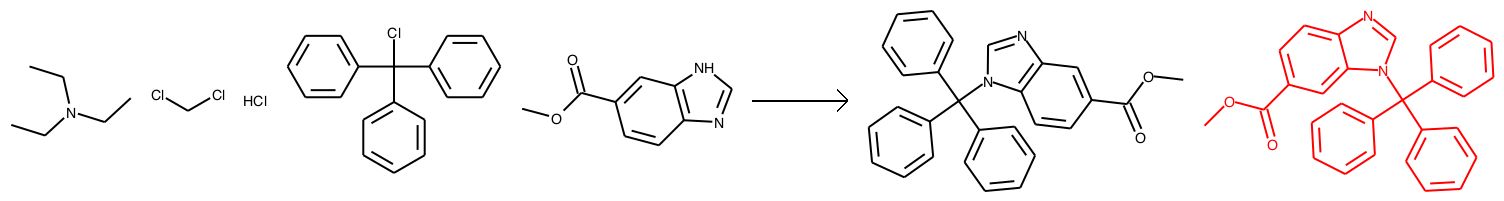

In [81]:
do_index(2881, atts=[], showmap=False, save='examples/nearmiss_2882_azaindole_selectivity');

THIS IS TEST EXAMPLE 2127 (1-indexed)
2
O=COCc1ccccc1.[O-].CO.CC1(C(=O)O)CC(F)CN1.[Na+]
O=C(O)C1CC(F)CN1C(=O)OCc1ccccc1.C.CO.[Na+].[O-]
CC1(C(=O)OC(=O)OCc2ccccc2)CC(F)CN1.[O-].CO.[Na+]
CO.[Na+].COCc1ccccc1.CC1(C(=O)O)CC(F)CN1.O.[O-]
[O-].CO.CC12CC(F)(CN1C(=O)OCc1ccccc1)OC2=O.[Na+]
[CH3:23][OH:24].[CH3:3][C:4]1([C:20](=[O:21])[O-:22])[N:5]([C:10](=[O:11])[O:12][CH2:13][c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)[CH2:6][CH:7]([F:9])[CH2:8]1.[Na+:2].[OH-:1]>>[CH:4]1([C:20](=[O:21])[OH:22])[N:5]([C:10](=[O:11])[O:12][CH2:13][c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)[CH2:6][CH:7]([F:9])[CH2:8]1
Prediction 1:    5.0-10.0-0.0    with score 0.13942253589630127
Prediction 2:    23.0-24.0-0.0   with score -1.5509333610534668
Prediction 3:    3.0-4.0-0.0     with score -2.6646273136138916
Prediction 4:    22.0-23.0-1.0   with score -3.243030548095703
Prediction 5:    10.0-12.0-0.0   with score -3.766413450241089
Prediction 6:    20.0-22.0-0.0   with score -4.496388912200928
Prediction 7:    4.0

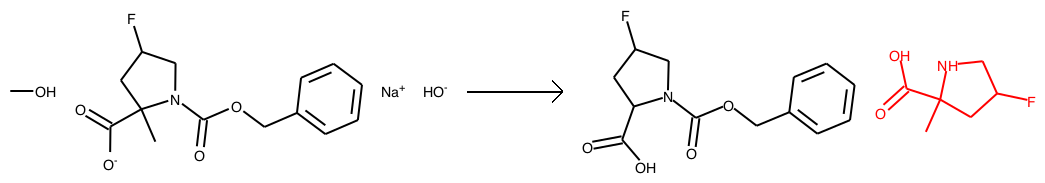

In [82]:
do_index(2126, atts=[], showmap=False, save='examples/nearmiss_2127_demethylation');

THIS IS TEST EXAMPLE 2307 (1-indexed)
2
COc1nc(C)c(I)nc1N(C(=O)OCC(C)C)S(=O)(=O)c1cccnc1-c1ccc([Si](C)(C)C)cc1.O=C1CCC(=O)N1.CC#N
C[SiH](C)C.COc1nc(C)cnc1N(C(=O)OCC(C)C)S(=O)(=O)c1cccnc1-c1ccc(I)cc1.CC#N.O=C1CCC(=O)N1
COc1nc(C)cnc1N(C(=O)OCC(C)C)S(=O)(=O)c1cc(I)cnc1-c1ccc([Si](C)(C)C)cc1.O=C1CCC(=O)N1.CC#N
C[SiH](C)C.CC#N.[I-].COc1nc(C)cnc1N(C(=O)OCC(C)C)S(=O)(=O)c1cccnc1-c1ccc(N2C(=O)CCC2=O)cc1
O=C1CCC(=O)N1.COc1nc(C)cnc1N(C(=O)OCC(C)C)S(=O)(=O)c1cccnc1-c1ccc([Si](C)(C)C)cc1.CC#N.[I-]
[CH2:9]([CH:10]([CH3:11])[CH3:12])[O:13][C:14](=[O:15])[N:16]([S:17](=[O:18])(=[O:19])[c:20]1[c:21](-[c:26]2[cH:27][cH:28][c:29]([Si:32]([CH3:33])([CH3:34])[CH3:35])[cH:30][cH:31]2)[n:22][cH:23][cH:24][cH:25]1)[c:36]1[n:37][cH:38][c:39]([CH3:44])[n:40][c:41]1[O:42][CH3:43].[CH3:45][C:46]#[N:47].[I:1][N:2]1[C:3](=[O:4])[CH2:5][CH2:6][C:7]1=[O:8]>>[I:1][c:29]1[cH:28][cH:27][c:26](-[c:21]2[c:20]([S:17]([N:16]([C:14]([O:13][CH2:9][CH:10]([CH3:11])[CH3:12])=[O:15])[c:36]3[n:37][cH:38][c:39]([CH3:44])[n:40][c:

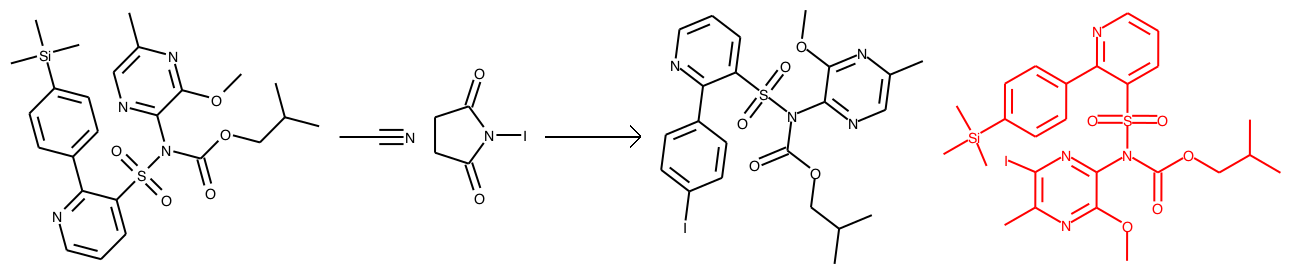

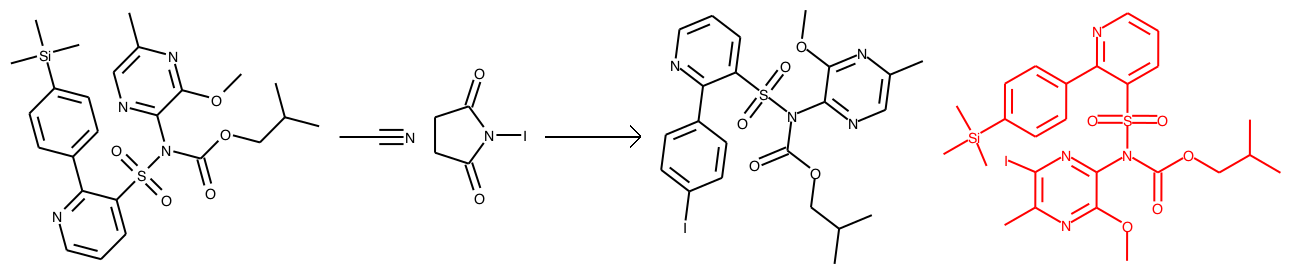

In [83]:
do_index(2306, atts=[], showmap=False, save='examples/nearmiss_2307_iodination')

THIS IS TEST EXAMPLE 194 (1-indexed)
2
CCOC(=O)C(C#N)C1(C#N)CCc2cc(Cl)c(OC)cc21.CCO.[K+].O
[K+].CCO.O.CCOC=O.COc1cc2c(cc1Cl)CCC2(C#N)CC#N
CCO.C#N.CCOC(=O)CC1(C#N)CCc2cc(Cl)c(OC)cc21.O.[K+]
CCO.COc1cc2c(cc1Cl)CCC2(C#N)C1(C#N)CCOC1=O.O.[K+]
COc1cc2c(cc1Cl)CCC2(C)C#N.O.CCO.C#N.CCOC=O.[K+]
[C-:21]#[N:22].[CH3:24][CH2:25][OH:26].[Cl:1][c:2]1[cH:3][c:4]2[c:8]([cH:9][c:10]1[O:11][CH3:12])[C:7](=[C:13]([C:14]([O:15][CH2:16][CH3:17])=[O:18])[C:19]#[N:20])[CH2:6][CH2:5]2.[K+:23].[OH2:27]>>[Cl:1][c:2]1[cH:3][c:4]2[c:8]([cH:9][c:10]1[O:11][CH3:12])[C:7]([CH2:13][C:19]#[N:20])([C:21]#[N:22])[CH2:6][CH2:5]2
Prediction 1:    7.0-21.0-1.0    with score 1.680497646331787
Prediction 2:    7.0-13.0-1.0    with score 1.4089937210083008
Prediction 3:    2.0-21.0-1.0    with score -0.3705388307571411
Prediction 4:    13.0-14.0-0.0   with score -0.46999591588974
Prediction 5:    21.0-22.0-0.0   with score -2.1966910362243652
Prediction 6:    15.0-16.0-0.0   with score -2.4728665351867676
Prediction 7:    13.

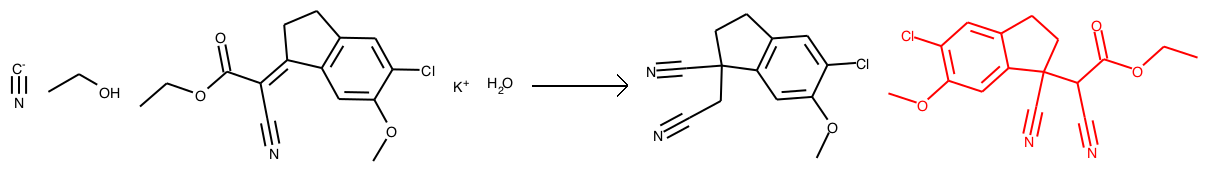

In [84]:
do_index(193, atts=[], showmap=False, save='examples/nearmiss_194_elimination_nitrile');

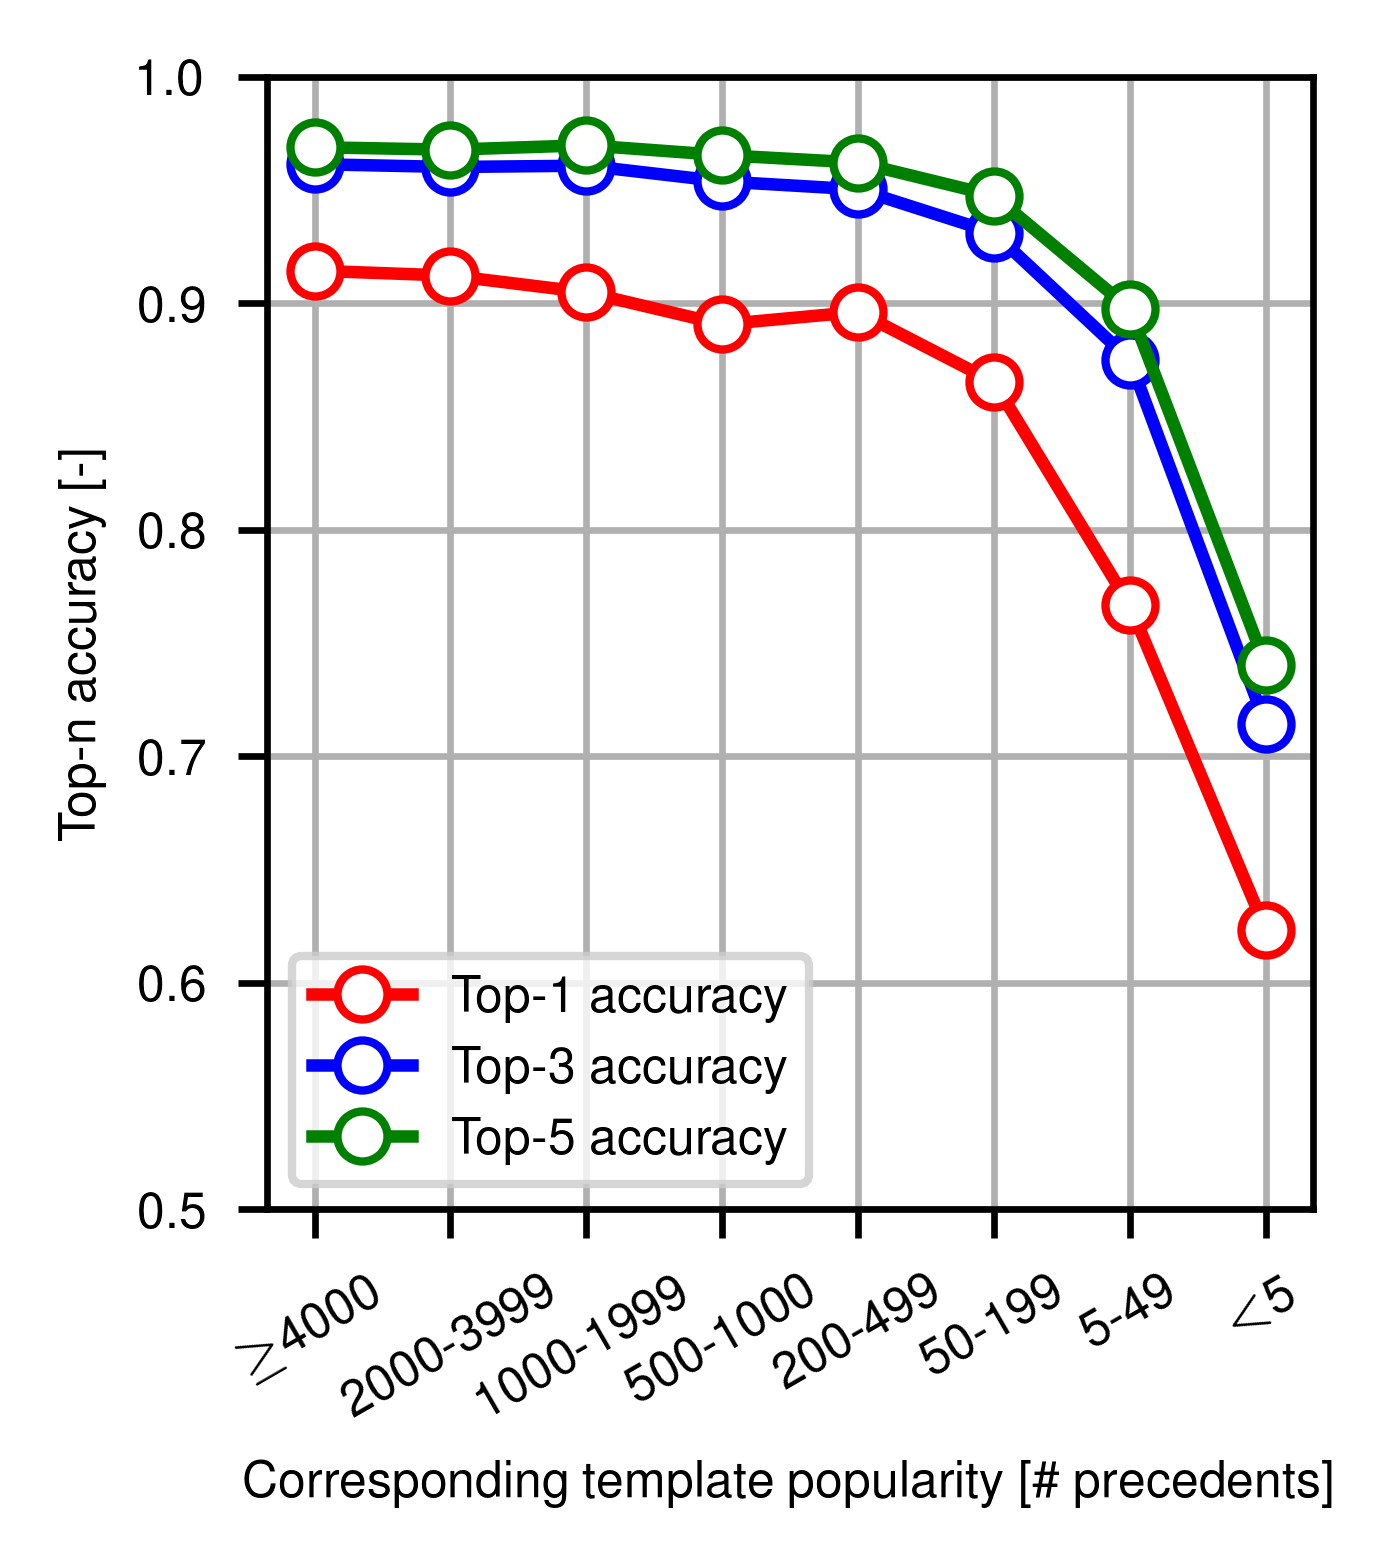

In [88]:
# Plot with different bins
import numpy as np
in_ranges = [
    lambda c: c.between(-1, 4.999),
    lambda c: c.between(5, 49),
    lambda c: c.between(50, 199),
    lambda c: c.between(200, 499),
    lambda c: c.between(500, 999),
    lambda c: c.between(1000, 1999),
    lambda c: c.between(2000, 3999),
    lambda c: c.between(4000, np.inf),
][::-1]
names = ['$<$5', '5-49', '50-199', '200-499', '500-1000', '1000-1999', '2000-3999', '≥4000'][::-1]
rank_thresholds = [1,  3, 5]
colors = {1: 'ro-', 3: 'bo-', 5: 'go-'}
labels = {i: 'Top-{} accuracy'.format(i) for i in [1, 3, 5]}

import matplotlib.pyplot as plt
params = {'text.usetex': True, 
          'text.latex.unicode': True,
          'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 6
plt.rcParams["text.latex.preamble"] = [
    r'\usepackage{siunitx}',
    r'\sisetup{detect-all}',
    r'\usepackage{amssymb}',
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath'
]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.25,2.5), dpi=600)
top1_accuracies = []
for rank_threshold in rank_thresholds:
    accuracies = []
    for in_range in in_ranges:
        pred_ranks = df_rankpred.loc[in_range(df_templates.found_count)]['rank (10 if not found)']
    
        accuracies.append(np.sum(np.array(pred_ranks) <= rank_threshold) / len(pred_ranks))
    ax.plot(accuracies, colors[rank_threshold], label=labels[rank_threshold], markerfacecolor='white')
    
    if rank_threshold == 1:
        top1_accuracies = accuracies[:] # save a copy for later
# Style
ax.set_xticks(list(range(len(accuracies))))
ax.set_xticklabels(names)
plt.xticks(fontsize=6, rotation=30)


ax.set_ylim([0.5,1.0])
# yticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ax.set_yticks(yticks)
# ax.set_yticklabels(['{:.1f}'.format(x) for x in yticks])
plt.legend()
plt.grid()
plt.xlabel('Corresponding template popularity [\# precedents]')
plt.ylabel('Top-n accuracy [-]')
plt.savefig('accuracy_as_func_of_popularity.eps', format='eps', dpi=600, bbox_inches='tight')
plt.savefig('accuracy_as_func_of_popularity.png', format='png', dpi=600, bbox_inches='tight')
plt.show()



## Template coverage v. popularity v. number candidates (plot roughly matches number of candidates)

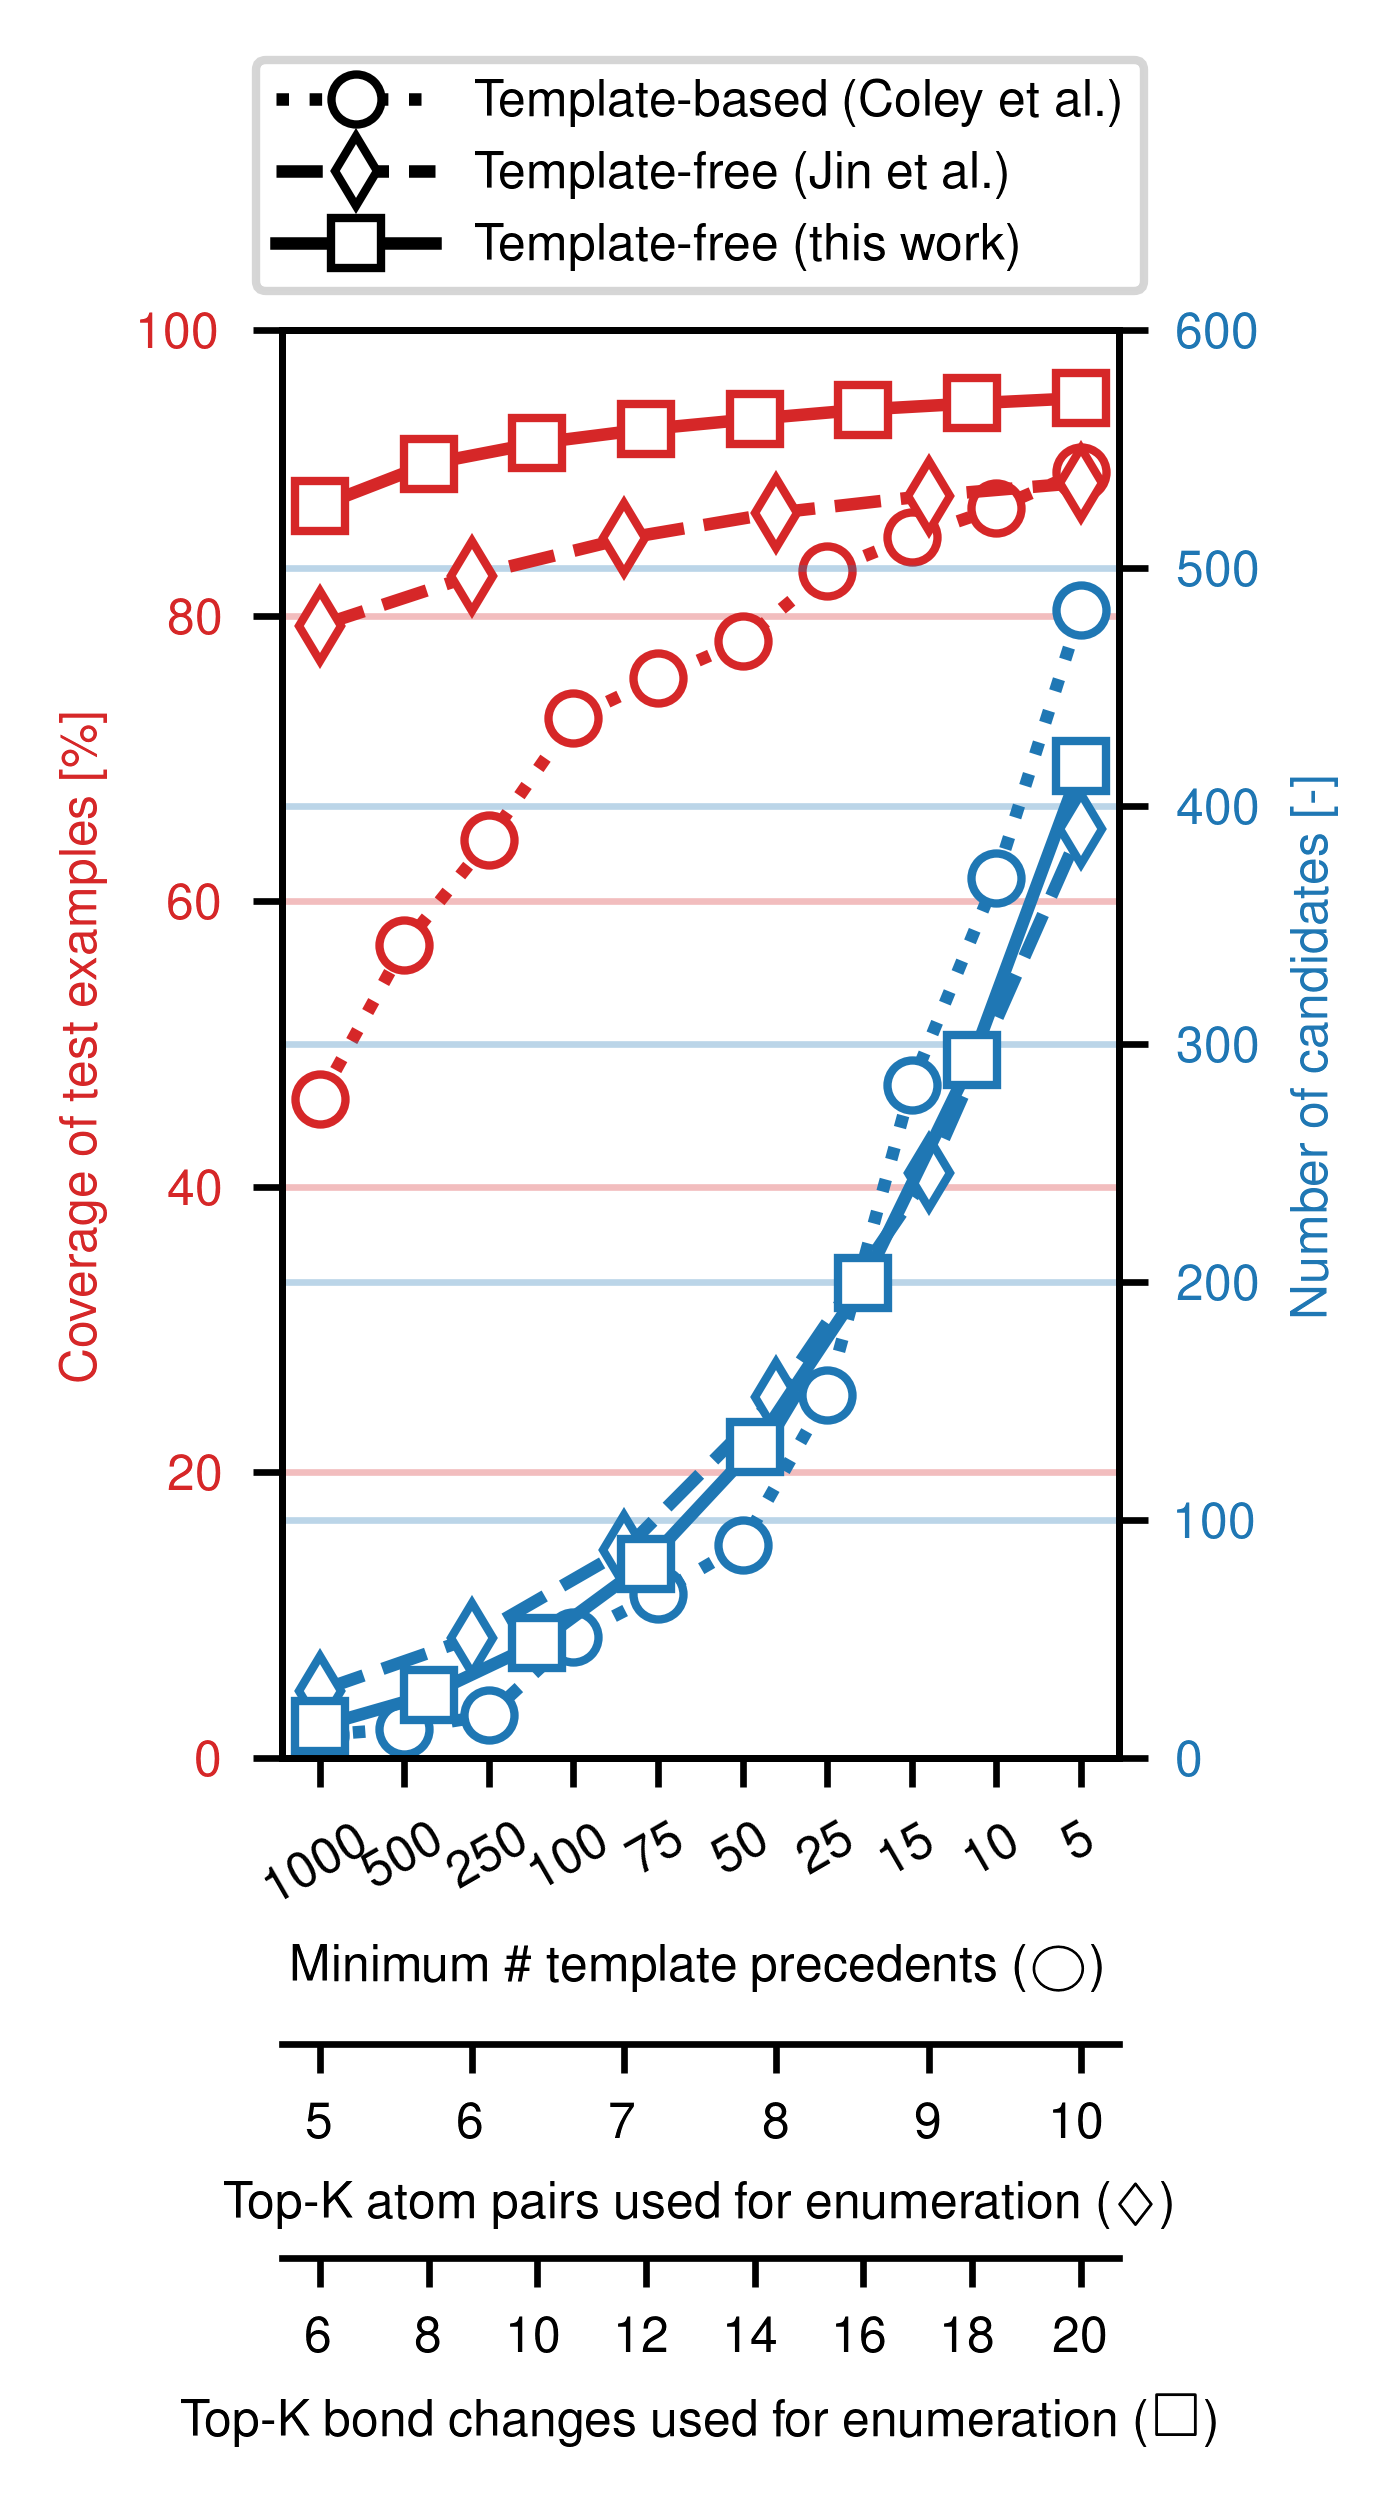

In [89]:
# Get list of template precedents - HARDCODED FROM OTHER ANALYSIS
mincounts = [5000, 2500, 1000, 500, 250, 100, 75, 50, 25, 15, 10, 5]
coverage = [12.34, 26.75, 46.14, 56.91, 64.31, 72.83, 75.63, 78.20, 83.12, 85.49, 87.52, 90.08]
num_cands = [0.94, 3.56, 9.7, 12.3, 17.90, 50.92, 68.98, 89.63, 152.46, 282.96, 369.89, 482.22]
trunc = 2
mincounts = mincounts[trunc:]
coverage = coverage[trunc:]
num_cands = num_cands[trunc:]

fig = plt.figure(figsize=(1.8, 3.5), dpi=600)
ax1 = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
ax1.set_ylim([0.0, 100.0])
ax1.set_xscale("linear")

color = 'tab:red'
ax1.set_xlabel(r'Minimum \# template precedents ($\bigcirc$)')
ax1.set_ylabel('Coverage of test examples [\%]', color=color)
ax1.plot(coverage, 'o:', color=color, markerfacecolor='white')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(list(range(len(mincounts))))
ax1.set_xticklabels(mincounts)
plt.xticks(fontsize=6, rotation=30)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of candidates [-]', color=color)
ax2.plot(num_cands, 'o:', color=color, markerfacecolor='white')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 600])

ax2.yaxis.grid(color='tab:blue', alpha=0.3)
ax1.yaxis.grid(color='tab:red', alpha=0.3)

ax3 = ax1.twiny()
ax5 = ax1.twiny()


# NIPS
ax4 = ax3.twinx()
ax3.plot([5, 6, 7, 8, 9, 10], [79.3, 82.8, 85.4, 87.2, 88.4, 89.3], 'd--', color='tab:red', markerfacecolor='white')
ax4.plot([5, 6, 7, 8, 9, 10], [28.3, 50.5, 87.3, 151.6, 245.6, 390.2], 'd--', color='tab:blue', markerfacecolor='white')
ax4.set_ylim(ax2.get_ylim())
ax4.set_yticks([])
ax3.set_xticks([5, 6, 7, 8, 9, 10])


# US
ax6 = ax5.twinx()
ax5.plot([6, 8, 10, 12, 14, 16, 18, 20], [87.68, 90.625, 92.0875, 93.05, 93.7775, 94.4325, 94.8625, 95.23], 's-', color='tab:red', markerfacecolor='white')
ax6.plot([6, 8, 10, 12, 14, 16, 18, 20], [13.35, 26.45, 48.11, 81.68, 130.61, 199.38, 293.2185, 416.7096], 's-', color='tab:blue', markerfacecolor='white')
ax6.set_ylim(ax2.get_ylim())
ax6.set_yticks([])
ax5.set_xticks([6, 8, 10, 12, 14, 16, 18, 20])

ax3.xaxis.set_ticks_position('bottom')
ax5.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax5.xaxis.set_label_position('bottom')

ax3.spines['bottom'].set_position(('axes', -0.2))
ax5.spines['bottom'].set_position(('axes', -0.35))

ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
ax3.spines['bottom'].set_visible(True)

ax3.set_xlabel(r'Top-K atom pairs used for enumeration ($\lozenge$)')
ax5.set_xlabel(r'Top-K bond changes used for enumeration ($\square$)')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [ \
    Line2D([0], [0], linestyle=':', marker='o', color='black', markerfacecolor='white', label='Template-based (Coley et al.)'),
    Line2D([0], [0], linestyle='--', marker='d', color='black', markerfacecolor='white', label='Template-free (Jin et al.)'),
    Line2D([0], [0], marker='s', color='black', markerfacecolor='white', label='Template-free (this work)'),
]

plt.legend(handles=legend_elements, handlelength=3.18, bbox_to_anchor=(0, 1.01, 1, 0.2), loc="lower center")
plt.savefig('coverage_and_cands_withReagents.eps', format='eps', dpi=600, bbox_inches='tight')
plt.savefig('coverage_and_cands_withReagents.png', format='png', dpi=600, bbox_inches='tight')
plt.show()



# Human benchmarking examples

In [90]:
human_study_path = '../human/human_benchmarking.csv'
rcts = []
all_smiles = []
with open(human_study_path, 'r', encoding='utf-8-sig') as fid:
    for line in fid:
        all_smiles.append(line.strip())
        rcts.append(line.strip().split('>')[0])
print(rcts[:5])

cols = ['reactants', 'products', 'product_smiles', 'product_smiles_sani', 'rank (10 if not found)'] + ['pred{}'.format(i) for i in range(10)] + ['rank (10 if not found) sani'] + ['pred{} sani'.format(i+1) for i in range(10)]
df_rankpred_human = pd.read_csv("../rexgen_direct/rank_diff_wln/model-core16-500-3-max150-direct-useScores/test_human_withReagents.cbond_detailed_2400000.eval_by_smiles", sep="\t",header=None, names=cols) 

['[CH3:26][N:27]1[CH2:28][CH2:29][CH2:30][C:31]1=[O:32].[Cl:1][c:2]1[n:3](-[c:12]2[cH:13][cH:14][c:15]([Cl:18])[cH:16][cH:17]2)[n:4][c:5]2[cH:6][c:7]([F:11])[cH:8][cH:9][c:10]12.[NH2:19][CH:20]1[CH2:21][CH2:22][CH2:23][CH2:24][CH2:25]1', '[CH2:42]([N:43]=[C:44]=[N:45][CH2:46][CH2:47][CH2:48][N:49]([CH3:50])[CH3:51])[CH3:52].[CH3:32][N:33]([CH2:34][CH:35]=[CH:36][C:37](=[O:38])[OH:39])[CH3:40].[CH3:64][N:65]([CH3:66])[CH:67]=[O:68].[CH3:70][CH2:71][N:72]([CH2:73][CH3:74])[CH2:75][CH3:76].[ClH:1].[ClH:2].[ClH:31].[ClH:41].[NH2:3][CH2:4][c:5]1[cH:6][c:7]2[n:8][cH:9][n:10][c:11]([NH:14][c:15]3[cH:16][c:17]([Cl:30])[c:18]([O:21][CH2:22][c:23]4[cH:24][c:25]([F:29])[cH:26][cH:27][cH:28]4)[cH:19][cH:20]3)[c:12]2[nH:13]1.[OH2:53].[OH2:69].[OH:54][n:55]1[c:56]2[cH:57][cH:58][cH:59][cH:60][c:61]2[n:62][n:63]1', '[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)[N:8]1[C:9](=[O:25])[C:10]2([c:16]3[cH:17][cH:18][c:19]([N+:22]([O-:23])=[O:24])[cH:20][cH:21]3)[CH2:11][CH:12]([C:13]1=[O:14])[CH2:15]2.[CH3

THIS IS TEST EXAMPLE 1 (1-indexed)
1
Cl.Fc1ccc2c(NC3CCCCC3)n(-c3ccc(Cl)cc3)nc2c1.CN1CCCC1=O
Fc1ccc2cn(-c3ccc(Cl)cc3)nc2c1.NC1CCCCC1.Cl.CN1CCCC1=O
Nc1c2ccc(F)cc2nn1-c1ccc(Cl)cc1.Cl.C1CCCCC1.CN1CCCC1=O
CN1C(=O)CCC1N(c1c2ccc(F)cc2nn1-c1ccc(Cl)cc1)C1CCCCC1.Cl
NC1CCCCC1.O=C1CCCN1Cc1c2ccc(F)cc2nn1-c1ccc(Cl)cc1.Cl
[CH3:26][N:27]1[CH2:28][CH2:29][CH2:30][C:31]1=[O:32].[Cl:1][c:2]1[n:3](-[c:12]2[cH:13][cH:14][c:15]([Cl:18])[cH:16][cH:17]2)[n:4][c:5]2[cH:6][c:7]([F:11])[cH:8][cH:9][c:10]12.[NH2:19][CH:20]1[CH2:21][CH2:22][CH2:23][CH2:24][CH2:25]1>>[c:2]1([NH:19][CH:20]2[CH2:21][CH2:22][CH2:23][CH2:24][CH2:25]2)[n:3](-[c:12]2[cH:13][cH:14][c:15]([Cl:18])[cH:16][cH:17]2)[n:4][c:5]2[cH:6][c:7]([F:11])[cH:8][cH:9][c:10]12
Prediction 1:    1.0-2.0-0.0     with score 5.4040679931640625
Prediction 2:    2.0-19.0-1.0    with score 3.551117420196533
Prediction 3:    7.0-19.0-1.0    with score -3.6458990573883057
Prediction 4:    7.0-11.0-0.0    with score -3.8936760425567627
Prediction 5:    28.0-29.0-0.

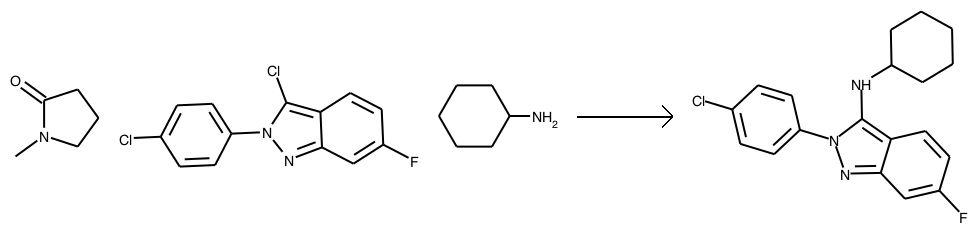

1
THIS IS TEST EXAMPLE 2 (1-indexed)
1
CCN(CC)CC.Cl.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.CN(C)CC=CC(=O)NCc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2[nH]1.CN(C)C=O
CCN(CC)CC.Cl.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.CN(C)CC=CC(=O)NCc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2[nH]1.CN(C)C=O
CCN(CC)CC.Cl.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.CN(C)CC=CCNCc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2[nH]1.CN(C)C=O
CCN(CC)CC.Cl.On1nnc2ccccc21.O.CN(C)CC=CC(=O)N(CCN=C=NCCCN(C)C)Cc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2[nH]1.CN(C)C=O
CCN(CC)CCN(Cc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2[nH]1)C(=O)C=CCN(C)C.Cl.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.CN(C)C=O
[CH2:42]([N:43]=[C:44]=[N:45][CH2:46][CH2:47][CH2:48][N:49]([CH3:50])[CH3:51])[CH3:52].[CH3:32][N:33]([CH2:34][CH:35]=[CH:36][C:37](=[O:38])[OH:39])[CH3:40].[CH3:64][N:65]([CH3:66])[CH:67]=[O:68].[CH3:70][CH2:71][N:72]([CH2:73][CH3:74])[CH2:75][CH3:76].[ClH:1].[ClH:2].[ClH:31].[ClH:41].[NH2:3][CH2:4][c:5]1[cH:6][c:7]2[n:8][cH:9][n:10][c:11]([NH:14][c:15]3[cH:16][c:17]([C

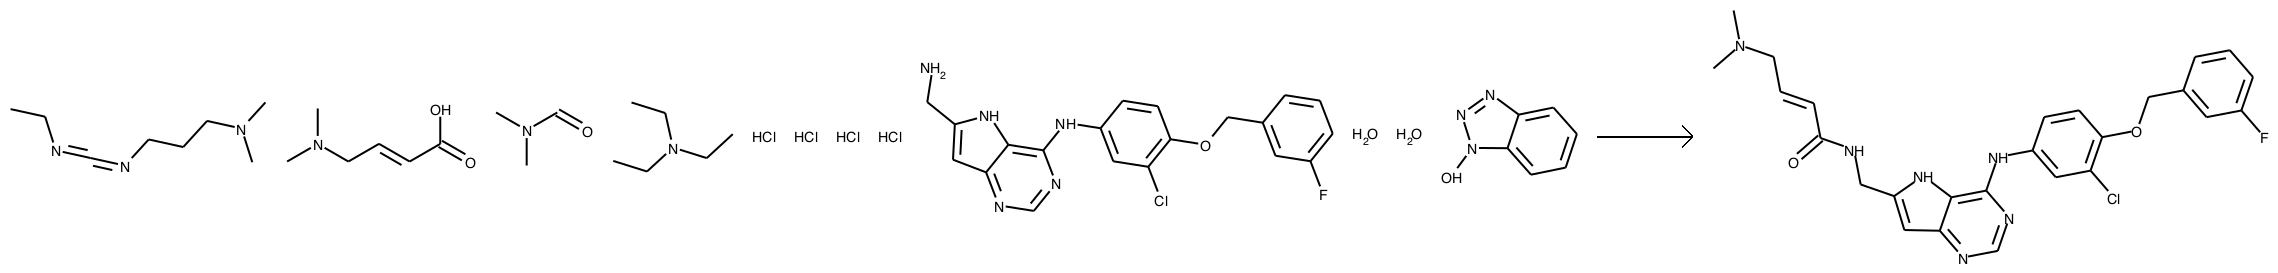

1
THIS IS TEST EXAMPLE 3 (1-indexed)
1
CCOC(C)=O.Nc1ccc(C23CC(C2)C(=O)N(Cc2ccccc2)C3=O)cc1.[O-].O
CC=O.O=C1C2CC(c3ccc([N+](=O)[O-])cc3)(C2)C(=O)N1Cc1ccccc1.CCO
CCOC(C)=O.O=C1NC(=O)C2(c3ccc([N+](=O)[O-])cc3)CC1C2.Cc1ccccc1
CC=O.CCOC(=O)C1CC(C(=O)NCc2ccccc2)(c2ccc([N+](=O)[O-])cc2)C1
CCOC(C)=O.O=C1N(Cc2ccccc2)C(O)C2CC1(c1ccc([N+](=O)[O-])cc1)C2
[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)[N:8]1[C:9](=[O:25])[C:10]2([c:16]3[cH:17][cH:18][c:19]([N+:22]([O-:23])=[O:24])[cH:20][cH:21]3)[CH2:11][CH:12]([C:13]1=[O:14])[CH2:15]2.[CH3:26][CH2:27][O:28][C:29](=[O:30])[CH3:31]>>[CH2:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)[N:8]1[C:9](=[O:25])[C:10]2([c:16]3[cH:17][cH:18][c:19]([NH2:22])[cH:20][cH:21]3)[CH2:11][CH:12]([C:13]1=[O:14])[CH2:15]2
Prediction 1:    22.0-23.0-0.0   with score 5.517630577087402
Prediction 2:    22.0-24.0-0.0   with score 4.808492660522461
Prediction 3:    1.0-8.0-0.0     with score -3.047368049621582
Prediction 4:    13.0-14.0-1.0   with score -3.8699402809143066
Predic

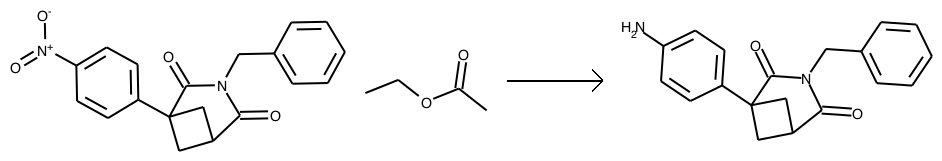

1
THIS IS TEST EXAMPLE 4 (1-indexed)
1
C.CCc1c(CN2CC(C(=O)O)C2)cccc1-c1nnc(-c2ccc(OC(C)C)c(Cl)c2)s1.Cl.O.CCO.[O-].C1CCOC1.[Na+]
C.CCc1c(CN2CC(C(=O)O)C2)cccc1-c1nnc(-c2ccc(OC(C)C)c(Cl)c2)s1.Cl.O.CCO.[O-].C1CCOC1.[Na+]
CO.CCc1c(CN2CC(C(=O)O)C2)cccc1-c1nnc(-c2ccc(OC(C)C)c(Cl)c2)s1.Cl.O.CCO.C1CCOC1.[Na+]
CO.[Na+].Cl.CCO.[O-].C1CCOC1.CCc1c(CN2CC(C(=O)O)C2)cccc1-c1nnc(-c2ccc(OC(C)C)c(Cl)c2)s1
C.CCc1c(CN2CC(C(=O)O)C2)cccc1-c1nnc(-c2ccc(OC(C)C)c(Cl)c2)s1.Cl.O.CCO.[O-].C1CCOC1.[Na+]
[CH3:42][CH2:43][OH:44].[Cl:1][c:2]1[cH:3][c:4](-[c:12]2[n:13][n:14][c:15](-[c:17]3[c:18]([CH2:32][CH3:33])[c:19]([CH2:23][N:24]4[CH2:25][CH:26]([C:28](=[O:29])[O:30][CH3:31])[CH2:27]4)[cH:20][cH:21][cH:22]3)[s:16]2)[cH:5][cH:6][c:7]1[O:8][CH:9]([CH3:10])[CH3:11].[ClH:36].[Na+:35].[O:37]1[CH2:38][CH2:39][CH2:40][CH2:41]1.[OH-:34].[OH2:45]>>[Cl:1][c:2]1[cH:3][c:4](-[c:12]2[n:13][n:14][c:15](-[c:17]3[c:18]([CH2:32][CH3:33])[c:19]([CH2:23][N:24]4[CH2:25][CH:26]([C:28](=[O:29])[OH:30])[CH2:27]4)[cH:20][cH:21][cH:22]3)[s

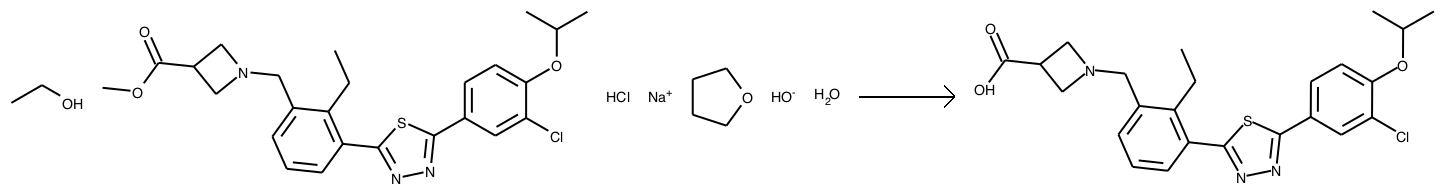

1
THIS IS TEST EXAMPLE 5 (1-indexed)
1
CCN(CC)CC.Cc1ccc(-c2cc(C(=O)NCc3cnc(C)cn3)cc(-c3snnc3C(C)C)c2)nc1.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.ClCCl
CCN(CC)CC.Cc1ccc(-c2cc(C(=O)NCc3cnc(C)cn3)cc(-c3snnc3C(C)C)c2)nc1.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.ClCCl
CCN(CC)CC.Cc1ccc(-c2cc(CNCc3cnc(C)cn3)cc(-c3snnc3C(C)C)c2)nc1.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.ClCCl
Cc1cnc(CN)cn1.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.ClCCl.CC[N+](CC)(CC)C(=O)c1cc(-c2ccc(C)cn2)cc(-c2snnc2C(C)C)c1
CCN(CC)CC.Cc1ccc(-c2cc(C(N)=O)cc(-c3snnc3C(C)C)c2)nc1.On1nnc2ccccc21.O.CCN=C=NCCCN(C)C.Cc1cnc(C)cn1.ClCCl
[CH2:55]([Cl:56])[Cl:57].[CH3:25][c:26]1[n:27][cH:28][c:29]([CH2:32][NH2:33])[n:30][cH:31]1.[CH3:34][CH2:35][N:36]=[C:37]=[N:38][CH2:39][CH2:40][CH2:41][N:42]([CH3:43])[CH3:44].[CH3:58][CH2:59][N:60]([CH2:61][CH3:62])[CH2:63][CH3:64].[CH:1]([CH3:2])([CH3:3])[c:4]1[n:5][n:6][s:7][c:8]1-[c:9]1[cH:10][c:11]([C:12](=[O:13])[OH:14])[cH:15][c:16](-[c:18]2[n:19][cH:20][c:21]([CH3:24])[cH:22][cH:23]2)[cH:17]1.[OH:45][n:46]1[c:47]2[c:48]([

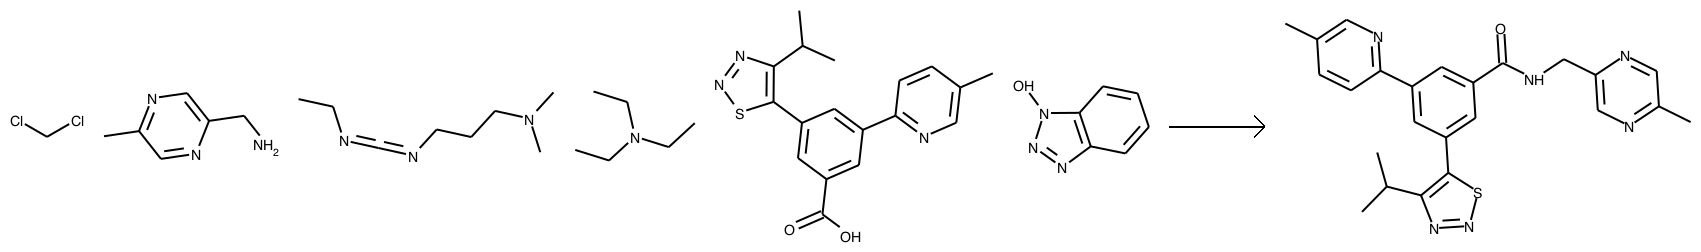

1
THIS IS TEST EXAMPLE 6 (1-indexed)
1
Cl.CCN(C(C)C)C(C)C.O.O=C(Cl)C(=O)Cl.COc1cc(CNC(=O)C=Cc2c(C#N)c3c(C)cc(C)nc3n2C2CCCc3ccccc32)ccc1O.CN(C)C=O.C1CCOC1
Cl.CCN(C(C)C)C(C)C.O.O=C(Cl)C(=O)Cl.COc1cc(CNC(=O)C=Cc2c(C#N)c3c(C)cc(C)nc3n2C2CCCc3ccccc32)ccc1O.CN(C)C=O.C1CCOC1
Cl.CCN(C(C)C)C(C)C.O.COc1cc(CNCC=Cc2c(C#N)c3c(C)cc(C)nc3n2C2CCCc3ccccc32)ccc1O.O=C(Cl)C(=O)Cl.CN(C)C=O.C1CCOC1
Cc1cc(C)c2c(C#N)c(C=CC(N)=O)n(C3CCCc4ccccc43)c2n1.Cl.COc1cc(C)ccc1O.CCN(C(C)C)C(C)C.O.O=C(Cl)C(=O)Cl.CN(C)C=O.C1CCOC1
COc1cc(CNC(C=Cc2c(C#N)c3c(C)cc(C)nc3n2C2CCCc3ccccc32)C(=O)Cl)ccc1O.Cl.O=CCl.CCN(C(C)C)C(C)C.O.CN(C)C=O.C1CCOC1
[C:1](#[N:2])[c:3]1[c:4]([CH:24]=[CH:25][C:26](=[O:27])[OH:28])[n:5]([CH:14]2[CH2:15][CH2:16][CH2:17][c:18]3[cH:19][cH:20][cH:21][cH:22][c:23]32)[c:6]2[n:7][c:8]([CH3:13])[cH:9][c:10]([CH3:12])[c:11]12.[C:29]([Cl:30])(=[O:31])[C:32]([Cl:33])=[O:34].[CH2:56]1[O:57][CH2:58][CH2:59][CH2:60]1.[CH:47]([N:48]([CH:49]([CH3:50])[CH3:51])[CH2:52][CH3:53])([CH3:54])[CH3:55].[ClH:35].[O:62]=[CH:63][

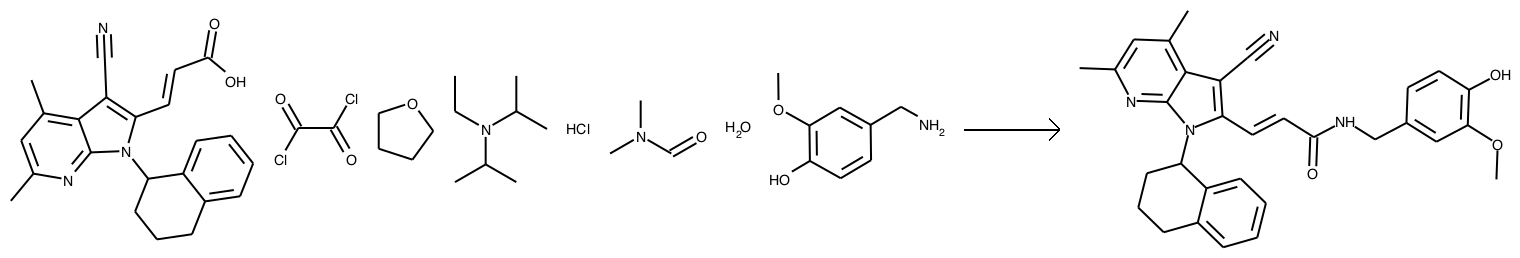

1
THIS IS TEST EXAMPLE 7 (1-indexed)
1
Cl.CCN1C(=O)CCCc2ccc(Nc3ncc(Cl)c(Nc4c(C)cccc4C(=O)NC)n3)cc21.CC(C)O
CCN1C(=O)CCCc2ccc(N)cc21.CNC(=O)c1cccc(C)c1Nc1ncncc1Cl.Cl.CC(C)O
CCN1C(=O)CCCc2ccc(N)cc21.C.Cc1cccc(C(N)=O)c1Nc1nc(Cl)ncc1Cl.CC(C)O
C=CN1C(=O)CCCc2ccc(N)cc21.CNC(=O)c1cccc(C)c1Nc1nc(Cl)ncc1Cl.CC(C)O
CCN1CCCCc2ccc(N)cc21.CNC(=O)c1cccc(C)c1Nc1nc(Cl)ncc1Cl.O.CC(C)O
[CH:36]([OH:37])([CH3:38])[CH3:39].[Cl:16][c:17]1[n:18][cH:19][c:20]([Cl:35])[c:21]([NH:23][c:24]2[c:25]([C:26](=[O:27])[NH:28][CH3:29])[cH:30][cH:31][cH:32][c:33]2[CH3:34])[n:22]1.[NH2:1][c:2]1[cH:3][c:4]2[c:5]([cH:14][cH:15]1)[CH2:6][CH2:7][CH2:8][C:9](=[O:13])[N:10]2[CH2:11][CH3:12]>>[NH:1]([c:2]1[cH:3][c:4]2[c:5]([cH:14][cH:15]1)[CH2:6][CH2:7][CH2:8][C:9](=[O:13])[N:10]2[CH2:11][CH3:12])[c:17]1[n:18][cH:19][c:20]([Cl:35])[c:21]([NH:23][c:24]2[c:25]([C:26](=[O:27])[NH:28][CH3:29])[cH:30][cH:31][cH:32][c:33]2[CH3:34])[n:22]1
Prediction 1:    16.0-17.0-0.0   with score 9.403352737426758
Prediction 2:    1.0-17.0-1.0    wi

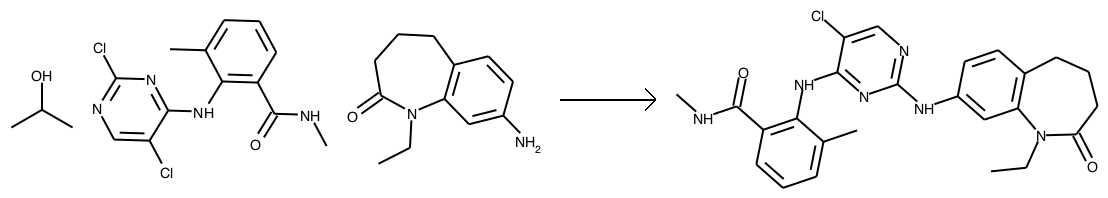

1
THIS IS TEST EXAMPLE 8 (1-indexed)
1
CO.COc1ccc(-n2c(C(=O)O)cc3ccccc32)cc1.Cl.[Li+].O.C1CCOC1
CO.Cl.[Li+].O.COc1ccc(-n2c(CO)cc3ccccc32)cc1.[O-].C1CCOC1
CO.COc1ccc(-n2c(C(=O)O)cc3ccccc32)cc1.Cl.[Li+].O.[O-].C1CCOC1
C.COc1ccc(-n2c(C(=O)O)cc3ccccc32)cc1.Cl.[Li+].O.[O-].C1CCOC1
C.COc1ccc(-n2c(C(=O)O)cc3ccccc32)cc1.Cl.[Li+].O.[O-].C1CCOC1
[CH2:26]1[O:27][CH2:28][CH2:29][CH2:30]1.[CH3:1][O:2][C:3](=[O:4])[c:5]1[n:6](-[c:14]2[cH:15][cH:16][c:17]([O:20][CH3:21])[cH:18][cH:19]2)[c:7]2[cH:8][cH:9][cH:10][cH:11][c:12]2[cH:13]1.[ClH:25].[Li+:24].[OH-:23].[OH2:22].[OH2:31]>>[O:2]=[C:3]([OH:4])[c:5]1[n:6](-[c:14]2[cH:15][cH:16][c:17]([O:20][CH3:21])[cH:18][cH:19]2)[c:7]2[cH:8][cH:9][cH:10][cH:11][c:12]2[cH:13]1
Prediction 1:    1.0-2.0-0.0     with score 0.838089644908905
Prediction 2:    3.0-4.0-1.0     with score 0.6380878686904907
Prediction 3:    2.0-3.0-2.0     with score -0.5718891024589539
Prediction 4:    2.0-3.0-0.0     with score -0.6409202218055725
Prediction 5:    3.0-4.0-0.0     with 

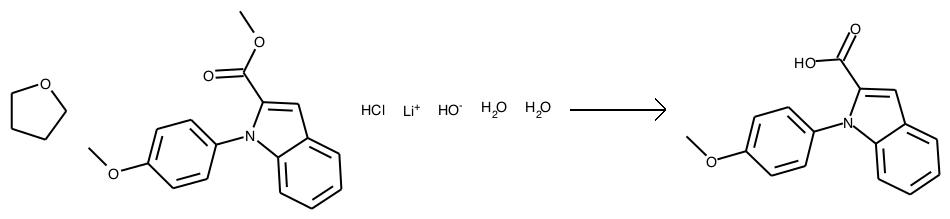

1
THIS IS TEST EXAMPLE 9 (1-indexed)
1
CCN(CC)CC.Cl.ClCCl.CC(=O)NCC1=NC2(CCN(C(=O)OC(C)(C)C)CC2)C(=O)N1
ClCCl.CCN(C)CC.CC(=O)N(C)CC1=NC2(CCN(C(=O)OC(C)(C)C)CC2)C(=O)N1.Cl
ClCCl.CCN(C)CC.CC(=O)N(C)CC1=NC2(CCN(C(=O)OC(C)(C)C)CC2)C(=O)N1.Cl
ClCCl.CCN(C)CC.CC(=O)N(C)CC1=NC2(CCN(C(=O)OC(C)(C)C)CC2)C(=O)N1.Cl
CCN(CC)CC.CC(C)(C)OC(=O)N1CCC2(CC1)N=C(CNC=O)NC2=O.C.ClCCl.Cl
[CH3:21][CH2:22][N:23]([CH2:24][CH3:25])[CH2:26][CH3:27].[CH3:28][C:29]([Cl:30])=[O:31].[Cl:32][CH2:33][Cl:34].[NH2:1][CH2:2][C:3]1=[N:4][C:5]2([C:6](=[O:8])[NH:7]1)[CH2:9][CH2:10][N:11]([C:14](=[O:15])[O:16][C:17]([CH3:18])([CH3:19])[CH3:20])[CH2:12][CH2:13]2>>[NH:1]([CH2:2][C:3]1=[N:4][C:5]2([C:6](=[O:8])[NH:7]1)[CH2:9][CH2:10][N:11]([C:14](=[O:15])[O:16][C:17]([CH3:18])([CH3:19])[CH3:20])[CH2:12][CH2:13]2)[C:29]([CH3:28])=[O:31]
Prediction 1:    29.0-30.0-0.0   with score 5.554765701293945
Prediction 2:    1.0-29.0-1.0    with score 4.3747453689575195
Prediction 3:    29.0-31.0-0.0   with score -4.225213527679443
Predictio

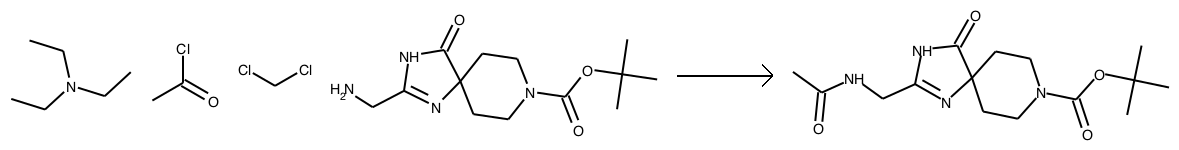

1
THIS IS TEST EXAMPLE 10 (1-indexed)
1
ClCCl.CCCNC(=O)c1ccccc1.Cl
NCCCC(=O)c1ccccc1.ClCCl.Cl
NC(=O)c1ccccc1.ClCCl.CCC.Cl
O=C(c1ccccc1)C(Cl)Cl.CCCN.Cl
CCCNC(O)(c1ccccc1)C(Cl)Cl.Cl
[C:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)(=[O:8])[Cl:9].[CH3:10][CH2:11][CH2:12][NH2:13].[Cl:14][CH2:15][Cl:16]>>[C:1]([c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1)(=[O:8])[NH:13][CH2:12][CH2:11][CH3:10]
Prediction 1:    1.0-9.0-0.0     with score 7.078006744384766
Prediction 2:    1.0-13.0-1.0    with score 5.39191198348999
Prediction 3:    1.0-12.0-1.0    with score -4.484865188598633
Prediction 4:    12.0-13.0-0.0   with score -4.719887733459473
Prediction 5:    1.0-10.0-1.0    with score -5.197171211242676
Prediction 6:    1.0-8.0-0.0     with score -5.714350700378418
Prediction 7:    1.0-13.0-2.0    with score -6.002617835998535
Prediction 8:    1.0-8.0-1.0     with score -6.466391563415527
Prediction 9:    1.0-2.0-0.0     with score -7.9444379806518555
Prediction 10:    2.0-10.0-1.0    with score -8.0706157

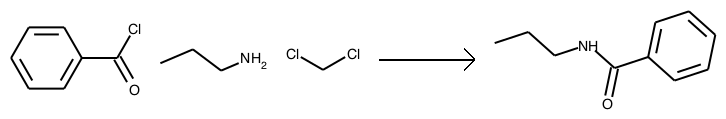

1
THIS IS TEST EXAMPLE 11 (1-indexed)
1
N#Cc1c(N2CCN(C(=O)c3ccco3)CC2)c2cc(F)cnc2[nH]c1=O.Cl
O=C(c1ccco1)N1CCNCC1.N#Cc1cc2cc(F)cnc2[nH]c1=O.Cl
CCN(CCNc1c(C#N)c(=O)[nH]c2ncc(F)cc12)C(=O)c1ccco1.Cl
CCN(CCNc1c(C#N)c(=O)[nH]c2ncc(F)cc12)C(=O)c1ccco1.Cl
N#Cc1c(N2CCN(C(=O)c3ccco3)C(Cl)C2)c2cc(F)cnc2[nH]c1=O
[Cl:1][c:2]1[c:3]([C:14]#[N:15])[c:4](=[O:13])[nH:5][c:6]2[n:7][cH:8][c:9]([F:12])[cH:10][c:11]12.[o:16]1[c:17]([C:21](=[O:22])[N:23]2[CH2:24][CH2:25][NH:26][CH2:27][CH2:28]2)[cH:18][cH:19][cH:20]1>>[c:2]1([N:26]2[CH2:25][CH2:24][N:23]([C:21]([c:17]3[o:16][cH:20][cH:19][cH:18]3)=[O:22])[CH2:28][CH2:27]2)[c:3]([C:14]#[N:15])[c:4](=[O:13])[nH:5][c:6]2[n:7][cH:8][c:9]([F:12])[cH:10][c:11]12
Prediction 1:    1.0-2.0-0.0     with score 8.47335147857666
Prediction 2:    2.0-26.0-1.0    with score 6.138103008270264
Prediction 3:    4.0-13.0-0.0    with score -3.8924243450164795
Prediction 4:    24.0-25.0-0.0   with score -5.560614585876465
Prediction 5:    27.0-28.0-0.0   with score -5.560615062

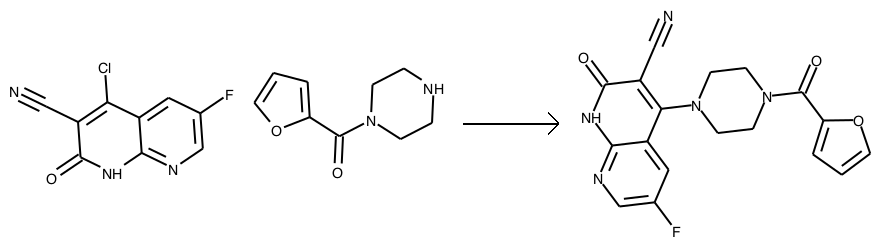

1
THIS IS TEST EXAMPLE 12 (1-indexed)
1
CCC(=O)N1CC(S(=O)(=O)c2ccccc2Cl)CC1C(=O)NCC#N.O.Cl
CCC(=O)N1CC(S(=O)(=O)c2ccccc2Cl)CC1C(=O)NCC#N.O.Cl
O.CCCN1CC(S(=O)(=O)c2ccccc2Cl)CC1C(=O)NCC#N.Cl
CC.CN1CC(S(=O)(=O)c2ccccc2Cl)CC1C(=O)NCC#N.O.Cl
CC1C(=O)[N+]12CC(S(=O)(=O)c1ccccc1Cl)CC2C(=O)NCC#N.O.Cl
[C:2](#[N:3])[CH2:4][NH:5][C:6](=[O:7])[CH:8]1[NH:9][CH2:10][CH:11]([S:13](=[O:14])(=[O:15])[c:16]2[c:17]([Cl:22])[cH:18][cH:19][cH:20][cH:21]2)[CH2:12]1.[CH3:23][CH2:24][C:25]([OH:26])=[O:27].[ClH:1]>>[C:2](#[N:3])[CH2:4][NH:5][C:6](=[O:7])[CH:8]1[N:9]([C:25]([CH2:24][CH3:23])=[O:26])[CH2:10][CH:11]([S:13](=[O:14])(=[O:15])[c:16]2[c:17]([Cl:22])[cH:18][cH:19][cH:20][cH:21]2)[CH2:12]1
Prediction 1:    9.0-25.0-1.0    with score 2.929738998413086
Prediction 2:    25.0-26.0-0.0   with score 0.12579840421676636
Prediction 3:    25.0-27.0-0.0   with score -0.5425367951393127
Prediction 4:    25.0-26.0-2.0   with score -1.0419241189956665
Prediction 5:    2.0-26.0-2.0    with score -4.994441986083984
Pr

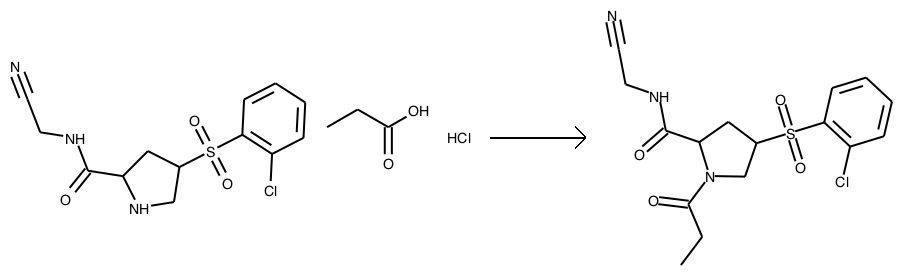

1
THIS IS TEST EXAMPLE 13 (1-indexed)
1
Cl.O.[K+].O=C([O-])O.COc1ccc(-c2cncc(C#N)c2Oc2ccc3[nH]ccc3c2)cc1OC.CC#N
Cl.O.[K+].COc1ccc(-c2cncc(C#N)c2Oc2ccc3[nH]ccc3c2)cc1OC.CC#N.[O-]C[O-]
Cl.O.[K+].O=C([O-])O.COc1ccc(-c2cncc(C#N)c2Oc2ccc3[nH]ccc3c2)cc1OC.CC#N
Cl.O.[K+].O=C([O-])O.COc1ccc(-c2cncc(C#N)c2Oc2ccc3[nH]ccc3c2)cc1OC.CC#N
Cl.O.[K+].O=C([O-])O.COc1ccc(-c2cncc(C#N)c2Oc2ccc3[nH]ccc3c2)cc1OC.CC#N
[CH3:36][C:37]#[N:38].[Cl:1][c:2]1[c:3](-[c:10]2[cH:11][c:12]([O:18][CH3:19])[c:13]([O:16][CH3:17])[cH:14][cH:15]2)[cH:4][n:5][cH:6][c:7]1[C:8]#[N:9].[K+:30].[K+:31].[O-:32][C:33]([O-:34])=[O:35].[OH2:39].[OH:20][c:21]1[cH:22][c:23]2[cH:24][cH:25][nH:26][c:27]2[cH:28][cH:29]1>>[c:2]1([O:20][c:21]2[cH:22][c:23]3[cH:24][cH:25][nH:26][c:27]3[cH:28][cH:29]2)[c:3](-[c:10]2[cH:11][c:12]([O:18][CH3:19])[c:13]([O:16][CH3:17])[cH:14][cH:15]2)[cH:4][n:5][cH:6][c:7]1[C:8]#[N:9]
Prediction 1:    1.0-2.0-0.0     with score 11.827730178833008
Prediction 2:    2.0-20.0-1.0    with score 8.257052421569824
Pred

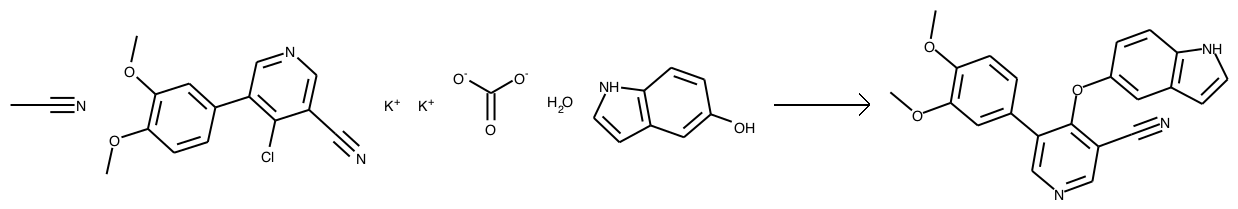

1
THIS IS TEST EXAMPLE 14 (1-indexed)
1
CC(C)=O.CN(C)C=O.CCOC(=O)CCCOc1cccc(CCCCCCOc2cc(I)cc(S(C)(=O)=O)c2)c1CCC(=O)OCC.O.[K+].O=C([O-])O.[Br-]
CC(C)=O.[Br-].O=C([O-])O.O.[K+].CCCCCc1cccc(OCCCC(=O)OCC)c1CCC(=O)OCC.COc1cc(I)cc(S(C)(=O)=O)c1.CN(C)C=O
CC(C)=O.[O-].O.CCOC(=O)CCCOc1cccc(CCCCCCBr)c1CCC(=O)OCC.CS(=O)(=O)c1cc(O)cc(I)c1.[K+].O=C[O-].CN(C)C=O
CC(C)=O.CCCCCCc1cccc(OCCCC(=O)OCC)c1CCC(=O)OCC.CN(C)C=O.O.CS(=O)(=O)c1cc(O)cc(I)c1.[K+].O=C([O-])O.[Br-]
CC(C)=O.O.[K+].O=C([O-])O.CCOC(=O)CCc1c(CCCCCCBr)cccc1OC(CCC(=O)OCC)Oc1cc(I)cc(S(C)(=O)=O)c1.CN(C)C=O
[C:42](=[O:43])([O-:44])[O-:45].[CH2:1]([CH3:2])[O:3][C:4]([CH2:5][CH2:6][CH2:7][O:8][c:9]1[c:10]([CH2:22][CH2:23][C:24](=[O:25])[O:26][CH2:27][CH3:28])[c:11]([CH2:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][Br:21])[cH:12][cH:13][cH:14]1)=[O:29].[CH3:48][N:49]([CH3:50])[CH:51]=[O:52].[CH3:54][C:55](=[O:56])[CH3:57].[I:30][c:31]1[cH:32][c:33]([OH:41])[cH:34][c:35]([S:37](=[O:38])(=[O:39])[CH3:40])[cH:36]1.[K+:46].[K+:47].[OH2:53]>>[CH2:1]

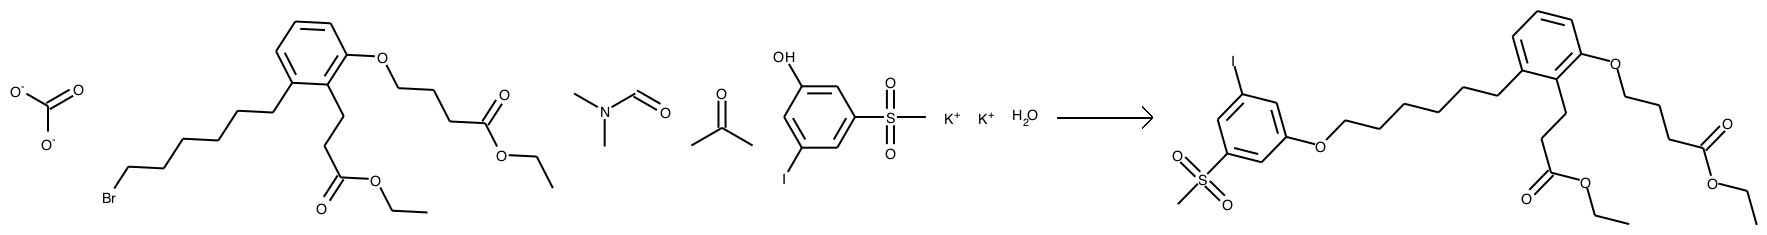

1
THIS IS TEST EXAMPLE 15 (1-indexed)
2
COc1cc(C(=O)NCCN(C)C)ccc1OCCCCCOc1ccc(C#N)cc1.CC(C)NC(C)C.ClCCl.O
COc1cc(C(=O)NCCN(C)C)ccc1OCCCCCOc1ccc(C#N)cc1.CC(C)NC(C)C.ClCCl.O
CN(C)CCN.ClCCl.O.COc1cc(C(=O)N(C(C)C)C(C)C)ccc1OCCCCCOc1ccc(C#N)cc1
COc1cc(CNCCN(C)C)ccc1OCCCCCOc1ccc(C#N)cc1.CC(C)NC(C)C.ClCCl.O
COc1cc2ccc1OCCC(CCOc1ccc(C#N)cc1)N(CCN(C)C)C2=O.CC(C)NC(C)C.ClCCl.O
[C:14](#[N:15])[c:16]1[cH:17][cH:18][c:19]([O:20][CH2:21][CH2:22][CH2:23][CH2:24][CH2:25][O:26][c:27]2[c:28]([O:36][CH3:37])[cH:29][c:30]([C:31](=[O:32])[OH:33])[cH:34][cH:35]2)[cH:38][cH:39]1.[CH3:8][N:9]([CH3:10])[CH2:11][CH2:12][NH2:13].[CH:1]([CH3:2])([CH3:3])[NH:4][CH:5]([CH3:6])[CH3:7].[Cl:41][CH2:42][Cl:43].[OH2:40]>>[CH:1]([CH3:2])([CH3:3])[N:4]([CH:5]([CH3:6])[CH3:7])[C:31]([c:30]1[cH:29][c:28]([O:36][CH3:37])[c:27]([O:26][CH2:25][CH2:24][CH2:23][CH2:22][CH2:21][O:20][c:19]2[cH:18][cH:17][c:16]([C:14]#[N:15])[cH:39][cH:38]2)[cH:35][cH:34]1)=[O:32]
Prediction 1:    13.0-31.0-1.0   with score 4.488963603973389
Predi

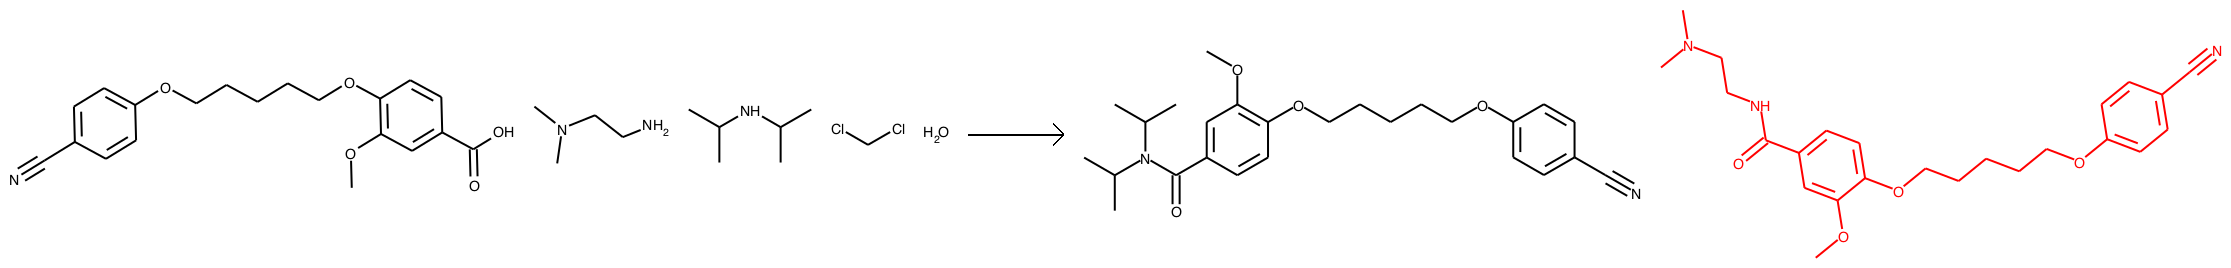

0
THIS IS TEST EXAMPLE 16 (1-indexed)
1
O.CNS(=O)(=O)c1ccc(Cl)c(C(=O)N2CCN(c3ccc(C(C)=O)cc3F)CC2)c1
O.CNS(=O)(=O)c1ccc(Cl)c(C(=O)N2CCN(c3ccc(C(C)=O)cc3F)CC2)c1
CNS(=O)(=O)c1ccc(Cl)c(C(=O)C2CN(c3ccc(C(C)=O)cc3F)CCN2)c1.O
CNS(=O)(=O)c1ccc(Cl)c(C(=O)C2CN(c3ccc(C(C)=O)cc3F)CCN2)c1.O
CNS(=O)(=O)c1ccc(N2CCN(c3ccc(C(C)=O)cc3F)CC2)c(C(=O)O)c1.Cl
[Cl:17][c:18]1[c:19]([C:20](=[O:21])[OH:22])[cH:23][c:24]([S:27]([NH:28][CH3:29])(=[O:30])=[O:31])[cH:25][cH:26]1.[F:1][c:2]1[cH:3][c:4]([C:14]([CH3:15])=[O:16])[cH:5][cH:6][c:7]1[N:8]1[CH2:9][CH2:10][NH:11][CH2:12][CH2:13]1>>[F:1][c:2]1[cH:3][c:4]([C:14]([CH3:15])=[O:16])[cH:5][cH:6][c:7]1[N:8]1[CH2:9][CH2:10][N:11]([C:20]([c:19]2[c:18]([Cl:17])[cH:26][cH:25][c:24]([S:27]([NH:28][CH3:29])(=[O:30])=[O:31])[cH:23]2)=[O:21])[CH2:12][CH2:13]1
Prediction 1:    11.0-20.0-1.0   with score 1.69024658203125
Prediction 2:    20.0-21.0-0.0   with score 0.7926706671714783
Prediction 3:    20.0-22.0-2.0   with score 0.06627291440963745
Prediction 4:    11.0-18.0-1

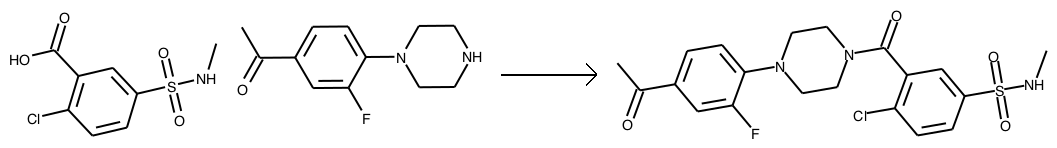

1
THIS IS TEST EXAMPLE 17 (1-indexed)
1
CC(C)(Oc1ccc(S(C)(=O)=O)cc1C(=O)N1CCN(c2ncc(CC(F)(F)F)s2)CC1)C(F)(F)F.O.Cl
CC(C)(Oc1ccc(S(C)(=O)=O)cc1C(=O)N1CCN(c2ncc(CC(F)(F)F)s2)CC1)C(F)(F)F.O.Cl
O.CC(C)(Oc1ccc(S(C)(=O)=O)cc1CN1CCN(c2ncc(CC(F)(F)F)s2)CC1)C(F)(F)F.Cl
Cl.O.CC(C)(Oc1ccc(S(C)(=O)=O)cc1C(=O)C1CN(c2ncc(CC(F)(F)F)s2)CCN1)C(F)(F)F
Cl.O.CC(C)(Oc1ccc(S(C)(=O)=O)cc1C(=O)C1CN(c2ncc(CC(F)(F)F)s2)CCN1)C(F)(F)F
[CH3:1][S:2](=[O:3])(=[O:4])[c:5]1[cH:6][cH:7][c:8]([O:14][C:15]([C:16]([F:17])([F:18])[F:19])([CH3:20])[CH3:21])[c:9]([C:10](=[O:11])[OH:12])[cH:13]1.[ClH:22].[F:23][C:24]([CH2:25][c:26]1[cH:27][n:28][c:29]([N:31]2[CH2:32][CH2:33][NH:34][CH2:35][CH2:36]2)[s:30]1)([F:37])[F:38]>>[CH3:1][S:2](=[O:3])(=[O:4])[c:5]1[cH:6][cH:7][c:8]([O:14][C:15]([C:16]([F:17])([F:18])[F:19])([CH3:20])[CH3:21])[c:9]([C:10](=[O:12])[N:34]2[CH2:33][CH2:32][N:31]([c:29]3[n:28][cH:27][c:26]([CH2:25][C:24]([F:23])([F:37])[F:38])[s:30]3)[CH2:36][CH2:35]2)[cH:13]1
Prediction 1:    10.0-34.0-1.0   with score 6.

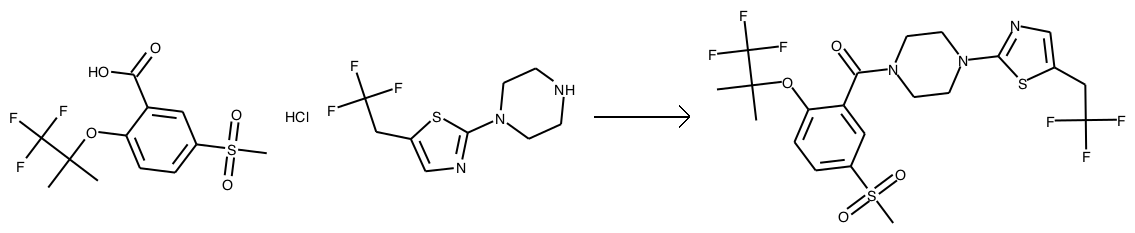

1
THIS IS TEST EXAMPLE 18 (1-indexed)
1
OBO.[F-].CCOC(C)=O.CC(=O)OCC1OC(n2cc(Cc3ccc(-c4cccs4)s3)c3c(C)cccc32)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O.[Pd].[Cs+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.COCCOC.[Br-]
[F-].CCOC(C)=O.[Pd].CC(=O)OCC1OC(n2cc(Cc3cccs3)c3c(C)cccc32)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O.OB(O)c1cccs1.[Cs+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.COCCOC.[Br-]
[F-].CCOC(C)=O.[Pd].OB(O)c1cccs1.CC(=O)OCC1OC(n2c3c(c4c(C)cccc42)Cc2ccc-3s2)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O.[Cs+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.COCCOC.[Br-]
[F-].CC(=O)OCC1OC(n2cc(Cc3ccc(-c4ccc(B(O)O)s4)s3)c3c(C)cccc32)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O.CCOC(C)=O.[Pd].[Cs+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.COCCOC.[Br-]
[F-].OBO.CCOC(C)=O.[Pd].[Cs+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.COCCOC.CC(=O)OCC1OC(n2c(-c3cccs3)c(Cc3ccc(Br)s3)c3c(C)cccc32)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O
[Br:1][c:2]1[cH:3][cH:4][c:5]([CH2:7][c:8]2[cH:9][n:10]([CH:18]3[CH:19]([O:20][C:21]([CH3:22])=[O:23])[CH:24]([O:25][C:26]([CH3:27])=[O:28])[CH:29]([O:30][C:31]([CH3:32])=[O:33])[CH:34]([CH2:36

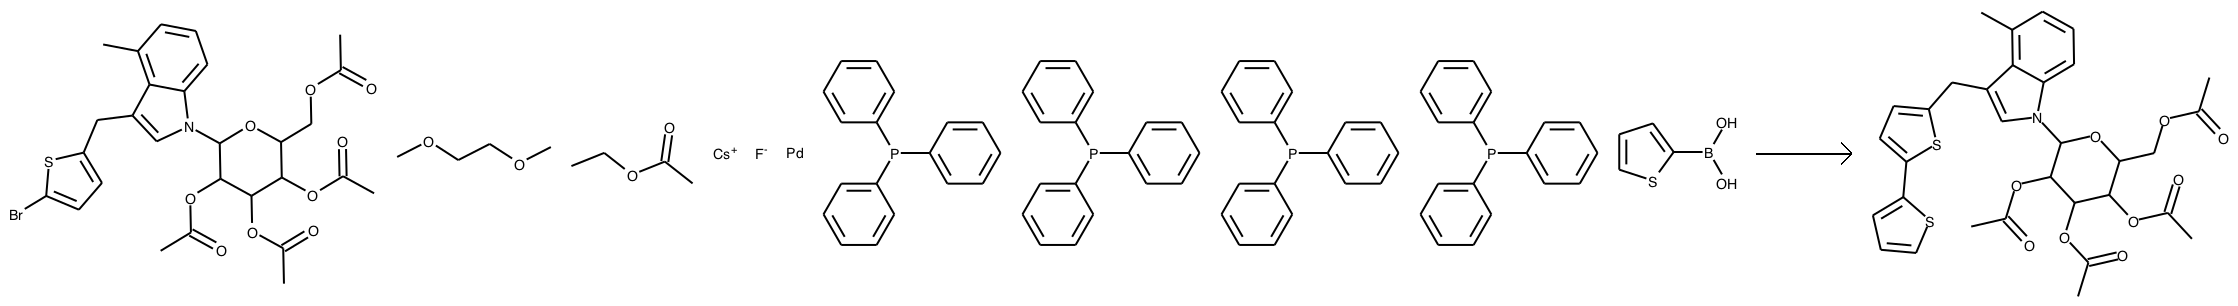

1
THIS IS TEST EXAMPLE 19 (1-indexed)
1
CCOC(C)=O.c1ccncc1.O.Cn1c(C#N)ccc1-c1cc(F)c(NS(C)(=O)=O)cc1F.Cl
CCOC(C)=O.c1ccncc1.Cl.Cn1c(C#N)ccc1-c1cc(F)c(O)cc1F.CS(N)(=O)=O
Cn1c(C#N)ccc1-c1cc(F)c(O)cc1F.CCOC(C)=O.Cl.O.c1ccncc1.CS(N)=O
Cn1c(C#N)ccc1-c1cc(F)c(O)cc1F.CCOC(C)=O.Cl.O.c1ccncc1.CS(N)=O
Cn1c(C#N)ccc1-c1cc(F)ccc1F.Cl.CCOC(C)=O.O.c1ccncc1.CS(N)(=O)=O
[CH3:18][S:19]([Cl:20])(=[O:21])=[O:22].[CH3:30][CH2:31][O:32][C:33](=[O:34])[CH3:35].[NH2:1][c:2]1[cH:3][c:4]([F:17])[c:5](-[c:9]2[cH:10][cH:11][c:12]([C:15]#[N:16])[n:13]2[CH3:14])[cH:6][c:7]1[F:8].[OH2:23].[cH:24]1[cH:25][cH:26][n:27][cH:28][cH:29]1>>[NH:1]([c:2]1[cH:3][c:4]([F:17])[c:5](-[c:9]2[cH:10][cH:11][c:12]([C:15]#[N:16])[n:13]2[CH3:14])[cH:6][c:7]1[F:8])[S:19]([CH3:18])(=[O:21])=[O:22]
Prediction 1:    1.0-19.0-1.0    with score 6.210590839385986
Prediction 2:    19.0-20.0-0.0   with score 5.775463581085205
Prediction 3:    32.0-33.0-0.0   with score -4.812319755554199
Prediction 4:    15.0-16.0-0.0   with score -5.5410461425

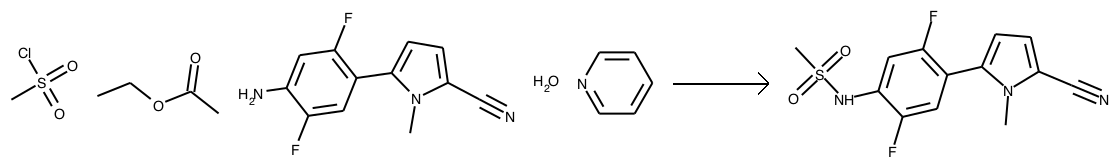

1
THIS IS TEST EXAMPLE 20 (1-indexed)
1
OBO.[Br-].COc1cccc(-c2cccc(-c3cccc(-c4ccc(C)c(C)c4O)n3)n2)c1O
OBO.COc1cccc(-c2cccc(-c3cccc(Br)n3)n2)c1Oc1ccc(C)c(C)c1O
COc1cccc(-c2cccc(-c3ccccn3)n2)c1O.Cc1c(Br)cc(B(O)O)c(O)c1C
[Br-].COc1cccc(-c2cccc(-c3cccc(Oc4c(B(O)O)ccc(C)c4C)n3)n2)c1O
COc1cccc(-c2cccc(-c3ccccn3)n2)c1O.[Br-].Cc1ccc(B(O)O)c(O)c1C
[Br:1][c:2]1[cH:3][cH:4][cH:5][c:6](-[c:8]2[n:9][c:10](-[c:14]3[c:15]([OH:22])[c:16]([O:20][CH3:21])[cH:17][cH:18][cH:19]3)[cH:11][cH:12][cH:13]2)[n:7]1.[CH3:23][c:24]1[c:25]([OH:34])[c:26]([B:31]([OH:32])[OH:33])[cH:27][cH:28][c:29]1[CH3:30]>>[c:2]1(-[c:26]2[c:25]([OH:34])[c:24]([CH3:23])[c:29]([CH3:30])[cH:28][cH:27]2)[cH:3][cH:4][cH:5][c:6](-[c:8]2[n:9][c:10](-[c:14]3[c:15]([OH:22])[c:16]([O:20][CH3:21])[cH:17][cH:18][cH:19]3)[cH:11][cH:12][cH:13]2)[n:7]1
Prediction 1:    26.0-31.0-0.0   with score 3.003309488296509
Prediction 2:    1.0-2.0-0.0     with score 2.8366658687591553
Prediction 3:    2.0-26.0-1.0    with score 2.5985658168792725
Predicti

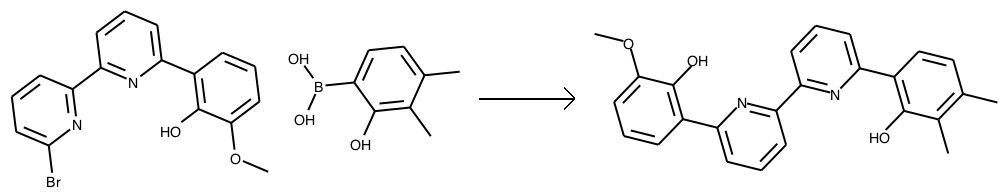

1
THIS IS TEST EXAMPLE 21 (1-indexed)
6
CO.[Na+].CC(Cc1ccccc1)C(=O)O.O.[Cl-].CCC=O.CC(=O)O
CO.[Na+].[Cl-].O.CC(C=O)=C([O-])C(C)Cc1ccccc1.CC(=O)O
CO.[Na+].O.[Cl-].CC(=O)O.CC(C=O)C([O-])C(C)Cc1ccccc1
CO.[Na+].O.CC(C[O-])Cc1ccccc1.[Cl-].CCC=O.CC(=O)O
CO.[Na+].O.C=O.[Cl-].CC(=O)O.CCC([O-])C(C)Cc1ccccc1
[CH3:21][C:22](=[O:23])[OH:24].[CH3:25][OH:26].[CH3:3][CH:4]([CH:5]=[O:6])[CH2:7][c:8]1[cH:9][cH:10][cH:11][cH:12][cH:13]1.[CH:14]([CH2:15][CH3:16])=[O:17].[Cl-:19].[Na+:18].[Na+:2].[OH-:1].[OH2:20]>>[CH3:3][CH:4]([CH:5]=[C:15]([CH:14]=[O:17])[CH3:16])[CH2:7][c:8]1[cH:9][cH:10][cH:11][cH:12][cH:13]1
Prediction 1:    5.0-15.0-2.0    with score 0.7875854969024658
Prediction 2:    5.0-6.0-0.0     with score -0.31082338094711304
Prediction 3:    5.0-6.0-1.0     with score -1.43190598487854
Prediction 4:    5.0-15.0-1.0    with score -1.6797294616699219
Prediction 5:    14.0-17.0-0.0   with score -2.4052817821502686
Prediction 6:    4.0-5.0-2.0     with score -3.9493415355682373
Prediction 7:    

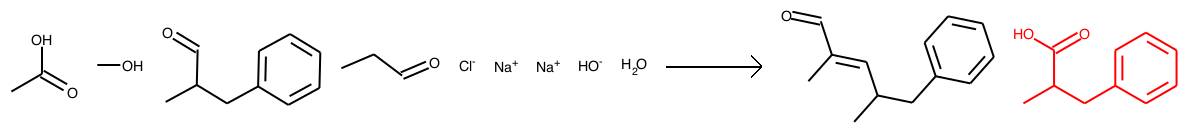

0
THIS IS TEST EXAMPLE 22 (1-indexed)
1
O=C(Nc1ccc(Cl)cn1)c1ccccc1NC(=O)C1CCN(Cc2ccc(Cl)cc2)CC1.O=C(O)C(F)(F)F.O
O=C1Nc2ncc(Cl)cc2C(c2ccc(Cl)cc2)N2CCC(CC2)C(=O)Nc2ccccc21.O=C(O)C(F)(F)F.O
O=C(O)C(F)(F)F.O=C(Nc1ccc(Cl)cn1)c1cccc2c1NC(=O)C1CCN(CC1)C2c1ccc(Cl)cc1.O
O=C(O)C(F)(F)F.Clc1ccccc1.CN1CCC(C(=O)Nc2ccccc2C(=O)Nc2ccc(Cl)cn2)CC1.O
O=C(O)C(F)(F)F.O=C(Nc1ccc(Cl)cn1)c1cc2ccc1NC(=O)C1CCN(CC1)C2c1ccc(Cl)cc1.O
[Cl:33][c:34]1[cH:35][cH:36][c:37]([CH:38]=[O:39])[cH:40][cH:41]1.[Cl:8][c:9]1[cH:10][cH:11][c:12]([NH:15][C:16]([c:17]2[c:18]([NH:23][C:24](=[O:25])[CH:26]3[CH2:27][CH2:28][NH:29][CH2:30][CH2:31]3)[cH:19][cH:20][cH:21][cH:22]2)=[O:32])[n:13][cH:14]1.[F:1][C:2]([F:3])([F:4])[C:5]([OH:6])=[O:7]>>[Cl:8][c:9]1[cH:10][cH:11][c:12]([NH:15][C:16]([c:17]2[c:18]([NH:23][C:24](=[O:25])[CH:26]3[CH2:27][CH2:28][N:29]([CH2:38][c:37]4[cH:36][cH:35][c:34]([Cl:33])[cH:41][cH:40]4)[CH2:30][CH2:31]3)[cH:19][cH:20][cH:21][cH:22]2)=[O:32])[n:13][cH:14]1
Prediction 1:    29.0-38.0-1.0   with score 5.819

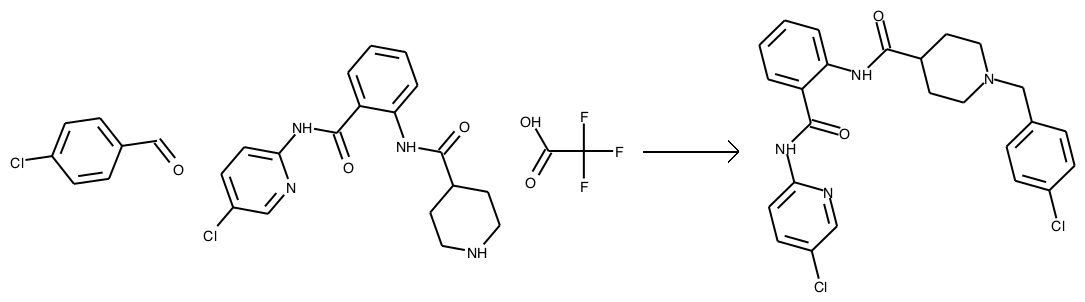

1
THIS IS TEST EXAMPLE 23 (1-indexed)
2
[Na+].CC(Cl)Cl.O=S(=O)([O-])[O-].[B-]C#[N+]C(CC)(CC)NC(CCC)C(=O)Nc1ncc(C(C)CCCC(C)(C)O)s1.O.CC(=O)O
CCCC(NC(CC)CC)C(=O)Nc1ncc(C(C)CCCC(C)(C)O)s1.[B-]C#N.[Na+].CC(Cl)Cl.O=S(=O)([O-])[O-].O.CC(=O)O
[Na+].CC.CC(Cl)Cl.O=S(=O)([O-])[O-].O.[B-]C#[N+]C(CC)NC(CCC)C(=O)Nc1ncc(C(C)CCCC(C)(C)O)s1.CC(=O)O
[Na+].CC.CC(Cl)Cl.O=S(=O)([O-])[O-].O.[B-]C#[N+]C(CC)NC(CCC)C(=O)Nc1ncc(C(C)CCCC(C)(C)O)s1.CC(=O)O
[B-]C#N.[Na+].CC(Cl)Cl.O=S(=O)([O-])[O-].O.CCCC1NC(CC)(CC)OC(C)(C)CCCC(C)c2cnc(s2)NC1=O.CC(=O)O
[C:41]([BH3-:42])#[N:43].[CH3:23][CH2:24][C:25]([CH2:26][CH3:27])=[O:28].[CH3:30][C:31](=[O:32])[O-:33].[CH3:49][C:50](=[O:51])[OH:52].[Cl:45][CH:46]([Cl:47])[CH3:48].[Na+:29].[Na+:34].[Na+:35].[Na+:44].[O-:36][S:37](=[O:38])(=[O:39])[O-:40].[OH:1][C:2]([CH2:3][CH2:4][CH2:5][CH:6]([CH3:7])[c:8]1[cH:9][n:10][c:11]([NH:13][C:14]([CH:15]([CH2:16][CH2:17][CH3:18])[NH2:19])=[O:20])[s:12]1)([CH3:21])[CH3:22]>>[OH:1][C:2]([CH2:3][CH2:4][CH2:5][CH:6]([CH3:7])[c:8]1[cH:9][n:

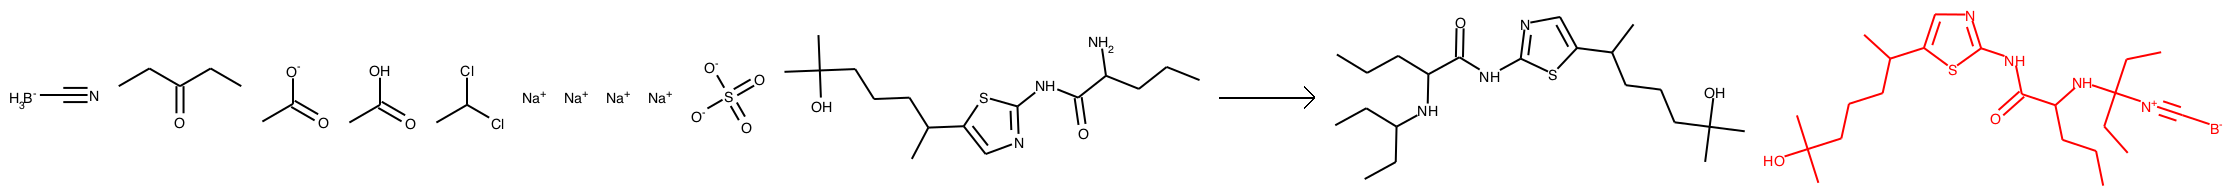

0
THIS IS TEST EXAMPLE 24 (1-indexed)
1
O=C1CCN(c2cccc(C(F)(F)F)c2)CCN1CCCN1CCC(O)(c2ccccc2)CC1.B.CC(=O)O.O.c1ccncc1
B.O=C1CCN(c2cccc(C(F)(F)F)c2)CCN1CC=CN1CCC(O)(c2ccccc2)CC1.CC(=O)O.O.c1ccncc1
B.c1ccncc1.CC(=O)O.O.O=C1CCN(c2cccc(C(F)(F)F)c2)CCN1CCC1OC2(c3ccccc3)CCN1CC2
CC(=O)[N+]1(CCCN2CCN(c3cccc(C(F)(F)F)c3)CCC2=O)CCC(O)(c2ccccc2)CC1.B.O.c1ccncc1
B.c1ccncc1.CC(=O)O.O=C1CCN(c2cccc(C(F)(F)F)c2)CCN1CCC(=O)N1CCC(O)(c2ccccc2)CC1
[BH3:36].[C:43]([OH:44])(=[O:45])[CH3:46].[O:1]=[C:2]1[CH2:3][CH2:4][N:5]([c:13]2[cH:14][c:15]([C:19]([F:20])([F:21])[F:22])[cH:16][cH:17][cH:18]2)[CH2:6][CH2:7][N:8]1[CH2:9][CH2:10][CH:11]=[O:12].[c:23]1([C:29]2([OH:35])[CH2:30][CH2:31][NH:32][CH2:33][CH2:34]2)[cH:24][cH:25][cH:26][cH:27][cH:28]1.[n:37]1[cH:38][cH:39][cH:40][cH:41][cH:42]1>>[O:1]=[C:2]1[CH2:3][CH2:4][N:5]([c:13]2[cH:14][c:15]([C:19]([F:20])([F:21])[F:22])[cH:16][cH:17][cH:18]2)[CH2:6][CH2:7][N:8]1[CH2:9][CH2:10][CH2:11][N:32]1[CH2:31][CH2:30][C:29]([c:23]2[cH:24][cH:25][cH:26][cH:27][cH:28]2)([O

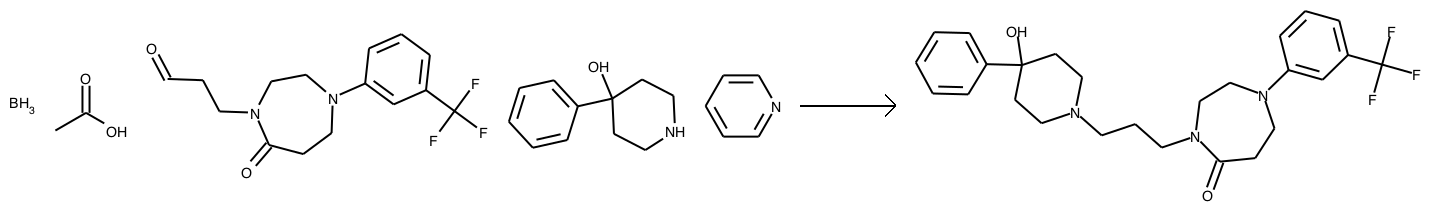

1
THIS IS TEST EXAMPLE 25 (1-indexed)
1
CCN(CC)CC.COC(C)CC(=O)NC1CCc2cc(C(C=C(c3cc(Cl)cc(Cl)c3)C(F)(F)F)=NOC(C)=O)ccc21.C1CCOC1.Cl
CCN(CC)CC.Cl.C1CCOC1.COC(C)CC(=O)NC1CCc2cc(C(C=C(c3cc(Cl)cc(Cl)c3)C(F)(F)F)=NOC(C)O)ccc21
CCN(CC)CC.COC(C)CC(=O)N(C(C)=O)C1CCc2cc(C(C=C(c3cc(Cl)cc(Cl)c3)C(F)(F)F)=NO)ccc21.C1CCOC1.Cl
CCN(CC)CC.COC(C)CC(=O)NC1CCc2cc(C(C=C(c3cc(Cl)cc(Cl)c3)C(F)(F)F)=[N+]([O-])C(C)=O)ccc21.C1CCOC1.Cl
CCN(CC)CC.O=C1CO1.COC(C)CC(=O)NC1CCc2cc(C(=N)C=C(c3cc(Cl)cc(Cl)c3)C(F)(F)F)ccc21.C1CCOC1.Cl
[CH3:35][CH2:36][N:37]([CH2:38][CH3:39])[CH2:40][CH3:41].[CH3:42][C:43]([Cl:44])=[O:45].[Cl:1][c:2]1[cH:3][c:4]([C:9](=[CH:10][C:11](=[N:12][OH:13])[c:14]2[cH:15][c:16]3[c:20]([cH:21][cH:22]2)[CH:19]([NH:23][C:24]([CH2:25][CH:26]([CH3:27])[O:28][CH3:29])=[O:30])[CH2:18][CH2:17]3)[C:31]([F:32])([F:33])[F:34])[cH:5][c:6]([Cl:8])[cH:7]1.[O:46]1[CH2:47][CH2:48][CH2:49][CH2:50]1>>[Cl:1][c:2]1[cH:3][c:4]([C:9](=[CH:10][C:11](=[N:12][O:13][C:43]([CH3:42])=[O:45])[c:14]2[cH:15][c:16]3[c:20]([cH:21]

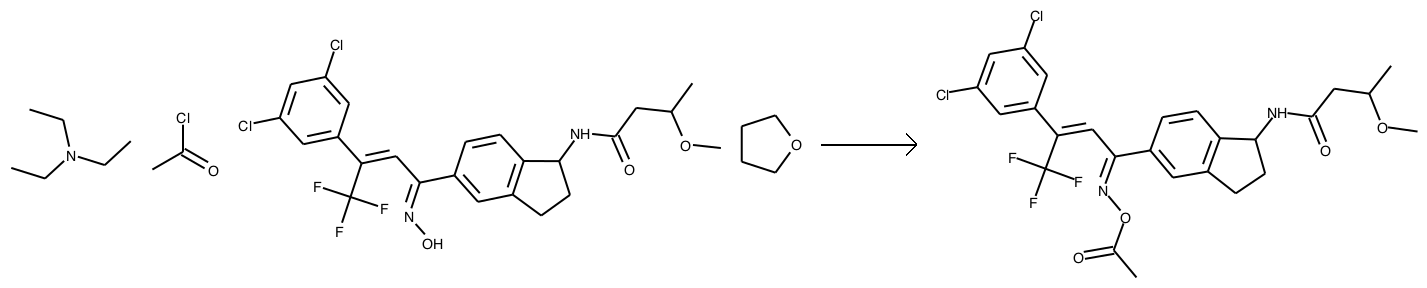

1
THIS IS TEST EXAMPLE 26 (1-indexed)
1
[B-]C#N.COC(=O)CCc1nc(-c2ccc(S(=O)(=O)N3CCC(CNCC(O)c4ccc(O)c(NS(C)(=O)=O)c4)CC3)cc2)no1.CC(=O)O.O.[Na+]
COC(=O)CCc1nc(-c2ccc(S(=O)(=O)N3CCC(C4NCC(c5ccc(O)c(NS(C)(=O)=O)c5)O4)CC3)cc2)no1.[B-]C#N.CC(=O)O.O.[Na+]
[B-]C#N.CS(=O)(=O)Nc1cc(C(O)CN2CC3CCN(CC3)S(=O)(=O)c3ccc(cc3)-c3noc(n3)CCC2=O)ccc1O.[Na+].O.CC(=O)O.CO
[B-]C#N.[Na+].CC(O)c1ccc(O)c(NS(C)(=O)=O)c1.O.CC(=O)O.COC(=O)CCc1nc(-c2ccc(S(=O)(=O)N3CCC(CN)CC3)cc2)no1
[B-]C#N.[Na+].O.CC(=O)O.CNCC(O)c1ccc(O)c(NS(C)(=O)=O)c1.COC(=O)CCc1nc(-c2ccc(S(=O)(=O)N3CCCCC3)cc2)no1
[C:49]([BH3-:50])#[N:51].[CH3:17][O:18][C:19]([CH2:20][CH2:21][c:22]1[n:23][c:24](-[c:27]2[cH:28][cH:29][c:30]([S:33](=[O:34])(=[O:35])[N:36]3[CH2:37][CH2:38][CH:39]([CH:42]=[O:43])[CH2:40][CH2:41]3)[cH:31][cH:32]2)[n:25][o:26]1)=[O:44].[CH3:45][C:46](=[O:47])[OH:48].[NH2:1][CH2:2][CH:3]([OH:4])[c:5]1[cH:6][cH:7][c:8]([OH:16])[c:9]([NH:11][S:12](=[O:13])(=[O:14])[CH3:15])[cH:10]1.[Na+:52]>>[NH:1]([CH2:2][CH:3]([OH:4])[c:5]1[cH:6][cH:7]

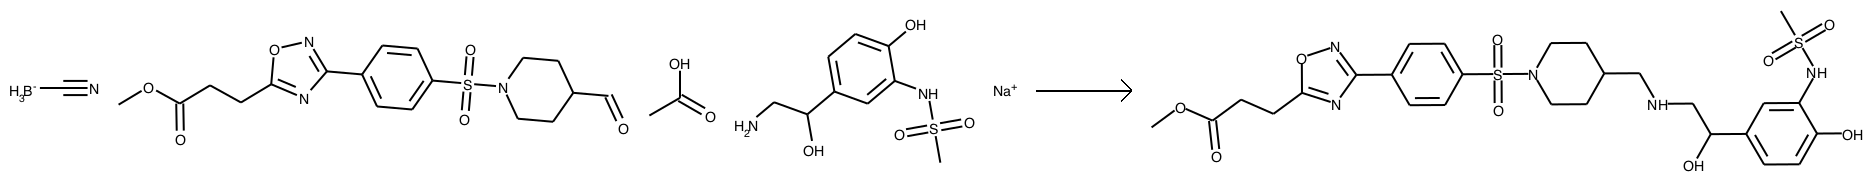

1
THIS IS TEST EXAMPLE 27 (1-indexed)
1
ClCCl.Cc1cc(F)c(NC(=O)NC2CCN(C(=O)OC(C)(C)C)CC2)c(I)c1
ClCCl.Cc1cc(F)cc(I)c1.CC(C)(C)OC(=O)N1CCC(NC(N)=O)CC1
Cc1cc(F)c(N=CNC2CCN(C(=O)OC(C)(C)C)CC2)c(I)c1.ClCCl.O
Cc1cc(F)c(NC(=O)[N+]2(C(=O)OC(C)(C)C)CCC(N)CC2)c(I)c1.ClCCl
CC(C)(C)OC(=O)N1CCCCC1.Cc1cc(F)c(NC(N)=O)c(I)c1.ClCCl
[Cl:27][CH2:28][Cl:29].[F:1][c:2]1[c:3]([N:10]=[C:11]=[O:12])[c:4]([I:9])[cH:5][c:6]([CH3:8])[cH:7]1.[NH2:13][CH:14]1[CH2:15][CH2:16][N:17]([C:20](=[O:21])[O:22][C:23]([CH3:24])([CH3:25])[CH3:26])[CH2:18][CH2:19]1>>[F:1][c:2]1[c:3]([NH:10][C:11](=[O:12])[NH:13][CH:14]2[CH2:15][CH2:16][N:17]([C:20](=[O:21])[O:22][C:23]([CH3:24])([CH3:25])[CH3:26])[CH2:18][CH2:19]2)[c:4]([I:9])[cH:5][c:6]([CH3:8])[cH:7]1
Prediction 1:    11.0-13.0-1.0   with score 5.881054878234863
Prediction 2:    10.0-11.0-1.0   with score 2.931729793548584
Prediction 3:    11.0-13.0-2.0   with score -6.6610307693481445
Prediction 4:    11.0-17.0-1.0   with score -6.9848952293396
Prediction 5:    10.0-11.0-0

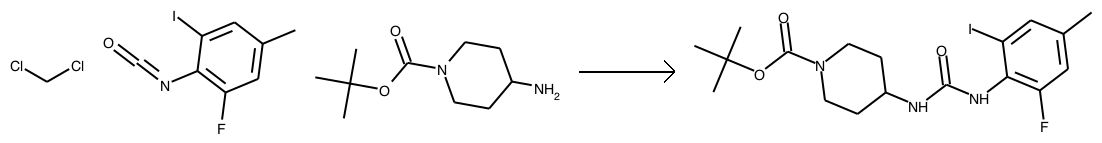

1
THIS IS TEST EXAMPLE 28 (1-indexed)
1
COC(=O)c1ccc(Cn2c(-c3ccccc3)cc3ccccc32)cc1.[Na+].[Br-].[H-].O=C(O)CC(O)(CC(=O)O)C(=O)O.CN(C)C=O.C1CCOC1
[Na+].[Br-].[H-].O=C(O)CC(O)(CC(=O)O)C(=O)O.CN(C)C=O.COC(=O)c1ccc(Cc2c(-c3ccccc3)[nH]c3ccccc23)cc1.C1CCOC1
[Na+].[Br-].[H-].c1ccc(-c2cc3ccccc3[nH]2)cc1.CN(C)C=O.COC(=O)c1ccc(COC(=O)CC(O)(CC(=O)O)C(=O)O)cc1.C1CCOC1
[Na+].[Br-].[H-].c1ccc(-c2cc3ccccc3[nH]2)cc1.CN(C)C=O.COC(=O)c1ccc(COC(=O)CC(O)(CC(=O)O)C(=O)O)cc1.C1CCOC1
Cn1c(-c2ccccc2)cc2ccccc21.COC(=O)c1ccccc1.[Na+].[Br-].[H-].O=C(O)CC(O)(CC(=O)O)C(=O)O.CN(C)C=O.C1CCOC1
[Br:18][CH2:19][c:20]1[cH:21][cH:22][c:23]([C:24](=[O:25])[O:26][CH3:27])[cH:28][cH:29]1.[CH3:48][N:49]([CH3:50])[CH:51]=[O:52].[H-:16].[Na+:17].[O:43]1[CH2:44][CH2:45][CH2:46][CH2:47]1.[OH:30][C:31]([CH2:32][C:33]([C:34](=[O:35])[OH:36])([CH2:37][C:38](=[O:39])[OH:40])[OH:41])=[O:42].[c:1]1(-[c:7]2[nH:8][c:9]3[cH:10][cH:11][cH:12][cH:13][c:14]3[cH:15]2)[cH:2][cH:3][cH:4][cH:5][cH:6]1>>[c:1]1(-[c:7]2[n:8]([CH2:19][c:20]3[cH:21][

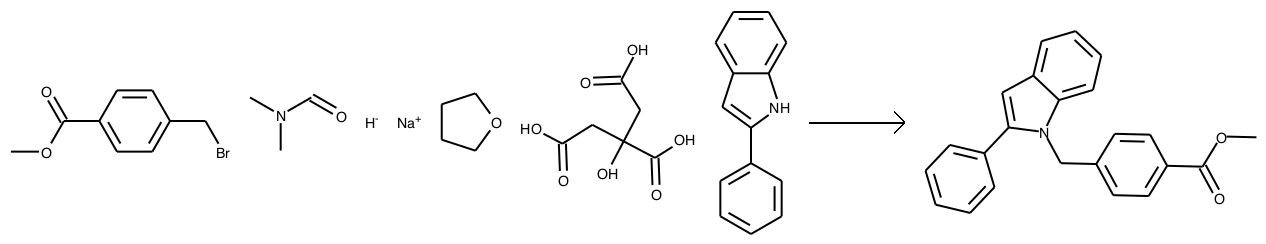

1
THIS IS TEST EXAMPLE 29 (1-indexed)
1
COC(=O)C1(NC(=O)OC(C)(C)C)CC1CCOS(C)(=O)=O.ClCCl.Cl
COC(=O)C1(NC(=O)OC(C)(C)C)CC1CCS(C)(=O)=O.ClCCl.O.Cl
ClCCl.O.C[SH](=O)=O.COC(=O)C1(NC(=O)OC(C)(C)C)CC1CCCl
COC(=O)C1(NC(=O)OC(C)(C)C)CC1CC(O)S(C)(=O)=O.ClCCl.Cl
CS(=O)(=O)O.ClCCl.COC(=O)C1(NC(=O)OC(C)(C)C)CC1CCCl
[CH3:19][S:20]([Cl:21])(=[O:22])=[O:23].[CH3:1][O:2][C:3](=[O:4])[C:5]1([NH:11][C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18])[CH:6]([CH2:8][CH2:9][OH:10])[CH2:7]1.[Cl:24][CH2:25][Cl:26]>>[CH3:1][O:2][C:3](=[O:4])[C:5]1([NH:11][C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18])[CH:6]([CH2:8][CH2:9][O:10][S:20]([CH3:19])(=[O:22])=[O:23])[CH2:7]1
Prediction 1:    20.0-21.0-0.0   with score 3.377143383026123
Prediction 2:    10.0-20.0-1.0   with score 2.589637517929077
Prediction 3:    9.0-10.0-0.0    with score -1.8624284267425537
Prediction 4:    9.0-21.0-1.0    with score -3.798727035522461
Prediction 5:    9.0-20.0-1.0    with score -3.955735206604004
Prediction 6:    9.0

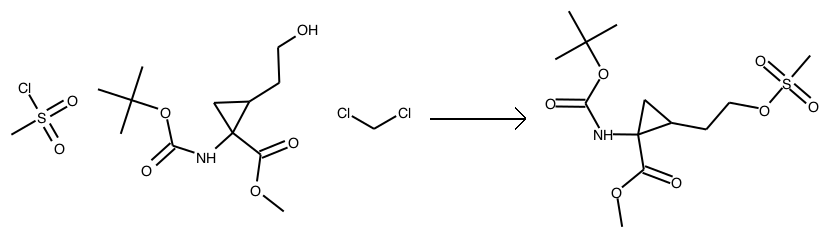

1
THIS IS TEST EXAMPLE 30 (1-indexed)
1
CCc1c(C=O)cccc1-c1nnc(-c2ccc(CC(C)C)c(C#N)c2)s1.O=P([O-])([O-])[O-].CN(C)C=O.O.CC1(C)OBOC1(C)C.[K+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.[Br-]
O=P([O-])([O-])[O-].CCc1c(C=O)cccc1B1OC(C)(C)C(C)(C)O1.O.[K+].CC(C)Cc1ccc(-c2nnc(C(=O)N(C)C)s2)cc1C#N.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.[Br-]
CCc1c(C=O)cc(-c2nnc(-c3ccc(CC(C)C)c(C#N)c3)s2)cc1B1OC(C)(C)C(C)(C)O1.O=P([O-])([O-])[O-].CN(C)C=O.O.[K+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.[Br-]
O=P([O-])([O-])[O-].[Br-].CCc1c(C=O)cccc1B1OC(C)(C)C(C)(C)O1.O.[K+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.CN(C)C=O.CC

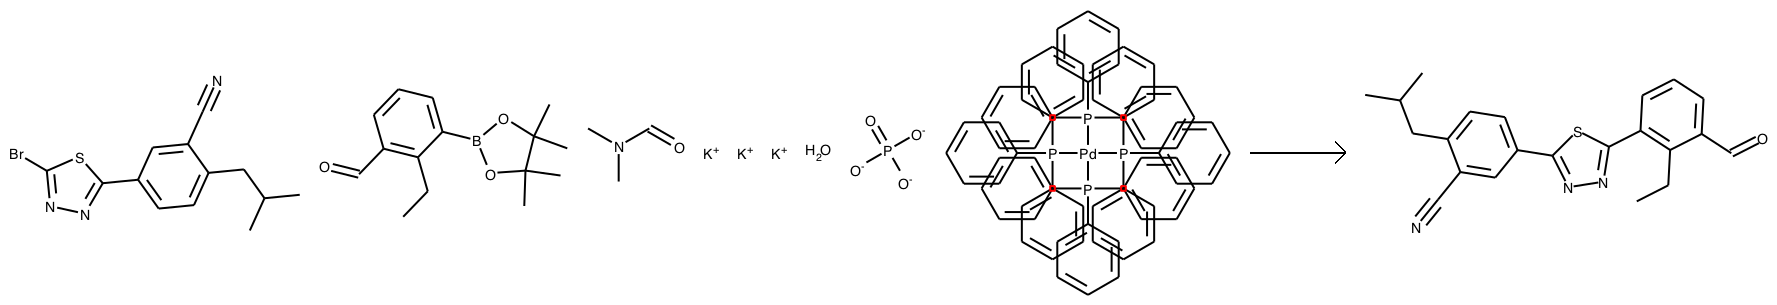

1
THIS IS TEST EXAMPLE 31 (1-indexed)
1
O=[N+]([O-])c1ccc(C#CCOCCCCCCBr)nc1.[Br-]
O=[N+]([O-])c1ccc(C#CCOCCCCCCBr)nc1.[Br-]
C#CCOCCCCCC[n+]1cc([N+](=O)[O-])ccc1Br.[Br-]
C#CCOCCCCCCc1ccc([N+](=O)[O-])cn1.[Br-]
O=[N+]([O-])c1ccc(C#CCOCCCCC(Br)CBr)nc1
[Br:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][O:18][CH2:19][C:20]#[CH:21].[Br:1][c:2]1[n:3][cH:4][c:5]([N+:8](=[O:9])[O-:10])[cH:6][cH:7]1>>[c:2]1([C:21]#[C:20][CH2:19][O:18][CH2:17][CH2:16][CH2:15][CH2:14][CH2:13][CH2:12][Br:11])[n:3][cH:4][c:5]([N+:8](=[O:9])[O-:10])[cH:6][cH:7]1
Prediction 1:    1.0-2.0-0.0     with score 2.380932092666626
Prediction 2:    2.0-21.0-1.0    with score 2.339576244354248
Prediction 3:    11.0-12.0-0.0   with score 0.1585809588432312
Prediction 4:    8.0-10.0-0.0    with score -1.6638195514678955
Prediction 5:    8.0-12.0-1.0    with score -1.8816254138946533
Prediction 6:    4.0-12.0-1.0    with score -2.2821831703186035
Prediction 7:    8.0-9.0-0.0     with score -2.494138717651367
Prediction 8:   

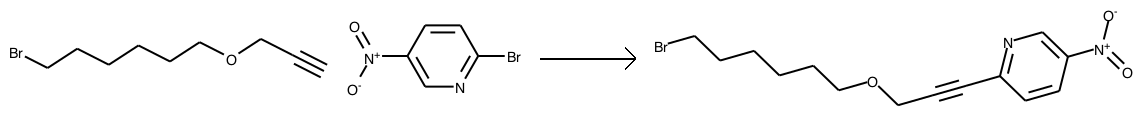

1
THIS IS TEST EXAMPLE 32 (1-indexed)
1
[Br-].CCOc1cccc(-c2cc(C(F)F)n3ncc(C#Cc4ccc(N)nc4)c3n2)c1
Nc1ccc(C#Cc2cnn3c(C(F)F)cc(-c4cccc(Br)c4)nc23)cn1.CCO
CCOc1cc(-c2cc(C(F)F)n3ncc(C#Cc4ccc(N)nc4)c3n2)ccc1Br
CCOc1ccc(Br)c(-c2cc(C(F)F)n3ncc(C#Cc4ccc(N)nc4)c3n2)c1
CCOc1cccc(-c2cc(C(F)F)n3ncc(C=Cc4ccc(N)nc4)c3n2)c1.[Br-]
[F:1][CH:2]([c:3]1[cH:4][c:5](-[c:14]2[cH:15][c:16]([O:20][CH2:21][CH3:22])[cH:17][cH:18][cH:19]2)[n:6][c:7]2[n:8]1[n:9][cH:10][c:11]2[C:12]#[CH:13])[F:23].[NH2:24][c:25]1[n:26][cH:27][c:28]([Br:31])[cH:29][cH:30]1>>[F:1][CH:2]([c:3]1[cH:4][c:5](-[c:14]2[cH:15][c:16]([O:20][CH2:21][CH3:22])[cH:17][cH:18][cH:19]2)[n:6][c:7]2[n:8]1[n:9][cH:10][c:11]2[C:12]#[C:13][c:28]1[cH:27][n:26][c:25]([NH2:24])[cH:30][cH:29]1)[F:23]
Prediction 1:    28.0-31.0-0.0   with score 7.12468147277832
Prediction 2:    13.0-28.0-1.0   with score 5.939019680023193
Prediction 3:    20.0-21.0-0.0   with score -3.746002435684204
Prediction 4:    16.0-20.0-0.0   with score -3.959672212600708
Prediction 5:

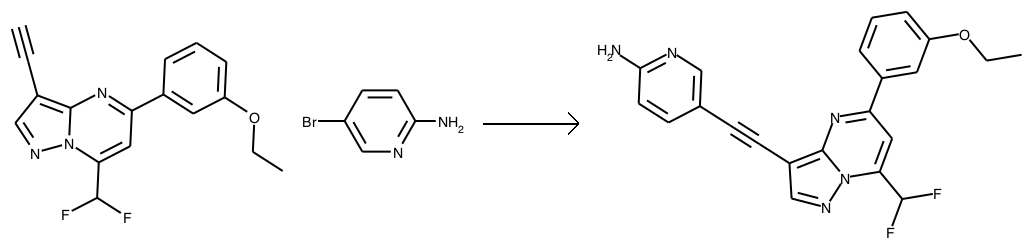

1
THIS IS TEST EXAMPLE 33 (1-indexed)
1
O=S(Cl)Cl.COC(=O)c1ccc(SC)cc1Cl.O
O=S(Cl)Cl.COC(=O)c1ccc(SC)cc1Cl.O
O=S(Cl)Cl.COCc1ccc(SC)cc1Cl.O
CSc1ccc(C(=O)O)c(Cl)c1.O=S(Cl)Cl.C.O
O=S(Cl)Cl.CSc1ccc(C2(O)CO2)c(Cl)c1.O
[CH3:17][OH:18].[Cl:1][c:2]1[c:3]([C:4](=[O:5])[OH:6])[cH:7][cH:8][c:9]([S:11][CH3:12])[cH:10]1.[S:13]([Cl:14])([Cl:15])=[O:16]>>[Cl:1][c:2]1[c:3]([C:4](=[O:5])[O:6][CH3:17])[cH:7][cH:8][c:9]([S:11][CH3:12])[cH:10]1
Prediction 1:    17.0-18.0-0.0   with score 7.940513610839844
Prediction 2:    6.0-17.0-1.0    with score 0.44370096921920776
Prediction 3:    5.0-17.0-1.0    with score 0.17296737432479858
Prediction 4:    4.0-5.0-1.0     with score -0.17426401376724243
Prediction 5:    4.0-6.0-2.0     with score -0.49123501777648926
Prediction 6:    4.0-14.0-1.0    with score -3.9905176162719727
Prediction 7:    4.0-15.0-1.0    with score -3.9905176162719727
Prediction 8:    4.0-6.0-0.0     with score -4.2405781745910645
Prediction 9:    4.0-5.0-0.0     with score -4.8148412704467

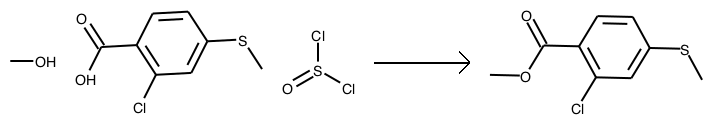

1
THIS IS TEST EXAMPLE 34 (1-indexed)
4
CCOC(=O)N=NC(=O)OCC.COC(=O)c1ccc(F)cc1OC.c1ccccc1.O.CN1CCC(O)CC1.c1ccc(P(c2ccccc2)c2ccccc2)cc1
COC1CCN(C)CC1.CCOC(=O)N=NC(=O)OCC.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccccc1.O.COC(=O)c1ccc(F)cc1O
COC1CCN(C)CC1.CCOC(=O)N=NC(=O)OCC.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccccc1.O.COC(=O)c1ccc(F)cc1O
COC1CCN(C)CC1.CCOC(=O)N=NC(=O)OCC.COC(=O)c1ccc(F)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccccc1.O
CO.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccccc1.O.COC(=O)c1ccc(F)cc1OC1CCN(C)CC1.CCOC(=O)N=NC(=O)OCC
[CH3:32][N:33]1[CH2:34][CH2:35][CH:36]([OH:39])[CH2:37][CH2:38]1.[CH3:52][OH:53].[F:1][c:2]1[cH:3][c:4]([OH:12])[c:5]([C:6](=[O:7])[O:8][CH3:9])[cH:10][cH:11]1.[O:40]=[C:41]([O:42][CH2:43][CH3:44])[N:45]=[N:46][C:47]([O:48][CH2:49][CH3:50])=[O:51].[c:13]1([P:14]([c:15]2[cH:16][cH:17][cH:18][cH:19][cH:20]2)[c:21]2[cH:22][cH:23][cH:24][cH:25][cH:26]2)[cH:27][cH:28][cH:29][cH:30][cH:31]1.[cH:54]1[cH:55][cH:56][cH:57][cH:58][cH:59]1>>[F:1][c:2]1[cH:3][c:4]([O:12][CH:36]2[CH2:35][CH2:34

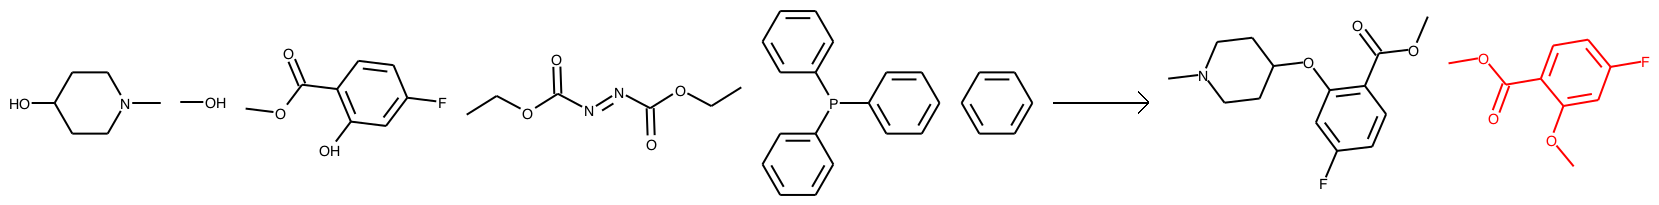

0
THIS IS TEST EXAMPLE 35 (1-indexed)
3
Cl.CCOC(C)=O.C[SiH](C)C(C)(C)C.CCOP(=O)(Cc1ccc(CO[Si](C)(C)C(C)(C)C)cc1O)OCC.O.CCO
CC=O.CCOP(=O)(Cc1ccc(CO[Si](C)(C)C(C)(C)C)cc1O[Si](C)(C)C(C)(C)C)OCC.CCO.O.Cl
Cl.CCOC(C)=O.C[SiH](C)C(C)(C)C.O.CCO.CCOP(=O)(Cc1ccc(CO)cc1O[Si](C)(C)C(C)(C)C)OCC
CCO.Cl.CCOP(=O)(Cc1ccc(CO[Si](C)(C)C(C)(C)C)cc1O[Si](C)(C)C(C)(C)C)OCC.O.CCOC(C)O
C.CO.Cl.CCOC(C)=O.O.CCOP(=O)(Cc1ccc(CO[Si](C)(C)C(C)(C)C)cc1O[Si](C)(C)C(C)(C)C)OCC
[CH3:1][C:2]([CH3:3])([CH3:4])[Si:5]([O:6][c:7]1[c:8]([CH2:22][P:23]([O:24][CH2:25][CH3:26])([O:27][CH2:28][CH3:29])=[O:30])[cH:9][cH:10][c:11]([CH2:13][O:14][Si:15]([C:16]([CH3:17])([CH3:18])[CH3:19])([CH3:20])[CH3:21])[cH:12]1)([CH3:31])[CH3:32].[CH3:34][CH2:35][O:36][C:37]([CH3:38])=[O:39].[CH3:41][CH2:42][OH:43].[ClH:33].[OH2:40]>>[CH3:1][C:2]([CH3:3])([CH3:4])[Si:5]([O:6][c:7]1[c:8]([CH2:22][P:23]([O:24][CH2:25][CH3:26])([O:27][CH2:28][CH3:29])=[O:30])[cH:9][cH:10][c:11]([CH2:13][OH:14])[cH:12]1)([CH3:31])[CH3:32]
Prediction 1:    5.0-6.0-

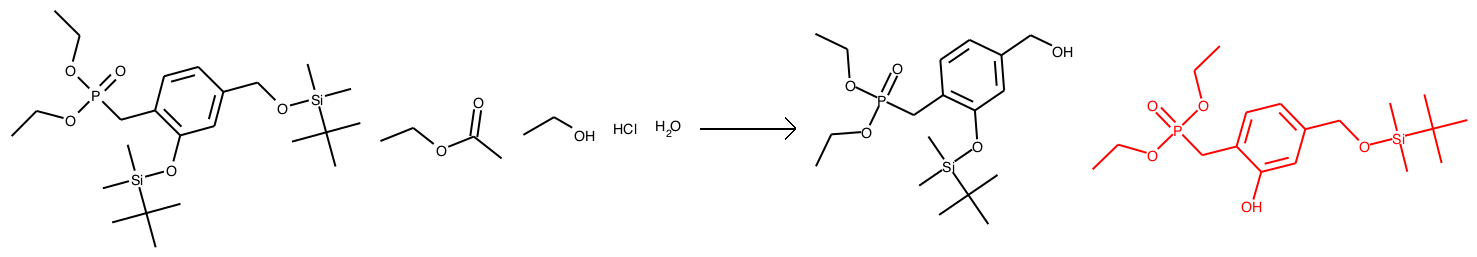

0
THIS IS TEST EXAMPLE 36 (1-indexed)
1
c1ccc(P(c2ccccc2)c2ccccc2)cc1.CCOC(=O)N=NC(=O)OCC.O.C1CCOC1.CCC(Oc1ccccc1C(=NOC)n1ccnc1)c1ccccc1
c1ccc(P(c2ccccc2)c2ccccc2)cc1.CCOC(=O)N=NC(=O)OCC.O.C1CCOC1.CCC(Oc1ccccc1C(=NOC)n1ccnc1)c1ccccc1
O.c1ccc(P(c2ccccc2)c2ccccc2)cc1.CCOC(=O)N=NC(=O)OCC.CCC(c1ccccc1)[n+]1ccn(C(=NOC)c2ccccc2O)c1.C1CCOC1
c1ccc(P(c2ccccc2)c2ccccc2)cc1.CCOC(=O)N=NC(=O)OCC.CCC(O)(Oc1ccccc1C(=NOC)n1ccnc1)c1ccccc1.C1CCOC1
CCOC(=O)N=NC(=O)OCC.c1ccc(P(c2ccccc2)c2ccccc2)cc1.O.CCCc1ccccc1.CON=C(c1ccccc1O)n1ccnc1.C1CCOC1
[CH2:58]1[O:59][CH2:60][CH2:61][CH2:62]1.[CH3:30][O:31][N:32]=[C:33]([c:34]1[c:35]([OH:40])[cH:36][cH:37][cH:38][cH:39]1)[n:41]1[cH:42][n:43][cH:44][cH:45]1.[O:46]=[C:47]([O:48][CH2:49][CH3:50])[N:51]=[N:52][C:53]([O:54][CH2:55][CH3:56])=[O:57].[c:1]1([P:2]([c:3]2[cH:4][cH:5][cH:6][cH:7][cH:8]2)[c:9]2[cH:10][cH:11][cH:12][cH:13][cH:14]2)[cH:15][cH:16][cH:17][cH:18][cH:19]1.[c:20]1([CH:26]([CH2:27][CH3:28])[OH:29])[cH:21][cH:22][cH:23][cH:24][cH:25]1>>[c:20]1([CH:26]

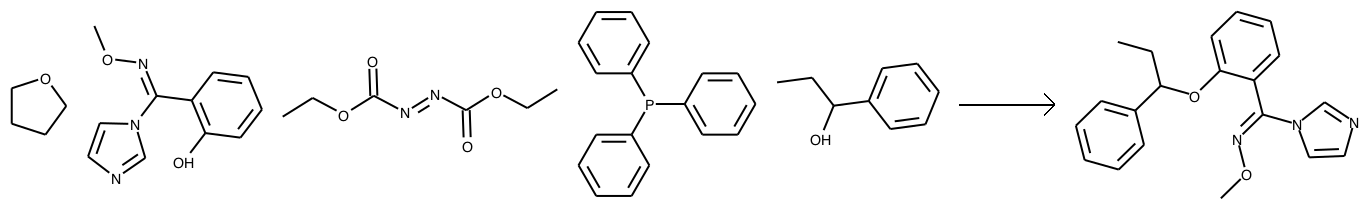

1
THIS IS TEST EXAMPLE 37 (1-indexed)
1
CC(c1cc2cccc(Cl)c2nc1-c1cc(F)cnc1Cl)N1C(=O)c2ccccc2C1=O.OBO.Cl.[F-].OCCO.COC.[Cu]I.[Cs+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1
OBO.Cl.CC(c1cc2cccc(-c3cc(F)cnc3Cl)c2nc1Cl)N1C(=O)c2ccccc2C1=O.[F-].OCCO.COC.[Cu]I.[Cs+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1
OBO.[F-].OCCO.CC(c1cc2cccc(Cl)c2nc1Cl)N1C(=O)c2ccccc2C1=O.COC.[Cu]I.[Cs+].Fc1ccc(Cl)nc1.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1
[Cu]I.Cl.[F-].OCCO.COC.[Cs+].c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.OB(O)c1cc(F)cnc1Cl.CC(c1cnc2c(Cl)cccc2c1)N1C(=O)c2ccccc2C1=O
[Cu]I.COCc1nc2c(Cl)cccc2cc1C(C)N1C(=O)c2ccccc2C1

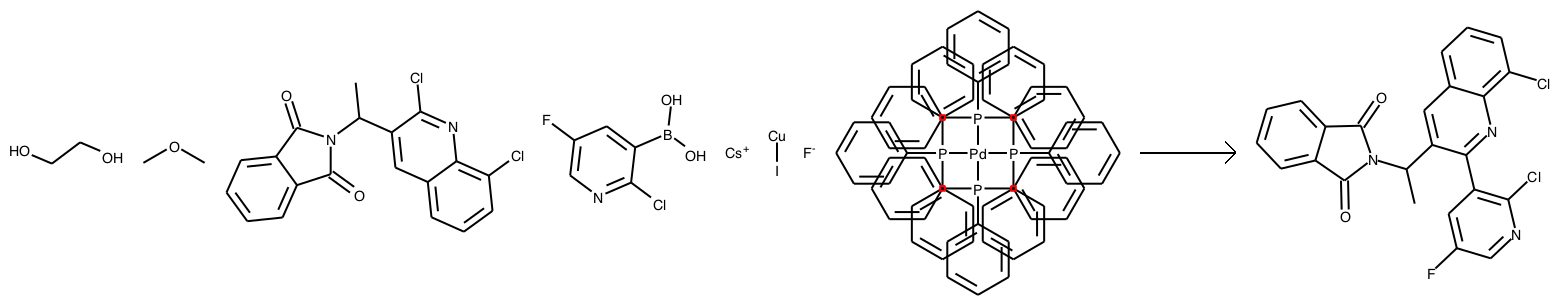

1
THIS IS TEST EXAMPLE 38 (1-indexed)
1
[Li+].[N-]=N.[H-].[Al+3].NCC(O)COCCCCc1ccccc1.C1CCOC1
[Al+3].COC(CN=[N+]=[N-])COCCCCc1ccccc1.[H-].CCCO.[Li+]
[Al+3].COC(CN=[N+]=[N-])COCCCCc1ccccc1.[H-].CCCO.[Li+]
[N-]=[N+]=NCC(COCCCCc1ccccc1)OCCCCO.[Al+3].[H-].[Li+]
[N-]=[N+]=NCC(COCCCCc1ccccc1)OCCCCO.[Al+3].[H-].[Li+]
[Al+3:20].[H-:19].[H-:22].[H-:23].[H-:24].[Li+:21].[O:25]1[CH2:26][CH2:27][CH2:28][CH2:29]1.[c:1]1([CH2:7][CH2:8][CH2:9][CH2:10][O:11][CH2:12][CH:13]([CH2:14][N:15]=[N+:16]=[N-:17])[OH:18])[cH:2][cH:3][cH:4][cH:5][cH:6]1>>[c:1]1([CH2:7][CH2:8][CH2:9][CH2:10][O:11][CH2:12][CH:13]([CH2:14][NH2:15])[OH:18])[cH:2][cH:3][cH:4][cH:5][cH:6]1
Prediction 1:    15.0-16.0-0.0   with score 3.5414106845855713
Prediction 2:    13.0-18.0-0.0   with score -5.452604293823242
Prediction 3:    13.0-15.0-1.0   with score -5.859323978424072
Prediction 4:    13.0-18.0-2.0   with score -5.9043779373168945
Prediction 5:    25.0-26.0-0.0   with score -5.910980224609375
Prediction 6:    25.0-29.0-0.0   wi

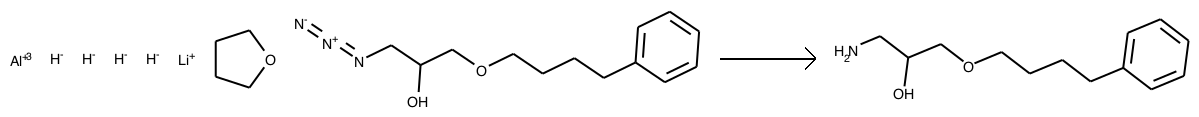

1
THIS IS TEST EXAMPLE 39 (1-indexed)
1
O=[SH]Cl.O.Cc1cc(C)c(C(=O)Cl)c(C)c1
O=[SH]Cl.O.Cc1cc(C)c(C(=O)Cl)c(C)c1
O=[SH]Cl.Cc1cc(C)c(C(=O)O)c(C)c1.Cl
O=[SH]Cl.Cc1cc(C)c(C(=O)O)c(C)c1.Cl
O=[SH]Cl.O.Cc1cc(C)c(C(=O)Cl)c(C)c1
[CH3:1][c:2]1[c:3]([C:4](=[O:5])[OH:6])[c:7]([CH3:12])[cH:8][c:9]([CH3:11])[cH:10]1.[S:13]([Cl:14])([Cl:15])=[O:16]>>[CH3:1][c:2]1[c:3]([C:4](=[O:5])[Cl:15])[c:7]([CH3:12])[cH:8][c:9]([CH3:11])[cH:10]1
Prediction 1:    4.0-6.0-0.0     with score 1.5205483436584473
Prediction 2:    4.0-14.0-1.0    with score -0.03577142953872681
Prediction 3:    4.0-15.0-1.0    with score -0.03577142953872681
Prediction 4:    13.0-14.0-0.0   with score -0.15391504764556885
Prediction 5:    13.0-15.0-0.0   with score -0.15391504764556885
Prediction 6:    4.0-6.0-2.0     with score -2.3617806434631348
Prediction 7:    4.0-5.0-0.0     with score -3.812575340270996
Prediction 8:    4.0-8.0-1.0     with score -4.447237491607666
Prediction 9:    4.0-10.0-1.0    with score -4.447237491607666
Pr

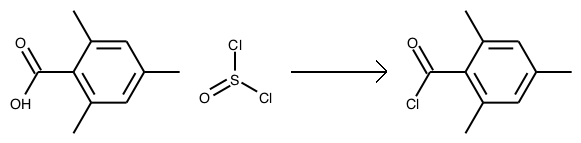

1
THIS IS TEST EXAMPLE 40 (1-indexed)
1
CCCCOc1c(-c2cccc3sc(C(C)=O)cc23)cc(C(C)C)cc1C(C)C.OBO.[Na+].O.CCO.[I-].O=C([O-])O.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.Cc1ccccc1
CC(=O)c1cc2ccccc2s1.CCCCOc1c(B(O)O)cc(C(C)C)cc1C(C)C.O.CCO.[I-].O=C([O-])O.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.Cc1ccccc1.[Na+]
CCCCOc1c(CC(=O)c2cc3c(I)cccc3s2)cc(C(C)C)cc1C(C)C.OBO.[Na+].O.CCO.O=C([O-])O.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.Cc1ccccc1
OBO.[Na+].CCCCOc1c(C(C)=O)cc(C(C)C)cc1C(C)C.Ic1cccc2sccc12.O.CCO.O=C([O-])O.c1ccc([P+](c2ccccc2)(c2ccccc2)[Pd]([P+](c2ccccc2)(c2ccccc2)c2ccccc2)([P+](c2ccccc2)(c2ccccc2)c2ccccc2)[P+](c2ccccc2)(c2ccccc2)c2ccccc2)cc1.Cc1ccccc1
OBO.CC(=O)c1cc2c(I)cccc2s1.[Na+].CCCCOc1ccc(C(C)

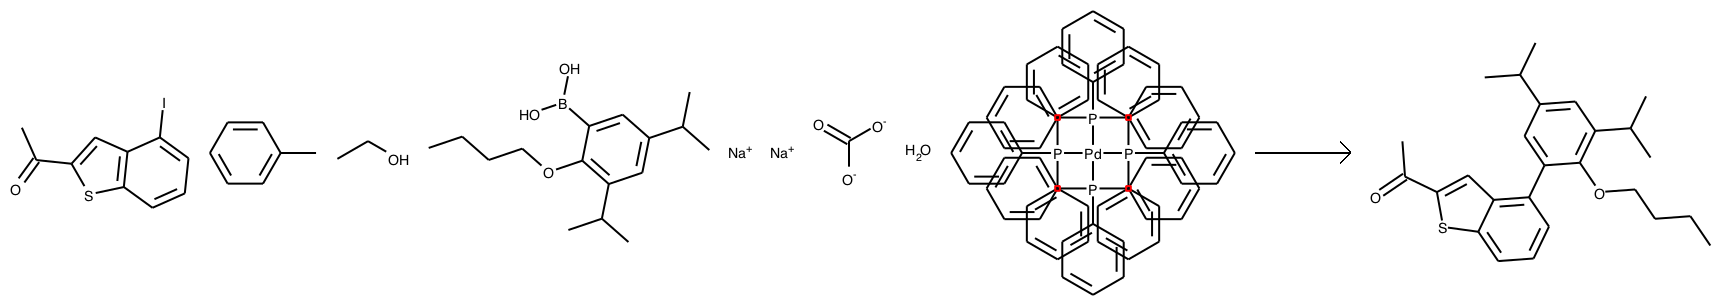

1
THIS IS TEST EXAMPLE 41 (1-indexed)
1
O=C(O)C(F)(F)F.ClCCl.CC(C)(C)OC=O.Cc1ccc(-c2cccc(C3=Nc4cc(C)c(C(F)(F)F)cc4NC(=O)C3)c2)cn1.O
ClCCl.O=C(O)C(F)(F)F.O.Cc1ccc(-c2cccc(C3=[N+](C(=O)OC(C)(C)C)c4cc(C)c(C(F)(F)F)cc4NC(=O)C3)c2)cn1
ClCCl.CC(C)(C)OC=O.O=C(O)C(F)(F)F.O.CC(=O)Nc1cc(C(F)(F)F)c(C)cc1N=Cc1cccc(-c2ccc(C)nc2)c1
O=C(O)C(F)(F)F.ClCCl.CC(C)(C)OC=O.CC(=O)Nc1cc(C(F)(F)F)c(C)cc1N=c1-c2ccc-1c(-c1ccc(C)nc1)c2.O
O=C(O)C(F)(F)F.ClCCl.CC(C)(C)OC=O.O.CC(=O)n1c(-c2cccc(-c3ccc(C)nc3)c2)nc2cc(C)c(C(F)(F)F)cc21
[C:1]([O:2][C:3](=[O:4])[NH:7][c:8]1[c:9]([NH:19][C:20]([CH2:21][C:22](=[O:5])[c:24]2[cH:25][c:26](-[c:30]3[cH:31][n:32][c:33]([CH3:36])[cH:34][cH:35]3)[cH:27][cH:28][cH:29]2)=[O:37])[cH:10][c:11]([C:15]([F:16])([F:17])[F:18])[c:12]([CH3:14])[cH:13]1)([CH3:6])([CH3:23])[CH3:38].[Cl:46][CH2:47][Cl:48].[F:39][C:40]([F:41])([F:42])[C:43]([OH:44])=[O:45]>>[N:7]1=[C:22]([c:24]2[cH:25][c:26](-[c:30]3[cH:31][n:32][c:33]([CH3:36])[cH:34][cH:35]3)[cH:27][cH:28][cH:29]2)[CH2:21][C:20](=[O:37])[NH:

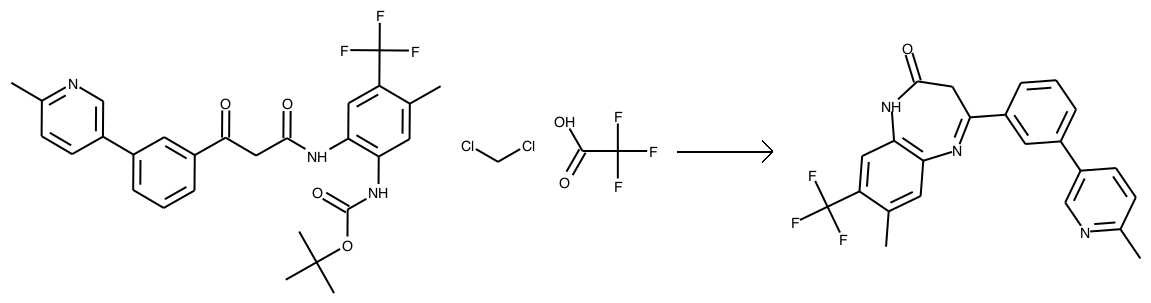

1
THIS IS TEST EXAMPLE 42 (1-indexed)
4
CC(C)(C)P(C(C)(C)C)C(C)(C)C.COc1ncc(-c2nc3ccccc3s2)cn1.[Br-].[Pd].CNc1ccc(-[n+]2csc3cc4c(cc32)OCO4)cn1
c1nc2cc3c(cc2s1)OCO3.COc1ncccn1.[Pd].CC(C)(C)P(C(C)(C)C)C(C)(C)C.CNc1ccc(-c2nc3ccccc3s2)cn1.[Br-]
CC(C)(C)P(C(C)(C)C)C(C)(C)C.COc1ncc(-c2nc3ccccc3s2)cn1.CNc1ccccn1.Brc1nc2cc3c(cc2s1)OCO3.[Pd]
CC(C)(C)P(C(C)(C)C)C(C)(C)C.COc1ncc(-c2nc3ccccc3s2)cn1.[Br-].[Pd].CNc1ccc(-c2nc3cc4c(cc3s2)OCO4)cn1
CC(C)(C)P(C(C)(C)C)C(C)(C)C.CNc1ccc(-[n+]2c(Br)sc3cc4c(cc32)OCO4)cn1.COc1ncc(-c2nc3ccccc3s2)cn1.[Pd]
[Br:13][c:14]1[cH:15][cH:16][c:17]([NH:20][CH3:21])[n:18][cH:19]1.[C:40]([P:41]([C:42]([CH3:43])([CH3:44])[CH3:45])[C:46]([CH3:47])([CH3:48])[CH3:49])([CH3:50])([CH3:51])[CH3:52].[C:53]([P:54]([C:55]([CH3:56])([CH3:57])[CH3:58])[C:59]([CH3:60])([CH3:61])[CH3:62])([CH3:63])([CH3:64])[CH3:65].[CH3:22][O:23][c:24]1[n:25][cH:26][c:27](-[c:28]2[s:29][c:30]3[cH:31][cH:32][cH:33][cH:34][c:35]3[n:36]2)[cH:37][n:38]1.[O:1]1[CH2:2][O:3][c:4]2[cH:5][c:6]3[c:7]([n:8][cH:9

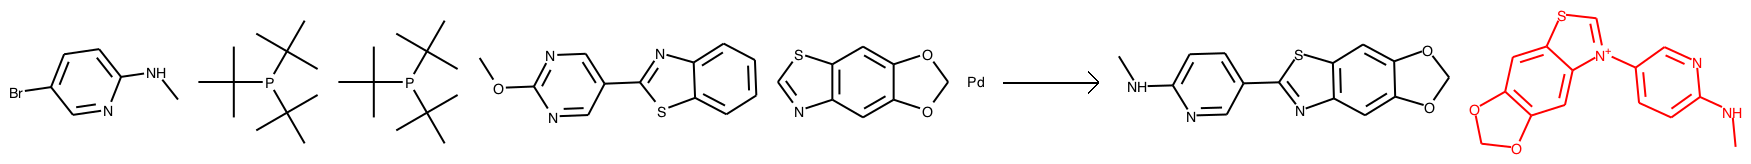

0
THIS IS TEST EXAMPLE 43 (1-indexed)
1
Cl.[Br-].O=Cc1ccc(OC2CCCC2)c(O)c1.O.[K+].O=C([O-])O.CN(C)C=O
Cl.[Br-].O=Cc1ccc(O)c(OC2CCCC2)c1.O.[K+].O=C([O-])O.CN(C)C=O
Cl.[Br-].O.O=Cc1ccc2c(c1)OC1(CCCC1)O2.[K+].O=C([O-])O.CN(C)C=O
Cl.[O-].COc1ccc(C=O)cc1O.O.[K+].BrC1CCCC1.CN(C)C=O
O=Cc1ccc(OC2=CCCC2)c(O)c1.Cl.[Br-].O.[K+].O=C([O-])O.CN(C)C=O
[C:11](=[O:12])([O-:13])[O-:14].[CH:17]1([Br:22])[CH2:18][CH2:19][CH2:20][CH2:21]1.[ClH:23].[K+:15].[K+:16].[O:24]=[CH:25][N:26]([CH3:27])[CH3:28].[OH2:29].[OH:1][c:2]1[cH:3][c:4]([CH:5]=[O:6])[cH:7][cH:8][c:9]1[OH:10]>>[OH:1][c:2]1[cH:3][c:4]([CH:5]=[O:6])[cH:7][cH:8][c:9]1[O:10][CH:17]1[CH2:18][CH2:19][CH2:20][CH2:21]1
Prediction 1:    17.0-22.0-0.0   with score 5.014502048492432
Prediction 2:    10.0-17.0-1.0   with score 2.933177947998047
Prediction 3:    1.0-17.0-1.0    with score 0.6317432522773743
Prediction 4:    10.0-11.0-1.0   with score -3.865870475769043
Prediction 5:    11.0-13.0-0.0   with score -4.4084954261779785
Prediction 6:    11.0-14.

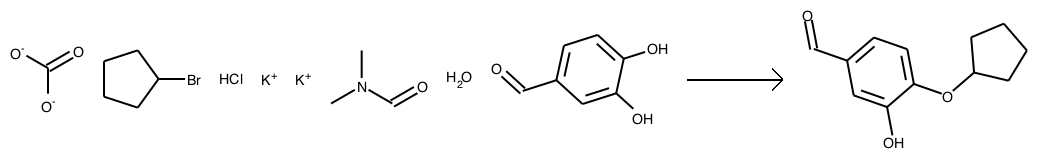

1
THIS IS TEST EXAMPLE 44 (1-indexed)
1
COc1cc(C=CC(=O)c2ccccc2)cc(C(F)(F)F)c1O.O
O.COc1cc(CCC(=O)c2ccccc2)cc(C(F)(F)F)c1O
c1ccccc1.COc1cc(C=C=C=O)cc(C(F)(F)F)c1O.O
COc1cc(C)cc(C(F)(F)F)c1O.CC(=O)c1ccccc1.O
O.COc1cccc(C(F)(F)F)c1O.C=CC(=O)c1ccccc1
[CH3:16][C:17](=[O:18])[c:19]1[cH:20][cH:21][cH:22][cH:23][cH:24]1.[CH3:1][O:2][c:3]1[cH:4][c:5]([CH:6]=[O:7])[cH:8][c:9]([C:12]([F:13])([F:14])[F:15])[c:10]1[OH:11]>>[CH3:1][O:2][c:3]1[cH:4][c:5]([CH:6]=[CH:16][C:17](=[O:18])[c:19]2[cH:20][cH:21][cH:22][cH:23][cH:24]2)[cH:8][c:9]([C:12]([F:13])([F:14])[F:15])[c:10]1[OH:11]
Prediction 1:    6.0-7.0-0.0     with score 5.18215799331665
Prediction 2:    6.0-16.0-2.0    with score 4.093949317932129
Prediction 3:    1.0-2.0-0.0     with score -0.20112761855125427
Prediction 4:    6.0-16.0-1.0    with score -4.309284687042236
Prediction 5:    16.0-17.0-2.0   with score -4.550071716308594
Prediction 6:    17.0-19.0-0.0   with score -4.675786972045898
Prediction 7:    2.0-3.0-0.0     with score -4.74

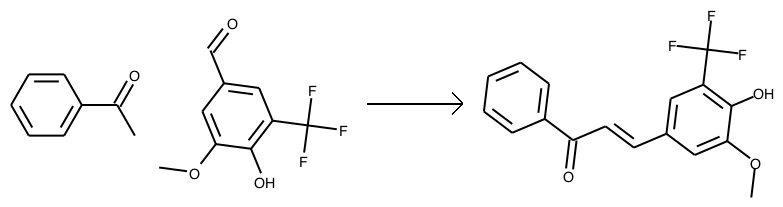

1
THIS IS TEST EXAMPLE 45 (1-indexed)
1
ClCCl.CC(C)C.Cc1cc(-c2ccc(Cl)cc2)nc(-c2cccc(-c3cccc(S(N)(=O)=O)c3)c2)n1.O=C(O)C(F)(F)F
C.Cc1cc(-c2ccc(Cl)cc2)nc(-c2cccc(-c3cccc(S(N)(=O)=O)c3)c2)n1.ClCCl.O=C(O)C(F)(F)F.CCC
C.Cc1cc(-c2ccc(Cl)cc2)nc(-c2cccc(-c3cccc(S(N)(=O)=O)c3)c2)n1.ClCCl.O=C(O)C(F)(F)F.CCC
C.Cc1cc(-c2ccc(Cl)cc2)nc(-c2cccc(-c3cccc(S(N)(=O)=O)c3)c2)n1.ClCCl.O=C(O)C(F)(F)F.CCC
CCl.Cl.O=C(O)C(F)(F)F.Cc1cc(-c2ccc(Cl)cc2)nc(-c2cccc(-c3cccc(S(=O)(=O)NC(C)(C)C)c3)c2)n1
[C:1]([CH3:2])([CH3:3])([CH3:4])[NH:5][S:6](=[O:7])(=[O:8])[c:9]1[cH:10][c:11](-[c:15]2[cH:16][c:17](-[c:21]3[n:22][c:23]([CH3:34])[cH:24][c:25](-[c:27]4[cH:28][cH:29][c:30]([Cl:33])[cH:31][cH:32]4)[n:26]3)[cH:18][cH:19][cH:20]2)[cH:12][cH:13][cH:14]1.[Cl:42][CH2:43][Cl:44].[F:35][C:36]([F:37])([F:38])[C:39]([OH:40])=[O:41]>>[NH2:5][S:6](=[O:7])(=[O:8])[c:9]1[cH:10][c:11](-[c:15]2[cH:16][c:17](-[c:21]3[n:22][c:23]([CH3:34])[cH:24][c:25](-[c:27]4[cH:28][cH:29][c:30]([Cl:33])[cH:31][cH:32]4)[n:26]3)[cH:18][cH:19][cH:20]2)[

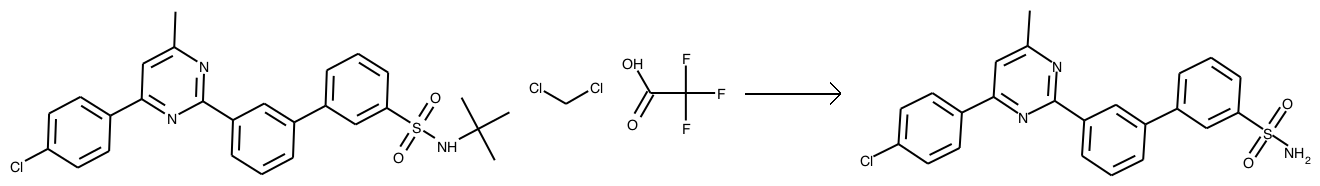

1
THIS IS TEST EXAMPLE 46 (1-indexed)
1
[K+].N#Cc1ccc(C2CCC(C3CCC(C=CCC4OCCCO4)CC3)CC2)cc1.O.CC(C)(C)[O-].c1ccc(P(c2ccccc2)c2ccccc2)cc1.[Br-].C1CCOC1
[K+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.O.CC(C)(C)[O-].N#Cc1ccc(C2CCC(C3CCC(=C=CCC4OCCCO4)CC3)CC2)cc1.[Br-].C1CCOC1
CC(C)(C)[O-].C=CC1CCC(C2CCC(c3ccc(C#N)cc3)CC2)CC1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.O.[K+].CC1OCCCO1.[Br-].C1CCOC1
[K+].N#Cc1ccc(C2CCC(C3CCC(=CCCC4OCCCO4)CC3)CC2)cc1.O.CC(C)(C)[O-].c1ccc(P(c2ccccc2)c2ccccc2)cc1.[Br-].C1CCOC1
[K+].c1ccc(P(c2ccccc2)c2ccccc2)cc1.N#Cc1ccc(C2CCC(C3CCC(CCCC4OCCCO4)CC3)CC2)cc1.O.CC(C)(C)[O-].[Br-].C1CCOC1
[Br-:1].[C:35](#[N:36])[c:37]1[cH:38][cH:39][c:40]([CH:43]2[CH2:44][CH2:45][CH:46]([CH:49]3[CH2:50][CH2:51][CH:52]([CH:55]=[O:56])[CH2:53][CH2:54]3)[CH2:47][CH2:48]2)[cH:41][cH:42]1.[CH2:57]1[O:58][CH2:59][CH2:60][CH2:61]1.[CH3:29][C:30]([CH3:31])([O-:32])[CH3:33].[K+:34].[O:2]1[CH:3]([CH2:8][CH2:9][P+:10]([c:11]2[cH:12][cH:13][cH:14][cH:15][cH:16]2)([c:17]2[cH:18][cH:19][cH:20][cH:21][cH:22]2)[c:23]2[cH:2

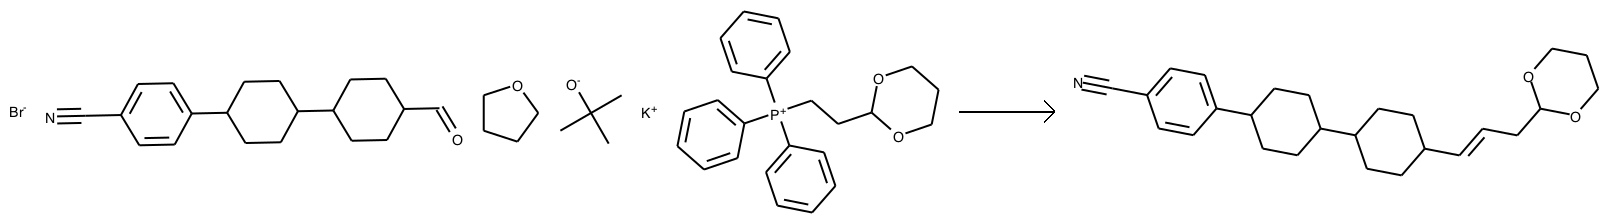

1
THIS IS TEST EXAMPLE 47 (1-indexed)
11
[B-].Cl.[Na+].O.O=CO.C1CCOC1.COC(=O)C1=CC(=O)OC(O)C1(C)C1CCC2(C)C(CCC2(OC(C)=O)C(C)=O)C1CO
[B-].Cl.[Na+].O.COC1C2=CC(=O)OC(O)C2(C)C2CCC3(C)C(CCC3(OC(C)=O)C(C)=O)C2C1O.C1CCOC1.O=C(O)O
CC(=O)OC1(C(C)=O)CCC2C3C(O)C(=O)C4=CC(=O)OC(O)C4(C)C3CCC21C.CO.[B-].Cl.O.O=CO.C1CCOC1.[Na+]
CO.[B-].Cl.O.O=CO.CC(=O)OC1(C(C)=O)CCC2C(CO)C(C3(C)C(C(=O)Cl)=CC(=O)OC3O)CCC21C.C1CCOC1.[Na+]
CO.[B-].CC(=O)OC1(C(C)=O)CCC2C(CO)C(C3(C)C(C=O)=CC(=O)OC3O)CCC21C.Cl.O.O=CO.C1CCOC1.[Na+]
[BH4-:1].[C:33](=[O:34])([O-:35])[OH:36].[C:3]([CH3:4])(=[O:5])[O:6][C:7]1([C:8]([CH3:9])=[O:10])[CH2:11][CH2:12][CH:13]2[CH:14]3[CH:15]([OH:32])[CH:16]([Cl:31])[C:17]4=[CH:18][C:19](=[O:30])[O:20][CH:21]([OH:29])[C:22]4([CH3:23])[CH:24]3[CH2:25][CH2:26][C:27]12[CH3:28].[CH3:40][OH:41].[ClH:38].[Na+:2].[Na+:37].[O:42]1[CH2:43][CH2:44][CH2:45][CH2:46]1.[OH2:39]>>[C:3]([CH3:4])(=[O:5])[O:6][C:7]1([C:8]([CH3:9])=[O:10])[CH2:11][CH2:12][CH:13]2[CH:14]3[CH:15]([OH:32])[CH:16]([Cl:31])[C:17]4=[CH:18][

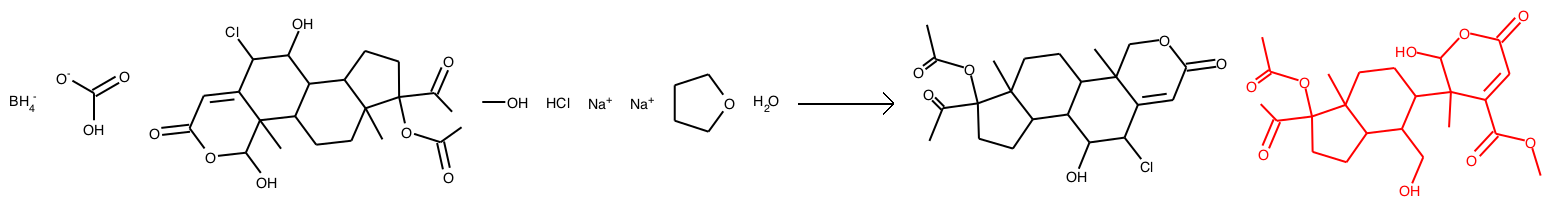

0
THIS IS TEST EXAMPLE 48 (1-indexed)
1
CCN(CC)CC.OBO.CCOC(C)=O.[Pd].O=S(=O)(O)C(F)(F)F.c1ccc(P(c2ccccc2)c2ccccc2)cc1.CN(C)C=O.CC(C)(Cc1c[nH]c2c(-c3cccs3)cccc12)NC(=O)OC(C)(C)C
CCN(CC)CC.OBO.CCOC(C)=O.[Pd].O=S(=O)(O)C(F)(F)F.c1ccc(P(c2ccccc2)c2ccccc2)cc1.CN(C)C=O.CC(C)(Cc1c[nH]c2c(-c3cccs3)cccc12)NC(=O)OC(C)(C)C
CCN(CC)CC.OBO.c1ccsc1.CCOC(C)=O.[Pd].CN(C)C(=O)c1cccc2c(CC(C)(C)NC(=O)OC(C)(C)C)c[nH]c12.O=S(=O)(O)C(F)(F)F.c1ccc(P(c2ccccc2)c2ccccc2)cc1
CCN(CC)CC.OBO.c1ccsc1.CCOC(C)=O.[Pd].O=S(=O)(O)C(F)(F)F.c1ccc(P(c2ccccc2)c2ccccc2)cc1.CC(C)(Cc1c[nH]c2c(C=O)cccc12)NC(=O)OC(C)(C)C.CNC
CCN(CC)CC.CCOC(C)=O.[Pd].OB(O)c1cccs1.CN(C)C(=O)c1cccc2c(CC(C)(C)NC(=O)OC(C)(C)C)c[nH]c12.O=S(=O)(O)C(F)(F)F.c1ccc(P(c2ccccc2)c2ccccc2)cc1
[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][C:9]([CH2:10][c:11]1[cH:12][nH:13][c:14]2[c:15]([O:20][S:21]([C:22]([F:23])([F:24])[F:25])(=[O:26])=[O:27])[cH:16][cH:17][cH:18][c:19]12)([CH3:28])[CH3:29].[CH3:30][CH2:31][N:32]([CH2:33][CH3:34])[CH2:35][CH3:36].[CH3

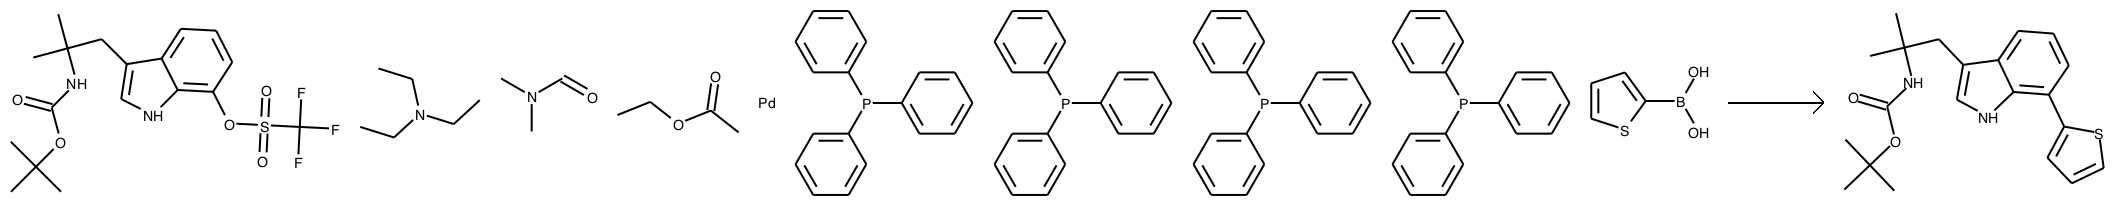

1
THIS IS TEST EXAMPLE 49 (1-indexed)
9
CCOC(=CCCCCC(c1ccccc1)c1c(C)c(OC)c(C)c(C)c1OC)CCO.[C].[Pd]
[C].CCO.[Pd].CCOC#CCCCCC(c1ccccc1)c1c(C)c(OC)c(C)c(C)c1OC
[C].CCO.[Pd].CCOC=CCCCCC(c1ccccc1)c1c(C)c(OC)c(C)c(C)c1OC
CC.[C].COc1c(C)c(C)c(OC)c(C(CCCCC=C(O)CCO)c2ccccc2)c1C.[Pd]
[C].CCO.COc1c(C)c(C)c(OC)c(C(CCCCC=CCCO)c2ccccc2)c1C.[Pd]
[C:33].[CH3:1][O:2][c:3]1[c:4]([CH:14]([CH2:15][CH2:16][CH2:17][CH2:18][C:19]#[C:20][CH2:21][CH2:22][OH:23])[c:24]2[cH:25][cH:26][cH:27][cH:28][cH:29]2)[c:5]([CH3:13])[c:6]([O:11][CH3:12])[c:7]([CH3:10])[c:8]1[CH3:9].[CH3:30][CH2:31][OH:32].[Pd:34]>>[CH3:1][O:2][c:3]1[c:4]([CH:14]([CH2:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][CH2:21][CH2:22][OH:23])[c:24]2[cH:25][cH:26][cH:27][cH:28][cH:29]2)[c:5]([CH3:13])[c:6]([O:11][CH3:12])[c:7]([CH3:10])[c:8]1[CH3:9]
Prediction 1:    19.0-20.0-2.0   with score -0.07815778255462646
Prediction 2:    19.0-20.0-1.0   with score -1.0005896091461182
Prediction 3:    22.0-33.0-1.0   with score -4.460859775543213
Prediction 4

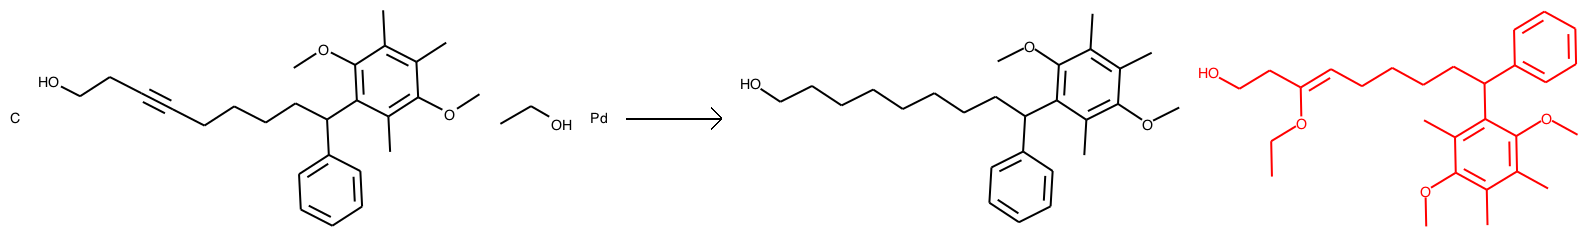

0
THIS IS TEST EXAMPLE 50 (1-indexed)
1
O=C(CSc1nc2cc(C(F)(F)F)ccc2s1)N1CCCc2ccccc21.Cl
FC(F)(F)c1ccc2sc(S)nc2c1.CC(=O)N1CCCc2ccccc21.Cl
O=C(CS)N1CCCc2ccccc21.FC(F)(F)c1ccc2scnc2c1.Cl
O=C(CSc1nc2cc(C(F)(F)F)cc(Cl)c2s1)N1CCCc2ccccc21
CC(=O)N1CCCc2ccccc21.FC(F)(F)c1cc(Cl)c2sc(S)nc2c1
[Cl:1][CH2:2][C:3](=[O:4])[N:5]1[CH2:6][CH2:7][CH2:8][c:9]2[cH:10][cH:11][cH:12][cH:13][c:14]21.[F:15][C:16]([c:17]1[cH:18][cH:19][c:20]2[c:21]([n:22][c:23]([SH:25])[s:24]2)[cH:26]1)([F:27])[F:28]>>[CH2:2]([C:3](=[O:4])[N:5]1[CH2:6][CH2:7][CH2:8][c:9]2[cH:10][cH:11][cH:12][cH:13][c:14]21)[S:25][c:23]1[n:22][c:21]2[c:20]([cH:19][cH:18][c:17]([C:16]([F:15])([F:27])[F:28])[cH:26]2)[s:24]1
Prediction 1:    1.0-2.0-0.0     with score 5.53876256942749
Prediction 2:    2.0-25.0-1.0    with score 2.251281976699829
Prediction 3:    16.0-17.0-0.0   with score -5.749751567840576
Prediction 4:    23.0-25.0-0.0   with score -6.043900966644287
Prediction 5:    11.0-25.0-1.0   with score -6.062098026275635
Prediction 6:   

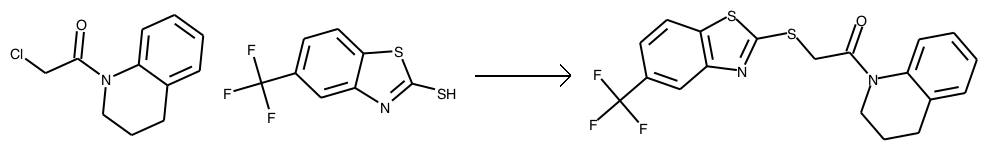

1
THIS IS TEST EXAMPLE 51 (1-indexed)
6
CCO.Cl.CC(=O)O.O.CC=C(c1cccc(NC(=O)C(C)(C)C)c1)c1cc(OC)c(OC)c(OC)c1
CCOC=C(c1cccc(NC(=O)C(C)(C)C)c1)c1cc(OC)c(OC)c(OC)c1.C.CC(=O)O.O.Cl
CCOC=C(c1cccc(NC(=O)C(C)(C)C)c1)c1cc(OC)c(OC)c(OC)c1.C.CC(=O)O.O.Cl
CCOC(C)=C(c1cccc(NC(=O)C(C)(C)C)c1)c1cc(OC)c(OC)c(OC)c1.CC(=O)O.O.Cl
CCOC(C)=C(c1cccc(NC(=O)C(C)(C)C)c1)c1cc(OC)c(OC)c(OC)c1.CC(=O)O.O.Cl
[C:1]([C:2](=[O:3])[NH:7][c:8]1[cH:9][c:10]([C:14]([c:15]2[cH:16][c:17]([O:25][CH3:26])[c:18]([O:23][CH3:24])[c:19]([O:21][CH3:22])[cH:20]2)=[O:27])[cH:11][cH:12][cH:13]1)([CH3:4])([CH3:5])[CH3:6].[C:28]([OH:29])(=[O:30])[CH3:31].[CH2:33]([O:34][CH2:35][CH3:36])[CH3:37].[CH3:38][C:39](=[O:40])[OH:41].[ClH:32]>>[NH2:7][c:8]1[cH:9][c:10]([C:14]([c:15]2[cH:16][c:17]([O:25][CH3:26])[c:18]([O:23][CH3:24])[c:19]([O:21][CH3:22])[cH:20]2)=[O:27])[cH:11][cH:12][cH:13]1
Prediction 1:    14.0-27.0-1.0   with score -2.9814040660858154
Prediction 2:    2.0-7.0-0.0     with score -3.16048264503479
Prediction 3:    14.0-27.0-

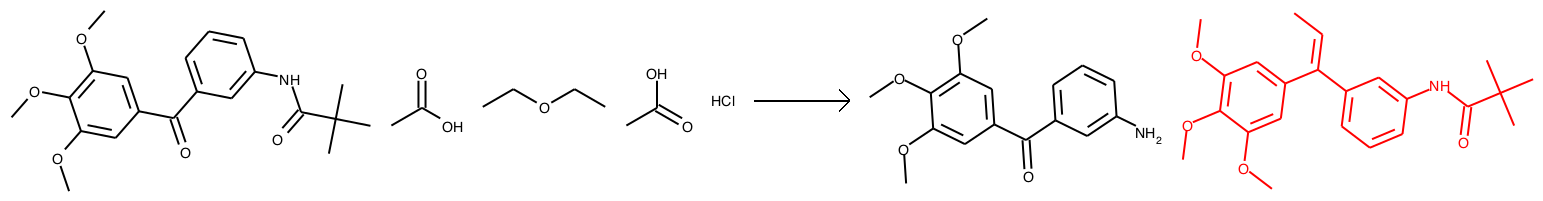

0
THIS IS TEST EXAMPLE 52 (1-indexed)
11
N[N+](=O)c1c(O)ccc2[nH]c(CN3CCCC3)nc12.[O-].[Br-].[Na+].CC(C)O
[Na+].[Br-].Oc1ccc2[nH]c(CN3CCCC3)nc2c1.CC(C)O.NN=O.[O-]
[Na+].[O-].[Br-].N[N+](=O)[N+]1(Cc2nc3cc(O)ccc3[nH]2)CCCC1.CC(C)O
[Na+].NN.[O-].O.Oc1ccc2[nH]c(CN3CCCC3)nc2c1.CC(C)O.[Br-]
O=N[O-].[Na+].N.Oc1ccc2[nH]c(CN3CCCC3)nc2c1.CC(C)O.[Br-]
[BrH:26].[CH:22]([OH:23])([CH3:24])[CH3:25].[N:18]([O-:19])=[O:20].[N:1]1([CH2:6][c:7]2[n:8][c:9]3[c:10]([nH:11]2)[cH:12][cH:13][c:14]([NH2:16])[cH:15]3)[CH2:2][CH2:3][CH2:4][CH2:5]1.[Na+:21].[OH2:17]>>[N:1]1([CH2:6][c:7]2[n:8][c:9]3[c:10]([nH:11]2)[cH:12][cH:13][c:14]([Br:26])[cH:15]3)[CH2:2][CH2:3][CH2:4][CH2:5]1
Prediction 1:    14.0-16.0-0.0   with score 2.1378016471862793
Prediction 2:    18.0-19.0-0.0   with score 0.7077975869178772
Prediction 3:    18.0-20.0-0.0   with score -0.430966317653656
Prediction 4:    16.0-18.0-1.0   with score -1.4806041717529297
Prediction 5:    14.0-17.0-1.0   with score -2.1969685554504395
Prediction 6:    14.0-21.

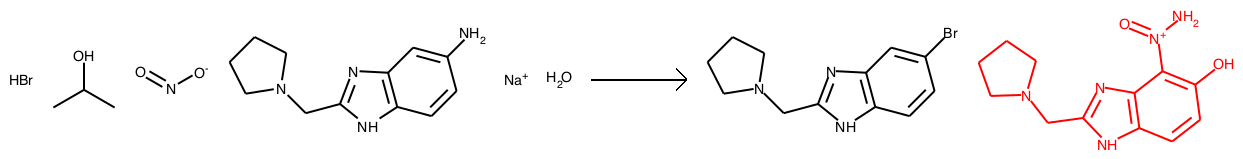

0
THIS IS TEST EXAMPLE 53 (1-indexed)
1
CS.CNc1ncc2cc(-c3cc(NC(=O)Nc4cc(C(C)(C)C)no4)ccc3C)c(=O)n(C)c2n1.C1CCOC1
CS.Cc1ccc(NC(=O)Nc2cc(C(C)(C)C)no2)cc1-c1cc2cnc(N)nc2n(C)c1=O.C.C1CCOC1
CS.C1CCOC1.Cc1ccc(N(C)C(=O)Nc2cc(C(C)(C)C)no2)cc1-c1cc2cnc(N)nc2n(C)c1=O
CS.C1CCOC1.Cc1ccc(NC(=O)N(C)c2cc(C(C)(C)C)no2)cc1-c1cc2cnc(N)nc2n(C)c1=O
CS.Cc1ccc(NC(=O)Nc2cc(C(C)(C)C)no2)cc1-c1cc2cnc(CN)nc2n(C)c1=O.C1CCOC1
[C:1]([CH3:2])([CH3:3])([CH3:4])[c:5]1[n:6][o:7][c:8]([NH:10][C:11](=[O:12])[NH:13][c:14]2[cH:15][c:16](-[c:21]3[cH:22][c:23]4[c:24]([n:25][c:26]([S:29][CH3:30])[n:27][cH:28]4)[n:31]([CH3:34])[c:32]3=[O:33])[c:17]([CH3:20])[cH:18][cH:19]2)[cH:9]1.[CH2:37]1[O:38][CH2:39][CH2:40][CH2:41]1.[CH3:35][NH2:36]>>[C:1]([CH3:2])([CH3:3])([CH3:4])[c:5]1[n:6][o:7][c:8]([NH:10][C:11](=[O:12])[NH:13][c:14]2[cH:15][c:16](-[c:21]3[cH:22][c:23]4[c:24]([n:25][c:26]([NH:36][CH3:35])[n:27][cH:28]4)[n:31]([CH3:34])[c:32]3=[O:33])[c:17]([CH3:20])[cH:18][cH:19]2)[cH:9]1
Prediction 1:    26.0-36.0-1.0   with score 

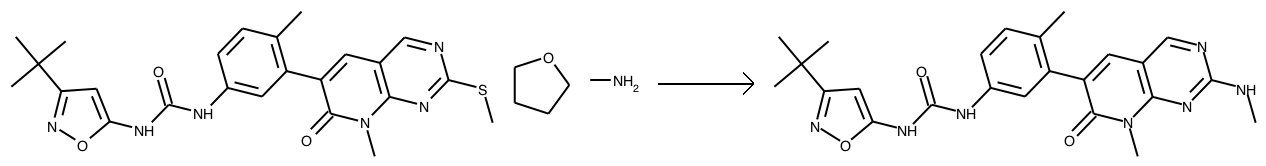

1
THIS IS TEST EXAMPLE 54 (1-indexed)
3
N#Cc1cc(F)c([N+](=O)[O-])c(F)c1.[Na+].O=S(=O)(O)O.[Cu]Br.N.CC(=O)O.[Br-]
O=N[O-].[Na+].O=S(=O)(O)O.[Cu]Br.N#Cc1cc(F)c(CC(=O)O)c(F)c1.N.[Br-]
O=N[O-].N#Cc1cc(F)c(Br)c(F)c1.[Na+].O=S(=O)(O)O.[Cu]Br.N.CC(=O)O
O=N[O-].[Na+].O=[SH](=O)O.N#Cc1cc(F)c(O)c(F)c1.N.[Cu]Br.CC(=O)O.[Br-]
O=N[O-].[Na+].O=[SH](=O)O.N#Cc1cc(F)c(O)c(F)c1.N.[Cu]Br.CC(=O)O.[Br-]
[BrH:25].[CH3:10][C:11](=[O:12])[OH:13].[Cu:26][Br:27].[N:6]([O-:7])=[O:8].[NH2:14][c:15]1[c:16]([F:24])[cH:17][c:18]([C:19]#[N:20])[cH:21][c:22]1[F:23].[Na+:9].[S:1](=[O:2])(=[O:3])([OH:4])[OH:5]>>[c:15]1([Br:25])[c:16]([F:24])[cH:17][c:18]([C:19]#[N:20])[cH:21][c:22]1[F:23]
Prediction 1:    14.0-15.0-0.0   with score 3.478912591934204
Prediction 2:    9.0-15.0-1.0    with score -1.3840384483337402
Prediction 3:    15.0-25.0-1.0   with score -1.3840384483337402
Prediction 4:    4.0-15.0-1.0    with score -3.322345733642578
Prediction 5:    5.0-15.0-1.0    with score -3.322345733642578
Prediction 6:    12.0

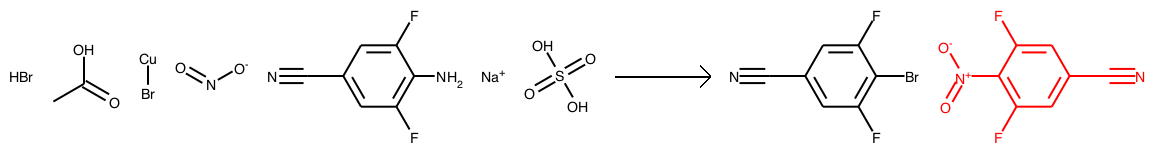

0
THIS IS TEST EXAMPLE 55 (1-indexed)
2
[Na+].Cl.O.CCO.NC(=NO)c1ccc(CN(C2CCCCNC2=O)S(=O)(=O)c2ccc(Cl)cc2)cc1.O=C(O)O
[Na+].Cl.O.CCO.N=C(NO)c1ccc(CN(C2CCCCNC2=O)S(=O)(=O)c2ccc(Cl)cc2)cc1.O=C(O)O
[Na+].N#Cc1ccc(CN(C2CCCCNC2=O)S(=O)(=O)c2ccc(Cl)cc2)cc1.Cl.O=C(O)NO.O.CCO.[O-]
[Na+].CCO.O=C(O)O.NC(c1ccc(CN(C2CCCCNC2=O)S(=O)(=O)c2ccc(Cl)cc2)cc1)=[N+]([O-])O.Cl
[Na+].NO.Cl.O=CO.O.CCO.NC(=O)c1ccc(CN(C2CCCCNC2=O)S(=O)(=O)c2ccc(Cl)cc2)cc1
[C:29](=[O:30])([OH:31])[O-:32].[CH3:37][CH2:38][OH:39].[Cl:1][c:2]1[cH:3][cH:4][c:5]([S:8](=[O:9])(=[O:10])[N:11]([CH:12]2[C:13](=[O:19])[NH:14][CH2:15][CH2:16][CH2:17][CH2:18]2)[CH2:20][c:21]2[cH:22][cH:23][c:24]([C:27]#[N:28])[cH:25][cH:26]2)[cH:6][cH:7]1.[ClH:34].[NH2:35][OH:36].[Na+:33].[OH2:40]>>[Cl:1][c:2]1[cH:3][cH:4][c:5]([S:8](=[O:9])(=[O:10])[N:11]([CH:12]2[C:13](=[O:19])[NH:14][CH2:15][CH2:16][CH2:17][CH2:18]2)[CH2:20][c:21]2[cH:22][cH:23][c:24]([C:27](=[NH:28])[NH:35][OH:36])[cH:25][cH:26]2)[cH:6][cH:7]1
Prediction 1:    27.0-28.0-2.0   with score 

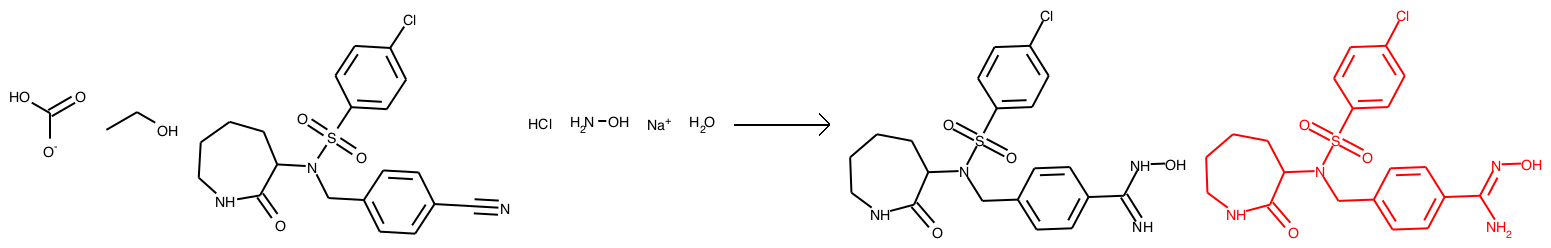

0
THIS IS TEST EXAMPLE 56 (1-indexed)
1
CC(C)NC(C)C.CO.[Li+].CC(=O)O.O=C1N(OCc2ccccc2)CCC12CCOc1ccc(F)cc12.C1CCOC1
O.CC(C)NC(C)C.COC(=O)C1(CCN(OCc2ccccc2)C(C)=O)CCOc2ccc(F)cc21.C1CCOC1.[Li+]
CC(=O)[N+]1(OCc2ccccc2)CCC2(CCOc3ccc(F)cc32)C1=O.CC(C)NC(C)C.CO.[Li+].O.C1CCOC1
C.CC(C)NC(C)C.[Li+].O.CC(=O)O.O=C1N(OCc2ccccc2)CCC12CCOc1ccc(F)cc12.C1CCOC1
CC(=O)[N+]1(OCc2ccccc2)CCC2(CCOc3ccc(F)cc32)C1=O.CC(C)NC(C)C.CO.[Li+].O.C1CCOC1
[CH3:35][C:36](=[O:37])[OH:38].[CH:27]([N-:28][CH:29]([CH3:30])[CH3:31])([CH3:32])[CH3:33].[F:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:26]1)[C:7]([C:11](=[O:12])[O:13][CH3:14])([CH2:15][CH2:16][NH:17][O:18][CH2:19][c:20]1[cH:21][cH:22][cH:23][cH:24][cH:25]1)[CH2:8][CH2:9][O:10]2.[Li+:34].[O:39]1[CH2:40][CH2:41][CH2:42][CH2:43]1>>[F:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:26]1)[C:7]1([CH2:8][CH2:9][O:10]2)[C:11](=[O:12])[N:17]([O:18][CH2:19][c:20]2[cH:21][cH:22][cH:23][cH:24][cH:25]2)[CH2:16][CH2:15]1
Prediction 1:    11.0-13.0-0.0   with score 0.8512749075889587
Prediction 2:

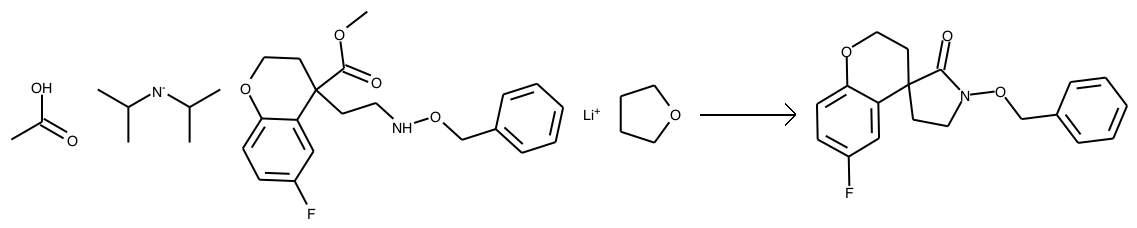

1
THIS IS TEST EXAMPLE 57 (1-indexed)
1
Oc1ccccc1.COc1nc(C)c(C)nc1NC(=S)N1CCN(c2cc(Cl)cc(Cl)c2)CC1
Oc1ccccc1.COc1nc(C)c(C)nc1NCN1CCN(c2cc(Cl)cc(Cl)c2)CC1.S
Clc1cc(Cl)cc(N2CCNCC2)c1.COc1nc(C)c(C)nc1NC=S.Oc1ccccc1
S.Clc1cc(Cl)cc(N2CCNCC2)c1.Oc1ccccc1.CNc1nc(C)c(C)nc1OC
c1ccccc1.COc1nc(C)c(C)nc1NC(=S)N1CCN(c2cc(Cl)cc(Cl)c2)CC1.O
[CH3:1][c:2]1[n:3][c:4]([NH:11][C:12]([O:13][c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)=[S:20])[c:5]([O:9][CH3:10])[n:6][c:7]1[CH3:8].[Cl:21][c:22]1[cH:23][c:24]([N:29]2[CH2:30][CH2:31][NH:32][CH2:33][CH2:34]2)[cH:25][c:26]([Cl:28])[cH:27]1>>[CH3:1][c:2]1[n:3][c:4]([NH:11][C:12](=[S:20])[N:32]2[CH2:31][CH2:30][N:29]([c:24]3[cH:23][c:22]([Cl:21])[cH:27][c:26]([Cl:28])[cH:25]3)[CH2:34][CH2:33]2)[c:5]([O:9][CH3:10])[n:6][c:7]1[CH3:8]
Prediction 1:    12.0-13.0-0.0   with score 5.414308547973633
Prediction 2:    12.0-32.0-1.0   with score 3.4031119346618652
Prediction 3:    5.0-9.0-0.0     with score -3.497938632965088
Prediction 4:    13.0-14.0-0.0   with score -3.8

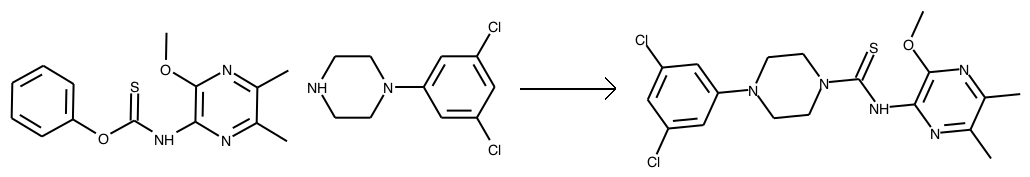

1
THIS IS TEST EXAMPLE 58 (1-indexed)
1
CCO.Cl.O.CCC(=C(c1ccccc1)c1ccc(N(CCN(CC)CC)S(C)(=O)=O)cc1)c1ccc(OC)cc1.CC(C)O
Cl.CC.CCN(CC)CCN(c1ccc(C(=Cc2ccc(OC)cc2)c2ccccc2)cc1)S(C)(=O)=O.O.CCO.CC(C)O
CC.CCO.Cl.CCN(CC)CCN(c1ccc(C(O)(Cc2ccc(OC)cc2)c2ccccc2)cc1)S(C)(=O)=O.CC(C)O
CCO.Cl.CCC(c1ccc(OC)cc1)C(O)(c1ccccc1)c1ccc(NCCN(CC)CC)cc1.C[SH](=O)=O.CC(C)O
CCO.Cl.CCC(c1ccc(OC)cc1)C(c1ccccc1)c1ccc(N(CCN(CC)CC)S(C)(=O)=O)cc1.O.CC(C)O
[CH2:2]([CH3:3])[N:4]([CH2:5][CH2:6][N:7]([c:8]1[cH:9][cH:10][c:11]([C:14]([CH:15]([CH2:16][CH3:17])[c:18]2[cH:19][cH:20][c:21]([O:24][CH3:25])[cH:22][cH:23]2)([c:26]2[cH:27][cH:28][cH:29][cH:30][cH:31]2)[OH:32])[cH:12][cH:13]1)[S:33](=[O:34])(=[O:35])[CH3:36])[CH2:37][CH3:38].[CH3:40][CH2:41][OH:42].[CH:43]([OH:44])([CH3:45])[CH3:46].[ClH:1].[ClH:39]>>[CH2:2]([CH3:3])[N:4]([CH2:5][CH2:6][N:7]([c:8]1[cH:9][cH:10][c:11]([C:14](=[C:15]([CH2:16][CH3:17])[c:18]2[cH:19][cH:20][c:21]([O:24][CH3:25])[cH:22][cH:23]2)[c:26]2[cH:27][cH:28][cH:29][cH:30][cH:31]2)[cH:12][cH:13]1

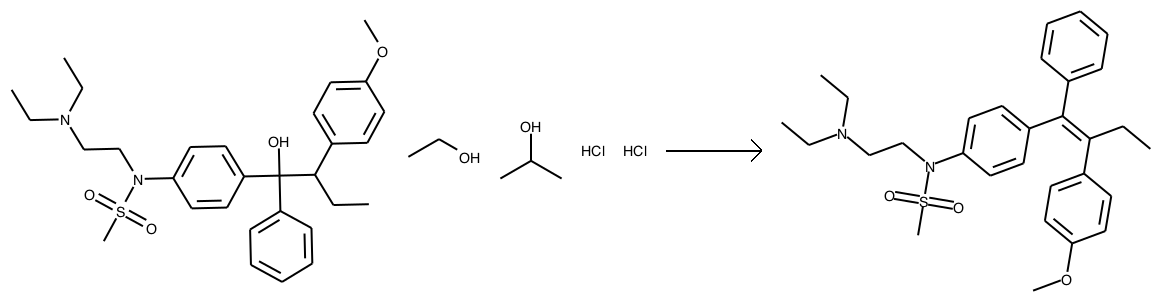

1
THIS IS TEST EXAMPLE 59 (1-indexed)
1
[Na+].OB(O)O.O=C([O-])O.[Br-].Cc1ccccc1.O=C(NCC(F)(F)F)C1(CCCCN2CCN(c3ccc4cccc(-c5ccccc5)c4n3)CC2)c2ccccc2-c2ccccc21
[Na+].Brc1ccccc1.OB(O)O.Cc1ccccc1.O=C([O-])O.O=C(NCC(F)(F)F)C1(CCCCN2CCN(c3ccc4ccccc4n3)CC2)c2ccccc2-c2ccccc21
[Na+].O=C(NCC(F)(F)F)C1(CCCCN2CCN(c3ccc4cccc(Br)c4n3)CC2)c2ccccc2-c2ccccc21.c1ccccc1.OB(O)O.O=C([O-])O.Cc1ccccc1
O=C(N(CC(F)(F)F)c1ccccc1)C1(CCCCN2CCN(c3ccc4cccc(Br)c4n3)CC2)c2ccccc2-c2ccccc21.OB(O)O.[Na+].Cc1ccccc1.O=C([O-])O
[Na+].OB(O)O.O=C(NCC(F)(F)F)C1(CCCCN2CC[N+](c3ccccc3)(c3ccc4cccc(Br)c4n3)CC2)c2ccccc2-c2ccccc21.Cc1ccccc1.O=C([O-])O
[CH3:59][c:60]1[cH:61][cH:62][cH:63][cH:64][cH:65]1.[F:1][C:2]([CH2:3][NH:4][C:5](=[O:6])[C:7]1([CH2:20][CH2:21][CH2:22][CH2:23][N:24]2[CH2:25][CH2:26][N:27]([c:30]3[n:31][c:32]4[c:33]([Br:40])[cH:34][cH:35][cH:36][c:37]4[cH:38][cH:39]3)[CH2:28][CH2:29]2)[c:8]2[cH:9][cH:10][cH:11][cH:12][c:13]2-[c:14]2[cH:15][cH:16][cH:17][cH:18][c:19]21)([F:41])[F:42].[Na+:53].[Na+:54].[O-:55][C:56](=

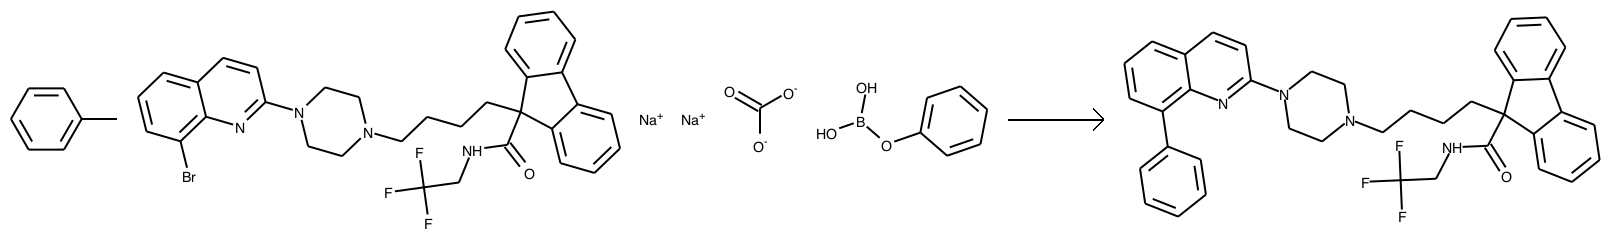

1
THIS IS TEST EXAMPLE 60 (1-indexed)
1
[F-].[Na+].CCOC(C)=O.COCCOCCSc1ccc(S(N)(=O)=O)cc1[N+](=O)[O-].[H-].O.C1CCOC1
[F-].NS(=O)(=O)c1ccc(SCCCCO)c([N+](=O)[O-])c1.[Na+].CCOCCOC.CCOC(C)=O.[H-].O
[F-].[Na+].CCOC(C)=O.[H-].O.COCCOCCNS(=O)(=O)c1ccc(S)c([N+](=O)[O-])c1.C1CCOC1
NS(=O)(=O)c1ccc(S)c([N+](=O)[O-])c1.[Na+].CCOCCOC.[F-].CCOC(C)=O.[H-].O.C1CCOC1
[F-].[Na+].CCOCCOC.CCOC(C)=O.[H-].NS(=O)(=O)c1ccc(SC2CCCO2)c([N+](=O)[O-])c1.O
[CH3:31][CH2:32][O:33][C:34](=[O:35])[CH3:36].[CH3:3][O:4][CH2:5][CH2:6][O:7][CH2:8][CH2:9][SH:10].[F:11][c:12]1[c:13]([N+:22](=[O:23])[O-:24])[cH:14][c:15]([S:18](=[O:19])(=[O:20])[NH2:21])[cH:16][cH:17]1.[H-:1].[Na+:2].[O:26]1[CH2:27][CH2:28][CH2:29][CH2:30]1.[OH2:25]>>[CH3:3][O:4][CH2:5][CH2:6][O:7][CH2:8][CH2:9][S:10][c:12]1[c:13]([N+:22](=[O:23])[O-:24])[cH:14][c:15]([S:18](=[O:19])(=[O:20])[NH2:21])[cH:16][cH:17]1
Prediction 1:    11.0-12.0-0.0   with score 7.934547424316406
Prediction 2:    10.0-12.0-1.0   with score 6.712373733520508
Prediction 3:    9.0

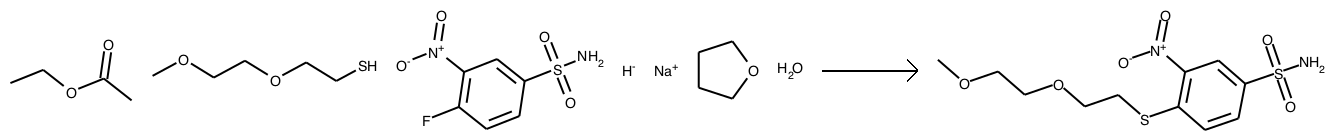

1
THIS IS TEST EXAMPLE 61 (1-indexed)
11
B.[Na].CSC.CCOC(=O)N1CCN(c2c(F)cc([N+](=O)[O-])c(F)c2C(=O)O)CC1.Cl
CS(C)=O.B.[Na].CCOC(=O)N1CCN(c2c(F)cc([N+](=O)[O-])c(F)c2CO)CC1.Cl
CCOC(=O)N1CCN(c2c(F)cc([N+](=O)[O-])c(F)c2C(O)O)CC1.B.[Na].CSC.Cl
[F-].B.Cl.CCOC(=O)N1CCN(c2c(F)cc([N+](=O)[O-])c3c2CO3)CC1.[Na].CS(C)=O
CCOC(=O)N1CCN(c2c(F)cc([N+](=O)[O-])c(F)c2C(=O)Cl)CC1.Cl.[Na].O.B.CSC
[BH3:25].[CH3:29][S:30]([CH3:31])=[O:32].[ClH:28].[F:1][c:2]1[c:3]([N:14]2[CH2:15][CH2:16][N:17]([C:20](=[O:21])[O:22][CH2:23][CH3:24])[CH2:18][CH2:19]2)[c:4]([CH2:5][Cl:6])[c:7]([F:13])[c:8]([N+:10](=[O:11])[O-:12])[cH:9]1.[Na:26].[OH2:27]>>[F:1][c:2]1[c:3]([N:14]2[CH2:15][CH2:16][N:17]([C:20](=[O:21])[O:22][CH2:23][CH3:24])[CH2:18][CH2:19]2)[c:4]([CH3:5])[c:7]([F:13])[c:8]([N+:10](=[O:11])[O-:12])[cH:9]1
Prediction 1:    5.0-6.0-0.0     with score 3.025627374649048
Prediction 2:    5.0-25.0-1.0    with score -1.5107622146606445
Prediction 3:    5.0-26.0-1.0    with score -1.5107622146606445
Prediction 4:    5

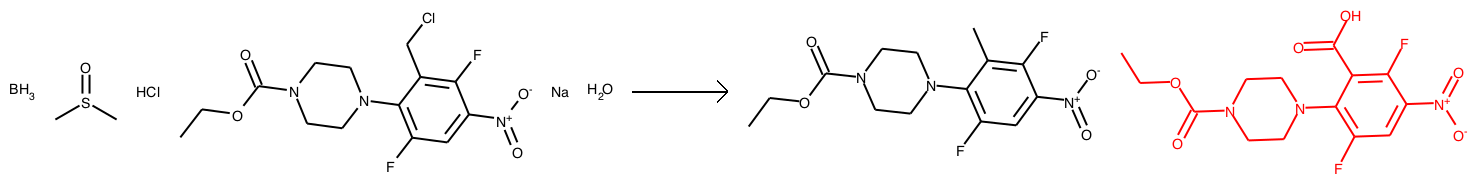

0
THIS IS TEST EXAMPLE 62 (1-indexed)
11
COC(=O)C(CC(=O)c1ccc(Br)cc1)C(O)CCCCCCCCCCCC(C)C.[O-].[Li+].[Br-].O
[O-].COC(=O)CC(CCCCCCCCCCCC(C)C)OCC(=O)c1ccc(Br)cc1.[Br-].[Li+].O
CC(=O)c1ccc(Br)cc1.[O-].[Li+].O.COC(=O)CC(O)CCCCCCCCCCCC(C)C.[Br-]
COC(=O)C(Br)C(O)CCCCCCCCCCCC(C)C.CC(=O)c1ccc(Br)cc1.[Li+].[O-].O
COC(=O)CC(O)CCCCCCCCCCCC(C)C.OC(CBr)c1ccc(Br)cc1.[Li+].[O-].O
[Br:25][CH2:26][C:27](=[O:28])[c:29]1[cH:30][cH:31][c:32]([Br:35])[cH:33][cH:34]1.[Li+:23].[OH-:22].[OH2:24].[OH:1][CH:2]([CH2:3][C:4](=[O:5])[O:6][CH3:7])[CH2:8][CH2:9][CH2:10][CH2:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][CH2:18][CH:19]([CH3:20])[CH3:21]>>[OH:1][CH:2]([CH2:3][C:4](=[O:5])[O:6][CH2:7][C:27](=[O:28])[c:29]1[cH:30][cH:31][c:32]([Br:35])[cH:33][cH:34]1)[CH2:8][CH2:9][CH2:10][CH2:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][CH2:18][CH:19]([CH3:20])[CH3:21]
Prediction 1:    25.0-26.0-0.0   with score 0.9785494208335876
Prediction 2:    3.0-26.0-1.0    with score -0.3794754147529602
Prediction 3

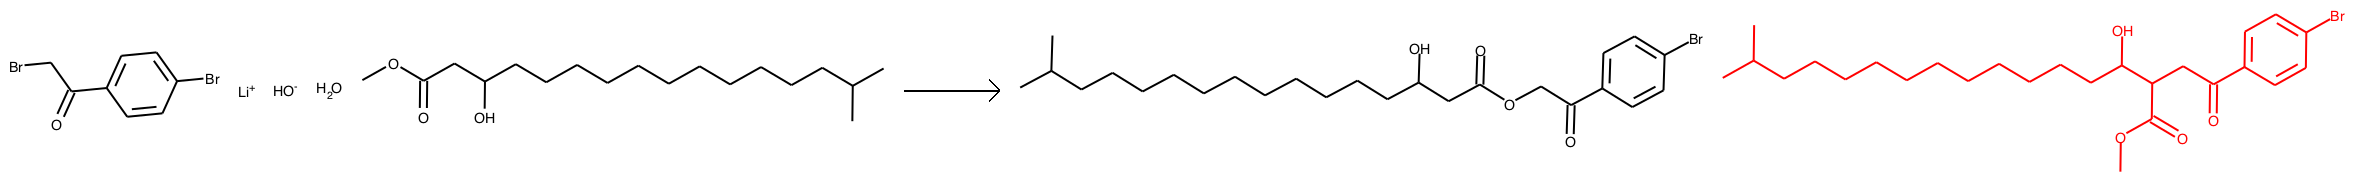

0
THIS IS TEST EXAMPLE 63 (1-indexed)
1
CCN(CC)CC.O=C(Nc1ccc(OCc2ccccc2)cc1)C1CC1.ClCCl.Cl
CCN(CC)CC.O=C(Nc1ccc(OCc2ccccc2)cc1)C1CC1.ClCCl.Cl
CCN(CC)CC.O=C(Nc1ccc(OCc2ccccc2)cc1)C1CC1.ClCCl.Cl
CCN(CC)CC.ClCCl.O=C(C1CC1)N(Cl)c1ccc(OCc2ccccc2)cc1.Cl
CCN(CC)CC.ClCCl.O=C(C1CC1)N(Cl)c1ccc(OCc2ccccc2)cc1.Cl
[C:1](=[O:2])([Cl:3])[Cl:4].[CH2:5]1[CH2:6][CH2:7]1.[CH2:9]([c:10]1[cH:11][cH:12][cH:13][cH:14][cH:15]1)[O:16][c:17]1[cH:18][cH:19][c:20]([NH2:21])[cH:22][cH:23]1.[CH3:24][CH2:25][N:26]([CH2:27][CH3:28])[CH2:29][CH3:30].[Cl:31][CH2:32][Cl:33].[ClH:34].[ClH:8]>>[C:1](=[O:2])([CH:5]1[CH2:6][CH2:7]1)[NH:21][c:20]1[cH:19][cH:18][c:17]([O:16][CH2:9][c:10]2[cH:11][cH:12][cH:13][cH:14][cH:15]2)[cH:23][cH:22]1
Prediction 1:    1.0-21.0-1.0    with score 2.865889072418213
Prediction 2:    1.0-4.0-0.0     with score 2.108818769454956
Prediction 3:    1.0-3.0-0.0     with score 2.108818531036377
Prediction 4:    1.0-5.0-1.0     with score -2.136542797088623
Prediction 5:    1.0-6.0-1.0     with scor

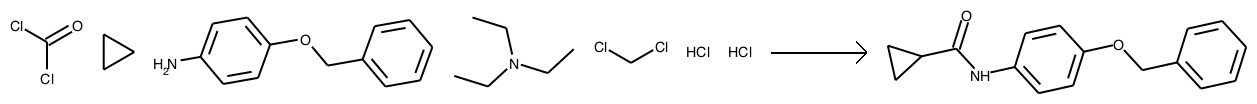

1
THIS IS TEST EXAMPLE 64 (1-indexed)
11
CC(C)=O.[Na+].O=c1cccc[nH]1.Cl.[H-].CC1(C)N=C(Oc2ccc(C#N)cc2C(N)=O)c2cc(C#N)ccc2O1.N#N.CN(C)C=O
CC(C)=O.[Na+].Cl.[H-].CC1(C)N=C(n2ccccc2=O)c2cc(C#N)ccc2O1.N#N.CN(C)C=O.N#Cc1ccc(O)c(C(N)=O)c1
CC(C)=O.[Na+].Cl.[H-].CC(C)(N=C(Oc1ccc(C#N)cc1C(N)=O)n1ccccc1=O)Oc1ccc(C#N)cc1.N#N.CN(C)C=O
CC(C)=O.[Na+].Cl.[H-].N#Cc1cccc(C(N)=O)c1.CC(C)(N=C(O)n1ccccc1=O)Oc1ccc(C#N)cc1.N#N.CN(C)C=O
CC(C)=O.[Na+].O=c1cccc[nH]1.Cl.[H-].N#N.CC1(C)NC(Oc2ccc(C#N)cc2C(N)=O)c2cc(C#N)ccc2O1.CN(C)C=O
[C:27]([c:28]1[cH:29][cH:30][c:31]([OH:32])[c:33]([C:35]([NH2:36])=[O:37])[cH:34]1)#[N:38].[CH3:12][C:13]1([CH3:26])[O:14][c:15]2[c:16]([cH:20][c:21]([C:24]#[N:25])[cH:22][cH:23]2)[C:17]([Cl:19])=[N:18]1.[CH3:44][C:45](=[O:46])[CH3:47].[H-:9].[N:10]#[N:11].[Na+:8].[O:39]=[CH:40][N:41]([CH3:42])[CH3:43].[nH:1]1[cH:2][cH:3][cH:4][cH:5][c:6]1=[O:7]>>[O:7]=[C:17]1[c:16]2[c:15]([cH:23][cH:22][c:21]([C:24]#[N:25])[cH:20]2)[O:14][C:13]([CH3:12])([CH3:26])[NH:18]1
Prediction 1:    17.0-19.0-

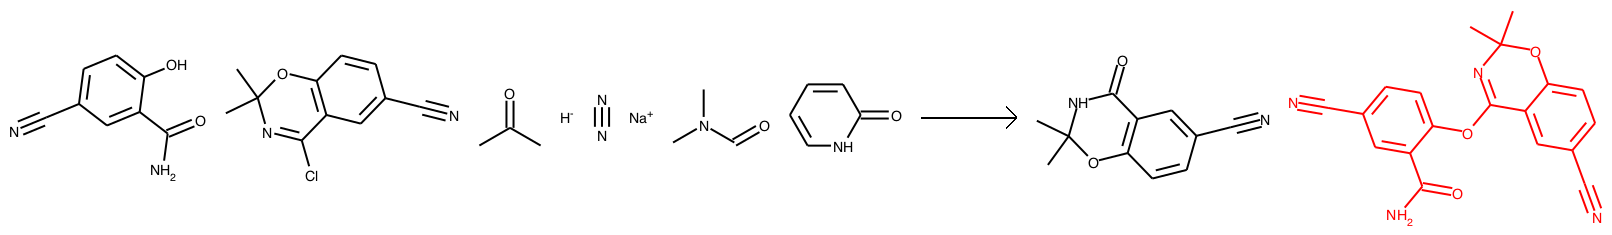

0
THIS IS TEST EXAMPLE 65 (1-indexed)
11
O=[SH](=O)O.COc1cc(CC(C)(C)NC(=O)c2ccccc2)cc2c1OC1(CCCC1)C2.CC(=O)O.Cc1ccccc1.N
O=[SH](=O)O.COc1cc(CC(C)(C)NC(=O)c2ccccc2)cc2c1OC1(CCCC1)C2.CC(=O)O.Cc1ccccc1.N
O=[SH](=O)O.N.CC(=O)O.Cc1ccccc1.COc1cc(C=C(C)C)c(C(=O)c2ccccc2)c2c1OC1(CCCC1)C2
O=[SH](=O)O.N.CC(=O)O.Cc1ccccc1.COc1cc(C=C(C)C)c(C(=O)c2ccccc2)c2c1OC1(CCCC1)C2
O=[SH](=O)O.N.CC(=O)O.Cc1ccccc1.COc1cc(C(C(=O)c2ccccc2)C(C)C)cc2c1OC1(CCCC1)C2
[CH3:14][O:15][c:16]1[cH:17][c:18]([CH:29]=[C:30]([CH3:31])[CH3:32])[cH:19][c:20]2[c:24]1[O:23][C:22]1([CH2:21]2)[CH2:25][CH2:26][CH2:27][CH2:28]1.[CH3:34][c:35]1[cH:36][cH:37][cH:38][cH:39][cH:40]1.[CH3:41][C:42](=[O:43])[OH:44].[N:1]#[C:2][c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1.[NH3:33].[S:9](=[O:10])(=[O:11])([OH:12])[OH:13]>>[N:1]1=[C:2]([c:3]2[cH:4][cH:5][cH:6][cH:7][cH:8]2)[c:19]2[c:18]([cH:17][c:16]([O:15][CH3:14])[c:24]3[c:20]2[CH2:21][C:22]2([O:23]3)[CH2:25][CH2:26][CH2:27][CH2:28]2)[CH2:29][C:30]1([CH3:31])[CH3:32]
Prediction 1:    29.0-30.0-1.0 

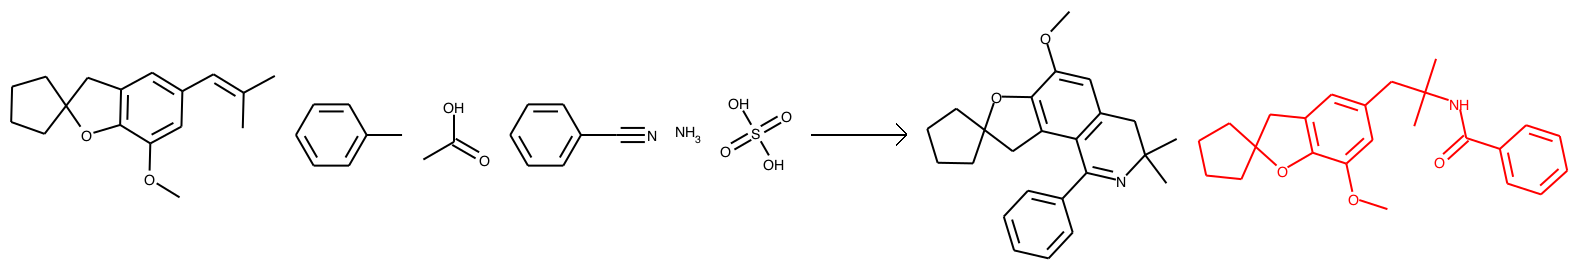

0
THIS IS TEST EXAMPLE 66 (1-indexed)
1
[Br-].CCOC(=O)C(O)(c1ccccn1)C1CC1.[Mg+].C1CCOC1
[Mg+].CCOC(=O)C(c1ccccn1)C1CC1.[Br-].O.C1CCOC1
CCOC(=O)C(=O)C1CC1.[Br-].[Mg+].C1CCOC1.c1ccncc1
CCOC(=O)C(O)C1CC1.[Br-].[Mg+].C1CCOC1.c1ccncc1
[Br-].[Mg+].O=C(c1ccccn1)C1CC1.CCOC=O.C1CCOC1
[Br-:19].[CH2:14]1[CH2:15][CH2:16][CH2:17][O:18]1.[CH:20]1([Mg+:21])[CH2:22][CH2:23]1.[n:1]1[c:2]([C:7]([C:8](=[O:9])[O:10][CH2:11][CH3:12])=[O:13])[cH:3][cH:4][cH:5][cH:6]1>>[n:1]1[c:2]([C:7]([C:8](=[O:9])[O:10][CH2:11][CH3:12])([OH:13])[CH:15]2[CH2:16][CH2:17]2)[cH:3][cH:4][cH:5][cH:6]1
Prediction 1:    20.0-21.0-0.0   with score 4.610929489135742
Prediction 2:    7.0-20.0-1.0    with score 4.468429088592529
Prediction 3:    7.0-13.0-1.0    with score 0.30551648139953613
Prediction 4:    7.0-13.0-0.0    with score -1.292013168334961
Prediction 5:    8.0-10.0-2.0    with score -5.748946189880371
Prediction 6:    10.0-11.0-0.0   with score -5.753990173339844
Prediction 7:    8.0-9.0-1.0     with score -5.7598533630

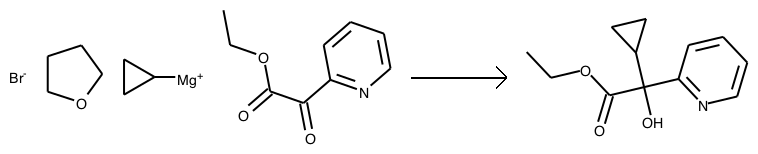

1
THIS IS TEST EXAMPLE 67 (1-indexed)
2
[Cu]I.COC(=O)c1cncc(C#C[Si](C)(C)C)c1.[Br-].[K+].O=C([O-])O
C[SiH](C)C.C#Cc1cncc(C(=O)OC)c1.[Cu]I.[K+].O=C([O-])O.[Br-]
C#C[Si](C)(C)C.[O-].[Cu]I.COC(=O)c1cncc(C(=O)O)c1.[K+].[Br-]
C#C[Si](C)(C)C.[O-].[Cu]I.COC(=O)c1cncc(C(=O)O)c1.[K+].[Br-]
C#C[Si](C)(C)C.O.[Cu]I.[K+].COC(=O)c1cncc(C([O-])[O-])c1.[Br-]
[Br:1][c:2]1[cH:3][n:4][cH:5][c:6]([C:7](=[O:8])[O:9][CH3:10])[cH:11]1.[C:12](#[CH:13])[Si:14]([CH3:15])([CH3:16])[CH3:17].[C:18](=[O:19])([O-:20])[O-:21].[Cu:24][I:25].[K+:22].[K+:23]>>[c:2]1([C:12]#[CH:13])[cH:3][n:4][cH:5][c:6]([C:7](=[O:8])[O:9][CH3:10])[cH:11]1
Prediction 1:    1.0-2.0-0.0     with score 7.258569240570068
Prediction 2:    2.0-12.0-1.0    with score -0.7342958450317383
Prediction 3:    2.0-13.0-1.0    with score -1.4658522605895996
Prediction 4:    12.0-14.0-0.0   with score -2.5226047039031982
Prediction 5:    2.0-18.0-1.0    with score -5.709261894226074
Prediction 6:    2.0-22.0-1.0    with score -8.383101463317871
Predicti

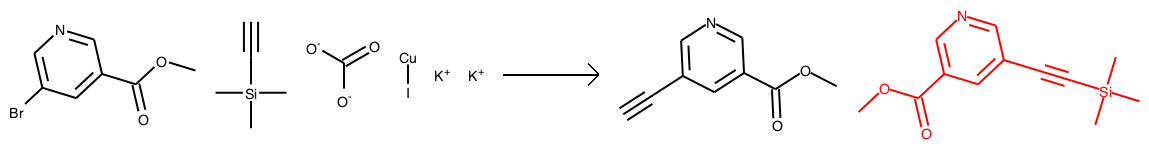

0
THIS IS TEST EXAMPLE 68 (1-indexed)
1
[Li+].[Na+].CCOC(C)=O.[H-].O.[Al+3].Fc1ccc(CCN2CCC(N3CCc4ccccc43)CC2)cc1F.C1CCOC1.[O-]
[Li+].[Na+].CCOC(C)=O.[H-].O.[Al+3].O=C(Cc1ccc(F)c(F)c1)N1CCC(N2CCc3ccccc32)CC1.[O-].C1CCOC1
[Li+].[Na+].CCOC(C)=O.[H-].O.[Al+3].O=C(Cc1ccc(F)c(F)c1)N1CCC(N2CCc3ccccc32)CC1.[O-].C1CCOC1
OCCc1ccc(F)c(F)c1.[H-].[Na+].CCOC(C)=O.c1ccc2c(c1)CCN2C1CCNCC1.[Li+].O.[Al+3].[O-].C1CCOC1
OCCc1ccc(F)c(F)c1.[H-].[Na+].CCOC(C)=O.c1ccc2c(c1)CCN2C1CCNCC1.[Li+].O.[Al+3].[O-].C1CCOC1
[Al+3:29].[CH3:41][CH2:42][O:43][C:44](=[O:45])[CH3:46].[F:1][c:2]1[cH:3][c:4]([CH2:9][C:10]([OH:11])=[O:12])[cH:5][cH:6][c:7]1[F:8].[H-:28].[H-:31].[H-:32].[H-:33].[Li+:30].[NH:13]1[CH2:14][CH2:15][CH:16]([N:19]2[CH2:20][CH2:21][c:22]3[cH:23][cH:24][cH:25][cH:26][c:27]32)[CH2:17][CH2:18]1.[Na+:35].[O:36]1[CH2:37][CH2:38][CH2:39][CH2:40]1.[OH-:34].[OH2:47]>>[F:1][c:2]1[cH:3][c:4]([CH2:9][CH2:10][N:13]2[CH2:14][CH2:15][CH:16]([N:19]3[CH2:20][CH2:21][c:22]4[cH:23][cH:24][cH:25][cH:26][c:27]43)[CH2:17][

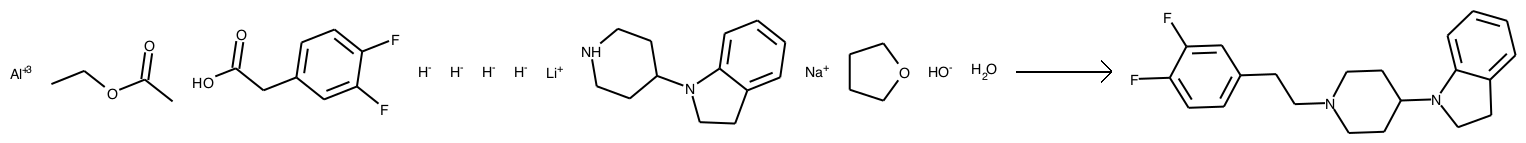

1
THIS IS TEST EXAMPLE 69 (1-indexed)
1
[F-].[Na+].Cl.CSc1ccc(S(C)(=O)=O)cc1C(=O)O.[Cs+].O=C([O-])O.CN(C)C=O
[F-].C.[Na+].Cl.CS(=O)(=O)c1ccc([S-])c(C(=O)O)c1.[Cs+].O=C([O-])O.CN(C)C=O
[F-].[Na+].Cl.CN(C)C=O.[Cs+].CS(=O)(=O)c1ccc(C(=O)O)c(C(=O)O)c1.C[S-].[O-]
[F-].[Na+].Cl.CN(C)C=O.[Cs+].CS(=O)(=O)c1ccc(C(=O)O)c(C(=O)O)c1.C[S-].[O-]
[F-].[Na+].Cl.[O-].[Cs+].CS(=O)(=O)c1ccc(C=O)c(C(=O)O)c1.CN(C)C=O.C[S-]
[C:15](=[O:16])([O-:17])[O-:18].[CH3:21][S-:22].[CH3:25][N:26]([CH3:27])[CH:28]=[O:29].[ClH:24].[Cs+:19].[Cs+:20].[F:1][c:2]1[c:3]([C:4](=[O:5])[OH:6])[cH:7][c:8]([S:11](=[O:12])(=[O:13])[CH3:14])[cH:9][cH:10]1.[Na+:23]>>[c:2]1([S:22][CH3:21])[c:3]([C:4](=[O:5])[OH:6])[cH:7][c:8]([S:11](=[O:12])(=[O:13])[CH3:14])[cH:9][cH:10]1
Prediction 1:    1.0-2.0-0.0     with score 8.62454605102539
Prediction 2:    2.0-22.0-1.0    with score 6.405946731567383
Prediction 3:    8.0-11.0-0.0    with score -4.737521648406982
Prediction 4:    8.0-15.0-1.0    with score -4.93259859085083
Prediction 5:    

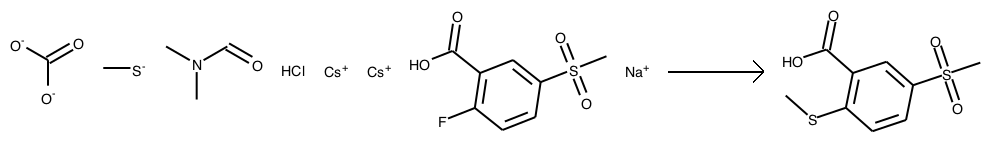

1
THIS IS TEST EXAMPLE 70 (1-indexed)
2
C[SiH](C)C.O=P1(c2ccccc2)NCc2ccccc21.Cl.C1CCCCC1.[Li]CCCC.CN(C)CCN(C)C.CCCCCC
C[SiH](C)C.O=P1(c2ccccc2)NCc2ccccc21.Cl.C1CCCCC1.[Li]CCCC.CN(C)CCN(C)C.CCCCCC
Cl.C1CCCCC1.[Li]CCCC.CN(C)CCN(C)C.C[Si](C)(C)N1Cc2ccccc2P1(=O)c1ccccc1.CCCCCC
Cl.C1CCCCC1.[Li]CCCC.CN(C)CCN(C)C.C[Si](C)(C)N1Cc2ccccc2P1(=O)c1ccccc1.CCCCCC
CCCCCC.C[Si](C)(C)N(Cc1ccccc1)P(=O)(c1ccccc1)C1CCCCC1.[Li]CCCC.CN(C)CCN(C)C.Cl
[CH2:1]([Li:2])[CH2:3][CH2:4][CH3:5].[CH2:42]1[CH2:43][CH2:44][CH2:45][CH2:46][CH2:47]1.[CH3:14][Si:15]([NH:16][CH2:17][c:18]1[cH:19][cH:20][cH:21][cH:22][cH:23]1)([CH3:24])[CH3:25].[CH3:36][CH2:37][CH2:38][CH2:39][CH2:40][CH3:41].[CH3:6][N:7]([CH3:8])[CH2:9][CH2:10][N:11]([CH3:12])[CH3:13].[c:26]1([P:32](=[O:33])([Cl:34])[Cl:35])[cH:27][cH:28][cH:29][cH:30][cH:31]1>>[CH3:14][Si:15]([N:16]1[CH2:17][c:18]2[c:19]([cH:20][cH:21][cH:22][cH:23]2)[P:32]1([c:26]1[cH:27][cH:28][cH:29][cH:30][cH:31]1)=[O:33])([CH3:24])[CH3:25]
Prediction 1:    16.0-32.0-1.0   with score 3

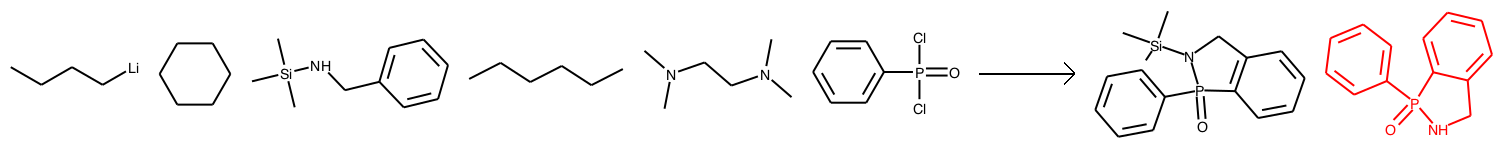

0
THIS IS TEST EXAMPLE 71 (1-indexed)
1
Cc1ccc(S(=O)(=O)O)cc1.NNc1ccccc1.CC(N)C(=O)OCc1ccccc1.O.Cc1ccccc1
Cc1ccc(S(=O)(=O)O)cc1.NN(Cc1ccccc1)c1ccccc1.CC(N)C(=O)O.O.Cc1ccccc1
Cc1ccc(S(=O)(=O)O)cc1.NNc1ccccc1.CC(N)C(=O)OCc1ccccc1.O.Cc1ccccc1
c1ccc(CNc2ccccc2)cc1.Cc1ccc(S(=O)(=O)O)cc1.O.N.CC(N)C(=O)O.Cc1ccccc1
CC(NCc1ccccc1)C(=O)O.NNc1ccccc1.Cc1ccc(S(=O)(=O)O)cc1.O.Cc1ccccc1
[CH3:1][CH:2]([NH2:3])[C:4]([OH:5])=[O:6].[CH3:36][c:37]1[cH:38][cH:39][cH:40][cH:41][cH:42]1.[NH2:27][NH:28][c:29]1[cH:30][cH:31][cH:32][cH:33][cH:34]1.[OH2:15].[OH2:35].[OH:7][CH2:8][c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1.[c:16]1([CH3:26])[cH:17][cH:18][c:19]([S:22](=[O:23])(=[O:24])[OH:25])[cH:20][cH:21]1>>[CH3:1][CH:2]([NH2:3])[C:4](=[O:5])[O:6][CH2:8][c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1.[c:16]1([CH3:26])[cH:17][cH:18][c:19]([S:22](=[O:23])(=[O:24])[OH:25])[cH:20][cH:21]1
Prediction 1:    7.0-8.0-0.0     with score 1.4973020553588867
Prediction 2:    4.0-27.0-1.0    with score -0.7277780175209045
Predicti

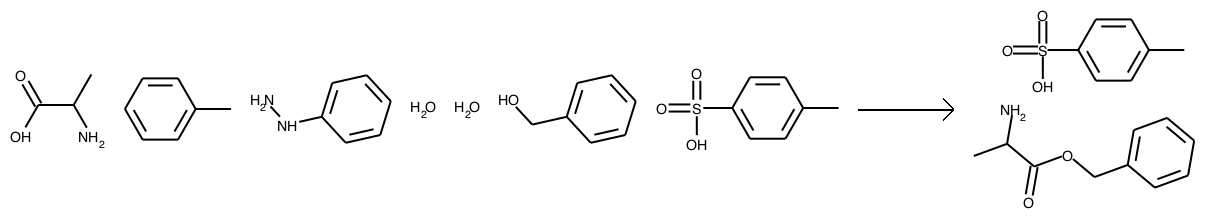

1
THIS IS TEST EXAMPLE 72 (1-indexed)
11
O=C([O-])C(=O)O.O=C1CCCN1CCOc1ccc(-c2sc3ccccc3c2Cc2ccc(OCCN3CCCC3)cc2)cc1.O.C1CCOC1
O=C([O-])C(=O)O.O=C1CCCN1CCOc1ccc(-c2sc3ccccc3c2Cc2ccc(OCCN3CCCC3)cc2)cc1.O.C1CCOC1
O=C([O-])C(=O)O.O=C1CCCN1CCc1ccc(-c2sc3ccccc3c2Cc2ccc(OCCN3CCCC3)cc2)cc1.O.C1CCOC1
O=C([O-])C(=O)O.O=C1CCCN1CC(O)Oc1ccc(-c2sc3ccccc3c2Cc2ccc(OCCN3CCCC3)cc2)cc1.C1CCOC1
O=C([O-])C(=O)O.c1ccc(-c2sc3ccccc3c2Cc2ccc(OCCN3CCCC3)cc2)cc1.O.C1CCOC1.O=C1CCCN1CCO
[C:41]([C:42](=[O:43])[O-:44])(=[O:45])[O-:46].[CH2:47]1[O:48][CH2:49][CH2:50][CH2:51]1.[OH:1][c:2]1[cH:3][cH:4][c:5](-[c:8]2[c:9]([CH2:17][c:18]3[cH:19][cH:20][c:21]([O:24][CH2:25][CH2:26][N:27]4[CH2:28][CH2:29][CH2:30][CH2:31]4)[cH:22][cH:23]3)[c:10]3[c:11]([s:12]2)[cH:13][cH:14][cH:15][cH:16]3)[cH:6][cH:7]1.[OH:32][CH2:33][CH2:34][N:35]1[C:36](=[O:40])[CH2:37][CH2:38][CH2:39]1>>[C:41]([C:42](=[O:43])[OH:44])(=[O:45])[OH:46].[O:1]([c:2]1[cH:3][cH:4][c:5](-[c:8]2[c:9]([CH2:17][c:18]3[cH:19][cH:20][c:21]([O:24][CH2:25][CH2:26][N:27]

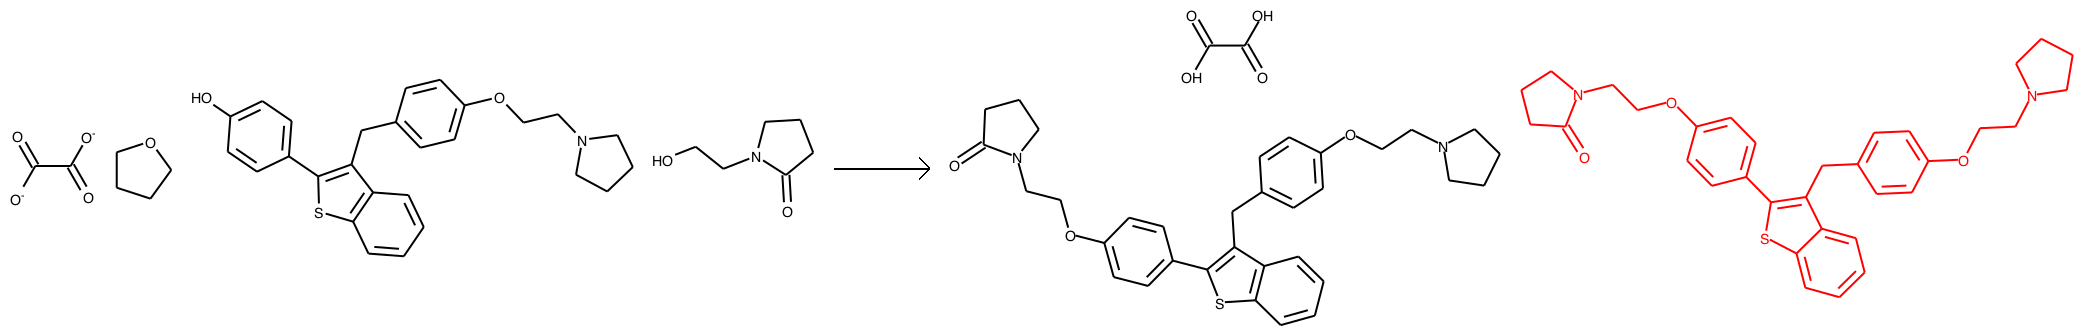

0
THIS IS TEST EXAMPLE 73 (1-indexed)
11
CCOP(=O)(C=COS(=O)(=O)C(F)(F)F)OCC.O.O=[SH](=O)C(F)(F)F.CCOCC.Cc1cccc(C)n1.ClCCl
CCOP(=O)(C=COS(=O)(=O)C(F)(F)F)OCC.O.O=[SH](=O)C(F)(F)F.CCOCC.Cc1cccc(C)n1.ClCCl
CCOP(=O)(CCOS(=O)(=O)C(F)(F)F)OCC.O.O=[SH](=O)C(F)(F)F.CCOCC.Cc1cccc(C)n1.ClCCl
CCOP(=O)(CCOS(=O)(=O)C(F)(F)F)OCC.O.O=[SH](=O)C(F)(F)F.CCOCC.Cc1cccc(C)n1.ClCCl
O.CCOCC.C=CP(=O)(OCC)OCC.O=S(=O)(OS(=O)(=O)C(F)(F)F)C(F)(F)F.Cc1cccc(C)n1.ClCCl
[CH2:1]([CH3:2])[O:3][P:4]([O:5][CH2:6][CH3:7])(=[O:8])[CH2:9][CH2:10][OH:11].[CH3:38][CH2:39][O:40][CH2:41][CH3:42].[Cl:35][CH2:36][Cl:37].[F:20][C:21]([S:22](=[O:23])(=[O:24])[O:25][S:26]([C:27]([F:28])([F:29])[F:30])(=[O:31])=[O:32])([F:33])[F:34].[n:12]1[c:13]([CH3:14])[cH:15][cH:16][cH:17][c:18]1[CH3:19]>>[CH2:1]([CH3:2])[O:3][P:4]([O:5][CH2:6][CH3:7])(=[O:8])[CH2:9][O:25][S:22]([C:21]([F:20])([F:33])[F:34])(=[O:23])=[O:24]
Prediction 1:    10.0-11.0-0.0   with score 4.314866065979004
Prediction 2:    9.0-10.0-2.0    with score 0.5339500904083252

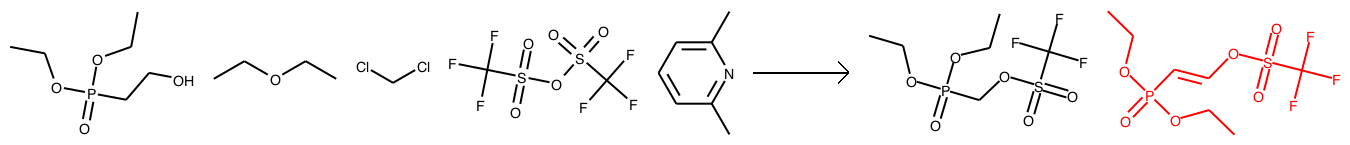

0
THIS IS TEST EXAMPLE 74 (1-indexed)
1
CCOC(C)=O.[Br-].CCCCCc1ccc(-c2ccc(C[P+](c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1
CC=O.CCCCCc1ccc(-c2ccc(C(C(C)=O)[P+](c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1.[Br-]
CC.CCCCCc1ccc(-c2ccc(C(=O)[P+](c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1.CC=O.[Br-]
CCO.CCCCCc1ccc(-c2ccc(C(C(C)=O)[P+](c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1.[Br-]
CCCCCc1ccc(-c2ccc(C(OCC)=P(c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1.CC=O.[Br-]
[Br:20][CH2:21][c:22]1[cH:23][cH:24][c:25](-[c:28]2[cH:29][cH:30][c:31]([CH2:34][CH2:35][CH2:36][CH2:37][CH3:38])[cH:32][cH:33]2)[cH:26][cH:27]1.[CH3:39][CH2:40][O:41][C:42](=[O:43])[CH3:44].[c:1]1([P:7]([c:8]2[cH:9][cH:10][cH:11][cH:12][cH:13]2)[c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)[cH:2][cH:3][cH:4][cH:5][cH:6]1>>[Br-:20].[c:1]1([P+:7]([c:8]2[cH:9][cH:10][cH:11][cH:12][cH:13]2)([c:14]2[cH:15][cH:16][cH:17][cH:18][cH:19]2)[CH2:21][c:22]2[cH:23][cH:24][c:25](-[c:28]3[cH:29][cH:30][c:31]([CH2:34][CH2:35][CH2:36][CH2:37][CH3:38])[cH:32][cH:33]3)[cH:26][cH:27]2)[cH:

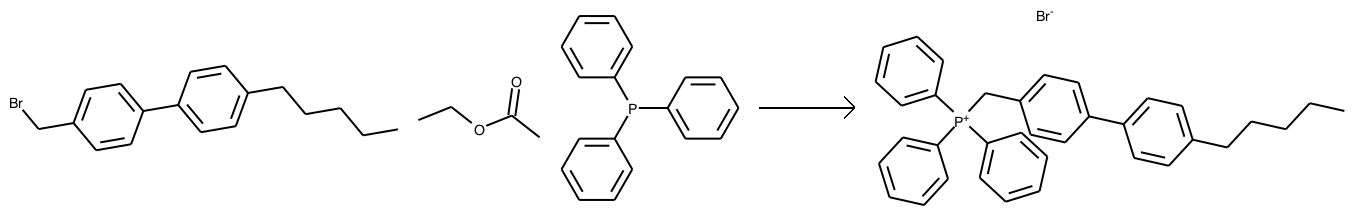

1
THIS IS TEST EXAMPLE 75 (1-indexed)
3
Clc1nc2ccccc2nc1Cl.N.CCOC(=O)C(CBr)(Nc1nc2ccccc2nc1Cl)OCC.O.COC(C)OC
O.N.Clc1nc2ccccc2nc1Cl.CCOC(=O)C(CBr)OCC.Nc1nc2ccccc2nc1Cl.COC(C)OC
CCO.N.Clc1nc2ccccc2nc1Cl.CCOC(=O)C(=O)C[n+]1c(N)c(Cl)nc2ccccc21.[Br-].COC(C)OC
CCOC(=O)C(O)(CBr)OCC.Clc1nc2ccccc2nc1Cl.Nc1nc2ccccc2nc1Cl.COC(C)OC.N
CCOC(=O)C(=O)C[n+]1c(Cl)c(N)nc2ccccc21.CCO.N.Clc1nc2ccccc2nc1Cl.[Br-].COC(C)OC
[Br:26][CH2:27][C:28]([C:29](=[O:30])[O:31][CH2:32][CH3:33])=[O:34].[CH3:35][O:36][CH:37]([O:38][CH3:39])[CH3:40].[CH3:41][CH2:42][OH:43].[Cl:13][c:14]1[c:15]([Cl:16])[n:17][c:18]2[c:19]([cH:20][cH:21][cH:22][cH:23]2)[n:24]1.[NH2:1][c:2]1[n:3][c:4]2[cH:5][cH:6][cH:7][cH:8][c:9]2[n:10][c:11]1[Cl:12].[NH3:25]>>[Br-:26].[NH2:1][c:2]1[n+:3]([CH2:27][C:28]([C:29](=[O:30])[O:31][CH2:32][CH3:33])=[O:34])[c:4]2[cH:5][cH:6][cH:7][cH:8][c:9]2[n:10][c:11]1[Cl:12]
Prediction 1:    28.0-34.0-0.0   with score -1.7115819454193115
Prediction 2:    11.0-12.0-0.0   with score -1.7511162757873535
Prediction 

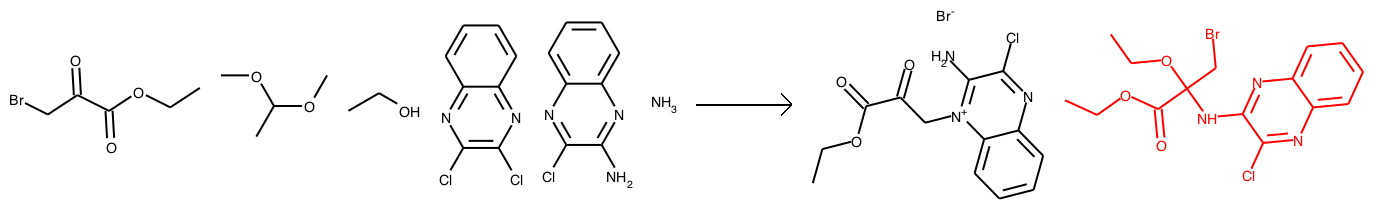

0
THIS IS TEST EXAMPLE 76 (1-indexed)
1
CC(C)(C)OC=O.NCCCOc1ccc2cc(C(=O)NCC(Nc3ncccn3)C(=O)O)cc(=O)n2c1.C1COCCO1.Cl
NCC(Nc1ncccn1)C(=O)O.CCOCC.CC(C)(C)OC(=O)NCCCOc1ccc2cc(C(=O)O)cc(=O)n2c1.Cl
NCC(Nc1ncccn1)C(=O)O.CCOCC.CC(C)(C)OC(=O)NCCCOc1ccc2cc(C(=O)O)cc(=O)n2c1.Cl
CC(C)(C)OC=O.C1COCCO1.O=C1NCC(Nc2ncccn2)C(=O)NCCCOc2ccc3cc1cc(=O)n3c2.O.Cl
NCC(Nc1ncccn1)C(=O)O.CCOCCOC(=O)c1cc(=O)n2cc(OCCCNC(=O)OC(C)(C)C)ccc2c1.Cl
[C:1]([O:2][C:3](=[O:4])[NH:8][CH2:9][CH2:10][CH2:11][O:12][c:13]1[cH:14][n:15]2[c:16](=[O:38])[cH:17][c:18]([C:23](=[O:24])[NH:25][CH2:26][CH:27]([C:28](=[O:29])[OH:30])[NH:31][c:32]3[n:33][cH:34][cH:35][cH:36][n:37]3)[cH:19][c:20]2[cH:21][cH:22]1)([CH3:5])([CH3:6])[CH3:7].[ClH:39].[O:40]1[CH2:41][CH2:42][O:43][CH2:44][CH2:45]1>>[ClH:39].[NH2:8][CH2:9][CH2:10][CH2:11][O:12][c:13]1[cH:14][n:15]2[c:16](=[O:38])[cH:17][c:18]([C:23](=[O:24])[NH:25][CH2:26][CH:27]([C:28](=[O:29])[OH:30])[NH:31][c:32]3[n:33][cH:34][cH:35][cH:36][n:37]3)[cH:19][c:20]2[cH:21][cH:22]1
Prediction 1:  

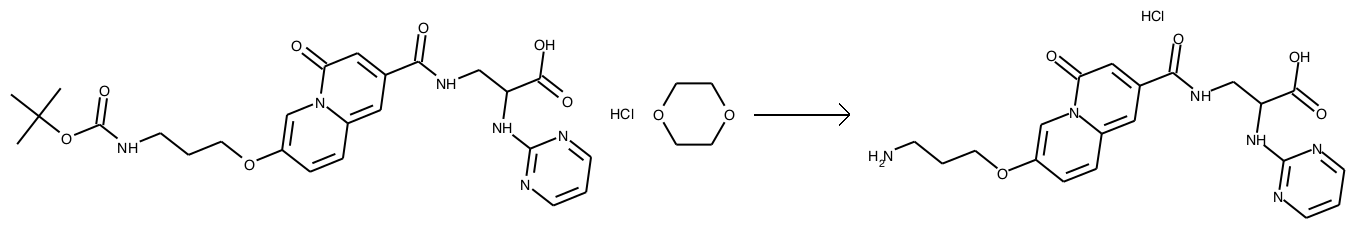

1
THIS IS TEST EXAMPLE 77 (1-indexed)
2
CC(C)NC(C)C.[Na+].CC(=O)C(OC(=O)c1ccccc1)C(=O)CC=O.Cl.[Li]CCCC.[Cl-].CCO.CCCCCC.C1CCOC1
CC(C)NC(C)C.[Na+].CC(=O)C(OC(=O)c1ccccc1)C(=O)CC=O.Cl.[Li]CCCC.[Cl-].CCO.CCCCCC.C1CCOC1
CC(C)NC(C)C.[Na+].Cl.[Li]CCCC.CCO.[Cl-].CC(=O)C(OC(=O)c1ccccc1)C(=O)C=CO.CCCCCC.C1CCOC1
CC(C)NC(C)C.[Na+].Cl.[Li]CCCC.CCO.[Cl-].CC(=O)C(OC(=O)c1ccccc1)C(=O)C=CO.CCCCCC.C1CCOC1
CC(C)NC(C)C.[Na+].O=C1CC(=O)C(OC(=O)c2ccccc2)C(=O)C1.Cl.[Li]CCCC.[Cl-].CCO.CCCCCC.C1CCOC1
[C:13]([c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1)(=[O:20])[O:21][CH:22]([C:23]([CH3:24])=[O:25])[C:26]([CH3:27])=[O:28].[CH2:8]([Li:9])[CH2:10][CH2:11][CH3:12].[CH3:42][CH2:43][CH2:44][CH2:45][CH2:46][CH3:47].[CH:1]([NH:2][CH:3]([CH3:4])[CH3:5])([CH3:6])[CH3:7].[CH:29](=[O:30])[O:31][CH2:32][CH3:33].[Cl-:36].[ClH:34].[Na+:35].[O:37]1[CH2:38][CH2:39][CH2:40][CH2:41]1>>[C:13]([c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1)(=[O:20])[O:21][CH:22]([C:23]([CH:24]=[CH:29][OH:30])=[O:25])[C:26]([CH3:27])=[O:28]
Prediction

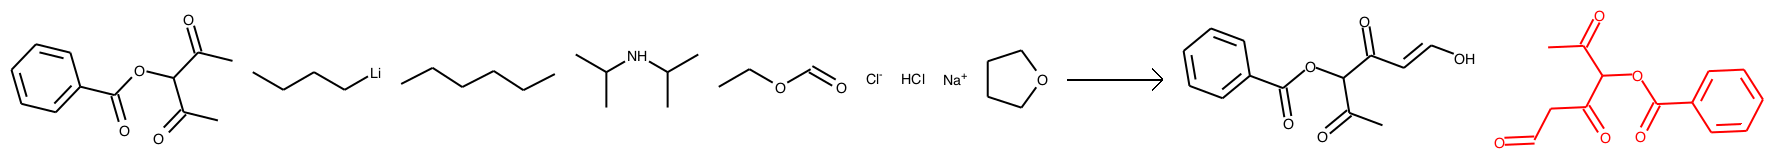

0
THIS IS TEST EXAMPLE 78 (1-indexed)
1
O=C(O)C(NCc1ccc(F)cc1)c1ccccc1.CO.[B-].Cl.C1COCCO1.O.[O-].[Na+]
CO.[B-].Cl.C1COCCO1.NC(C(=O)O)c1ccccc1.OCc1ccc(F)cc1.[O-].[Na+]
CO.[B-].Cl.C1COCCO1.O.CNC(C(=O)O)c1ccccc1.Fc1ccccc1.[O-].[Na+]
CO.[B-].Cl.C1COCCO1.O.O=C(O)C(N=Cc1ccc(F)cc1)c1ccccc1.[O-].[Na+]
Cc1ccc(F)cc1.CO.[B-].Cl.C1COCCO1.O.NC(C(=O)O)c1ccccc1.[O-].[Na+]
[BH4-:23].[CH3:26][OH:27].[ClH:25].[F:1][c:2]1[cH:3][cH:4][c:5]([CH:6]=[O:7])[cH:8][cH:9]1.[NH2:10][CH:11]([C:12](=[O:13])[OH:14])[c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1.[Na+:22].[Na+:24].[O:28]1[CH2:29][CH2:30][O:31][CH2:32][CH2:33]1.[OH-:21]>>[ClH:25].[F:1][c:2]1[cH:3][cH:4][c:5]([CH2:6][NH:10][CH:11]([C:12](=[O:13])[OH:14])[c:15]2[cH:16][cH:17][cH:18][cH:19][cH:20]2)[cH:8][cH:9]1
Prediction 1:    6.0-7.0-0.0     with score 3.457221269607544
Prediction 2:    6.0-10.0-1.0    with score 1.041480541229248
Prediction 3:    6.0-7.0-1.0     with score -0.573165237903595
Prediction 4:    12.0-13.0-1.0   with score -2.022520065307617

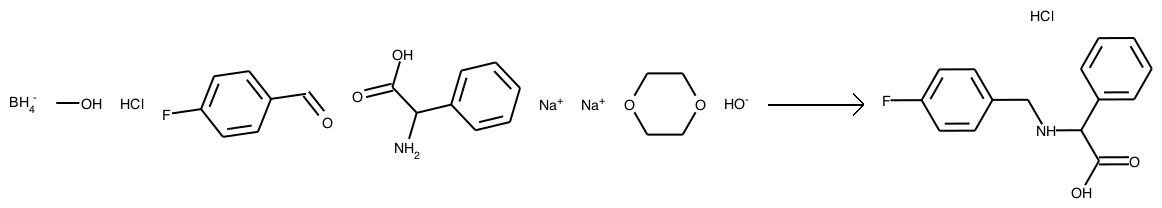

1
THIS IS TEST EXAMPLE 79 (1-indexed)
1
[Pd+2].Cc1cc(C(N)=O)cc(C)c1C=O.CC[SiH](CC)CC.O=S(=O)(O)C(F)(F)F.CNC.CC(=O)O
[Pd+2].CC[SiH](CC)CC.O=S(=O)(O)C(F)(F)F.Cc1cc2cc(C)c1c(=O)[nH]c2=O.CNC.CC(=O)O
O=S(=O)(O)C(F)(F)F.[Pd+2].CC[SiH](CC)CC.CC(=O)O.Cc1cc(C(N)=O)cc(C)c1C(=O)N(C)C
CC[Si](CC)(CC)C(=O)c1c(C)cc(C(N)=O)cc1C.[Pd+2].O=S(=O)(O)C(F)(F)F.CC(=O)O.CNC
[Pd+2].O.CC[Si](CC)(CC)Cc1c(C)cc(C(N)=O)cc1C.O=S(=O)(O)C(F)(F)F.CNC.CC(=O)O
[C:1]([NH2:2])(=[O:3])[c:4]1[cH:5][c:6]([CH3:19])[c:7]([O:11][S:12]([C:13]([F:14])([F:15])[F:16])(=[O:17])=[O:18])[c:8]([CH3:10])[cH:9]1.[CH2:20]([SiH:21]([CH2:22][CH3:23])[CH2:24][CH3:25])[CH3:26].[O-:33][C:34]([CH3:35])=[O:36].[O-:37][C:38]([CH3:39])=[O:40].[O:27]=[CH:28][N:29]([CH3:30])[CH3:31].[Pd+2:32]>>[C:1]([NH2:2])(=[O:3])[c:4]1[cH:5][c:6]([CH3:19])[c:7]([CH:28]=[O:27])[c:8]([CH3:10])[cH:9]1
Prediction 1:    7.0-11.0-0.0    with score 5.931009292602539
Prediction 2:    1.0-3.0-0.0     with score -0.6887771487236023
Prediction 3:    7.0-28.0-1.0    with score

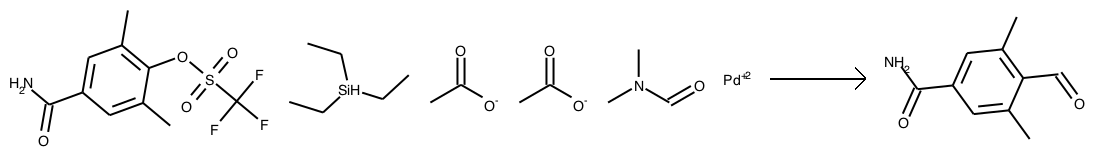

1
THIS IS TEST EXAMPLE 80 (1-indexed)
1
COC(=O)c1c([N+](=O)[O-])cccc1S(=O)(=O)NCCN1CCCCC1.CCN(C(C)C)C(C)C.C1CCOC1.Cl
NCCN1CCCCC1.COC(=O)c1c([N+](=O)[O-])cccc1S(=O)(=O)C1CCOC1.CCN(C(C)C)C(C)C.Cl
NCCN1CCCCC1.COC(=O)c1c([N+](=O)[O-])cccc1S(=O)(=O)C1CCOC1.CCN(C(C)C)C(C)C.Cl
O=S(=O)(NCCN1CCCCC1)C1CCOC1.CCN(C(C)C)C(C)C.COC(=O)c1ccccc1[N+](=O)[O-].Cl
O=S(=O)(NCCN1CCCCC1)C1CCOC1.CCN(C(C)C)C(C)C.COC(=O)c1ccccc1[N+](=O)[O-].Cl
[CH:10]([N:11]([CH2:12][CH3:13])[CH:14]([CH3:15])[CH3:16])([CH3:17])[CH3:18].[Cl:19][S:20](=[O:21])(=[O:22])[c:23]1[c:24]([C:25](=[O:26])[O:27][CH3:28])[c:29]([N+:33](=[O:34])[O-:35])[cH:30][cH:31][cH:32]1.[ClH:36].[NH2:1][CH2:2][CH2:3][N:4]1[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9]1.[O:37]1[CH2:38][CH2:39][CH2:40][CH2:41]1>>[ClH:19].[NH:1]([CH2:2][CH2:3][N:4]1[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9]1)[S:20](=[O:21])(=[O:22])[c:23]1[c:24]([C:25](=[O:26])[O:27][CH3:28])[c:29]([N+:33](=[O:34])[O-:35])[cH:30][cH:31][cH:32]1
Prediction 1:    1.0-20.0-1.0    with score 6.197651386260986
P

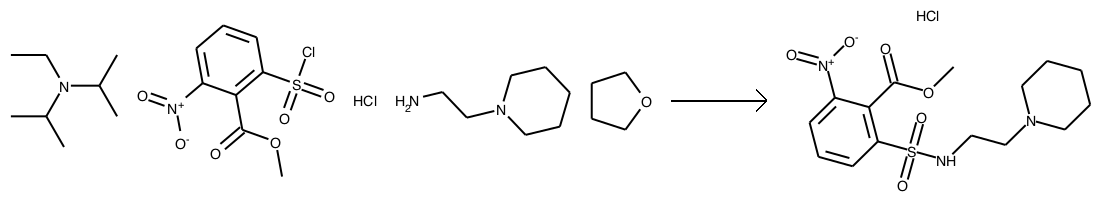

1
Correct: 58
Total:   80
Percentage: 0.7250


In [92]:
total = 0
correct = 0
for rct in rcts:
    entry = df_rankpred_human.loc[df_rankpred_human['reactants'] == rct]
    ind = list(entry.index)[0]
    img = do_index(ind, df_rankpred=df_rankpred_human, atts=[], showmap=False, save='examples/human/{}'.format(ind))
    rank = list(entry['rank (10 if not found)'])[0]
    if rank == 1:
        correct += 1
        print(1)
    else:
        print(0)
    total += 1
print('Correct: {}'.format(correct))
print('Total:   {}'.format(total))
print('Percentage: {:.4f}'.format(float(correct)/total))

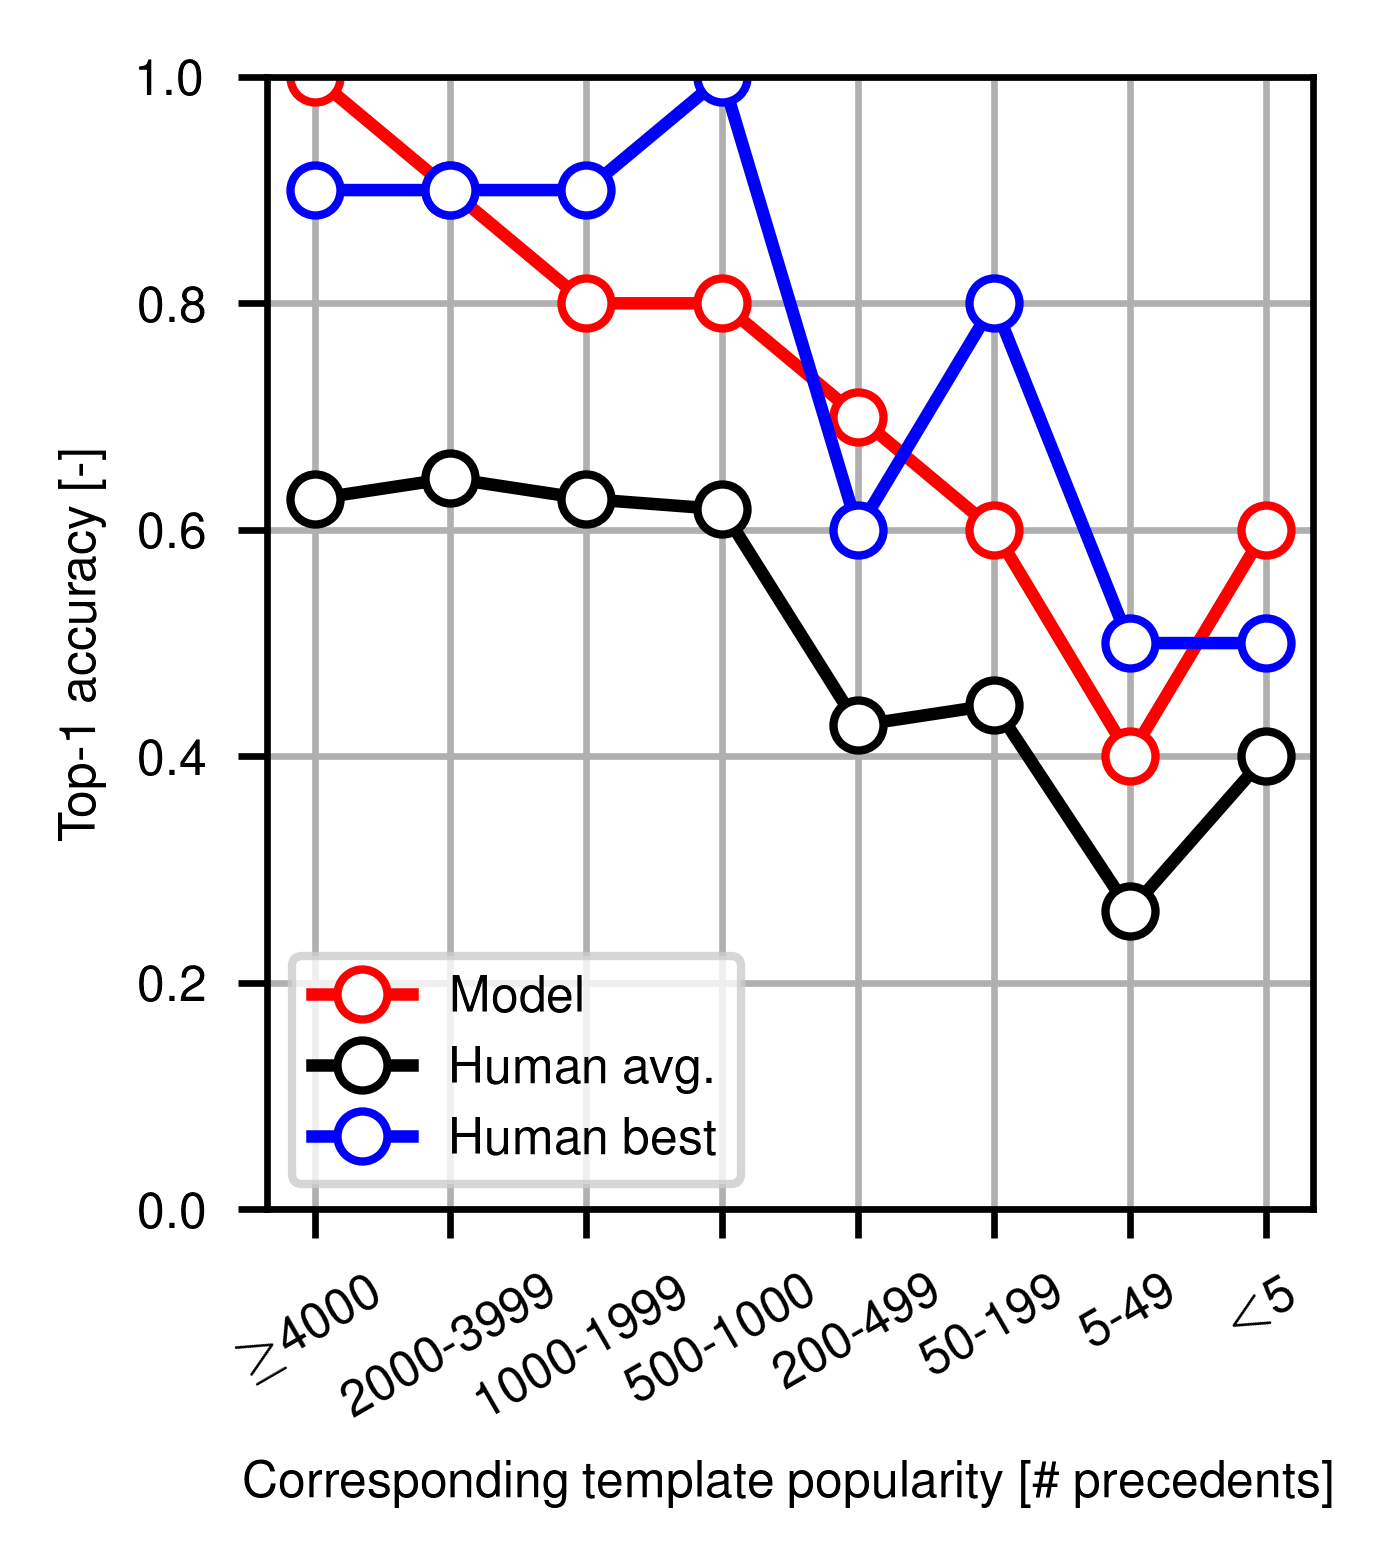

In [93]:
# Plot with different bins
import numpy as np
in_ranges = [
    lambda c: c.between(-1, 4.999),
    lambda c: c.between(5, 49),
    lambda c: c.between(50, 199),
    lambda c: c.between(200, 499),
    lambda c: c.between(500, 999),
    lambda c: c.between(1000, 1999),
    lambda c: c.between(2000, 3999),
    lambda c: c.between(4000, np.inf),
][::-1]
names = ['$<$5', '5-49', '50-199', '200-499', '500-1000', '1000-1999', '2000-3999', '≥4000'][::-1]

import matplotlib.pyplot as plt
params = {'text.usetex': True, 
          'text.latex.unicode': True,
          'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 6
plt.rcParams["text.latex.preamble"] = [
    r'\usepackage{siunitx}',
    r'\sisetup{detect-all}',
    r'\usepackage{amssymb}',
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath'
]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.25,2.5), dpi=600)

human_avgs = [0.627272727,
0.645454545,
0.627272727,
0.618181818,
0.427272727,
0.445454545,
0.263636364,
0.4]
model_perf = [1,
0.9,
0.8,
0.8,
0.7,
0.6,
0.4,
0.6]
best_human = [0.9,
0.9,
0.9,
1,
0.6,
0.8,
0.5,
0.5]
ax.plot(model_perf, 'ro-', label='Model', markerfacecolor='white')
# ax.plot(top1_accuracies, 'r--', label='Model (full test set)', markerfacecolor='white')
ax.plot(human_avgs, 'ko-', label='Human avg.', markerfacecolor='white')
ax.plot(best_human, 'bo-', label='Human best', markerfacecolor='white')

# Style
ax.set_xticks(list(range(len(model_perf))))
ax.set_xticklabels(names)
plt.xticks(fontsize=6, rotation=30)


ax.set_ylim([0.,1.0])
# yticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ax.set_yticks(yticks)
# ax.set_yticklabels(['{:.1f}'.format(x) for x in yticks])
plt.legend()
plt.grid()
plt.xlabel('Corresponding template popularity [\# precedents]')
plt.ylabel('Top-1 accuracy [-]')
plt.savefig('human_benchmarking_as_func_of_popularity.eps', format='eps', dpi=600, bbox_inches='tight')
plt.savefig('human_benchmarking_as_func_of_popularity.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


# Linear only (for comparison to Electro)

In [95]:
linear_only_test_indices = np.load('linear_only_test_indcs.npy') # provided by the authors
linear_only_test_indices # 0 indexed

array([    0,     1,     3, ..., 39996, 39997, 39998])

In [96]:
all_ranks = np.array(df_rankpred['rank (10 if not found)'])
all_ranks

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
linear_ranks = all_ranks[linear_only_test_indices]
print('Using {} subset'.format(len(linear_only_test_indices)))
print('Top-1: {:.3f}'.format(np.mean(linear_ranks <= 1)))
print('Top-2: {:.3f}'.format(np.mean(linear_ranks <= 2)))
print('Top-3: {:.3f}'.format(np.mean(linear_ranks <= 3)))
print('Top-5: {:.3f}'.format(np.mean(linear_ranks <= 5)))

Using 29360 subset
Top-1: 0.883
Top-2: 0.929
Top-3: 0.942
Top-5: 0.953


THIS IS TEST EXAMPLE 3 (1-indexed)
1


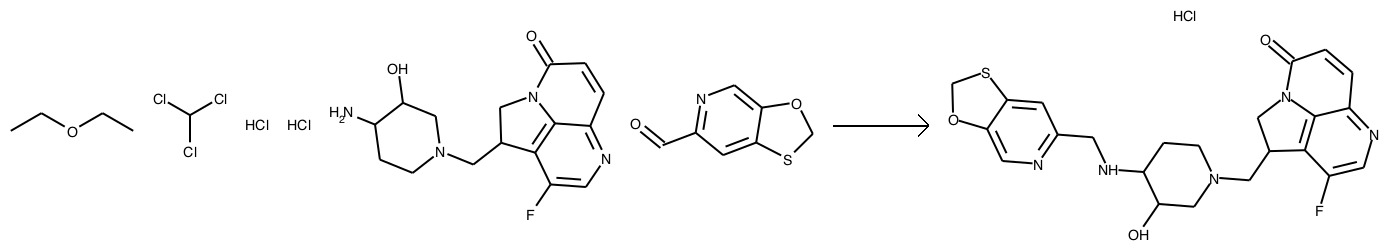

THIS IS TEST EXAMPLE 6 (1-indexed)
1


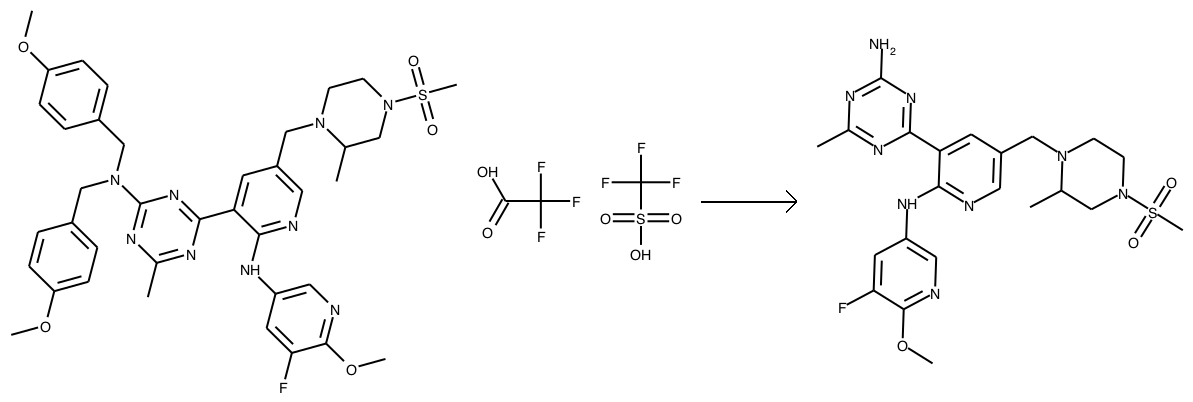

THIS IS TEST EXAMPLE 9 (1-indexed)
1


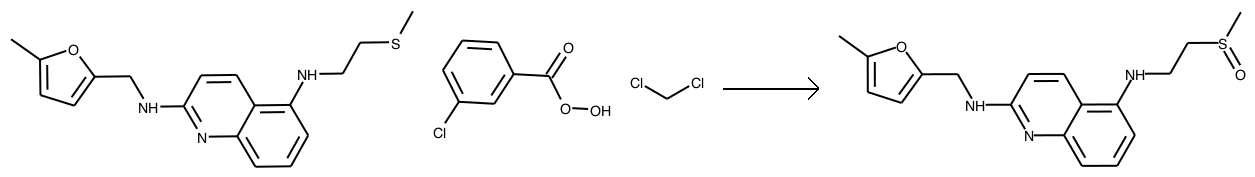

THIS IS TEST EXAMPLE 11 (1-indexed)
5


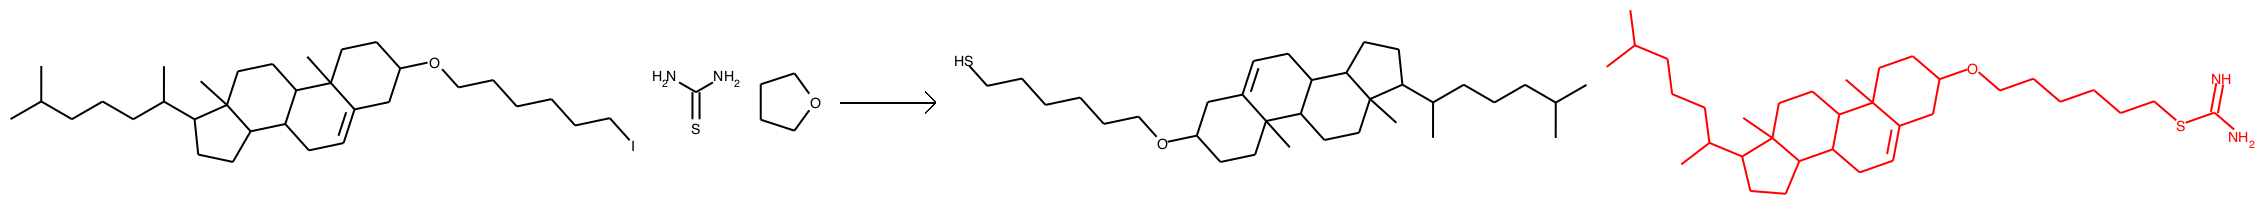

THIS IS TEST EXAMPLE 13 (1-indexed)
1


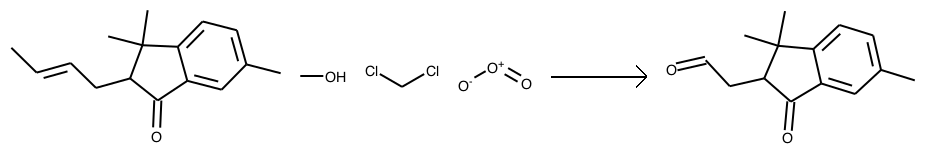

In [98]:
# What are some reactions that can't be described?
ctr = 0
for i in range(len(all_ranks)):
    if i not in linear_only_test_indices:
        ctr += 1
        do_index(i, showmap=False, atts=[], save='', max_bond_preds=0, max_att_score_info=0, showdets=False)
        if ctr >= 5:
            break

# Single products only (for comparison to Schwaller et al.'s 83%)

In [99]:
all_ranks = np.array(df_rankpred['rank (10 if not found)'])
single_prods_test_indices = np.array(['.' not in rxn_smiles for rxn_smiles in df_rankpred['products']])
singleprod_ranks = all_ranks[single_prods_test_indices]
print('Using {} subset'.format(np.sum(single_prods_test_indices)))
print('Top-1: {:.3f}'.format(np.mean(singleprod_ranks <= 1)))
print('Top-2: {:.3f}'.format(np.mean(singleprod_ranks <= 2)))
print('Top-3: {:.3f}'.format(np.mean(singleprod_ranks <= 3)))
print('Top-5: {:.3f}'.format(np.mean(singleprod_ranks <= 5)))

Using 38648 subset
Top-1: 0.864
Top-2: 0.913
Top-3: 0.929
Top-5: 0.942
